In [189]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from collections import Counter
from sklearn.linear_model import PoissonRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import Ridge

In [4]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

C:\ProgramData\Anaconda_success_2\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
raw_info

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [6]:
%store raw_info

Stored 'raw_info' (DataFrame)


In [6]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price, 'Sqft_living':raw_info.sqft_living,'Sqft_lot':raw_info.sqft_lot,
                          'Sqft_basement':raw_info.sqft_basement})

In [7]:
%store house_info
house_info

Stored 'house_info' (DataFrame)


Bedrooms  Bathrooms  Floors  Year Built  Year Renoveted  \
0             3       1.00     1.0        1955             0.0   
1             3       2.25     2.0        1951          1991.0   
2             2       1.00     1.0        1933             NaN   
3             4       3.00     1.0        1965             0.0   
4             3       2.00     1.0        1987             0.0   
...         ...        ...     ...         ...             ...   
21592         3       2.50     3.0        2009             0.0   
21593         4       2.50     2.0        2014             0.0   
21594         2       0.75     2.0        2009             0.0   
21595         3       2.50     2.0        2004             0.0   
21596         2       0.75     2.0        2008             0.0   

      Size of Basement  Condition  Size of Above  Location     Price  \
0                  0.0    Average           1180     98178  221900.0   
1                400.0    Average           2170     98125  538000.0   
2                  0.0    Average            770     98028  180000.0   
3                910.0  Very Good           1050     98136  604000.0   
4                  0.0    Average           1680     98074  510000.0   
...                ...        ...            ...       ...       ...   
21592              0.0    Average           1530     98103  360000.0   
21593              0.0    Average           2310     98146  400000.0   
21594              0.0    Average           1020     98144  402101.0   
21595              0.0    Average           1600     98027  400000.0   
21596              0.0    Average           1020     98144  325000.0   

       Sqft_living  Sqft_lot Sqft_basement  
0             1180      5650           0.0  
1             2570      7242         400.0  
2              770     10000           0.0  
3             1960      5000         910.0  
4             1680      8080           0.0  
...            ...       ...           ...  
21592         1530      1131           0.0  
21593         2310      5813           0.0  
21594         1020      1350           0.0  
21595         1600      2388           0.0  
21596         1020      1076           0.0  

[21597 rows x 13 columns]

In [9]:
house_info.describe()

Bedrooms     Bathrooms        Floors    Year Built  Year Renoveted  \
count  21597.000000  21597.000000  21597.000000  21597.000000    17755.000000   
mean       3.373200      2.115826      1.494096   1970.999676       83.636778   
std        0.926299      0.768984      0.539683     29.375234      399.946414   
min        1.000000      0.500000      1.000000   1900.000000        0.000000   
25%        3.000000      1.750000      1.000000   1951.000000        0.000000   
50%        3.000000      2.250000      1.500000   1975.000000        0.000000   
75%        4.000000      2.500000      2.000000   1997.000000        0.000000   
max       33.000000      8.000000      3.500000   2015.000000     2015.000000   

       Size of Above      Location         Price   Sqft_living      Sqft_lot  
count   21597.000000  21597.000000  2.159700e+04  21597.000000  2.159700e+04  
mean     1788.596842  98077.951845  5.402966e+05   2080.321850  1.509941e+04  
std       827.759761     53.513072  3.673681e+05    918.106125  4.141264e+04  
min       370.000000  98001.000000  7.800000e+04    370.000000  5.200000e+02  
25%      1190.000000  98033.000000  3.220000e+05   1430.000000  5.040000e+03  
50%      1560.000000  98065.000000  4.500000e+05   1910.000000  7.618000e+03  
75%      2210.000000  98118.000000  6.450000e+05   2550.000000  1.068500e+04  
max      9410.000000  98199.000000  7.700000e+06  13540.000000  1.651359e+06

In [10]:
locationzip =raw_info.zipcode
locationzip

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

In [8]:
zip_loca =[98045, 98065,98024,98029,98027,98075,98074,98014,98019]

In [9]:
locations = house_info['Location'].tolist()
index = []
for i,x in enumerate(locations): 
    if locations[i] == zip_loca[0] : index.append(i)
    elif locations[i] == zip_loca[1] : index.append(i)
    elif locations[i] == zip_loca[2] : index.append(i)
    elif locations[i] == zip_loca[3] : index.append(i)
    elif locations[i] == zip_loca[4]: index.append(i)
    elif locations[i] == zip_loca[5] : index.append(i)
    elif locations[i] == zip_loca[6] : index.append(i)
    elif locations[i] == zip_loca[7]: index.append(i)
    elif locations[i] == zip_loca[8] : index.append(i)
%store index
len(index)

Stored 'index' (list)


2455

In [177]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)

    
    #zip_loca = []
    #for i in index:zip_loca.append(locationzip[i])
    
    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_eastking = []
    for i in bedrooms_index:
        if locations[i] == zip_loca[0] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[1] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[2] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[3] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[4]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[5] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[6] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[7]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[8] : bedrooms_eastking.append(i)
       
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in bedrooms_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_eastking = []
for i in no_of_bedrooms:
    price_bedrooms_eastking.append(PRICE_BEDROOM(i))
price_bedrooms_eastking= sum(price_bedrooms_eastking, [])
len(price_bedrooms_eastking)


2455

In [178]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    #zip_loca = []
    #for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BEDROOM)
       
       
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_eastking = []
for i in no_of_bedrooms:
    amount_bedrooms_eastking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_eastking= sum(amount_bedrooms_eastking, [])
len(amount_bedrooms_eastking)

2455

In [179]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_eastking,
                                'Price':price_bedrooms_eastking})
#regressiondata1 = regressiondata1.drop(3830)
regressiondata1

Amount_of_Bedrooms     Price
0                      3  510000.0
1                      3  400000.0
2                      3  395000.0
3                      3  580500.0
4                      3  488000.0
...                  ...       ...
2450                   1  550000.0
2451                   1  283700.0
2452                   7  600000.0
2453                   7  936000.0
2454                   7  840000.0

[2455 rows x 2 columns]

In [14]:
regressiondata1.describe()

Amount_of_Bedrooms         Price
count         2455.000000  2.455000e+03
mean             3.512424  6.033481e+05
std              0.789956  2.747017e+05
min              1.000000  8.000000e+04
25%              3.000000  4.350000e+05
50%              3.000000  5.600000e+05
75%              4.000000  7.140000e+05
max              7.000000  3.200000e+06

C:\Users\rutho\AppData\Local\Temp/ipykernel_6572/4041392886.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',


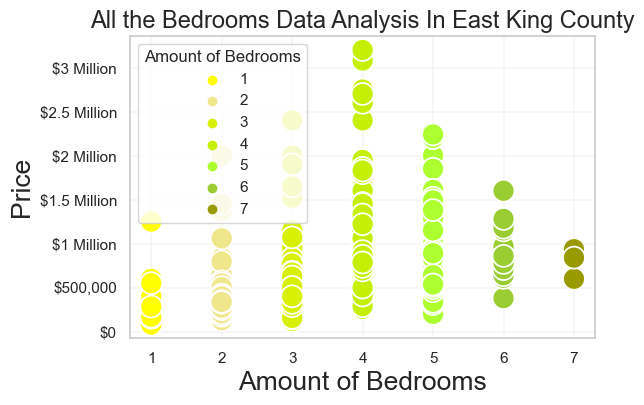

In [16]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million'])
plt.show()

In [533]:
import pandas as pd
from sklearn.linear_model import PoissonRegressor

model1 = PoissonRegressor()

model1.fit(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
#score = model1.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [534]:
x = regressiondata1[['Amount_of_Bedrooms']]
y = regressiondata1[['Price']]
prediction1 = model1.predict(x)

In [535]:
model_fit1 = regressiondata1
model_fit1['preds'] = prediction1

In [536]:
model_fit1

Amount_of_Bedrooms     Price         preds
0                      3  510000.0  5.232836e+05
1                      3  400000.0  5.232836e+05
2                      3  395000.0  5.232836e+05
3                      3  580500.0  5.232836e+05
4                      3  488000.0  5.232836e+05
...                  ...       ...           ...
2450                   1  550000.0  3.226288e+05
2451                   1  283700.0  3.226288e+05
2452                   7  600000.0  1.376592e+06
2453                   7  936000.0  1.376592e+06
2454                   7  840000.0  1.376592e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2439454104.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million'])


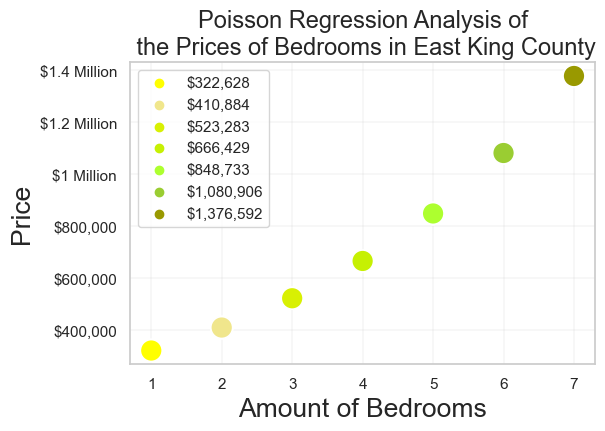

In [537]:
x = model_fit1['Amount_of_Bedrooms']
y = model_fit1['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit1, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
L.get_texts()[0].set_text('$322,628')
L.get_texts()[1].set_text('$410,884')
L.get_texts()[2].set_text('$523,283')
L.get_texts()[3].set_text('$666,429')
L.get_texts()[4].set_text('$848,733')
L.get_texts()[5].set_text('$1,080,906')
L.get_texts()[6].set_text('$1,376,592')

#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/979901047.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million'])


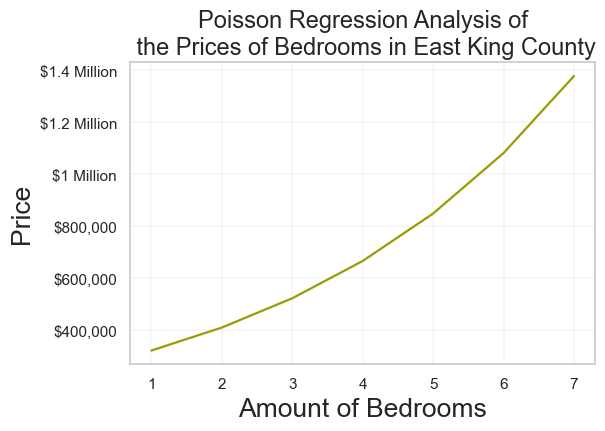

In [538]:
x = model_fit1['Amount_of_Bedrooms']
y = model_fit1['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit1, x=x, y=y,color='#999900')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million'])
plt.show()

In [550]:
(model_fit1['Price'] > model_fit1['preds']).value_counts()

False    1438
True     1017
dtype: int64

In [551]:
i = 0
y= 0
x = []
while i <  1423:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1032:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Possion Model\n 58% Accuracy ')

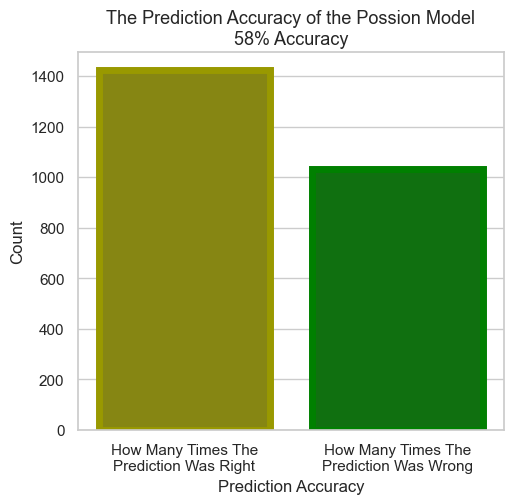

In [552]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Possion Model\n 58% Accuracy ',size=13)

In [542]:
# Importing modules that are required
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
   
# Creating and training model
model3 = BayesianRidge()
model3.fit(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
   
# Model making a prediction on test data
prediction = model3.predict(regressiondata1[['Amount_of_Bedrooms']])
#score = model3.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
#score

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [543]:
model_fit2 = regressiondata1
model_fit2['preds'] = prediction

In [546]:
model_fit2

Amount_of_Bedrooms     Price         preds
0                      3  510000.0  5.272545e+05
1                      3  400000.0  5.272545e+05
2                      3  395000.0  5.272545e+05
3                      3  580500.0  5.272545e+05
4                      3  488000.0  5.272545e+05
...                  ...       ...           ...
2450                   1  550000.0  2.302597e+05
2451                   1  283700.0  2.302597e+05
2452                   7  600000.0  1.121244e+06
2453                   7  936000.0  1.121244e+06
2454                   7  840000.0  1.121244e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3661696793.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '')]

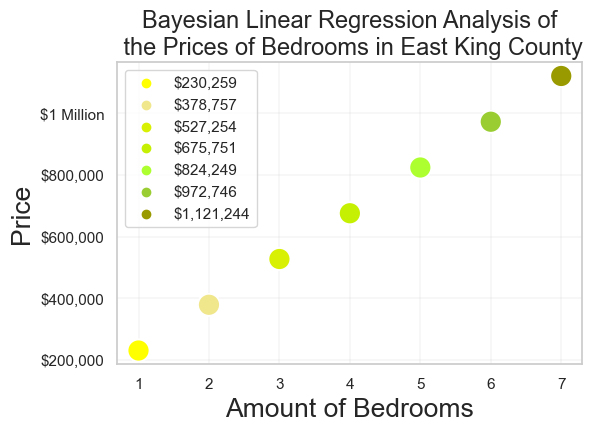

In [355]:
x = model_fit2['Amount_of_Bedrooms']
y = model_fit2['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit2, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$230,259')
L.get_texts()[1].set_text('$378,757')
L.get_texts()[2].set_text('$527,254')
L.get_texts()[3].set_text('$675,751')
L.get_texts()[4].set_text('$824,249')
L.get_texts()[5].set_text('$972,746')
L.get_texts()[6].set_text('$1,121,244')


#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3526471988.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '')]

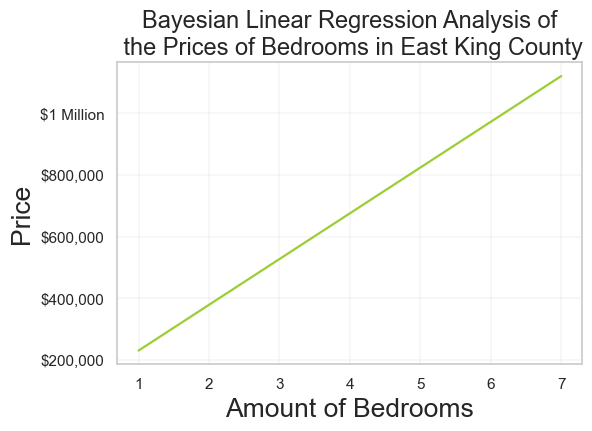

In [356]:
x = model_fit2['Amount_of_Bedrooms']
y = model_fit2['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit2, x=x, y=y,color='#9ACD32')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])

In [553]:
(model_fit2['Price'] > model_fit2['preds']).value_counts()

False    1438
True     1017
dtype: int64

In [554]:
i = 0
y= 0
x = []
while i <  1438:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1017:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Bayesian Linear Model\n 60% Accuracy ')

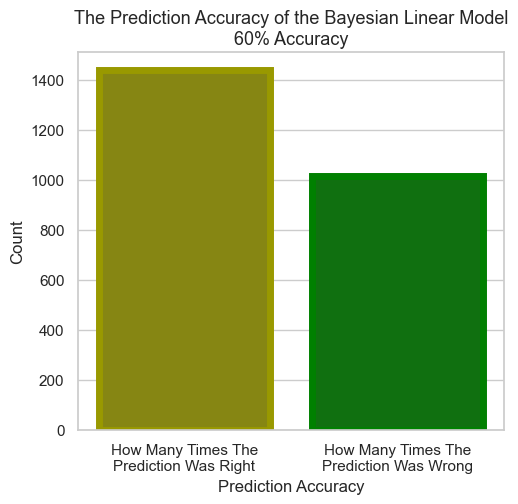

In [555]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Bayesian Linear Model\n 60% Accuracy ',size=13)

In [27]:
from sklearn.linear_model import QuantileRegressor

quantile = [0.05, 0.5, 0.95]
X = regressiondata1[['Amount_of_Bedrooms']]
y = regressiondata1[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata1[['Amount_of_Bedrooms']])
y_pred_2 = qrf2.predict(regressiondata1[['Amount_of_Bedrooms']])
y_pred_3 = qrf3.predict(regressiondata1[['Amount_of_Bedrooms']])

score1 = qrf1.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
score2 = qrf2.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
score3 = qrf3.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packa

In [29]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': regressiondata1['Amount_of_Bedrooms'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata1['Price']})

In [30]:
Quantile_regression

Amount_of_Bedrooms       0.1 Pred      0.5 Pred      0.9 Pred     Price
0                      3  324004.486415  4.915138e+05  7.400030e+05  510000.0
1                      3  324004.486415  4.915138e+05  7.400030e+05  400000.0
2                      3  324004.486415  4.915138e+05  7.400030e+05  395000.0
3                      3  324004.486415  4.915138e+05  7.400030e+05  580500.0
4                      3  324004.486415  4.915138e+05  7.400030e+05  488000.0
...                  ...            ...           ...           ...       ...
2450                   1  121996.855438  1.855469e+05  3.799934e+05  550000.0
2451                   1  121996.855438  1.855469e+05  3.799934e+05  283700.0
2452                   7  728019.748369  1.103448e+06  1.460022e+06  600000.0
2453                   7  728019.748369  1.103448e+06  1.460022e+06  936000.0
2454                   7  728019.748369  1.103448e+06  1.460022e+06  840000.0

[2455 rows x 5 columns]

In [39]:
for i,x in enumerate(Quantile_regression.Amount_of_Bedrooms):
    if x == 2.0:print(i)

2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219


In [40]:
Quantileregression_updated= Quantile_regression.loc[[2451,2079,0,1095,2220,2418,2452]]
Quantileregression_updated = Quantileregression_updated.drop('Price', axis=1)
Quantileregression_updated

Amount_of_Bedrooms       0.1 Pred      0.5 Pred      0.9 Pred
2451                   1  121996.855438  1.855469e+05  3.799934e+05
2079                   2  223000.670927  3.385304e+05  5.599982e+05
0                      3  324004.486415  4.915138e+05  7.400030e+05
1095                   4  425008.301903  6.444973e+05  9.200078e+05
2220                   5  526012.117392  7.974807e+05  1.100013e+06
2418                   6  627015.932880  9.504642e+05  1.280017e+06
2452                   7  728019.748369  1.103448e+06  1.460022e+06

In [41]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Amount_of_Bedrooms Percentile         value
0                    1   0.1 Pred  1.219969e+05
1                    2   0.1 Pred  2.230007e+05
2                    3   0.1 Pred  3.240045e+05
3                    4   0.1 Pred  4.250083e+05
4                    5   0.1 Pred  5.260121e+05
5                    6   0.1 Pred  6.270159e+05
6                    7   0.1 Pred  7.280197e+05
7                    1   0.5 Pred  1.855469e+05
8                    2   0.5 Pred  3.385304e+05
9                    3   0.5 Pred  4.915138e+05
10                   4   0.5 Pred  6.444973e+05
11                   5   0.5 Pred  7.974807e+05
12                   6   0.5 Pred  9.504642e+05
13                   7   0.5 Pred  1.103448e+06
14                   1   0.9 Pred  3.799934e+05
15                   2   0.9 Pred  5.599982e+05
16                   3   0.9 Pred  7.400030e+05
17                   4   0.9 Pred  9.200078e+05
18                   5   0.9 Pred  1.100013e+06
19                   6   0.9 Pred  1.280017e+06
20                   7   0.9 Pred  1.460022e+06

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/848416133.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '')]

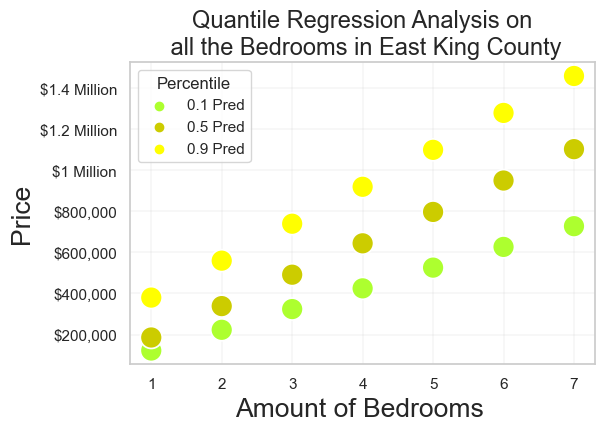

In [45]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
#plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3922145865.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '')]

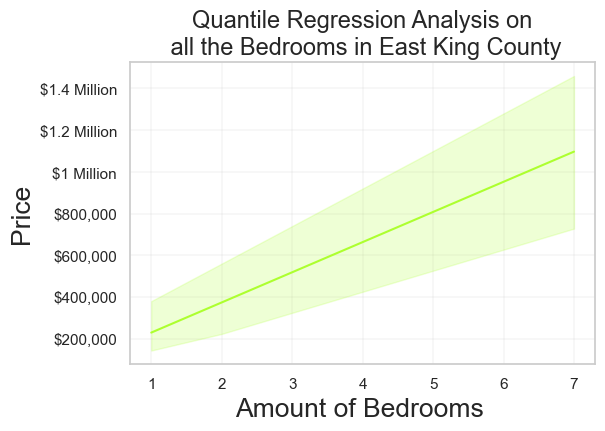

In [46]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.lineplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',color="#ADFF2F")
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
#plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Million'])

In [557]:
(Quantile_regression['Price'] > Quantile_regression['0.1 Pred']).value_counts()

True     2209
False     246
dtype: int64

In [558]:
i = 0
y= 0
x = []
while i <  246:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 2209:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ')

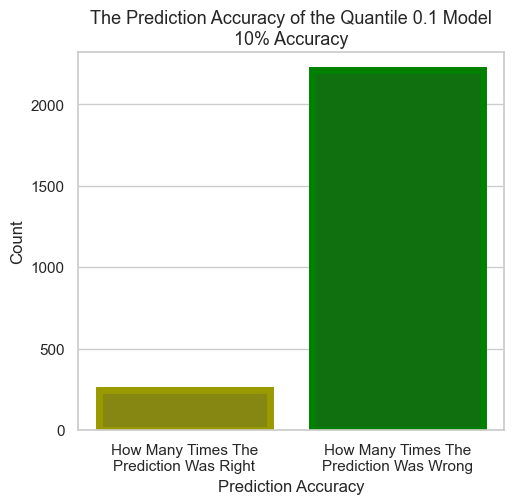

In [560]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ',size=13)

In [562]:
(Quantile_regression['Price'] > Quantile_regression['0.5 Pred']).value_counts()

True     1228
False    1227
dtype: int64

In [563]:
i = 0
y= 0
x = []
while i <  1227:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1228:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ')

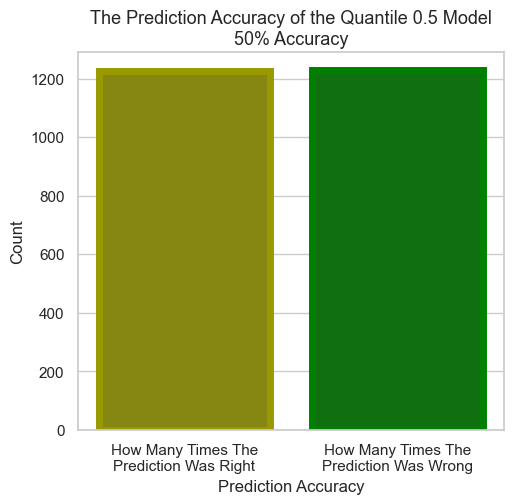

In [564]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ',size=13)

In [565]:
(Quantile_regression['Price'] > Quantile_regression['0.9 Pred']).value_counts()

False    2210
True      245
dtype: int64

In [566]:
i = 0
y= 0
x = []
while i <  2210:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 245:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ')

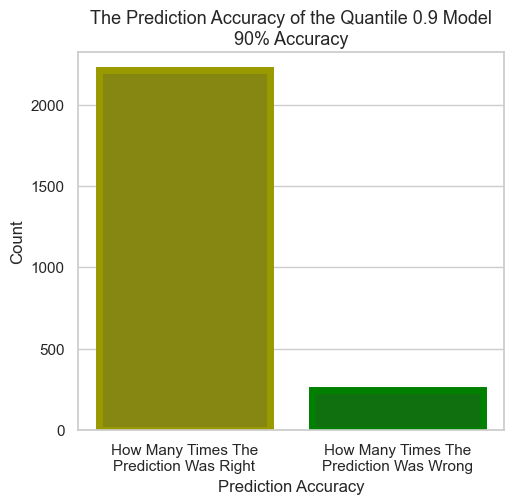

In [568]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ',size=13)

In [570]:
from sklearn.linear_model import Ridge
model4 = Ridge(alpha=1.0)
model4.fit(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
preds_4 = model4.predict(regressiondata1[['Amount_of_Bedrooms']])

In [571]:
model_fit4 = regressiondata1
model_fit4['preds'] = preds_4

In [572]:
model_fit4

Amount_of_Bedrooms     Price         preds
0                      3  510000.0  5.271656e+05
1                      3  400000.0  5.271656e+05
2                      3  395000.0  5.271656e+05
3                      3  580500.0  5.271656e+05
4                      3  488000.0  5.271656e+05
...                  ...       ...           ...
2450                   1  550000.0  2.298238e+05
2451                   1  283700.0  2.298238e+05
2452                   7  600000.0  1.121849e+06
2453                   7  936000.0  1.121849e+06
2454                   7  840000.0  1.121849e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2635349493.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])


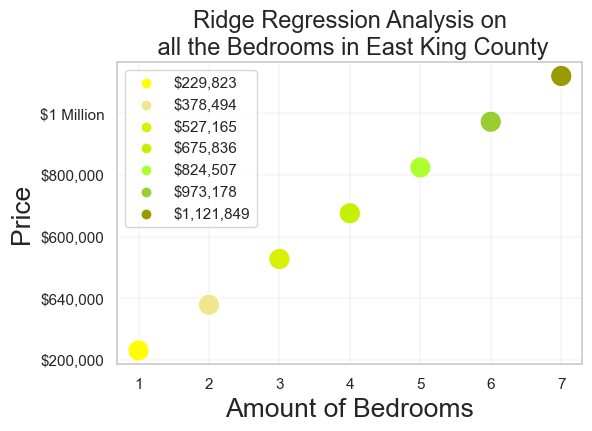

In [163]:
x = model_fit4['Amount_of_Bedrooms']
y = model_fit4['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit4, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
L.get_texts()[0].set_text('$229,823')
L.get_texts()[1].set_text('$378,494')
L.get_texts()[2].set_text('$527,165')
L.get_texts()[3].set_text('$675,836')
L.get_texts()[4].set_text('$824,507')
L.get_texts()[5].set_text('$973,178')
L.get_texts()[6].set_text('$1,121,849')

#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3886195883.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])


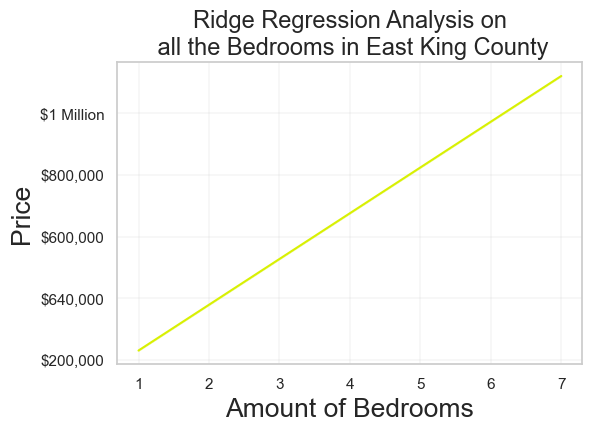

In [121]:
x = model_fit4['Amount_of_Bedrooms']
y = model_fit4['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit4, x=x, y=y,color='#D8F003')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)

#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

In [573]:
(model_fit4['Price'] > model_fit4['preds']).value_counts()

False    1438
True     1017
dtype: int64

In [574]:
i = 0
y= 0
x = []
while i <  1438:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1017:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Ridge Model\n 60% Accuracy ')

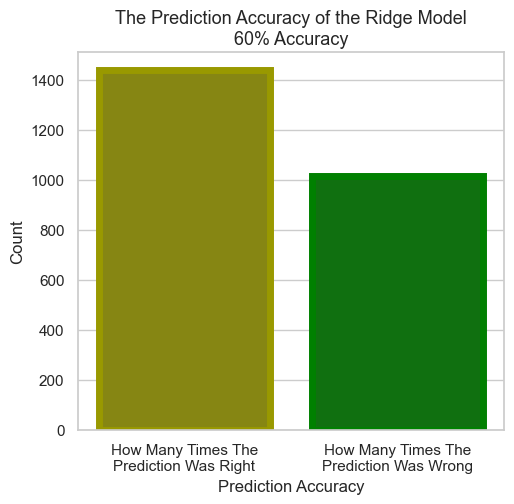

In [575]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Ridge Model\n 60% Accuracy ',size=13)

In [409]:
# Creating the DataFrame
models_predictions = pd.DataFrame({"1 Bedroom":['$322,628','$230,259','$121,996',' $185,546',' $379,993','$229,823'], 
                   "2 Bedrooms":['$410,884','$378,757','$223,000',' $338,530',' $559,998','$378,494'], 
                   "3 Bedrooms":['$523,283','$527,254','$324,004',' $491,513',' $740,003','$527,165'], 
                   "4 Bedrooms":['$666,429', '$675,751','$425,008',' $644,497',' $920,007','$675,836'],
                   "5 Bedrooms":['$848,733', '$824,249','$526,012',' $797,480',' $1,100,013','$824,507'], 
                   "6 Bedrooms":['$1,080,906', '$972,746','$627,015',' $950,464',' $1,280,017','$973,178'],
                   "7 Bedrooms":['$1,376,592', '$1,121,244','$728,019',' $1,103,448',' $1,460,022','$1,121,849'
                                ]}) 
  
# Create the index
index_ = ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions.index = index_

In [410]:
models_predictions

1 Bedroom 2 Bedrooms 3 Bedrooms 4 Bedrooms  \
Poisson Regression           $322,628   $410,884   $523,283   $666,429   
Bayesian Linear Regression   $230,259   $378,757   $527,254   $675,751   
Quantile Regression 0.1      $121,996   $223,000   $324,004   $425,008   
Quantile Regression 0.5      $185,546   $338,530   $491,513   $644,497   
Quantile Regression 0.9      $379,993   $559,998   $740,003   $920,007   
Ridge Regression             $229,823   $378,494   $527,165   $675,836   

                             5 Bedrooms   6 Bedrooms   7 Bedrooms  
Poisson Regression             $848,733   $1,080,906   $1,376,592  
Bayesian Linear Regression     $824,249     $972,746   $1,121,244  
Quantile Regression 0.1        $526,012     $627,015     $728,019  
Quantile Regression 0.5        $797,480     $950,464   $1,103,448  
Quantile Regression 0.9      $1,100,013   $1,280,017   $1,460,022  
Ridge Regression               $824,507     $973,178   $1,121,849

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

In [118]:
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge

In [3]:
lr = GradientBoostingRegressor()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [19]:
X,y = regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack = clf_stack.fit(X, y)   # training of stacked model
pred_stack = model_stack.predict(X) 

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for Quant

In [20]:
model_fit5 = regressiondata1
model_fit5['preds'] = pred_stack

In [21]:
model_fit5

Amount_of_Bedrooms     Price          preds
0                      3  510000.0  502737.158282
1                      3  400000.0  502737.158282
2                      3  395000.0  502737.158282
3                      3  580500.0  502737.158282
4                      3  488000.0  502737.158282
...                  ...       ...            ...
2450                   1  550000.0  376369.186931
2451                   1  283700.0  376369.186931
2452                   7  600000.0  792009.155903
2453                   7  936000.0  792009.155903
2454                   7  840000.0  792009.155903

[2455 rows x 3 columns]

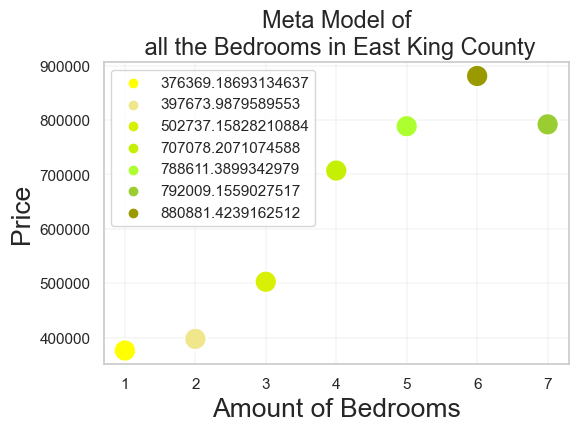

In [23]:
x = model_fit5['Amount_of_Bedrooms']
y = model_fit5['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit5, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

#plt.gcf().set_size_inches((10,10))
#ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

In [24]:
(model_fit5['Price'] > model_fit5['preds']).value_counts()

False    1452
True     1003
dtype: int64

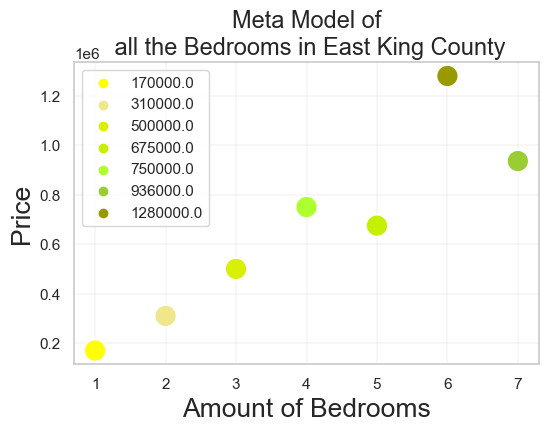

In [341]:
x = model_fit5['Amount_of_Bedrooms']
y = model_fit5['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit4, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

#plt.gcf().set_size_inches((10,10))
#ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3761012886.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])


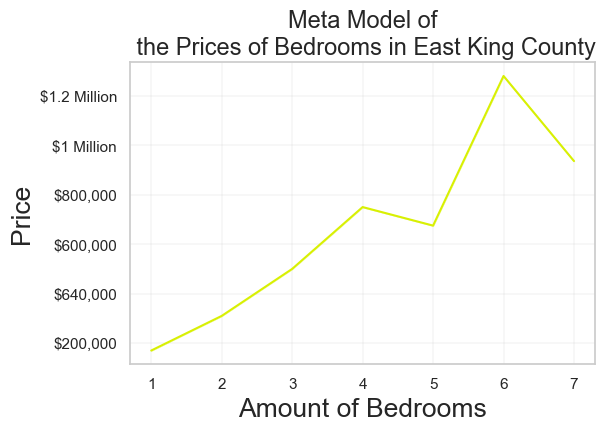

In [343]:
x = model_fit5['Amount_of_Bedrooms']
y = model_fit5['preds']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900']#,'#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit4, x=x, y=y,color='#D8F003')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n the Prices of Bedrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)

#plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

In [411]:
meta_model1 = models_predictions

In [412]:
meta_model1.loc[len(meta_model1.index)] = ['$170,00', '$310,000', '$500,000', 
                            '$675,000', '$750,000', '$936,000', '$1,280,000']
meta_model1 = meta_model1.rename(index={6: 'Final Prediction'})

In [413]:
meta_model1

1 Bedroom 2 Bedrooms 3 Bedrooms 4 Bedrooms  \
Poisson Regression           $322,628   $410,884   $523,283   $666,429   
Bayesian Linear Regression   $230,259   $378,757   $527,254   $675,751   
Quantile Regression 0.1      $121,996   $223,000   $324,004   $425,008   
Quantile Regression 0.5      $185,546   $338,530   $491,513   $644,497   
Quantile Regression 0.9      $379,993   $559,998   $740,003   $920,007   
Ridge Regression             $229,823   $378,494   $527,165   $675,836   
Final Prediction              $170,00   $310,000   $500,000   $675,000   

                             5 Bedrooms   6 Bedrooms   7 Bedrooms  
Poisson Regression             $848,733   $1,080,906   $1,376,592  
Bayesian Linear Regression     $824,249     $972,746   $1,121,244  
Quantile Regression 0.1        $526,012     $627,015     $728,019  
Quantile Regression 0.5        $797,480     $950,464   $1,103,448  
Quantile Regression 0.9      $1,100,013   $1,280,017   $1,460,022  
Ridge Regression               $824,507     $973,178   $1,121,849  
Final Prediction               $750,000     $936,000   $1,280,000

In [219]:
box_df = meta_model.transpose()
box_df

Poisson Regression Bayesian Linear Regression  \
1 Bedroom            $322,628                   $230,259   
2 Bedrooms           $410,884                   $378,757   
3 Bedrooms           $523,283                   $527,254   
4 Bedrooms           $666,429                   $675,751   
5 Bedrooms           $848,733                   $824,249   
6 Bedrooms         $1,080,906                   $972,746   
7 Bedrooms         $1,376,592                 $1,121,244   

           Quantile Regression 0.1 Quantile Regression 0.5  \
1 Bedroom                 $121,996                $185,546   
2 Bedrooms                $223,000                $338,530   
3 Bedrooms                $324,004                $491,513   
4 Bedrooms                $425,008                $644,497   
5 Bedrooms                $526,012                $797,480   
6 Bedrooms                $627,015                $950,464   
7 Bedrooms                $728,019              $1,103,448   

           Quantile Regression 0.9 Ridge Regression Final Prediction  
1 Bedroom                 $379,993         $229,823          $170,00  
2 Bedrooms                $559,998         $378,494         $310,000  
3 Bedrooms                $740,003         $527,165         $500,000  
4 Bedrooms                $920,007         $675,836         $675,000  
5 Bedrooms              $1,100,013         $824,507         $750,000  
6 Bedrooms              $1,280,017         $973,178         $936,000  
7 Bedrooms              $1,460,022       $1,121,849       $1,280,000

In [284]:
melted_data1 = pd.melt(box_df, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data1 = melted_data1.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [300]:
melted_data1[melted_data1.columns[1:]] = melted_data1[melted_data1.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [301]:
melted_data1

Prediction Model  Prediction
0           Poisson Regression    322628.0
1           Poisson Regression    410884.0
2           Poisson Regression    523283.0
3           Poisson Regression    666429.0
4           Poisson Regression    848733.0
5           Poisson Regression   1080906.0
6           Poisson Regression   1376592.0
7   Bayesian Linear Regression    230259.0
8   Bayesian Linear Regression    378757.0
9   Bayesian Linear Regression    527254.0
10  Bayesian Linear Regression    675751.0
11  Bayesian Linear Regression    824249.0
12  Bayesian Linear Regression    972746.0
13  Bayesian Linear Regression   1121244.0
14     Quantile Regression 0.1    121996.0
15     Quantile Regression 0.1    223000.0
16     Quantile Regression 0.1    324004.0
17     Quantile Regression 0.1    425008.0
18     Quantile Regression 0.1    526012.0
19     Quantile Regression 0.1    627015.0
20     Quantile Regression 0.1    728019.0
21     Quantile Regression 0.5    185546.0
22     Quantile Regression 0.5    338530.0
23     Quantile Regression 0.5    491513.0
24     Quantile Regression 0.5    644497.0
25     Quantile Regression 0.5    797480.0
26     Quantile Regression 0.5    950464.0
27     Quantile Regression 0.5   1103448.0
28     Quantile Regression 0.9    379993.0
29     Quantile Regression 0.9    559998.0
30     Quantile Regression 0.9    740003.0
31     Quantile Regression 0.9    920007.0
32     Quantile Regression 0.9   1100013.0
33     Quantile Regression 0.9   1280017.0
34     Quantile Regression 0.9   1460022.0
35            Ridge Regression    229823.0
36            Ridge Regression    378494.0
37            Ridge Regression    527165.0
38            Ridge Regression    675836.0
39            Ridge Regression    824507.0
40            Ridge Regression    973178.0
41            Ridge Regression   1121849.0
42            Final Prediction     17000.0
43            Final Prediction    310000.0
44            Final Prediction    500000.0
45            Final Prediction    675000.0
46            Final Prediction    750000.0
47            Final Prediction    936000.0
48            Final Prediction   1280000.0

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2565674944.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_yticklabels(ylabels)


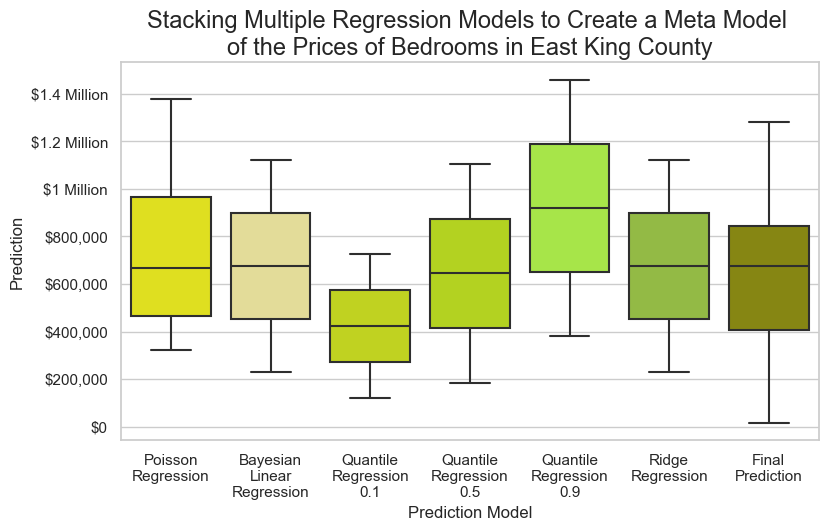

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data1,x='Prediction Model', y='Prediction',
             palette=flatui)#,hue='Prediction Model',width=1.9)
             #hue='Prediction Model')
#x.set_xticklabels(x.get_xticklabels(), rotation=45,horizontalalignment='right')
ylabels = ['0','$0','$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million']
x.set_yticklabels(ylabels)
#x.set_ylabel('0','$0','$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million')
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of Bedrooms in East King County", size=17)
wrap_labels(x, 10)
#x.set_xticklabels(rotation=30)

In [416]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0,:] = 'background-color:#FFFF00;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#F0E68C;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#D8F003;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#C6F003;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#ADFF2F;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#9ACD32;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#999900;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model1 = meta_model1.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #FFFFE0')]},
            {"selector":"thead", 'props':[("background-color","#FFFFE0"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#FFFFE0'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [417]:
import dataframe_image as dfi
#dfi.export(meta_model1, 'meta_model1.png')

In [418]:
meta_model1

In [171]:
%store -r index

In [182]:
%store Quantile_Regression_Prediction
%store Weighted_Average_Prediction

Stored 'Quantile_Regression_Prediction' (DataFrame)
Stored 'Weighted_Average_Prediction' (DataFrame)


In [581]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    
    
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BATHROOM)
        
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_eastking = []
for i in no_of_bathrooms:
    amount_bathrooms_eastking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_eastking= sum(amount_bathrooms_eastking, [])
len(amount_bathrooms_eastking)

2455

In [582]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bath = house_info["Bathrooms"].tolist()

        
    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_eastking = []
    for i in bathroom_index:
        if locations[i] == zip_loca[0] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[1] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[2] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[3] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[4]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[5] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[6] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[7]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[8] : bathroom_eastking.append(i)
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in bathroom_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_eastking = []
for i in no_of_bathrooms:
    price_bathroom_eastking.append(PRICE_BATHROOM(i))
price_bathroom_eastking = sum(price_bathroom_eastking, [])
len(price_bathroom_eastking)

2455

In [599]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_eastking,
                                'Price':price_bathroom_eastking})
k = regressiondata2.Amount_of_Bathrooms.value_counts()
len(k)

22

In [600]:
regressiondata2

Amount_of_Bathrooms      Price
0                    2.50   580500.0
1                    2.50   625000.0
2                    2.50   488000.0
3                    2.50   437500.0
4                    2.50   597750.0
...                   ...        ...
2450                 5.50  1600000.0
2451                 1.25  1250000.0
2452                 6.00  1490000.0
2453                 6.50  1180000.0
2454                 6.50  2240000.0

[2455 rows x 2 columns]

In [601]:
regressiondata2.describe()

Amount_of_Bathrooms         Price
count          2455.000000  2.455000e+03
mean              2.465682  6.033481e+05
std               0.703364  2.747017e+05
min               0.750000  8.000000e+04
25%               2.250000  4.350000e+05
50%               2.500000  5.600000e+05
75%               2.750000  7.140000e+05
max               6.500000  3.200000e+06

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2011722492.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])


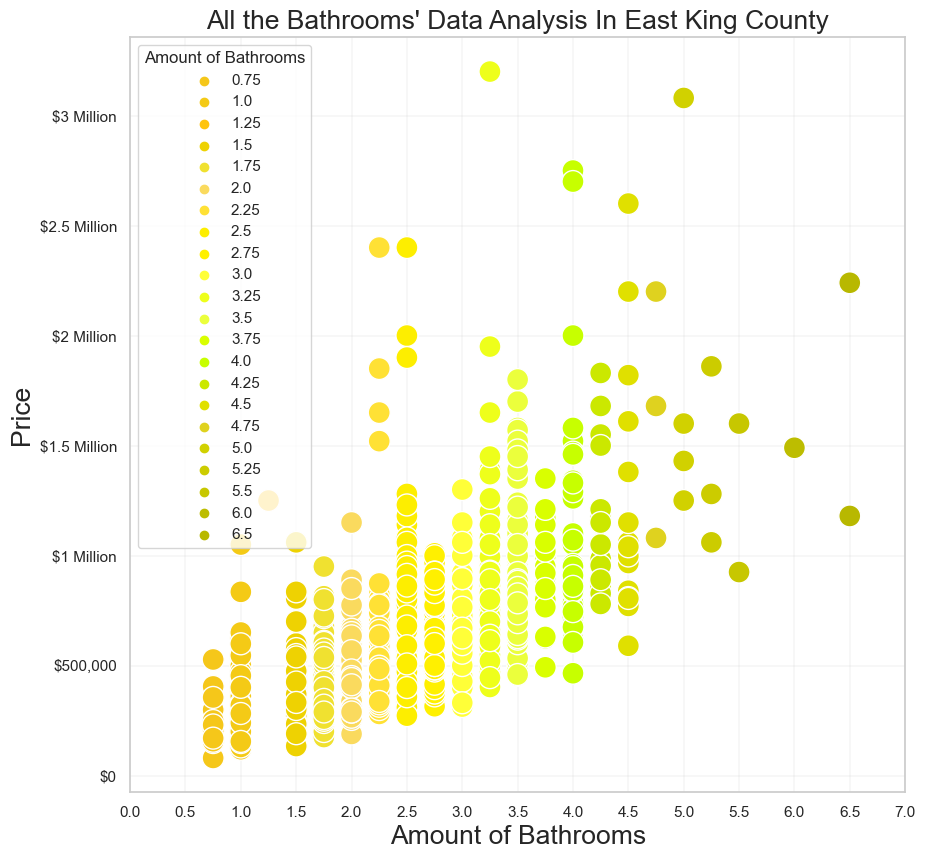

In [626]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000','#dfd21f','#d1d100','#cccc00','#c7c700','#bdbd00',
'#b8b800']#,'#b3b300','#a8a800','#949400']



plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In East King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
plt.xticks(np.arange(0,7.5,0.5))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [863]:
import pandas as pd
from sklearn.linear_model import PoissonRegressor

model6 = PoissonRegressor()

model6.fit(regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [864]:
x = regressiondata2[['Amount_of_Bathrooms']]
y = regressiondata2[['Price']]
prediction6 = model6.predict(x)

In [865]:
model_fit6 = regressiondata2
model_fit6['preds'] = prediction6

In [866]:
k = model_fit6.Amount_of_Bathrooms.value_counts()
len(k)

22

In [867]:
model_fit6

Amount_of_Bathrooms      Price         preds
0                    2.50   580500.0  5.889610e+05
1                    2.50   625000.0  5.889610e+05
2                    2.50   488000.0  5.889610e+05
3                    2.50   437500.0  5.889610e+05
4                    2.50   597750.0  5.889610e+05
...                   ...        ...           ...
2450                 5.50  1600000.0  1.823158e+06
2451                 1.25  1250000.0  3.678007e+05
2452                 6.00  1490000.0  2.200969e+06
2453                 6.50  1180000.0  2.657073e+06
2454                 6.50  2240000.0  2.657073e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2220392773.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])


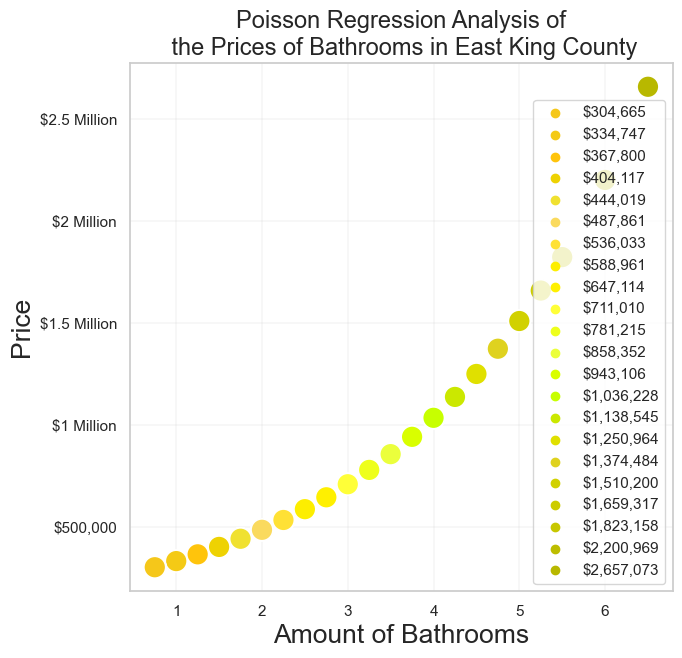

In [624]:
x = model_fit6['Amount_of_Bathrooms']
y = model_fit6['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit6, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
L.get_texts()[0].set_text('$304,665')
L.get_texts()[1].set_text('$334,747')
L.get_texts()[2].set_text('$367,800')
L.get_texts()[3].set_text('$404,117')
L.get_texts()[4].set_text('$444,019')
L.get_texts()[5].set_text('$487,861')
L.get_texts()[6].set_text('$536,033')
L.get_texts()[7].set_text('$588,961')
L.get_texts()[8].set_text('$647,114')
L.get_texts()[9].set_text('$711,010')
L.get_texts()[10].set_text('$781,215')
L.get_texts()[11].set_text('$858,352')
L.get_texts()[12].set_text('$943,106')
L.get_texts()[13].set_text('$1,036,228')
L.get_texts()[14].set_text('$1,138,545')
L.get_texts()[15].set_text('$1,250,964')
L.get_texts()[16].set_text('$1,374,484')
L.get_texts()[17].set_text('$1,510,200')
L.get_texts()[18].set_text('$1,659,317')
L.get_texts()[19].set_text('$1,823,158')
L.get_texts()[20].set_text('$2,200,969')
L.get_texts()[21].set_text('$2,657,073')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3140636638.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])


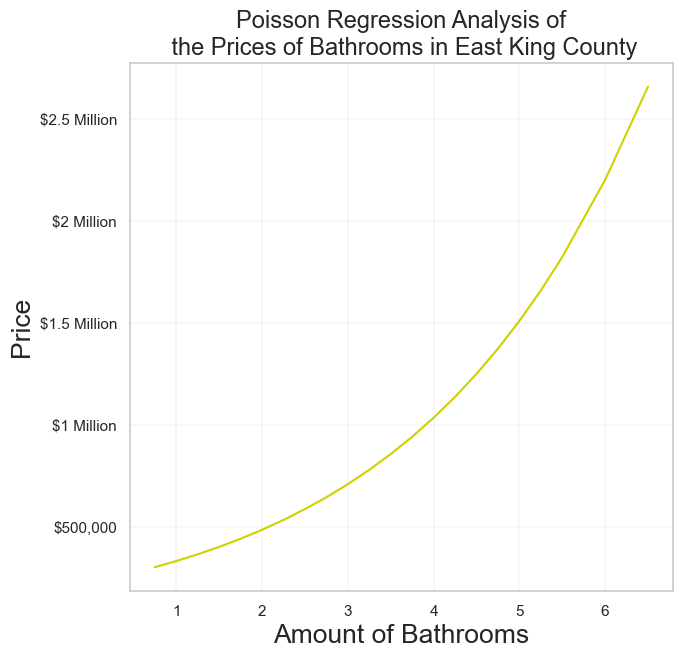

In [627]:
x = model_fit6['Amount_of_Bathrooms']
y = model_fit6['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit6, x=x, y=y,color='#d1d100')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])
plt.show()

In [859]:
# Creating and training model
model7 = BayesianRidge()
model7.fit(regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']])
   
# Model making a prediction on test data
prediction = model7.predict(regressiondata2[['Amount_of_Bathrooms']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [860]:
model_fit7 = regressiondata2
model_fit7['preds'] = prediction

In [861]:
model_fit7

Amount_of_Bathrooms      Price         preds
0                    2.50   580500.0  6.118722e+05
1                    2.50   625000.0  6.118722e+05
2                    2.50   488000.0  6.118722e+05
3                    2.50   437500.0  6.118722e+05
4                    2.50   597750.0  6.118722e+05
...                   ...        ...           ...
2450                 5.50  1600000.0  1.357041e+06
2451                 1.25  1250000.0  3.013853e+05
2452                 6.00  1490000.0  1.481236e+06
2453                 6.50  1180000.0  1.605430e+06
2454                 6.50  2240000.0  1.605430e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3364393239.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '$1.6 Million'),
 Text(0, 1800000.0, '$1.8 Million')]

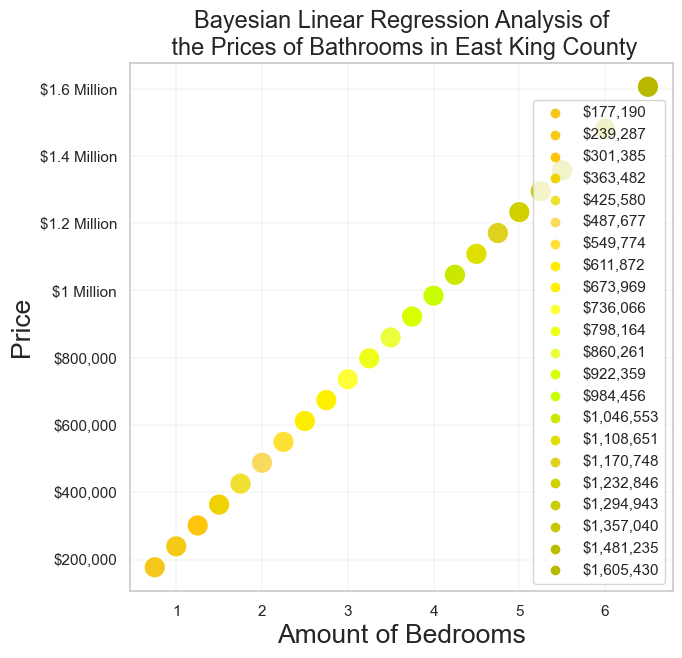

In [634]:
x = model_fit7['Amount_of_Bathrooms']
y = model_fit7['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit7, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$177,190')
L.get_texts()[1].set_text('$239,287')
L.get_texts()[2].set_text('$301,385')
L.get_texts()[3].set_text('$363,482')
L.get_texts()[4].set_text('$425,580')
L.get_texts()[5].set_text('$487,677')
L.get_texts()[6].set_text('$549,774')
L.get_texts()[7].set_text('$611,872')
L.get_texts()[8].set_text('$673,969')
L.get_texts()[9].set_text('$736,066')
L.get_texts()[10].set_text('$798,164')
L.get_texts()[11].set_text('$860,261')
L.get_texts()[12].set_text('$922,359')
L.get_texts()[13].set_text('$984,456')
L.get_texts()[14].set_text('$1,046,553')
L.get_texts()[15].set_text('$1,108,651')
L.get_texts()[16].set_text('$1,170,748')
L.get_texts()[17].set_text('$1,232,846')
L.get_texts()[18].set_text('$1,294,943')
L.get_texts()[19].set_text('$1,357,040')
L.get_texts()[20].set_text('$1,481,235')
L.get_texts()[21].set_text('$1,605,430')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                    '$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/1060811594.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '$1.6 Million'),
 Text(0, 1800000.0, '$1.8 Million')]

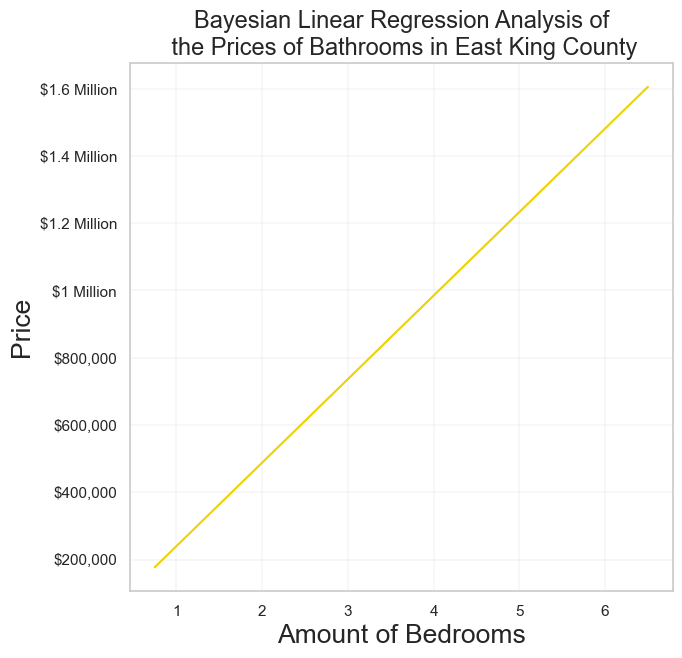

In [636]:
x = model_fit7['Amount_of_Bathrooms']
y = model_fit7['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit7, x=x, y=y,color='#eed202')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
                    '$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

In [638]:
quantile = [0.1, 0.5, 0.9]
X = regressiondata2[['Amount_of_Bathrooms']]
y = regressiondata2[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata2[['Amount_of_Bathrooms']])
y_pred_2 = qrf2.predict(regressiondata2[['Amount_of_Bathrooms']])
y_pred_3 = qrf3.predict(regressiondata2[['Amount_of_Bathrooms']])


C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packa

In [639]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': regressiondata2['Amount_of_Bathrooms'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata2['Price']})

In [642]:
Quantile_regression1

Amount_of_Bathrooms      0.1 Pred      0.5 Pred      0.9 Pred      Price
0                    2.50  4.130998e+05  5.799936e+05  8.249994e+05   580500.0
1                    2.50  4.130998e+05  5.799936e+05  8.249994e+05   625000.0
2                    2.50  4.130998e+05  5.799936e+05  8.249994e+05   488000.0
3                    2.50  4.130998e+05  5.799936e+05  8.249994e+05   437500.0
4                    2.50  4.130998e+05  5.799936e+05  8.249994e+05   597750.0
...                   ...           ...           ...           ...        ...
2450                 5.50  9.306994e+05  1.220124e+06  1.726716e+06  1600000.0
2451                 1.25  1.974333e+05  3.132727e+05  4.492840e+05  1250000.0
2452                 6.00  1.016966e+06  1.326812e+06  1.877002e+06  1490000.0
2453                 6.50  1.103233e+06  1.433500e+06  2.027289e+06  1180000.0
2454                 6.50  1.103233e+06  1.433500e+06  2.027289e+06  2240000.0

[2455 rows x 5 columns]

In [670]:
for x,i in enumerate(Quantile_regression1.Amount_of_Bathrooms):
    if i ==6.5:
        print(x,i)

2453 6.5
2454 6.5


In [856]:
Quantileregression_updated1= Quantile_regression1.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
Quantileregression_updated1 = Quantileregression_updated1.drop('Price', axis=1)
Quantileregression_updated1

Amount_of_Bathrooms      0.1 Pred      0.5 Pred      0.9 Pred
2428                 0.75  1.111667e+05  2.065843e+05  2.989979e+05
1165                 1.00  1.543000e+05  2.599285e+05  3.741409e+05
2451                 1.25  1.974333e+05  3.132727e+05  4.492840e+05
1822                 1.50  2.405666e+05  3.666168e+05  5.244271e+05
1380                 1.75  2.836999e+05  4.199610e+05  5.995702e+05
1760                 2.00  3.268332e+05  4.733052e+05  6.747133e+05
1624                 2.25  3.699665e+05  5.266494e+05  7.498563e+05
0                    2.50  4.130998e+05  5.799936e+05  8.249994e+05
1823                 2.75  4.562331e+05  6.333377e+05  9.001425e+05
1997                 3.00  4.993664e+05  6.866819e+05  9.752856e+05
2218                 3.25  5.424997e+05  7.400261e+05  1.050429e+06
2065                 3.50  5.856330e+05  7.933703e+05  1.125572e+06
2330                 3.75  6.287663e+05  8.467144e+05  1.200715e+06
2358                 4.00  6.718996e+05  9.000586e+05  1.275858e+06
2412                 4.25  7.150329e+05  9.534028e+05  1.351001e+06
2393                 4.50  7.581662e+05  1.006747e+06  1.426144e+06
2439                 4.75  8.012995e+05  1.060091e+06  1.501287e+06
2442                 5.00  8.444328e+05  1.113435e+06  1.576430e+06
2446                 5.25  8.875661e+05  1.166780e+06  1.651573e+06
2449                 5.50  9.306994e+05  1.220124e+06  1.726716e+06
2452                 6.00  1.016966e+06  1.326812e+06  1.877002e+06
2453                 6.50  1.103233e+06  1.433500e+06  2.027289e+06

In [672]:
melted_data1 = pd.melt(Quantileregression_updated1, id_vars=['Amount_of_Bathrooms'])
melted_data1 = melted_data1.dropna()
melted_data1 = melted_data1.rename(columns={'variable': 'Percentile'})
melted_data1

Amount_of_Bathrooms Percentile         value
0                  0.75   0.1 Pred  1.111667e+05
1                  1.00   0.1 Pred  1.543000e+05
2                  1.25   0.1 Pred  1.974333e+05
3                  1.50   0.1 Pred  2.405666e+05
4                  1.75   0.1 Pred  2.836999e+05
..                  ...        ...           ...
61                 5.00   0.9 Pred  1.576430e+06
62                 5.25   0.9 Pred  1.651573e+06
63                 5.50   0.9 Pred  1.726716e+06
64                 6.00   0.9 Pred  1.877002e+06
65                 6.50   0.9 Pred  2.027289e+06

[66 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2647707967.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1250000.0, '$1.25 Million'),
 Text(0, 1500000.0, '$1.5 Million'),
 Text(0, 1750000.0, '$1.75 Million'),
 Text(0, 2000000.0, '$2 Million'),
 Text(0, 2250000.0, '')]

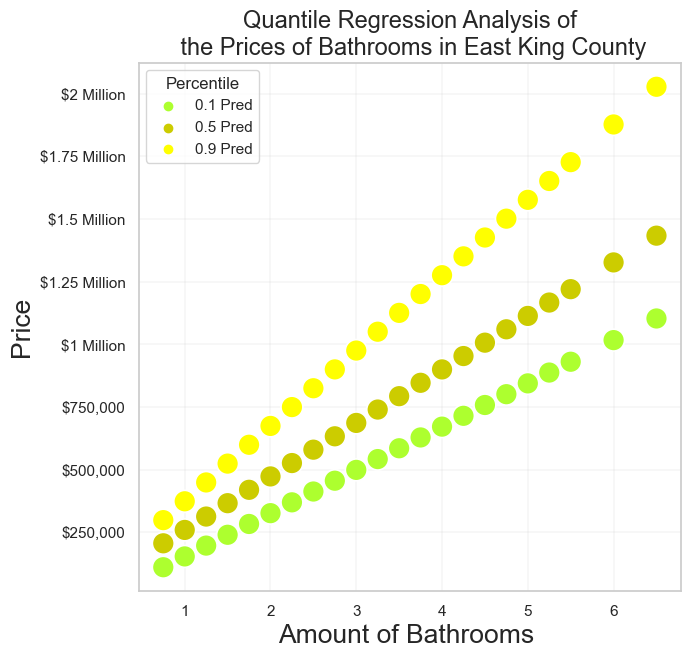

In [686]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data1, x="Amount_of_Bathrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million', 
                     '$1.25 Million','$1.5 Million', '$1.75 Million' ,'$2 Million'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2901836505.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1250000.0, '$1.25 Million'),
 Text(0, 1500000.0, '$1.5 Million'),
 Text(0, 1750000.0, '$1.75 Million'),
 Text(0, 2000000.0, '$2 Million'),
 Text(0, 2250000.0, '')]

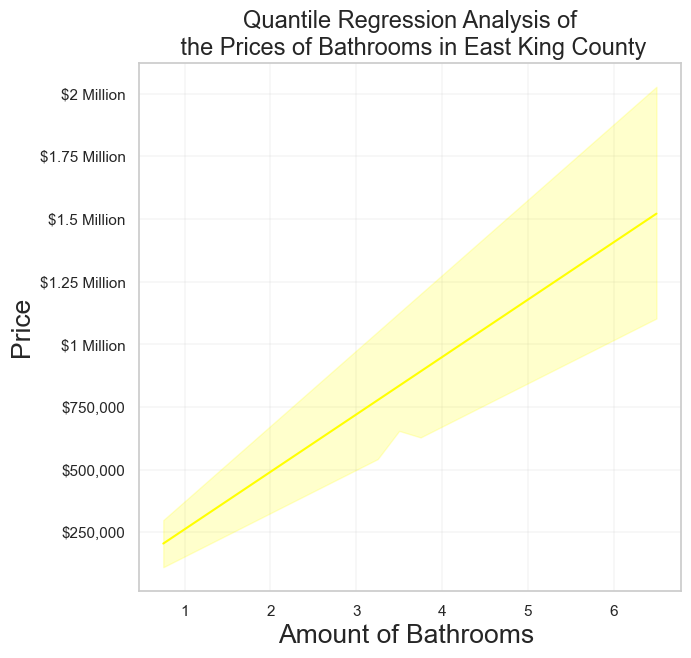

In [690]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=melted_data1, x="Amount_of_Bathrooms", 
                     y='value',color="yellow")
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million', 
                     '$1.25 Million','$1.5 Million', '$1.75 Million' ,'$2 Million'])

In [852]:
model8 = Ridge(alpha=1.0)
model8.fit(regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']])
preds_8 = model8.predict(regressiondata2[['Amount_of_Bathrooms']])

In [853]:
model_fit8 = regressiondata2
model_fit8['preds'] = preds_8

In [854]:
model_fit8

Amount_of_Bathrooms      Price         preds
0                    2.50   580500.0  6.118703e+05
1                    2.50   625000.0  6.118703e+05
2                    2.50   488000.0  6.118703e+05
3                    2.50   437500.0  6.118703e+05
4                    2.50   597750.0  6.118703e+05
...                   ...        ...           ...
2450                 5.50  1600000.0  1.356872e+06
2451                 1.25  1250000.0  3.014531e+05
2452                 6.00  1490000.0  1.481039e+06
2453                 6.50  1180000.0  1.605205e+06
2454                 6.50  2240000.0  1.605205e+06

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/3178888407.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


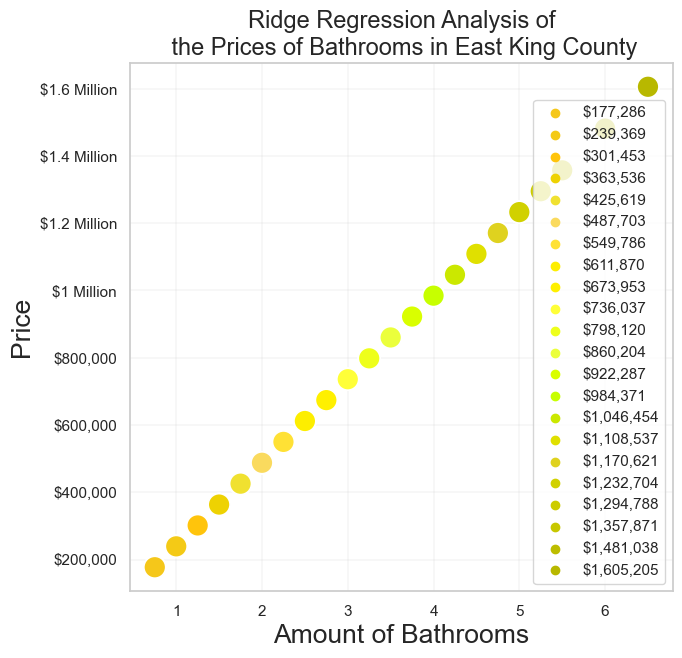

In [699]:
x = model_fit8['Amount_of_Bathrooms']
y = model_fit8['preds']
sns.set(style='whitegrid')
flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000','#dfd21f','#d1d100','#cccc00','#c7c700','#bdbd00',
'#b8b800']#,'#b3b300','#a8a800','#949400']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit8, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
L.get_texts()[0].set_text('$177,286')
L.get_texts()[1].set_text('$239,369')
L.get_texts()[2].set_text('$301,453')
L.get_texts()[3].set_text('$363,536')
L.get_texts()[4].set_text('$425,619')
L.get_texts()[5].set_text('$487,703')
L.get_texts()[6].set_text('$549,786')
L.get_texts()[7].set_text('$611,870')
L.get_texts()[8].set_text('$673,953')
L.get_texts()[9].set_text('$736,037')
L.get_texts()[10].set_text('$798,120')
L.get_texts()[11].set_text('$860,204')
L.get_texts()[12].set_text('$922,287')
L.get_texts()[13].set_text('$984,371')
L.get_texts()[14].set_text('$1,046,454')
L.get_texts()[15].set_text('$1,108,537')
L.get_texts()[16].set_text('$1,170,621')
L.get_texts()[17].set_text('$1,232,704')
L.get_texts()[18].set_text('$1,294,788')
L.get_texts()[19].set_text('$1,357,871')
L.get_texts()[20].set_text('$1,481,038')
L.get_texts()[21].set_text('$1,605,205')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', 
                     '$1.2 Million','$1.4 Million', '$1.6 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/1260783096.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


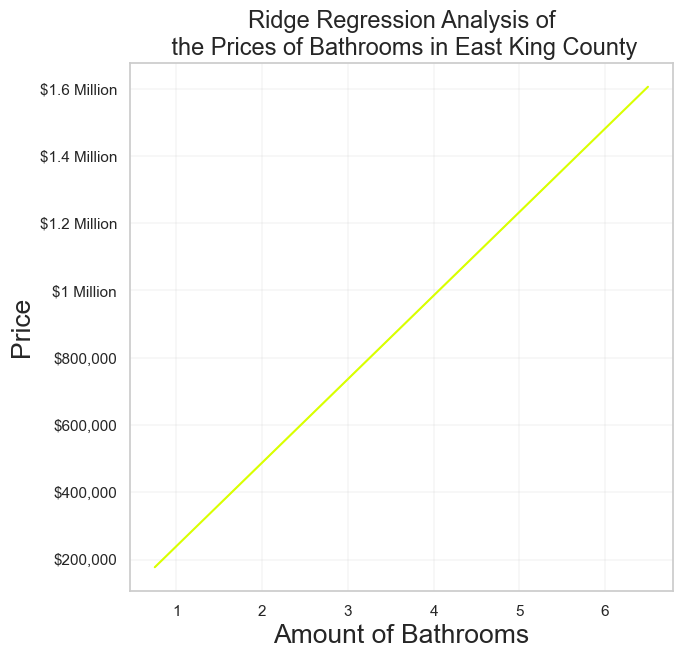

In [689]:
x = model_fit8['Amount_of_Bathrooms']
y = model_fit8['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit8, x=x, y=y,color='#d9ff00')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', 
                     '$1.2 Million','$1.4 Million', '$1.6 Million'])
plt.show()

In [868]:
pos_var = model_fit6.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

Amount_of_Bathrooms       preds
2428                 0.75    $304,665
1165                 1.00    $334,748
2451                 1.25    $367,801
1822                 1.50    $404,117
1380                 1.75    $444,020
1760                 2.00    $487,862
1624                 2.25    $536,033
0                    2.50    $588,961
1823                 2.75    $647,115
1997                 3.00    $711,011
2218                 3.25    $781,216
2065                 3.50    $858,353
2330                 3.75    $943,106
2358                 4.00  $1,036,228
2412                 4.25  $1,138,545
2393                 4.50  $1,250,965
2439                 4.75  $1,374,485
2442                 5.00  $1,510,201
2446                 5.25  $1,659,318
2449                 5.50  $1,823,158
2452                 6.00  $2,200,969
2453                 6.50  $2,657,073

In [862]:
bay_var = model_fit7.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

Amount_of_Bathrooms       preds
2428                 0.75    $177,191
1165                 1.00    $239,288
2451                 1.25    $301,385
1822                 1.50    $363,483
1380                 1.75    $425,580
1760                 2.00    $487,677
1624                 2.25    $549,775
0                    2.50    $611,872
1823                 2.75    $673,970
1997                 3.00    $736,067
2218                 3.25    $798,164
2065                 3.50    $860,262
2330                 3.75    $922,359
2358                 4.00    $984,457
2412                 4.25  $1,046,554
2393                 4.50  $1,108,651
2439                 4.75  $1,170,749
2442                 5.00  $1,232,846
2446                 5.25  $1,294,943
2449                 5.50  $1,357,041
2452                 6.00  $1,481,236
2453                 6.50  $1,605,430

In [857]:
Quantileregression_updated1[Quantileregression_updated1.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated1['0.1 Pred']]
Quantileregression_updated1[Quantileregression_updated1.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated1['0.5 Pred']]
Quantileregression_updated1[Quantileregression_updated1.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated1['0.9 Pred']]
Quantileregression_updated1

Amount_of_Bathrooms    0.1 Pred    0.5 Pred    0.9 Pred
2428                 0.75    $111,167    $206,584    $298,998
1165                 1.00    $154,300    $259,928    $374,141
2451                 1.25    $197,433    $313,273    $449,284
1822                 1.50    $240,567    $366,617    $524,427
1380                 1.75    $283,700    $419,961    $599,570
1760                 2.00    $326,833    $473,305    $674,713
1624                 2.25    $369,966    $526,649    $749,856
0                    2.50    $413,100    $579,994    $824,999
1823                 2.75    $456,233    $633,338    $900,142
1997                 3.00    $499,366    $686,682    $975,286
2218                 3.25    $542,500    $740,026  $1,050,429
2065                 3.50    $585,633    $793,370  $1,125,572
2330                 3.75    $628,766    $846,714  $1,200,715
2358                 4.00    $671,900    $900,059  $1,275,858
2412                 4.25    $715,033    $953,403  $1,351,001
2393                 4.50    $758,166  $1,006,747  $1,426,144
2439                 4.75    $801,299  $1,060,091  $1,501,287
2442                 5.00    $844,433  $1,113,435  $1,576,430
2446                 5.25    $887,566  $1,166,780  $1,651,573
2449                 5.50    $930,699  $1,220,124  $1,726,716
2452                 6.00  $1,016,966  $1,326,812  $1,877,002
2453                 6.50  $1,103,233  $1,433,500  $2,027,289

In [858]:
rid_var = model_fit8.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

Amount_of_Bathrooms       preds
2428                 0.75    $177,286
1165                 1.00    $239,370
2451                 1.25    $301,453
1822                 1.50    $363,537
1380                 1.75    $425,620
1760                 2.00    $487,703
1624                 2.25    $549,787
0                    2.50    $611,870
1823                 2.75    $673,954
1997                 3.00    $736,037
2218                 3.25    $798,121
2065                 3.50    $860,204
2330                 3.75    $922,288
2358                 4.00    $984,371
2412                 4.25  $1,046,454
2393                 4.50  $1,108,538
2439                 4.75  $1,170,621
2442                 5.00  $1,232,705
2446                 5.25  $1,294,788
2449                 5.50  $1,356,872
2452                 6.00  $1,481,039
2453                 6.50  $1,605,205

In [869]:
bath = [0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,6,6.5]
index = [2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,1823, 1997, 2218, 2065, 2330, 2358, 2412, 
         2393, 2439, 2442, 2446, 2449, 2452, 2453]
for x,i in enumerate(index):
    print('"',bath[x],'Bathrooms":[','"',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated1['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated1['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated1['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

" 0.75 Bathrooms":[ " $304,665 " , " $177,191 " , " $111,167 " , " $206,584 " , " $298,998 " , " $177,286 " ],
" 1 Bathrooms":[ " $334,748 " , " $239,288 " , " $154,300 " , " $259,928 " , " $374,141 " , " $239,370 " ],
" 1.25 Bathrooms":[ " $367,801 " , " $301,385 " , " $197,433 " , " $313,273 " , " $449,284 " , " $301,453 " ],
" 1.5 Bathrooms":[ " $404,117 " , " $363,483 " , " $240,567 " , " $366,617 " , " $524,427 " , " $363,537 " ],
" 1.75 Bathrooms":[ " $444,020 " , " $425,580 " , " $283,700 " , " $419,961 " , " $599,570 " , " $425,620 " ],
" 2 Bathrooms":[ " $487,862 " , " $487,677 " , " $326,833 " , " $473,305 " , " $674,713 " , " $487,703 " ],
" 2.25 Bathrooms":[ " $536,033 " , " $549,775 " , " $369,966 " , " $526,649 " , " $749,856 " , " $549,787 " ],
" 2.5 Bathrooms":[ " $588,961 " , " $611,872 " , " $413,100 " , " $579,994 " , " $824,999 " , " $611,870 " ],
" 2.75 Bathrooms":[ " $647,115 " , " $673,970 " , " $456,233 " , " $633,338 " , " $900,142 " , " $673,954 " ],
" 3 Bathr

In [924]:
# Creating the DataFrame
models_predictions1 = pd.DataFrame({" 0.75 Bathrooms":[ " $304,665 " , " $177,191 " , " $111,167 " , " $206,584 " , " $298,998 " , " $177,286 " ],
" 1 Bathrooms":[ " $334,748 " , " $239,288 " , " $154,300 " , " $259,928 " , " $374,141 " , " $239,370 " ],
" 1.25 Bathrooms":[ " $367,801 " , " $301,385 " , " $197,433 " , " $313,273 " , " $449,284 " , " $301,453 " ],
" 1.5 Bathrooms":[ " $404,117 " , " $363,483 " , " $240,567 " , " $366,617 " , " $524,427 " , " $363,537 " ],
" 1.75 Bathrooms":[ " $444,020 " , " $425,580 " , " $283,700 " , " $419,961 " , " $599,570 " , " $425,620 " ],
" 2 Bathrooms":[ " $487,862 " , " $487,677 " , " $326,833 " , " $473,305 " , " $674,713 " , " $487,703 " ],
" 2.25 Bathrooms":[ " $536,033 " , " $549,775 " , " $369,966 " , " $526,649 " , " $749,856 " , " $549,787 " ],
" 2.5 Bathrooms":[ " $588,961 " , " $611,872 " , " $413,100 " , " $579,994 " , " $824,999 " , " $611,870 " ],
" 2.75 Bathrooms":[ " $647,115 " , " $673,970 " , " $456,233 " , " $633,338 " , " $900,142 " , " $673,954 " ],
" 3 Bathrooms":[ " $711,011 " , " $736,067 " , " $499,366 " , " $686,682 " , " $975,286 " , " $736,037 " ],
" 3.25 Bathrooms":[ " $781,216 " , " $798,164 " , " $542,500 " , " $740,026 " , " $1,050,429 " , " $798,121 " ],
" 3.5 Bathrooms":[ " $858,353 " , " $860,262 " , " $585,633 " , " $793,370 " , " $1,125,572 " , " $860,204 " ],
" 3.75 Bathrooms":[ " $943,106 " , " $922,359 " , " $628,766 " , " $846,714 " , " $1,200,715 " , " $922,288 " ],
" 4 Bathrooms":[ " $1,036,228 " , " $984,457 " , " $671,900 " , " $900,059 " , " $1,275,858 " , " $984,371 " ],
" 4.25 Bathrooms":[ " $1,138,545 " , " $1,046,554 " , " $715,033 " , " $953,403 " , " $1,351,001 " , " $1,046,454 " ],
" 4.5 Bathrooms":[ " $1,250,965 " , " $1,108,651 " , " $758,166 " , " $1,006,747 " , " $1,426,144 " , " $1,108,538 " ],
" 4.75 Bathrooms":[ " $1,374,485 " , " $1,170,749 " , " $801,299 " , " $1,060,091 " , " $1,501,287 " , " $1,170,621 " ],
" 5 Bathrooms":[ " $1,510,201 " , " $1,232,846 " , " $844,433 " , " $1,113,435 " , " $1,576,430 " , " $1,232,705 " ],
" 5.25 Bathrooms":[ " $1,659,318 " , " $1,294,943 " , " $887,566 " , " $1,166,780 " , " $1,651,573 " , " $1,294,788 " ],
" 5.5 Bathrooms":[ " $1,823,158 " , " $1,357,041 " , " $930,699 " , " $1,220,124 " , " $1,726,716 " , " $1,356,872 " ],
" 6 Bathrooms":[ " $2,200,969 " , " $1,481,236 " , " $1,016,966 " , " $1,326,812 " , " $1,877,002 " , " $1,481,039 " ],
" 6.5 Bathrooms":[ " $2,657,073 " , " $1,605,430 " , " $1,103,233 " , " $1,433,500 " , " $2,027,289 " , " $1,605,205 " ]})
# Create the index
index_ = ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions1.index = index_

In [925]:
models_predictions1

0.75 Bathrooms  1 Bathrooms  1.25 Bathrooms  \
Poisson Regression               $304,665     $334,748        $367,801    
Bayesian Linear Regression       $177,191     $239,288        $301,385    
Quantile Regression 0.1          $111,167     $154,300        $197,433    
Quantile Regression 0.5          $206,584     $259,928        $313,273    
Quantile Regression 0.9          $298,998     $374,141        $449,284    
Ridge Regression                 $177,286     $239,370        $301,453    

                            1.5 Bathrooms  1.75 Bathrooms  2 Bathrooms  \
Poisson Regression              $404,117        $444,020     $487,862    
Bayesian Linear Regression      $363,483        $425,580     $487,677    
Quantile Regression 0.1         $240,567        $283,700     $326,833    
Quantile Regression 0.5         $366,617        $419,961     $473,305    
Quantile Regression 0.9         $524,427        $599,570     $674,713    
Ridge Regression                $363,537        $425,620     $487,703    

                            2.25 Bathrooms  2.5 Bathrooms  2.75 Bathrooms  \
Poisson Regression               $536,033       $588,961        $647,115    
Bayesian Linear Regression       $549,775       $611,872        $673,970    
Quantile Regression 0.1          $369,966       $413,100        $456,233    
Quantile Regression 0.5          $526,649       $579,994        $633,338    
Quantile Regression 0.9          $749,856       $824,999        $900,142    
Ridge Regression                 $549,787       $611,870        $673,954    

                            3 Bathrooms  ...  3.75 Bathrooms   4 Bathrooms  \
Poisson Regression            $711,011   ...       $943,106    $1,036,228    
Bayesian Linear Regression    $736,067   ...       $922,359      $984,457    
Quantile Regression 0.1       $499,366   ...       $628,766      $671,900    
Quantile Regression 0.5       $686,682   ...       $846,714      $900,059    
Quantile Regression 0.9       $975,286   ...     $1,200,715    $1,275,858    
Ridge Regression              $736,037   ...       $922,288      $984,371    

                            4.25 Bathrooms  4.5 Bathrooms  4.75 Bathrooms  \
Poisson Regression             $1,138,545     $1,250,965      $1,374,485    
Bayesian Linear Regression     $1,046,554     $1,108,651      $1,170,749    
Quantile Regression 0.1          $715,033       $758,166        $801,299    
Quantile Regression 0.5          $953,403     $1,006,747      $1,060,091    
Quantile Regression 0.9        $1,351,001     $1,426,144      $1,501,287    
Ridge Regression               $1,046,454     $1,108,538      $1,170,621    

                             5 Bathrooms  5.25 Bathrooms  5.5 Bathrooms  \
Poisson Regression           $1,510,201      $1,659,318     $1,823,158    
Bayesian Linear Regression   $1,232,846      $1,294,943     $1,357,041    
Quantile Regression 0.1        $844,433        $887,566       $930,699    
Quantile Regression 0.5      $1,113,435      $1,166,780     $1,220,124    
Quantile Regression 0.9      $1,576,430      $1,651,573     $1,726,716    
Ridge Regression             $1,232,705      $1,294,788     $1,356,872    

                             6 Bathrooms  6.5 Bathrooms  
Poisson Regression           $2,200,969     $2,657,073   
Bayesian Linear Regression   $1,481,236     $1,605,430   
Quantile Regression 0.1      $1,016,966     $1,103,233   
Quantile Regression 0.5      $1,326,812     $1,433,500   
Quantile Regression 0.9      $1,877,002     $2,027,289   
Ridge Regression             $1,481,039     $1,605,205   

[6 rows x 22 columns]

In [805]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [806]:
X,y = regressiondata2[['Amount_of_Bathrooms']],regressiondata2[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack = clf_stack.fit(X, y)   # training of stacked model
pred_stack = model_stack.predict(X) 

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for Quant

In [832]:
model_fit9 = regressiondata2
model_fit9['preds'] = pred_stack

In [833]:
model_fit9

Amount_of_Bathrooms      Price      preds
0                    2.50   580500.0   550000.0
1                    2.50   625000.0   550000.0
2                    2.50   488000.0   550000.0
3                    2.50   437500.0   550000.0
4                    2.50   597750.0   550000.0
...                   ...        ...        ...
2450                 5.50  1600000.0  1600000.0
2451                 1.25  1250000.0   300000.0
2452                 6.00  1490000.0  1180000.0
2453                 6.50  1180000.0  2240000.0
2454                 6.50  2240000.0  2240000.0

[2455 rows x 3 columns]

In [834]:
meta_var = model_fit9.loc[[2428, 1165, 2451, 1822, 1380, 1760, 1624, 0,
                                                      1823, 1997, 2218, 2065, 2330, 2358, 2412, 
                                                      2393, 2439, 2442, 2446, 2449, 2452, 2453   ]]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.2f}'.format(i) for i in meta_var.preds]
meta_var

Amount_of_Bathrooms          preds
2428                 0.75    $150,000.00
1165                 1.00    $240,000.00
2451                 1.25    $300,000.00
1822                 1.50    $340,000.00
1380                 1.75    $310,000.00
1760                 2.00    $500,000.00
1624                 2.25    $500,000.00
0                    2.50    $550,000.00
1823                 2.75    $750,000.00
1997                 3.00    $695,000.00
2218                 3.25    $695,000.00
2065                 3.50  $1,050,000.00
2330                 3.75  $1,050,000.00
2358                 4.00  $1,050,000.00
2412                 4.25  $1,060,000.00
2393                 4.50  $1,680,000.00
2439                 4.75  $2,200,000.00
2442                 5.00  $1,600,000.00
2446                 5.25  $1,600,000.00
2449                 5.50  $1,600,000.00
2452                 6.00  $1,180,000.00
2453                 6.50  $2,240,000.00

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/2626726722.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])


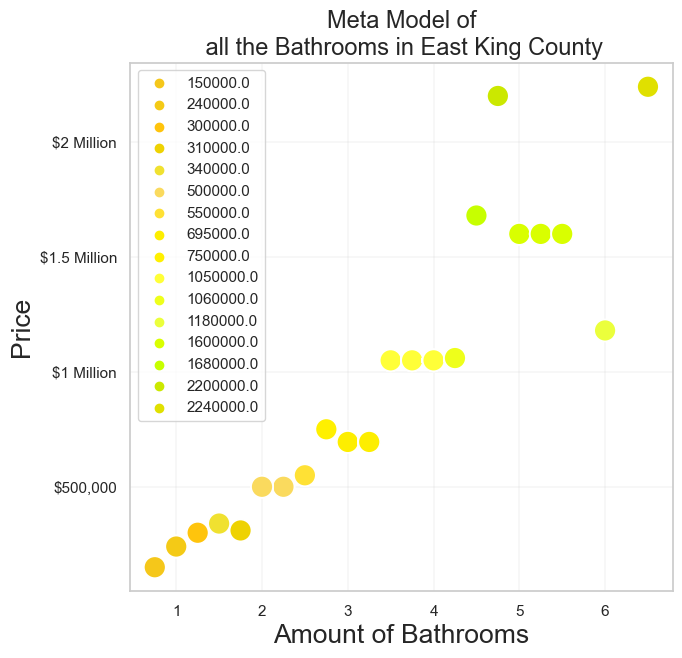

In [825]:
x = model_fit9['Amount_of_Bathrooms']
y = model_fit9['preds']
sns.set(style='whitegrid')

flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000']#,'#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit9, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/84902077.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])


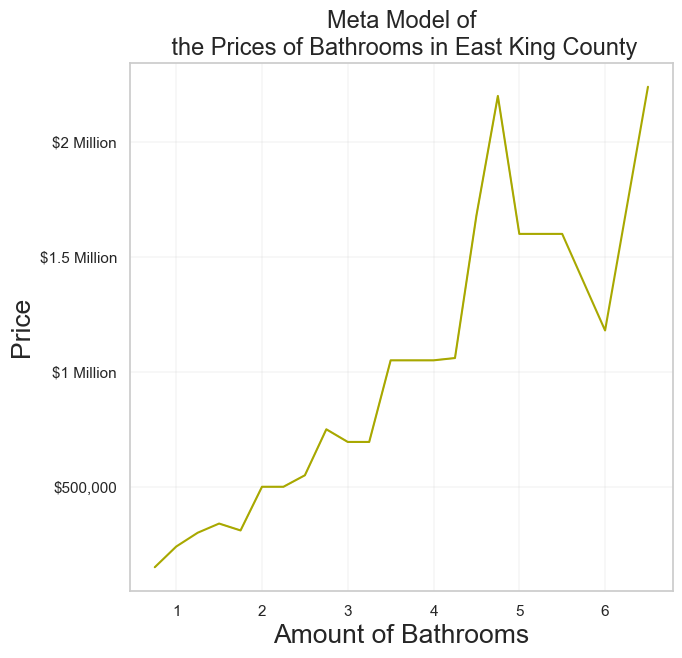

In [829]:
x = model_fit9['Amount_of_Bathrooms']
y = model_fit9['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit9, x=x, y=y,color='#a8a800')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n the Prices of Bathrooms in East King County',size=17)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [926]:
meta_model2 = models_predictions1

In [927]:
meta_model2.loc[len(meta_model2.index)] = ['$150,000','$240,000','$300,000','$340,000','$310,000',
                                           '$500,000','$500,000','$550,000','$750,000','$695,000',
                                           '$695,000','$1,050,000','$1,050,000','$1,050,000',
                                           '$1,060,000', '$1,680,000','$2,200,000',
                                           '$1,600,000','$1,600,000',
                                           '$1,600,000','$1,180,000','$2,240,000']
meta_model2 = meta_model2.rename(index={6: 'Final Prediction'})

In [928]:
meta_model2

0.75 Bathrooms  1 Bathrooms  1.25 Bathrooms  \
Poisson Regression               $304,665     $334,748        $367,801    
Bayesian Linear Regression       $177,191     $239,288        $301,385    
Quantile Regression 0.1          $111,167     $154,300        $197,433    
Quantile Regression 0.5          $206,584     $259,928        $313,273    
Quantile Regression 0.9          $298,998     $374,141        $449,284    
Ridge Regression                 $177,286     $239,370        $301,453    
Final Prediction                  $150,000     $240,000        $300,000   

                            1.5 Bathrooms  1.75 Bathrooms  2 Bathrooms  \
Poisson Regression              $404,117        $444,020     $487,862    
Bayesian Linear Regression      $363,483        $425,580     $487,677    
Quantile Regression 0.1         $240,567        $283,700     $326,833    
Quantile Regression 0.5         $366,617        $419,961     $473,305    
Quantile Regression 0.9         $524,427        $599,570     $674,713    
Ridge Regression                $363,537        $425,620     $487,703    
Final Prediction                 $340,000        $310,000     $500,000   

                            2.25 Bathrooms  2.5 Bathrooms  2.75 Bathrooms  \
Poisson Regression               $536,033       $588,961        $647,115    
Bayesian Linear Regression       $549,775       $611,872        $673,970    
Quantile Regression 0.1          $369,966       $413,100        $456,233    
Quantile Regression 0.5          $526,649       $579,994        $633,338    
Quantile Regression 0.9          $749,856       $824,999        $900,142    
Ridge Regression                 $549,787       $611,870        $673,954    
Final Prediction                  $500,000       $550,000        $750,000   

                            3 Bathrooms  ...  3.75 Bathrooms   4 Bathrooms  \
Poisson Regression            $711,011   ...       $943,106    $1,036,228    
Bayesian Linear Regression    $736,067   ...       $922,359      $984,457    
Quantile Regression 0.1       $499,366   ...       $628,766      $671,900    
Quantile Regression 0.5       $686,682   ...       $846,714      $900,059    
Quantile Regression 0.9       $975,286   ...     $1,200,715    $1,275,858    
Ridge Regression              $736,037   ...       $922,288      $984,371    
Final Prediction               $695,000  ...      $1,050,000    $1,050,000   

                            4.25 Bathrooms  4.5 Bathrooms  4.75 Bathrooms  \
Poisson Regression             $1,138,545     $1,250,965      $1,374,485    
Bayesian Linear Regression     $1,046,554     $1,108,651      $1,170,749    
Quantile Regression 0.1          $715,033       $758,166        $801,299    
Quantile Regression 0.5          $953,403     $1,006,747      $1,060,091    
Quantile Regression 0.9        $1,351,001     $1,426,144      $1,501,287    
Ridge Regression               $1,046,454     $1,108,538      $1,170,621    
Final Prediction                $1,060,000     $1,680,000      $2,200,000   

                             5 Bathrooms  5.25 Bathrooms  5.5 Bathrooms  \
Poisson Regression           $1,510,201      $1,659,318     $1,823,158    
Bayesian Linear Regression   $1,232,846      $1,294,943     $1,357,041    
Quantile Regression 0.1        $844,433        $887,566       $930,699    
Quantile Regression 0.5      $1,113,435      $1,166,780     $1,220,124    
Quantile Regression 0.9      $1,576,430      $1,651,573     $1,726,716    
Ridge Regression             $1,232,705      $1,294,788     $1,356,872    
Final Prediction              $1,600,000      $1,600,000     $1,600,000   

                             6 Bathrooms  6.5 Bathrooms  
Poisson Regression           $2,200,969     $2,657,073   
Bayesian Linear Regression   $1,481,236     $1,605,430   
Quantile Regression 0.1      $1,016,966     $1,103,233   
Quantile Regression 0.5      $1,326,812     $1,433,500   
Quantile Regression 0.9      $1,877,002     $2,027,289   
Ridge Regression          

In [888]:
box_df1 = meta_model2.transpose()
box_df1

Poisson Regression Bayesian Linear Regression  \
 0.75 Bathrooms          $304,665                   $177,191    
 1 Bathrooms             $334,748                   $239,288    
 1.25 Bathrooms          $367,801                   $301,385    
 1.5 Bathrooms           $404,117                   $363,483    
 1.75 Bathrooms          $444,020                   $425,580    
 2 Bathrooms             $487,862                   $487,677    
 2.25 Bathrooms          $536,033                   $549,775    
 2.5 Bathrooms           $588,961                   $611,872    
 2.75 Bathrooms          $647,115                   $673,970    
 3 Bathrooms             $711,011                   $736,067    
 3.25 Bathrooms          $781,216                   $798,164    
 3.5 Bathrooms           $858,353                   $860,262    
 3.75 Bathrooms          $943,106                   $922,359    
 4 Bathrooms           $1,036,228                   $984,457    
 4.25 Bathrooms        $1,138,545                 $1,046,554    
 4.5 Bathrooms         $1,250,965                 $1,108,651    
 4.75 Bathrooms        $1,374,485                 $1,170,749    
 5 Bathrooms           $1,510,201                 $1,232,846    
 5.25 Bathrooms        $1,659,318                 $1,294,943    
 5.5 Bathrooms         $1,823,158                 $1,357,041    
 6 Bathrooms           $2,200,969                 $1,481,236    
 6.5 Bathrooms         $2,657,073                 $1,605,430    

                Quantile Regression 0.1 Quantile Regression 0.5  \
 0.75 Bathrooms               $111,167                $206,584    
 1 Bathrooms                  $154,300                $259,928    
 1.25 Bathrooms               $197,433                $313,273    
 1.5 Bathrooms                $240,567                $366,617    
 1.75 Bathrooms               $283,700                $419,961    
 2 Bathrooms                  $326,833                $473,305    
 2.25 Bathrooms               $369,966                $526,649    
 2.5 Bathrooms                $413,100                $579,994    
 2.75 Bathrooms               $456,233                $633,338    
 3 Bathrooms                  $499,366                $686,682    
 3.25 Bathrooms               $542,500                $740,026    
 3.5 Bathrooms                $585,633                $793,370    
 3.75 Bathrooms               $628,766                $846,714    
 4 Bathrooms                  $671,900                $900,059    
 4.25 Bathrooms               $715,033                $953,403    
 4.5 Bathrooms                $758,166              $1,006,747    
 4.75 Bathrooms               $801,299              $1,060,091    
 5 Bathrooms                  $844,433              $1,113,435    
 5.25 Bathrooms               $887,566              $1,166,780    
 5.5 Bathrooms                $930,699              $1,220,124    
 6 Bathrooms                $1,016,966              $1,326,812    
 6.5 Bathrooms              $1,103,233              $1,433,500    

                Quantile Regression 0.9 Ridge Regression Final Prediction  
 0.75 Bathrooms               $298,998         $177,286          $150,000  
 1 Bathrooms                  $374,141         $239,370          $240,000  
 1.25 Bathrooms               $449,284         $301,453          $300,000  
 1.5 Bathrooms                $524,427         $363,537          $340,000  
 1.75 Bathrooms               $599,570         $425,620          $310,000  
 2 Bathrooms                  $674,713         $487,703          $500,000  
 2.25 Bathrooms               $749,856         $549,787          $500,000  
 2.5 Bathrooms                $824,999         $611,870          $550,000  
 2.75 Bathrooms               $900,142         $673,954          $750,000  
 3 Bathrooms                  $975,286         $736,037          $695,000  
 3.25 Bathrooms             $1,050,429         $798,121          $695,000  
 3.5 Bathrooms              $1,125,572         $860,204        $1,

In [929]:
melted_data2 = pd.melt(box_df1, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data2 = melted_data2.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [985]:
melted_data2[melted_data2.columns[1:]] = melted_data2[melted_data2.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [986]:
melted_data2

Prediction Model  Prediction
0    Poisson Regression    304665.0
1    Poisson Regression    334748.0
2    Poisson Regression    367801.0
3    Poisson Regression    404117.0
4    Poisson Regression    444020.0
..                  ...         ...
149    Final Prediction   1600000.0
150    Final Prediction   1600000.0
151    Final Prediction   1600000.0
152    Final Prediction   1180000.0
153    Final Prediction   2240000.0

[154 rows x 2 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_47836/1519345887.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_yticklabels(ylabels)


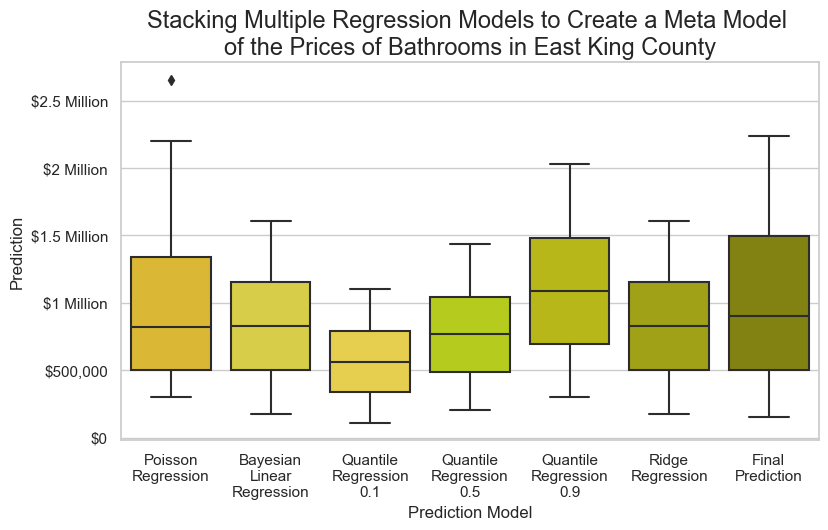

In [989]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
flatui = ['#f5c71a','#f0e130','#ffe135','#cbe800','#d1d100' ,'#b8b800','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data2,x='Prediction Model', y='Prediction',palette=flatui)
ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of Bathrooms in East King County", size=17)
wrap_labels(x, 10)


In [939]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0,:] = 'background-color:#f5c71a;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#d9ff00;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#ffe135;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#cbe800;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#ffc40c;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#CCCC00;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#b8b800;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model2 = meta_model2.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #F1E5AC')]},
            {"selector":"thead", 'props':[("background-color","#F1E5AC"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#F1E5AC'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [940]:
import dataframe_image as dfi
dfi.export(meta_model2, 'meta_model2.png')

In [941]:
meta_model2

In [253]:
%store Quantile_Regression_Prediction1
%store Weighted_Average_Prediction1

Stored 'Quantile_Regression_Prediction1' (DataFrame)
Stored 'Weighted_Average_Prediction1' (DataFrame)


In [453]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode

    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)
    
    
    floors_eastking = []
    for i in floors_index:
        if locations[i] == zip_loca[0] : floors_eastking.append(i)
        elif locations[i] == zip_loca[1] : floors_eastking.append(i)
        elif locations[i] == zip_loca[2] : floors_eastking.append(i)
        elif locations[i] == zip_loca[3] : floors_eastking.append(i)
        elif locations[i] == zip_loca[4]: floors_eastking.append(i)
        elif locations[i] == zip_loca[5] : floors_eastking.append(i)
        elif locations[i] == zip_loca[6] : floors_eastking.append(i)
        elif locations[i] == zip_loca[7]: floors_eastking.append(i)
        elif locations[i] == zip_loca[8] : floors_eastking.append(i)
        

    price = house_info["Price"].tolist()

    price_eastking = []
    for i in floors_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_eastking = []
for i in no_of_floors:
    price_floors_eastking.append(PRICE_FLOORS(i))
price_floors_eastking = sum(price_floors_eastking, [])
len(price_floors_eastking)

2455

In [454]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode

    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
            

    
    

    for i in floors_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_FLOORS)
        
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_eastking = []
for i in no_of_floors:
    amount_floors_eastking.append(AMOUNT_FLOORS(i))
amount_floors_eastking= sum(amount_floors_eastking, [])
len(amount_floors_eastking)

2455

In [455]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_eastking,
                                'Price':price_floors_eastking})
#regressiondata3.Amount_of_Floors.value_counts()
regressiondata3

Amount_of_Floors     Price
0                  1.0  510000.0
1                  1.0  400000.0
2                  1.0  660500.0
3                  1.0  420000.0
4                  1.0  592500.0
...                ...       ...
2450               2.5  450000.0
2451               2.5  646800.0
2452               2.5  635000.0
2453               2.5  680000.0
2454               2.5  669950.0

[2455 rows x 2 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/714351756.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',


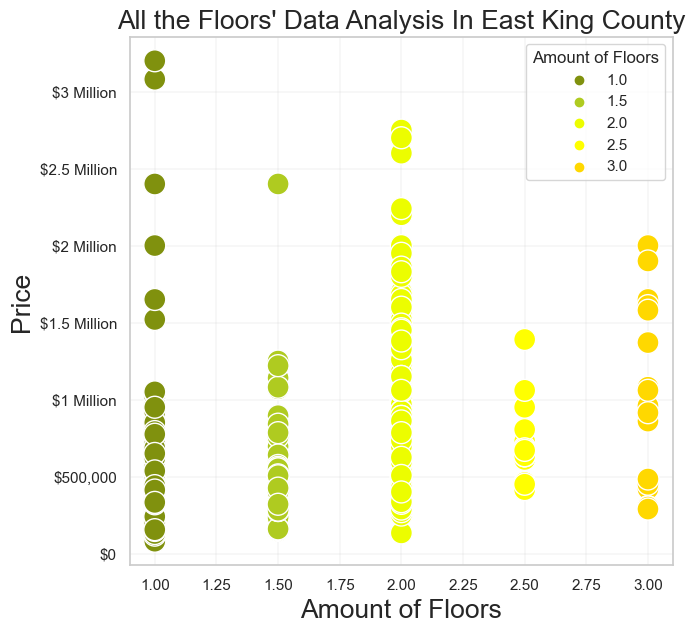

In [456]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']#,'#efcc00']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors', palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In East King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million'])
plt.gcf().set_size_inches((7,7))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [457]:
import pandas as pd
from sklearn.linear_model import PoissonRegressor

model10 = PoissonRegressor()

model10.fit(regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [458]:
x = regressiondata3[['Amount_of_Floors']]
y = regressiondata3[['Price']]
prediction3 = model10.predict(x)

In [459]:
model_fit10 = regressiondata3
model_fit10['preds'] = prediction3

In [460]:
model_fit10

Amount_of_Floors     Price          preds
0                  1.0  510000.0  468653.925912
1                  1.0  400000.0  468653.925912
2                  1.0  660500.0  468653.925912
3                  1.0  420000.0  468653.925912
4                  1.0  592500.0  468653.925912
...                ...       ...            ...
2450               2.5  450000.0  768248.177702
2451               2.5  646800.0  768248.177702
2452               2.5  635000.0  768248.177702
2453               2.5  680000.0  768248.177702
2454               2.5  669950.0  768248.177702

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/793982902.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])


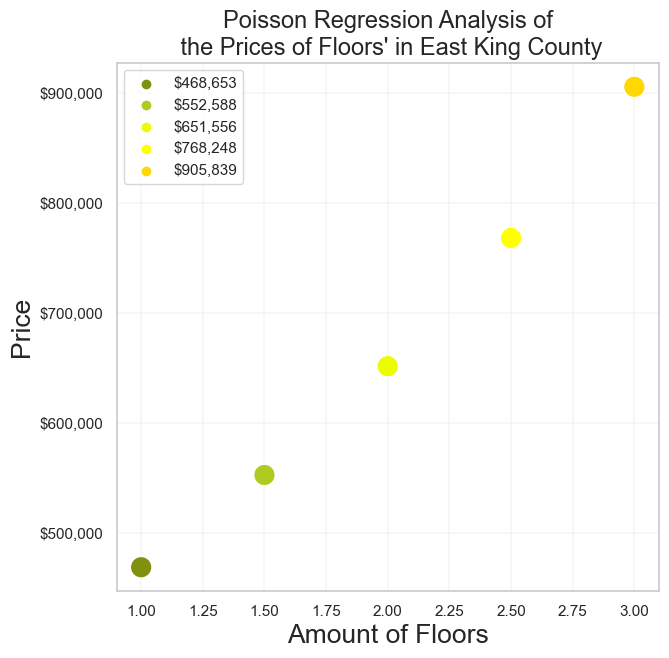

In [461]:
x = model_fit10['Amount_of_Floors']
y = model_fit10['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']#,'#efcc00']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit10, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Floors')
L=plt.legend()
L.get_texts()[0].set_text('$468,653')
L.get_texts()[1].set_text('$552,588')
L.get_texts()[2].set_text('$651,556')
L.get_texts()[3].set_text('$768,248')
L.get_texts()[4].set_text('$905,839')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/2822057550.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])


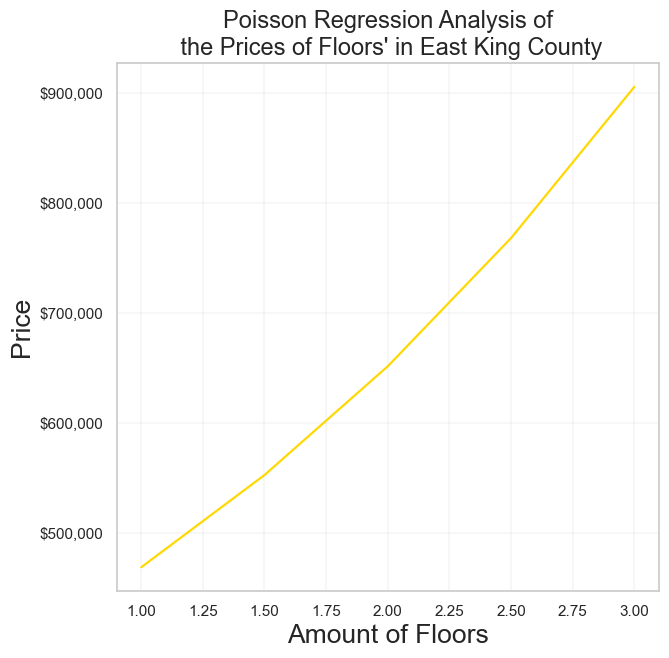

In [462]:
x = model_fit10['Amount_of_Floors']
y = model_fit10['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']#,'#efcc00']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit10, x=x, y=y,color='#ffd800')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])
plt.show()

In [463]:
(model_fit10['Price'] > model_fit10['preds']).value_counts()

False    1421
True     1034
dtype: int64

In [464]:
i = 0
y= 0
x = []
while i <  1421:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1034:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Possion Model\n 57% Accuracy ')

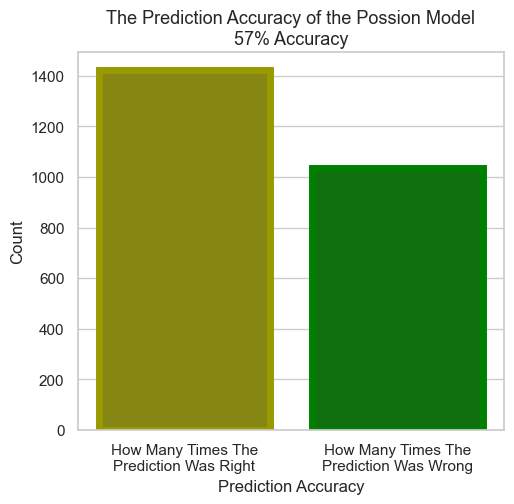

In [465]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Possion Model\n 57% Accuracy ',size=13)

In [466]:
# Importing modules that are required
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge

# Creating and training model
model11 = BayesianRidge()
model11.fit(regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']])
   
# Model making a prediction on test data
prediction4 = model11.predict(regressiondata3[['Amount_of_Floors']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [467]:
model_fit11 = regressiondata3
model_fit11['preds'] = prediction4

In [468]:
model_fit11

Amount_of_Floors     Price          preds
0                  1.0  510000.0  466202.178721
1                  1.0  400000.0  466202.178721
2                  1.0  660500.0  466202.178721
3                  1.0  420000.0  466202.178721
4                  1.0  592500.0  466202.178721
...                ...       ...            ...
2450               2.5  450000.0  746546.180586
2451               2.5  646800.0  746546.180586
2452               2.5  635000.0  746546.180586
2453               2.5  680000.0  746546.180586
2454               2.5  669950.0  746546.180586

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/3288504273.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',


[Text(0, 400000.0, '0'),
 Text(0, 450000.0, '$400,000'),
 Text(0, 500000.0, '$450,000'),
 Text(0, 550000.0, '$500,000'),
 Text(0, 600000.0, '$550,000'),
 Text(0, 650000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 850000.0, '$850,000'),
 Text(0, 900000.0, '')]

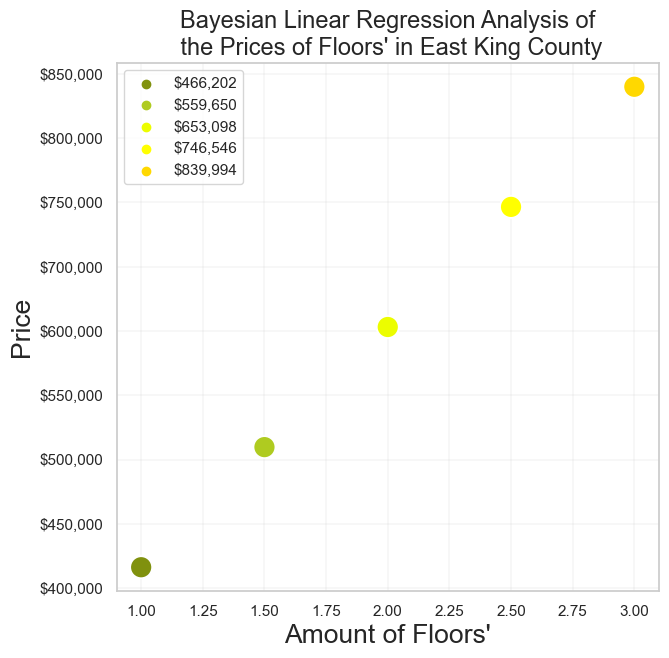

In [469]:
x = model_fit11['Amount_of_Floors']
y = model_fit11['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit11, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L.get_texts()[0].set_text('$466,202')
L.get_texts()[1].set_text('$559,650')
L.get_texts()[2].set_text('$653,098')
L.get_texts()[3].set_text('$746,546')
L.get_texts()[4].set_text('$839,994')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',
                    '$700,000','$750,000','$800,000','$850,000'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/867266500.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',


[Text(0, 400000.0, '0'),
 Text(0, 450000.0, '$400,000'),
 Text(0, 500000.0, '$450,000'),
 Text(0, 550000.0, '$500,000'),
 Text(0, 600000.0, '$550,000'),
 Text(0, 650000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 850000.0, '$850,000'),
 Text(0, 900000.0, '')]

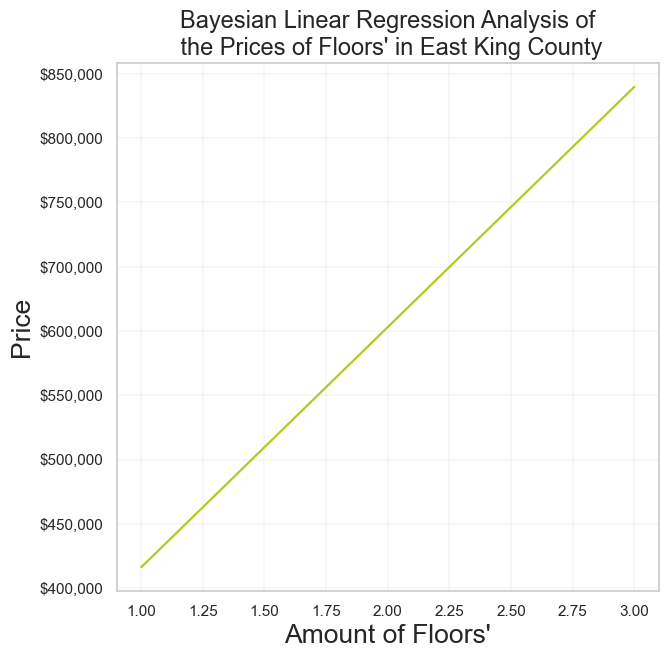

In [470]:
x = model_fit11['Amount_of_Floors']
y = model_fit11['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit11, x=x, y=y,color='#AFCB20')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',
                    '$700,000','$750,000','$800,000','$850,000'])

In [471]:
(model_fit11['Price'] > model_fit11['preds']).value_counts()

False    1427
True     1028
dtype: int64

In [472]:
i = 0
y= 0
x = []
while i <  1427:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1028:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Bayesian Linear Model\n 58% Accuracy ')

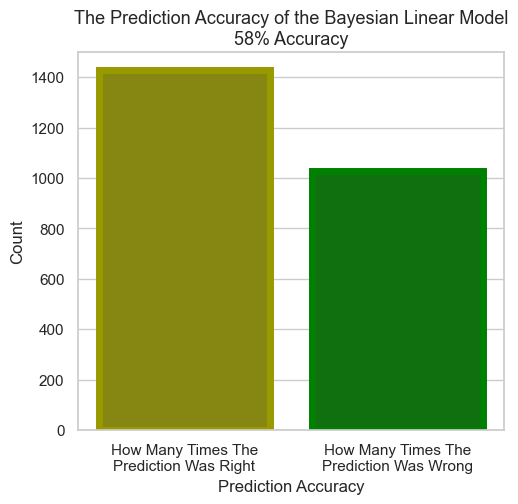

In [473]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Bayesian Linear Model\n 58% Accuracy ',size=13)

In [474]:
from sklearn.linear_model import QuantileRegressor


X = regressiondata3[['Amount_of_Floors']]
y = regressiondata3[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata3[['Amount_of_Floors']])
y_pred_2 = qrf2.predict(regressiondata3[['Amount_of_Floors']])
y_pred_3 = qrf3.predict(regressiondata3[['Amount_of_Floors']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packa

In [475]:
Quantile_regression3 = pd.DataFrame({'Amount_of_Floors': regressiondata3['Amount_of_Floors'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata3['Price']})

In [476]:
Quantile_regression3

Amount_of_Floors       0.1 Pred       0.5 Pred      0.9 Pred     Price
0                  1.0  270000.032808  434991.947124  6.534496e+05  510000.0
1                  1.0  270000.032808  434991.947124  6.534496e+05  400000.0
2                  1.0  270000.032808  434991.947124  6.534496e+05  660500.0
3                  1.0  270000.032808  434991.947124  6.534496e+05  420000.0
4                  1.0  270000.032808  434991.947124  6.534496e+05  592500.0
...                ...            ...            ...           ...       ...
2450               2.5  457499.941388  697481.947432  1.053206e+06  450000.0
2451               2.5  457499.941388  697481.947432  1.053206e+06  646800.0
2452               2.5  457499.941388  697481.947432  1.053206e+06  635000.0
2453               2.5  457499.941388  697481.947432  1.053206e+06  680000.0
2454               2.5  457499.941388  697481.947432  1.053206e+06  669950.0

[2455 rows x 5 columns]

In [35]:
for i,x in enumerate(Quantile_regression3.Amount_of_Floors):
    if x == 3:print(i)

2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433


In [477]:
Quantileregression_updated3= Quantile_regression3.loc[[0,2310,632,2434,2414]]
Quantileregression_updated3 = Quantileregression_updated3.drop('Price', axis=1)
Quantileregression_updated3

Amount_of_Floors       0.1 Pred       0.5 Pred      0.9 Pred
0                  1.0  270000.032808  434991.947124  6.534496e+05
2310               1.5  332500.002335  522488.613894  7.867016e+05
632                2.0  394999.971861  609985.280663  9.199536e+05
2434               2.5  457499.941388  697481.947432  1.053206e+06
2414               3.0  519999.910915  784978.614202  1.186458e+06

In [478]:
melted_data3 = pd.melt(Quantileregression_updated3, id_vars=['Amount_of_Floors'])
melted_data3 = melted_data3.dropna()
melted_data3 = melted_data3.rename(columns={'variable': 'Percentile'})
melted_data3

Amount_of_Floors Percentile         value
0                1.0   0.1 Pred  2.700000e+05
1                1.5   0.1 Pred  3.325000e+05
2                2.0   0.1 Pred  3.950000e+05
3                2.5   0.1 Pred  4.574999e+05
4                3.0   0.1 Pred  5.199999e+05
5                1.0   0.5 Pred  4.349919e+05
6                1.5   0.5 Pred  5.224886e+05
7                2.0   0.5 Pred  6.099853e+05
8                2.5   0.5 Pred  6.974819e+05
9                3.0   0.5 Pred  7.849786e+05
10               1.0   0.9 Pred  6.534496e+05
11               1.5   0.9 Pred  7.867016e+05
12               2.0   0.9 Pred  9.199536e+05
13               2.5   0.9 Pred  1.053206e+06
14               3.0   0.9 Pred  1.186458e+06

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/267057196.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])


[Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '')]

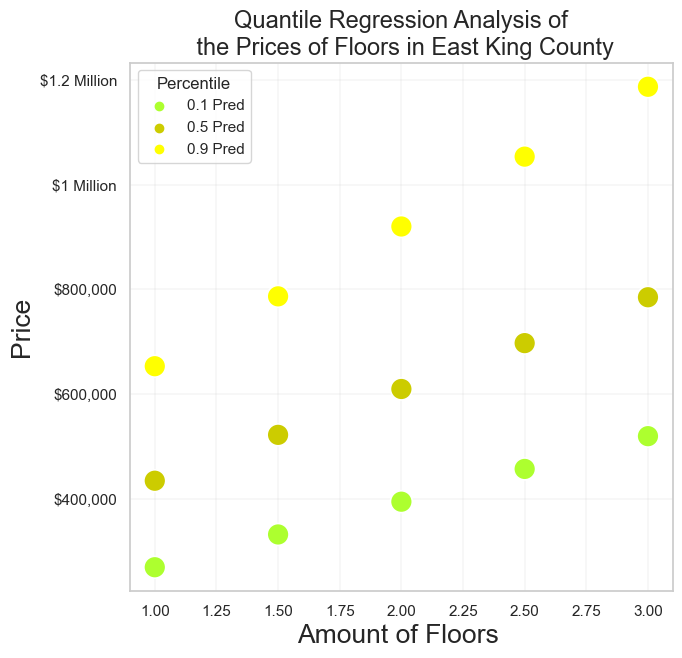

In [479]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data3, x="Amount_of_Floors", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Floors")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Floors in East King County',size=17)
plt.xlabel("Amount of Floors ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/1565280033.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])


[Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '')]

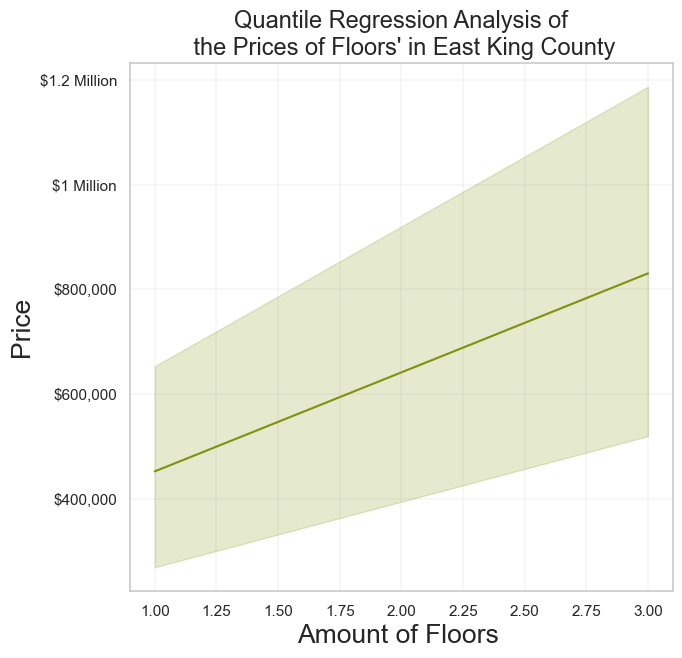

In [39]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=melted_data3, x="Amount_of_Floors", 
                     y='value',color='#80910E')
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Floors")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])

In [40]:
(Quantile_regression3['Price'] > Quantile_regression3['0.1 Pred']).value_counts()

True     2211
False     244
dtype: int64

In [41]:
i = 0
y= 0
x = []
while i <  244:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 2211:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ')

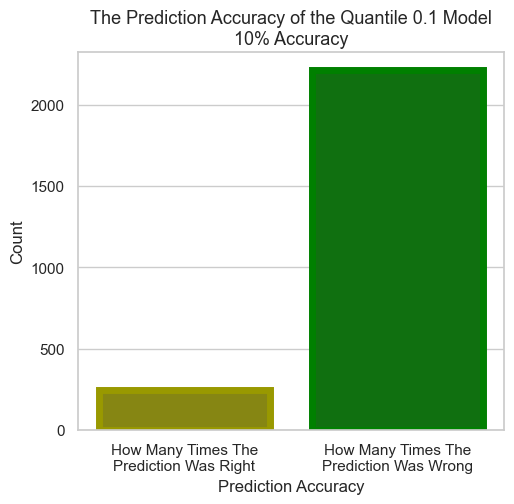

In [42]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ',size=13)

In [43]:
(Quantile_regression3['Price'] > Quantile_regression3['0.5 Pred']).value_counts()

True     1235
False    1220
dtype: int64

In [44]:
i = 0
y= 0
x = []
while i <  1235:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1220:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ')

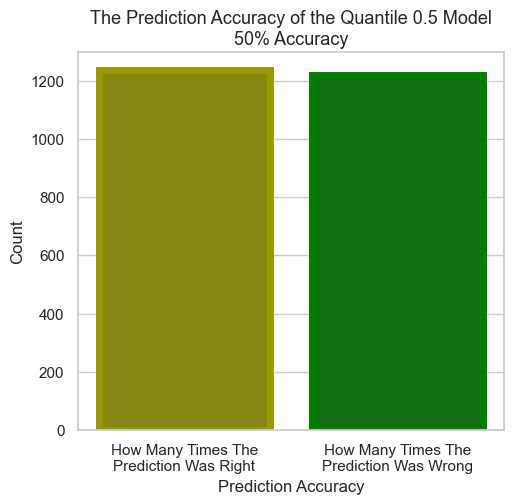

In [45]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ',size=13)

In [46]:
(Quantile_regression3['Price'] > Quantile_regression3['0.9 Pred']).value_counts()

False    2209
True      246
dtype: int64

In [47]:
i = 0
y= 0
x = []
while i <  2209:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 246:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ')

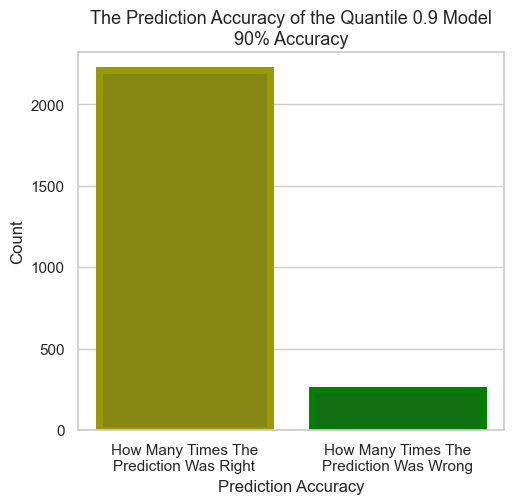

In [48]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ',size=13)

In [480]:
from sklearn.linear_model import Ridge
model12 = Ridge(alpha=1.0)
model12.fit(regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']])
preds_12 = model12.predict(regressiondata3[['Amount_of_Floors']])

In [481]:
model_fit12 = regressiondata3
model_fit12['preds'] = preds_12

In [482]:
model_fit12

Amount_of_Floors     Price          preds
0                  1.0  510000.0  465948.523166
1                  1.0  400000.0  465948.523166
2                  1.0  660500.0  465948.523166
3                  1.0  420000.0  465948.523166
4                  1.0  592500.0  465948.523166
...                ...       ...            ...
2450               2.5  450000.0  746811.029934
2451               2.5  646800.0  746811.029934
2452               2.5  635000.0  746811.029934
2453               2.5  680000.0  746811.029934
2454               2.5  669950.0  746811.029934

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/3583452325.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$450,000','$500,000','$550,000','$600,000','$650,000',


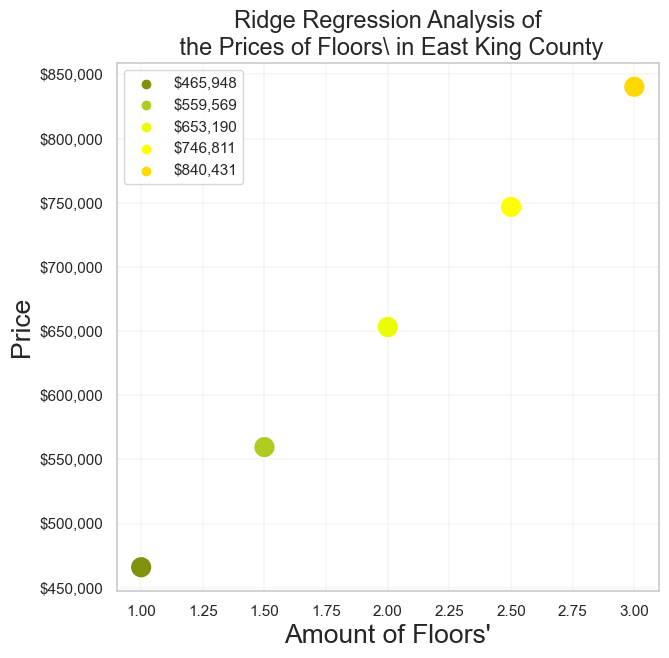

In [483]:
x = model_fit12['Amount_of_Floors']
y = model_fit12['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit12, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Floors\ in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('$465,948')
L.get_texts()[1].set_text('$559,569')
L.get_texts()[2].set_text('$653,190')
L.get_texts()[3].set_text('$746,811')
L.get_texts()[4].set_text('$840,431')
#L.legend(title='Predictions')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$450,000','$500,000','$550,000','$600,000','$650,000',
                    '$700,000','$750,000','$800,000','$850,000'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/1210128381.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',


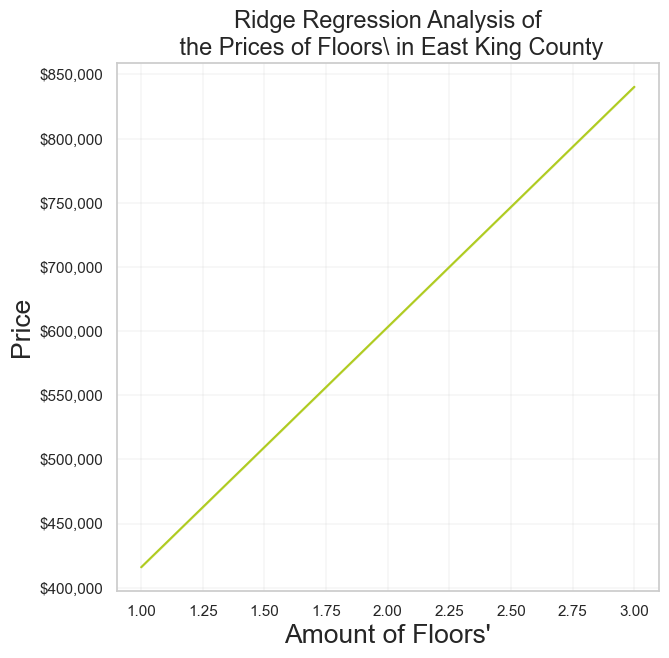

In [54]:
x = model_fit12['Amount_of_Floors']
y = model_fit12['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit12, x=x, y=y,color='#AFCB20')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Floors\ in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000',
                    '$700,000','$750,000','$800,000','$850,000'])
plt.show()

In [55]:
(model_fit12['Price'] > model_fit12['preds']).value_counts()

False    1427
True     1028
dtype: int64

In [56]:
i = 0
y= 0
x = []
while i <  1427:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1028:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Ridge Model\n 60% Accuracy ')

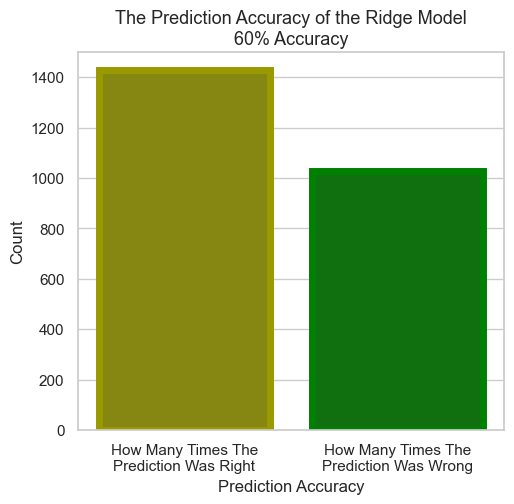

In [57]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Ridge Model\n 60% Accuracy ',size=13)

In [486]:
# Creating the DataFrame
models_predictions3 = pd.DataFrame({"1 Floor":['$468,653','$466,202','$270,000','$434,991','$653,449','$465,948'], 
                   "1.5 Floors":['$552,588','$559,650','$332,500','$522,488','$786,701','$559,569'], 
                   "2 Floors":['$651,556','$653,098','$394,999','$609,985','$919,953','$653,190'], 
                   "2.5 Floors":['$768,248','$746,546','$457,499','$697,481','$1,053,206','$746,811'],
                   "3 Floors":['$905,839','$839,994','$519,999','$784,978','$1,186,458','$840,431'], 
                        }) 
  
# Create the index
index_ = ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions3.index = index_

In [487]:
models_predictions3

1 Floor 1.5 Floors  2 Floors  2.5 Floors  \
Poisson Regression          $468,653   $552,588  $651,556    $768,248   
Bayesian Linear Regression  $466,202   $559,650  $653,098    $746,546   
Quantile Regression 0.1     $270,000   $332,500  $394,999    $457,499   
Quantile Regression 0.5     $434,991   $522,488  $609,985    $697,481   
Quantile Regression 0.9     $653,449   $786,701  $919,953  $1,053,206   
Ridge Regression            $465,948   $559,569  $653,190    $746,811   

                              3 Floors  
Poisson Regression            $905,839  
Bayesian Linear Regression    $839,994  
Quantile Regression 0.1       $519,999  
Quantile Regression 0.5       $784,978  
Quantile Regression 0.9     $1,186,458  
Ridge Regression              $840,431

In [488]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [489]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [490]:
X,y = regressiondata3[['Amount_of_Floors']],regressiondata3[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model3_stack = clf_stack.fit(X, y)   # training of stacked model
pred3_stack = model3_stack.predict(X) 

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for Quant

In [64]:
model_fit13 = regressiondata3
model_fit13['preds'] = pred3_stack

In [65]:
model_fit13

Amount_of_Floors     Price      preds
0                  1.0  510000.0   390000.0
1                  1.0  400000.0   390000.0
2                  1.0  660500.0   390000.0
3                  1.0  420000.0   390000.0
4                  1.0  592500.0   390000.0
...                ...       ...        ...
2450               2.5  450000.0  1060000.0
2451               2.5  646800.0  1060000.0
2452               2.5  635000.0  1060000.0
2453               2.5  680000.0  1060000.0
2454               2.5  669950.0  1060000.0

[2455 rows x 3 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/1034123911.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000',


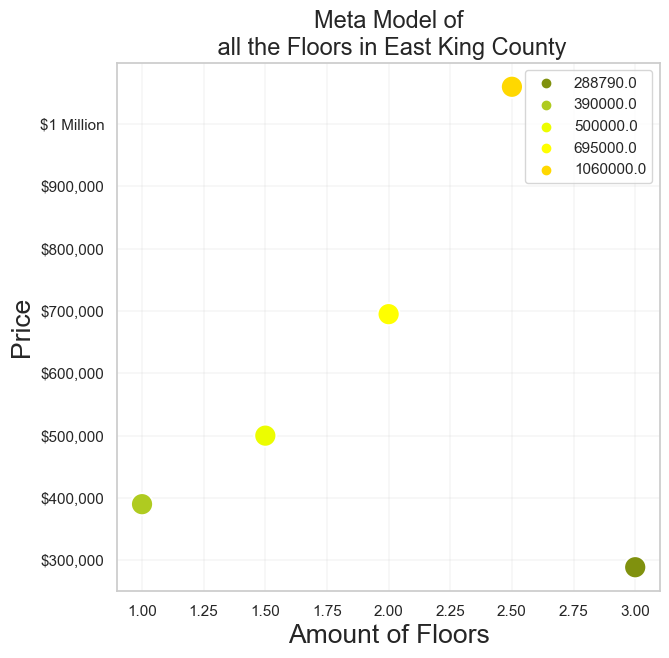

In [68]:
x = model_fit13['Amount_of_Floors']
y = model_fit13['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit13, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Floors in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000',
                    '$800,000','$900,000','$1 Million'])
plt.show()

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/647252909.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000',


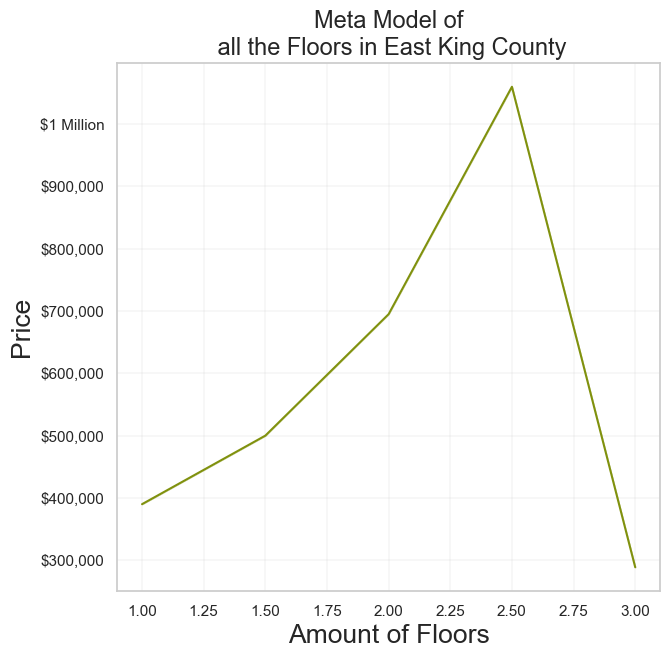

In [70]:
x = model_fit13['Amount_of_Floors']
y = model_fit13['preds']
sns.set(style='whitegrid')
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit13, x=x, y=y,color='#80910E')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Floors in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)

plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000',
                    '$800,000','$900,000','$1 Million'])
plt.show()

In [491]:
meta_model3 = models_predictions3

In [492]:
meta_model3.loc[len(meta_model3.index)] = ['$390,000', '$500,000',
                                           '$695,000', '$1,060,000','$288,790']
meta_model3 = meta_model3.rename(index={6: 'Final Prediction'})

In [493]:
meta_model3

1 Floor 1.5 Floors  2 Floors  2.5 Floors  \
Poisson Regression          $468,653   $552,588  $651,556    $768,248   
Bayesian Linear Regression  $466,202   $559,650  $653,098    $746,546   
Quantile Regression 0.1     $270,000   $332,500  $394,999    $457,499   
Quantile Regression 0.5     $434,991   $522,488  $609,985    $697,481   
Quantile Regression 0.9     $653,449   $786,701  $919,953  $1,053,206   
Ridge Regression            $465,948   $559,569  $653,190    $746,811   
Final Prediction            $390,000   $500,000  $695,000  $1,060,000   

                              3 Floors  
Poisson Regression            $905,839  
Bayesian Linear Regression    $839,994  
Quantile Regression 0.1       $519,999  
Quantile Regression 0.5       $784,978  
Quantile Regression 0.9     $1,186,458  
Ridge Regression              $840,431  
Final Prediction              $288,790

In [494]:
box_df3 = meta_model3.transpose()
box_df3

Poisson Regression Bayesian Linear Regression  \
1 Floor              $468,653                   $466,202   
1.5 Floors           $552,588                   $559,650   
2 Floors             $651,556                   $653,098   
2.5 Floors           $768,248                   $746,546   
3 Floors             $905,839                   $839,994   

           Quantile Regression 0.1 Quantile Regression 0.5  \
1 Floor                   $270,000                $434,991   
1.5 Floors                $332,500                $522,488   
2 Floors                  $394,999                $609,985   
2.5 Floors                $457,499                $697,481   
3 Floors                  $519,999                $784,978   

           Quantile Regression 0.9 Ridge Regression Final Prediction  
1 Floor                   $653,449         $465,948         $390,000  
1.5 Floors                $786,701         $559,569         $500,000  
2 Floors                  $919,953         $653,190         $695,000  
2.5 Floors              $1,053,206         $746,811       $1,060,000  
3 Floors                $1,186,458         $840,431         $288,790

In [85]:
melted_data3= pd.melt(box_df3, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data3 = melted_data3.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [86]:
melted_data3[melted_data3.columns[1:]] = melted_data3[melted_data3.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [87]:
melted_data3

Prediction Model  Prediction
0           Poisson Regression    468653.0
1           Poisson Regression    552588.0
2           Poisson Regression    651556.0
3           Poisson Regression    768248.0
4           Poisson Regression    905839.0
5   Bayesian Linear Regression    466202.0
6   Bayesian Linear Regression    559650.0
7   Bayesian Linear Regression    653098.0
8   Bayesian Linear Regression    746546.0
9   Bayesian Linear Regression    839994.0
10     Quantile Regression 0.1    270000.0
11     Quantile Regression 0.1    332500.0
12     Quantile Regression 0.1    394999.0
13     Quantile Regression 0.1    457499.0
14     Quantile Regression 0.1    519999.0
15     Quantile Regression 0.5    434991.0
16     Quantile Regression 0.5    522488.0
17     Quantile Regression 0.5    609985.0
18     Quantile Regression 0.5    697481.0
19     Quantile Regression 0.5    784978.0
20     Quantile Regression 0.9    653449.0
21     Quantile Regression 0.9    786701.0
22     Quantile Regression 0.9    919953.0
23     Quantile Regression 0.9   1053206.0
24     Quantile Regression 0.9   1186458.0
25            Ridge Regression    465948.0
26            Ridge Regression    559569.0
27            Ridge Regression    653190.0
28            Ridge Regression    746811.0
29            Ridge Regression    840431.0
30            Final Prediction    390000.0
31            Final Prediction    500000.0
32            Final Prediction    695000.0
33            Final Prediction   1060000.0
34            Final Prediction    288790.0

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/1029859981.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_yticklabels(ylabels)


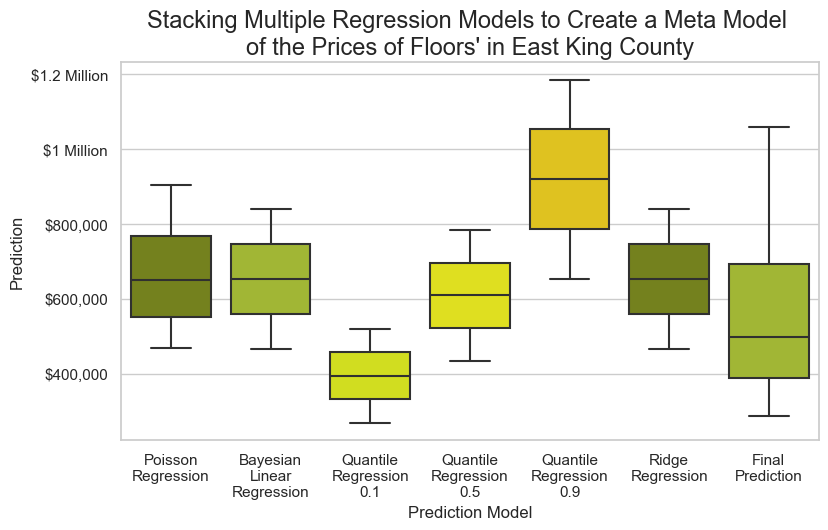

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data3,x='Prediction Model', y='Prediction',
             palette=flatui)#,hue='Prediction Model',width=1.9)
             #hue='Prediction Model')
#x.set_xticklabels(x.get_xticklabels(), rotation=45,horizontalalignment='right')
ylabels = ['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million']
x.set_yticklabels(ylabels)
#x.set_ylabel('0','$0','$200,000','$400,000','$600,000','$800,000','$1 Million','$1.2 Million','$1.4 Million')
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of Floors\' in East King County", size=17)
wrap_labels(x, 10)
#x.set_xticklabels(rotation=30)

In [495]:
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800']
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0,:] = 'background-color:#FFFF00;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#ffd800;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#ECFD00;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#ffd800;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#AFCB20;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#ffd800;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#80910E;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model3 = meta_model3.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #F2FFD1')]},
            {"selector":"thead", 'props':[("background-color","#F2FFD1"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#F2FFD1'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [496]:
import dataframe_image as dfi
dfi.export(meta_model3, 'meta_model3.png')

In [497]:
meta_model3

In [284]:
%store Quantile_Regression_Prediction2
%store Weighted_Average_Prediction2

Stored 'Quantile_Regression_Prediction2' (DataFrame)
Stored 'Weighted_Average_Prediction2' (DataFrame)


In [103]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
   

    years_built_eastking = []
    for i in years_built_index:
        if locations[i] == zip_loca[0] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[1] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[2] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[3] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[4]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[5] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[6] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[7]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[8] : years_built_eastking.append(i)
       


    price = house_info["Price"].tolist()

    price_eastking = []
    for i in years_built_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_eastking = []
for i in no_of_Year:
    price_Year_eastking.append(PRICE_YEARS_BUILT(i))
price_Year_eastking = sum(price_Year_eastking, [])
len(price_Year_eastking)

2455

In [288]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
   

    for i in years_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEARS)
       

    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_eastking = []
for i in no_of_years:
    amount_years_eastking.append(AMOUNT_YEARS_BUILT(i))
amount_years_eastking= sum(amount_years_eastking, [])
len(amount_years_eastking)

2455

In [291]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_eastking,
                      'Price':price_Year_eastking})
regressiondata4

Year_Built     Price
0           2014  453246.0
1           2014  372977.0
2           2014  357186.0
3           2014  479990.0
4           2014  439990.0
...          ...       ...
2450        1935  895000.0
2451        1935  160000.0
2452        1934  230000.0
2453        1934  275000.0
2454        1934  529000.0

[2455 rows x 2 columns]

In [292]:
year = regressiondata4['Year_Built'].value_counts()
year

2005    116
2004    110
2006     93
2003     91
1999     89
       ... 
1919      1
1917      1
1908      1
1906      1
1924      1
Name: Year_Built, Length: 108, dtype: int64

In [308]:
reg1,year1 = [],[]
for i,x in enumerate(amount_years_eastking):
    if x == 1900:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1901:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1902:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1903:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1904:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1905:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1906:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1907:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1908:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1909:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1910:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1911:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1912:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1913:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1914:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1915:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1916:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1917:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1918:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1919:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1920:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1921:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1922:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1923:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1924:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1925:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1926:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1927:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1928:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1929:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1930:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1931:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1932:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1933:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 1934:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1935:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1936:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1937:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
reg1.remove(536751.0)
year1.remove(2013)

In [309]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata44
for i,x in enumerate(regressiondata44.Year_Built):print(i,x,reg1[i])

0 1925 280000.0
1 1925 279000.0
2 1924 208000.0
3 1910 195000.0
4 1910 160000.0
5 1928 150000.0
6 1928 235000.0
7 1928 303000.0
8 1927 307000.0
9 1927 255000.0
10 1929 285000.0
11 1920 343000.0
12 1922 134000.0
13 1922 275000.0
14 1922 170000.0
15 1922 265000.0
16 1909 439900.0
17 1909 445000.0
18 1906 190000.0
19 1930 275000.0
20 1930 286000.0
21 1930 800000.0
22 1919 360000.0
23 1900 550000.0
24 1900 130000.0
25 1900 210000.0
26 1908 572000.0
27 1923 870000.0
28 1923 276000.0
29 1923 255000.0
30 1923 244500.0
31 1923 301000.0
32 1912 80000.0
33 1912 600000.0
34 1912 323000.0
35 1912 230950.0
36 1912 385000.0
37 1916 425000.0
38 1916 312000.0
39 1921 212000.0
40 1911 399500.0
41 1937 405000.0
42 1937 335000.0
43 1915 201000.0
44 1915 465000.0
45 1915 190000.0
46 1931 542500.0
47 1931 335000.0
48 1931 775000.0
49 1931 282000.0
50 1913 390000.0
51 1913 349950.0
52 1913 360000.0
53 1917 250000.0
54 1914 248000.0
55 1903 170000.0
56 1903 457000.0
57 1936 550000.0
58 1936 550000.0
59 1936 

In [295]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
x= regressiondata44.Year_Built.value_counts()
len(x)

#for i,x in enumerate(regressiondata44.Year_Built):print(i,x,regressiondata44.Price[i])

31

In [310]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_eastking):
    if x == 1938:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1939:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1940:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1941:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1942:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1943:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1944:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1945:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1946:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1947:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1948:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1949:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1950:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1951:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1952:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1953:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1954:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1955:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1956:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1957:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1958:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1959:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1960:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1961:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1962:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1963:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1964:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1965:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1966:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1967:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1968:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1969:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1970:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1971:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 1972:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1973:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1974:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1975:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
reg1.remove(589000.0)
year1.remove(1981)

In [311]:
regressiondata45 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata45
for i,x in enumerate(regressiondata45.Year_Built):print(i,x,reg1[i])

0 1968 499000.0
1 1968 850000.0
2 1968 585000.0
3 1968 380000.0
4 1968 330000.0
5 1968 765000.0
6 1968 340000.0
7 1968 406430.0
8 1968 625700.0
9 1968 430000.0
10 1968 395000.0
11 1968 375000.0
12 1968 420000.0
13 1968 735000.0
14 1968 2000000.0
15 1968 300000.0
16 1968 450000.0
17 1968 540000.0
18 1968 599000.0
19 1968 499900.0
20 1968 284000.0
21 1968 283700.0
22 1968 279475.0
23 1967 299000.0
24 1967 530000.0
25 1967 496500.0
26 1967 525000.0
27 1967 290000.0
28 1967 382500.0
29 1967 415000.0
30 1967 584999.0
31 1967 1250000.0
32 1967 358000.0
33 1967 580000.0
34 1967 435000.0
35 1967 663000.0
36 1967 295000.0
37 1967 377000.0
38 1967 234000.0
39 1967 450000.0
40 1967 503000.0
41 1967 369300.0
42 1967 427500.0
43 1967 396450.0
44 1967 450000.0
45 1959 299000.0
46 1959 150000.0
47 1959 280000.0
48 1959 396480.0
49 1959 835000.0
50 1959 281000.0
51 1959 968000.0
52 1959 465000.0
53 1959 1650000.0
54 1959 330000.0
55 1962 505000.0
56 1962 286300.0
57 1962 275000.0
58 1962 369500.0
59 1

In [312]:
x= regressiondata45.Year_Built.value_counts()
len(x)

36

In [299]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_eastking):
    if x == 1976:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1977:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1978:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1979:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1980:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1981:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1982:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1983:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1984:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1985:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1986:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1987:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1988:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1989:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1990:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1991:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1992:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1993:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1994:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1995:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1996:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1997:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1998:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1999:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2001:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2002:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2003:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2004:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2005:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2006:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2007:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2008:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2009:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2010:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 2011:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2012:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2013:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2014:
        reg1.append(price_Year_eastking[i])
        year1.append(x)

In [300]:
regressiondata46 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata46
x= regressiondata46.Year_Built.value_counts()
len(x)
#for i,x in enumerate(regressiondata46.Year_Built):print(i,x,reg1[i])

37

In [313]:
flatui1 = [ '#f7d64e','#f3d451','#fad94f','#fbcc06','#f5c80a','#f0c718',
          '#eed04f','#e3bf27','#E9DB0D','#E1D41E','#DBD14B','#D0C318',
           
           '#dcc358','#d3c278','#e0cd7f', '#E8E3C1','#E6E3CA','#F4F3ED',
           '#E8E7DE','#F4F3ED','#F4F3ED','#E8E3C1','#DFD8AD','#d1aa06', 
           
           '#b7960c','#b39519','#a78d21','#937704','#9d810c', '#86721e']#,
           #'#806b12']#,'#7d6c23','#645102','#635108','#666600', '#333300','#3c3723']
len(flatui1)#37

30

In [314]:
flatui2 = ['#ffff00','#ffff1a','#ffff33','#ffff4d','#ffff66','#ffff66',
           '#fdf623','#ede622','#ebe775','#e8e110','#e4e063','#e5df34',
           
           '#d8d22a','#e7e59c','#ebe891','#e9e8cb','#f0efd9','#ECEADE',
           '#f2f2e4', '#F4F3ED','#E8E5D4','#E6E3CA','#E6E5A8','#c6c639',
           
           '#bfbf40','#c5c035','#9e990e','#97942b','#757613','#6a6716',
          '#6d6a10','#686913','#39390C','#373805','#3C3C18','#494A25']#,'#4D4E1E']#38
len(flatui2)

36

In [315]:
flatui3 = ['#D6FF00','#D6F825','#DBF844','#C1E504','#C3E21E','#DDF65C',
          '#C5E130','#CBE448','#BBD62E','#ACCD03','#A1BD0D','#95AE15',
          
          '#94AE0B','#8DA50F','#B3C169',
           '#DBE1BC','#E5E8D4','#ECF2CB',
          '#F2F4E5','#EEF0E5','#E3E8C7','#E5E8D4','#DDE6A8','#819806',
          
          '#768524','#768916','#708501','#5E6920','#586612','#536204',
          '#444C1E','#424A15','#3A430B','#323B03','#303511','#323A09','#2E3603']#37

<ipython-input-318-dfde7245af32>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$100,000','$200,000','$300,000','$400,000','$500,000','$600,000',
<ipython-input-318-dfde7245af32>:18: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-318-dfde7245af32>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million','$1.25 Million',
<ipython-input-318-dfde7245af32>:38: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-318-dfde7245af32>:55: UserWarning: FixedFormatter should only be used together with F

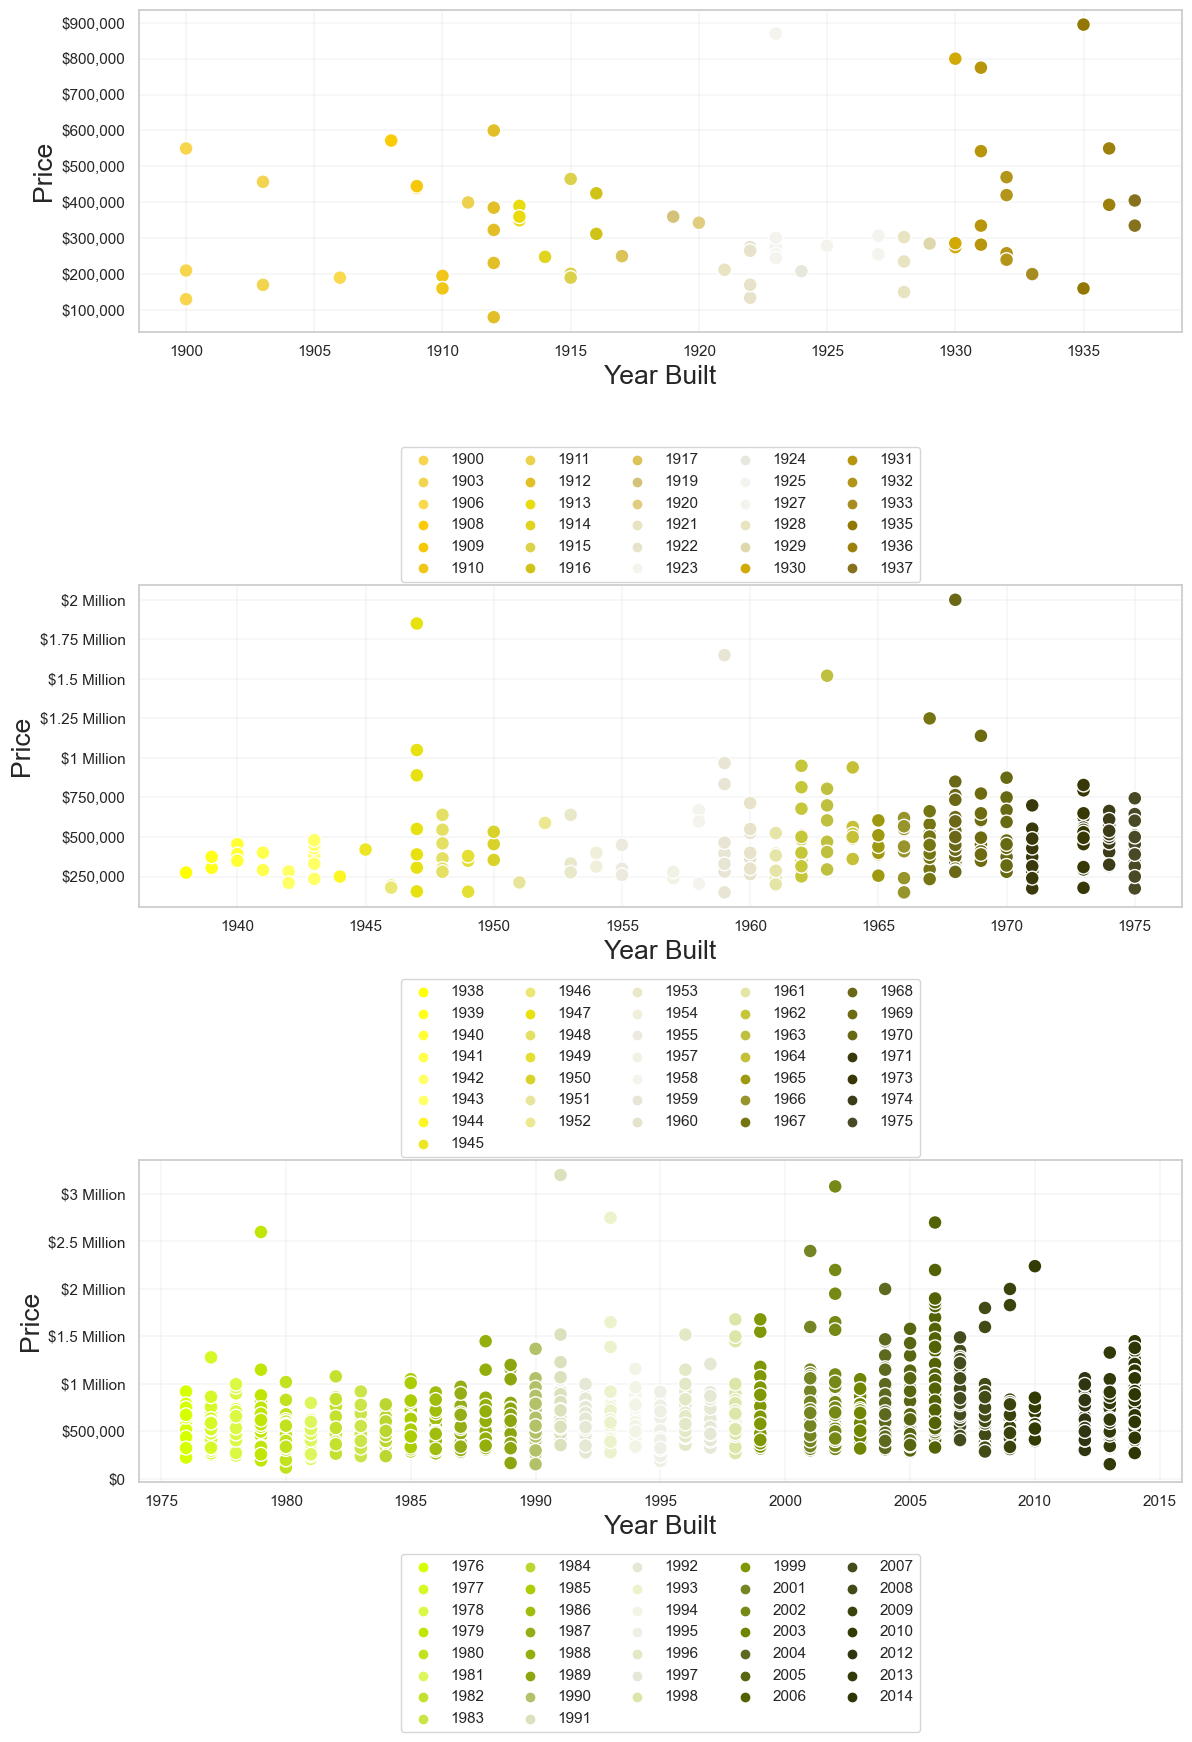

In [318]:
plt.subplot(3,1,1) #35 years in tottal
x = regressiondata44['Year_Built']
y = regressiondata44['Price']
data=regressiondata44
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata44, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui1)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In North King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$100,000','$200,000','$300,000','$400,000','$500,000','$600,000',
                    '$700,000','$800,000','$900,000'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks()

plt.subplot(3,1,2)
x = regressiondata45['Year_Built']
y = regressiondata45['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata45, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui2)
plt.grid(linestyle='-', linewidth=0.2)

plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million','$1.25 Million',
'$1.5 Million','$1.75 Million','$2 Million',])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 

plt.subplot(3,1,3)
sns.set(style="whitegrid")
x = regressiondata46['Year_Built']
y = regressiondata46['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata46, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui3)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(1)
plt.show()


In [104]:
def YEAR_RENOVATED(YEAR):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year = house_info['Year Renoveted'].tolist()

    year_index = []
    for i,x in enumerate(year):
        if x == YEAR:year_index.append(i)
        
    index = []        
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    


    year_eastking = []
    for i in year_index:
        if locations[i] == zip_loca[0] : year_eastking.append(i)
        elif locations[i] == zip_loca[1] : year_eastking.append(i)
        elif locations[i] == zip_loca[2] : year_eastking.append(i)
        elif locations[i] == zip_loca[3] : year_eastking.append(i)
        elif locations[i] == zip_loca[4] : year_eastking.append(i)
        elif locations[i] == zip_loca[5] : year_eastking.append(i)
        elif locations[i] == zip_loca[6] : year_eastking.append(i)
        elif locations[i] == zip_loca[7]: year_eastking.append(i)
        elif locations[i] == zip_loca[8] : year_eastking.append(i)
       

    price = house_info["Price"].tolist()

    price_eastking = []
    for i in year_eastking:price_eastking.append(price[i])
    return(price_eastking)

year_renovated = house_info["Year Renoveted"].value_counts().index.tolist()
yearrenov_Price_eastking = []
for i in year_renovated:
    yearrenov_Price_eastking.append(YEAR_RENOVATED(i))
yearrenov_Price_eastking = sum(yearrenov_Price_eastking, [])
len(yearrenov_Price_eastking)

2021

In [106]:
def AMOUNT_YEAR_RENOVATED(AMOUNT_YEAR):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_renovated = house_info["Year Renoveted"].tolist()
    X_value = []
    year_index = []
    for i,x in enumerate(year_renovated):
        if x == AMOUNT_YEAR:year_index.append(i)
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
   


    for i in year_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEAR)
        
    return X_value
year = house_info["Year Renoveted"].value_counts().index.tolist()
year_eastking = []
for i in year:
    year_eastking.append(AMOUNT_YEAR_RENOVATED(i))
year_eastking= sum(year_eastking, [])
len(year_eastking)

2021

In [157]:
regressiondata5 = pd.DataFrame({'Year_Renoveted':year_eastking,
                                'Price':yearrenov_Price_eastking})
regressiondata5
re5 = regressiondata5
re5
x = re5.Year_Renoveted.value_counts()
#x = regressiondata5.Year_Renoveted.value_counts()
len(x)

22

In [158]:
regressiondata5=regressiondata5.replace(0,2015.0)
regressiondata5

Year_Renoveted     Price
0             2015.0  510000.0
1             2015.0  400000.0
2             2015.0  395000.0
3             2015.0  580500.0
4             2015.0  832500.0
...              ...       ...
2016          1980.0  550000.0
2017          1980.0  550000.0
2018          1964.0  360000.0
2019          1978.0  445000.0
2020          1951.0  276000.0

[2021 rows x 2 columns]

In [164]:
flatui = ['#342906','#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522','#574b26','#7f6618']
          
         
            #flatui = ['#fef3d1','#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          #'#efe6ca','#e6dbb6','#ebe0bb','#f1e6c3','#f4e8c4',
          
          #'#f6eac2','#f8eabe','#fcedbf','#fef1c8','#f0e3ba',
          #'#f5e8c1','#faedc5','#fdf0c4','#f6e4ab','#fce6a1',
          
          #'#f9de87']#,'#e8d497']#,'#e9d28a','#ecd280','#f4d77c',
          #'#fadb7b','#fedc70','#ffd44f','#f9d050','#f4d061',
          
          #'#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          #'#e5bd42','#f0b601','#cba018','#cca425','#c9a638',
          
          #'#c99903','#bb8f08','#ad860c','#9d7d1a','#b89424',
          #'#ac8f38','#a47d03','#8c6c08','#80640e','#7f6618',
          
         # '#4f3d05','#534107','#564510','#4b3d11','#655522','#574b26','#3a2d02','#342906']
len(flatui)#58
len(flatui)#58

22

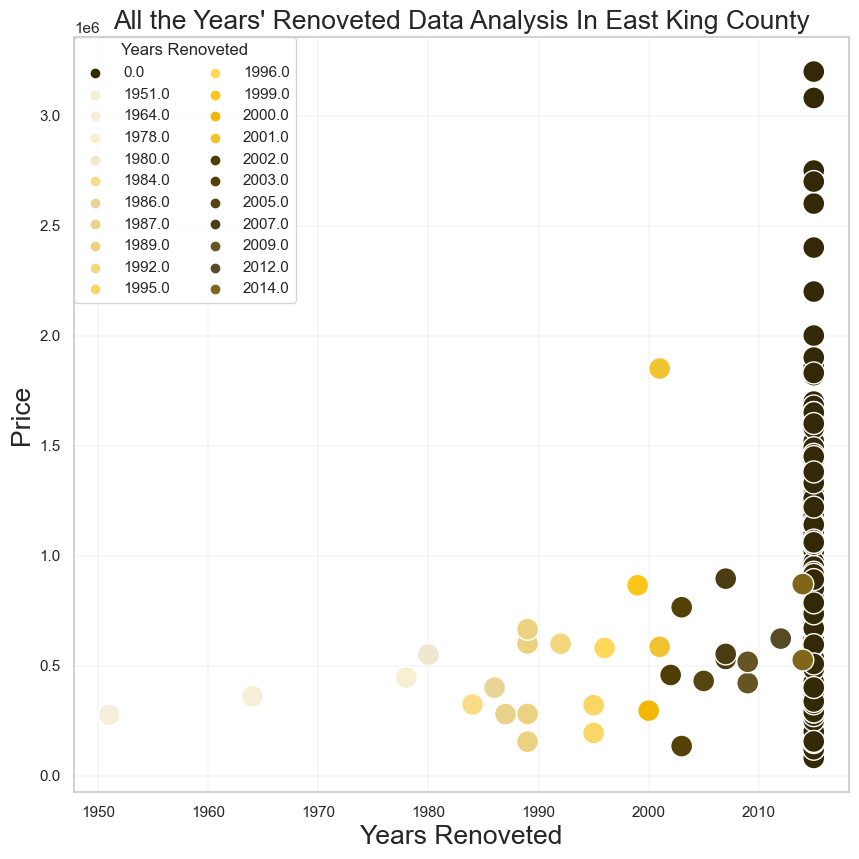

In [165]:
x = regressiondata5['Year_Renoveted']
y = regressiondata5['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=re5, x=x, y=y,s=250, linewidth = 1,
                    hue='Year_Renoveted',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In East King County',size=19)
plt.xlabel("Years Renoveted", size=19)
plt.legend(title='Years Renoveted')
plt.ylabel("Price", size=19)
#ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                         #'$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
plt.legend( loc='upper left', borderaxespad=0,title="Years Renoveted",
          frameon=True, ncol=2)
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [347]:
import pandas as pd
from sklearn.linear_model import PoissonRegressor

model18 = PoissonRegressor()

model18.fit(regressiondata5[['Year_Renoveted']],regressiondata5[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [348]:
x = regressiondata5[['Year_Renoveted']]
y = regressiondata5[['Price']]
prediction18 = model18.predict(x)

In [349]:
model_fit18 = regressiondata5
model_fit18['preds'] = prediction18

In [350]:
model_fit18

Year_Renoveted     Price          preds
0             2015.0  510000.0  606102.571499
1             2015.0  400000.0  606102.571499
2             2015.0  395000.0  606102.571499
3             2015.0  580500.0  606102.571499
4             2015.0  832500.0  606102.571499
...              ...       ...            ...
2016          1980.0  550000.0  606102.571499
2017          1980.0  550000.0  606102.571499
2018          1964.0  360000.0  606102.571499
2019          1978.0  445000.0  606102.571499
2020          1951.0  276000.0  606102.571499

[2021 rows x 3 columns]

No handles with labels found to put in legend.
C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/1360482606.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$580,000','$590,000','$600,000','$610,000','$620,000','$630,000'])


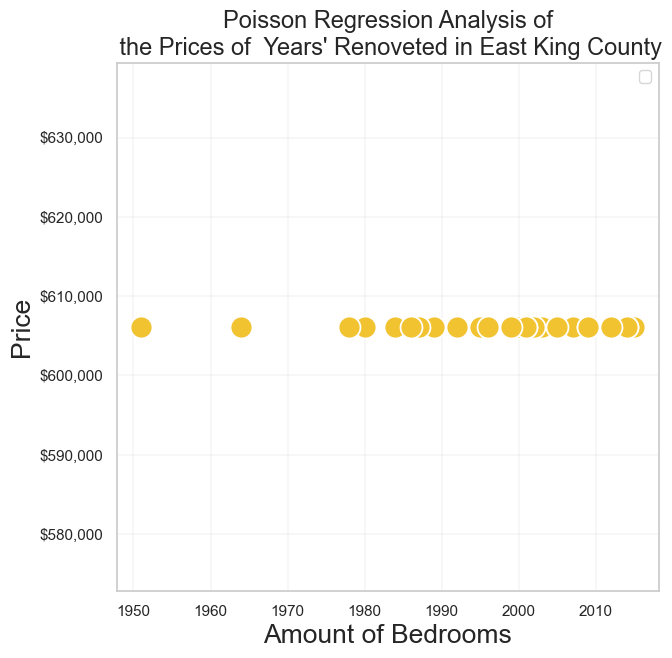

In [179]:
x = model_fit18['Year_Renoveted']
y = model_fit18['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit18, x=x, y=y,s=250,color='#f2c330')#,palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of  Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$580,000','$590,000','$600,000','$610,000','$620,000','$630,000'])
plt.show()

No handles with labels found to put in legend.
C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/476032820.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$580,000','$590,000','$600,000','$610,000','$620,000','$630,000'])


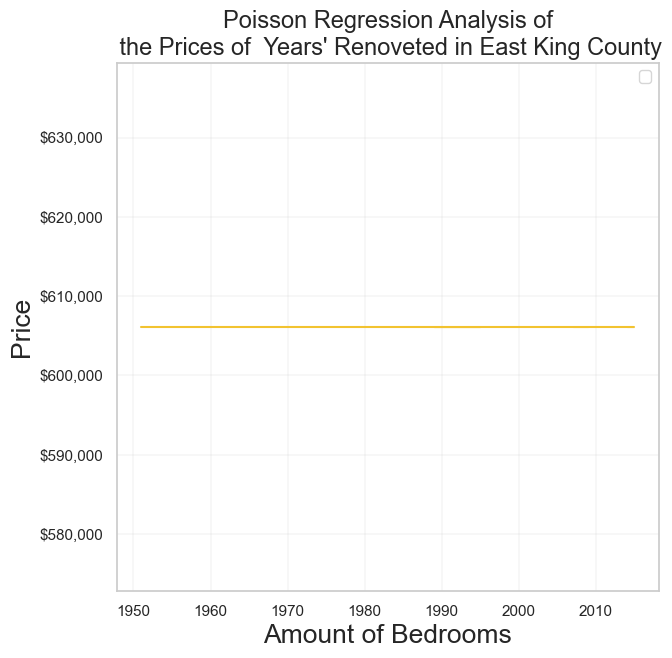

In [181]:
x = model_fit18['Year_Renoveted']
y = model_fit18['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit18, x=x, y=y,color='#f2c330')#,palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of  Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')


plt.gcf().set_size_inches((7,7))
ax.set_yticklabels(['0','$580,000','$590,000','$600,000','$610,000','$620,000','$630,000'])
plt.show()

In [182]:
(model_fit18['Price'] > model_fit18['preds']).value_counts()

False    1176
True      845
dtype: int64

In [183]:
i = 0
y= 0
x = []
while i <  1176:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 845:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Possion Model\n 60% Accuracy ')

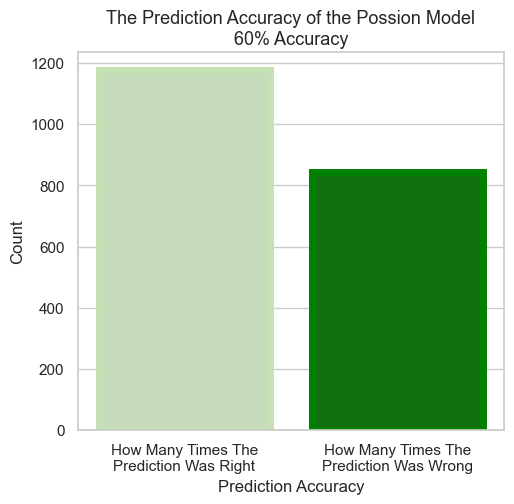

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#C5E1B3','green'],
                   palette=['#C5E1B3','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Possion Model\n 60% Accuracy ',size=13)

In [343]:
# Importing modules that are required
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
   
# Creating and training model
model19 = BayesianRidge()
model19.fit(regressiondata5[['Year_Renoveted']],regressiondata5[['Price']])
   
# Model making a prediction on test data
prediction19 = model19.predict(regressiondata5[['Year_Renoveted']])
#score = model3.score(regressiondata1[['Amount_of_Bedrooms']],regressiondata1[['Price']])
#score

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [344]:
model_fit19 = regressiondata5
model_fit19['preds'] = prediction19

In [345]:
model_fit19

Year_Renoveted     Price          preds
0             2015.0  510000.0  606102.572472
1             2015.0  400000.0  606102.572472
2             2015.0  395000.0  606102.572472
3             2015.0  580500.0  606102.572472
4             2015.0  832500.0  606102.572472
...              ...       ...            ...
2016          1980.0  550000.0  606102.469118
2017          1980.0  550000.0  606102.469118
2018          1964.0  360000.0  606102.421870
2019          1978.0  445000.0  606102.463212
2020          1951.0  276000.0  606102.383482

[2021 rows x 3 columns]

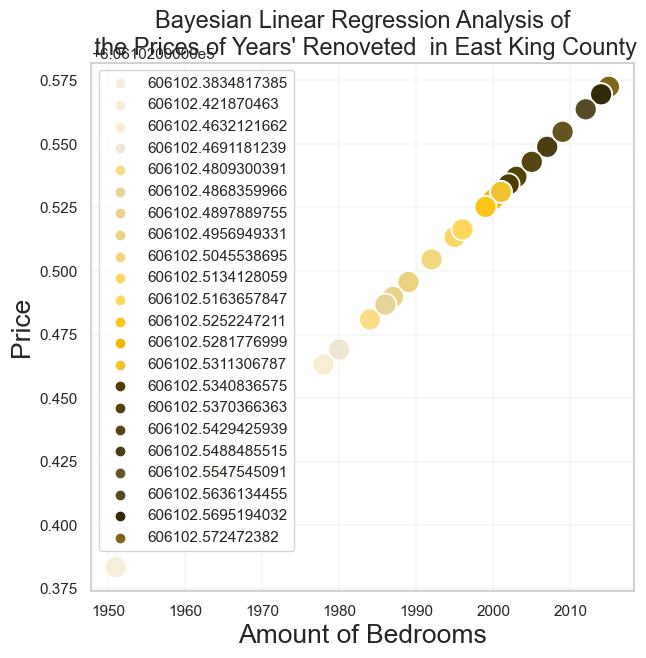

In [201]:
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
          


x = model_fit19['Year_Renoveted']
y = model_fit19['preds']
sns.set(style='whitegrid')


plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit19, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Years\' Renoveted  in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()



plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million'])

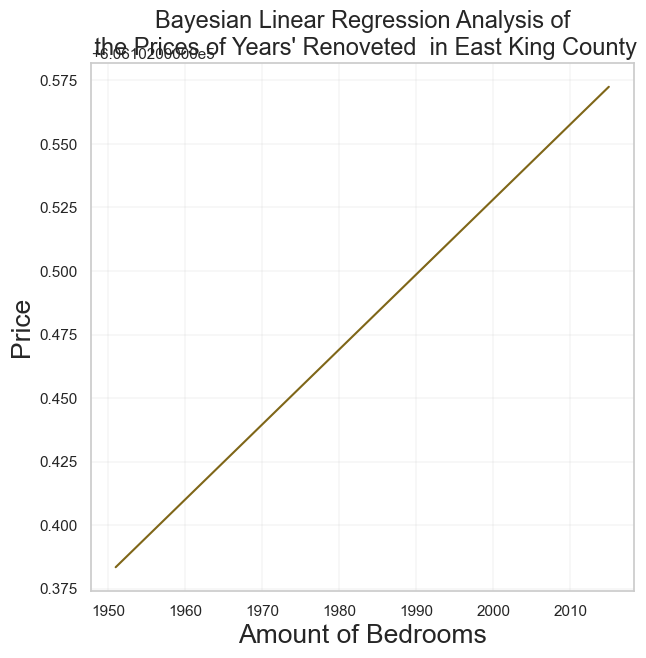

In [203]:
x = model_fit19['Year_Renoveted']
y = model_fit19['preds']
sns.set(style='whitegrid')


plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit19, x=x, y=y,color='#7f6618')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Years\' Renoveted  in East King County',size=17)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)



plt.gcf().set_size_inches((7,7))

In [204]:
(model_fit19['Price'] > model_fit19['preds']).value_counts()

False    1176
True      845
dtype: int64

In [205]:
i = 0
y= 0
x = []
while i <  1176:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 845:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Bayesian Linear Model\n 60% Accuracy ')

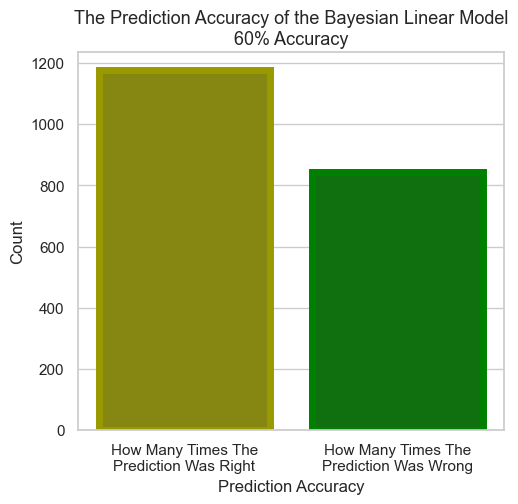

In [206]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Bayesian Linear Model\n 60% Accuracy ',size=13)

In [208]:
from sklearn.linear_model import QuantileRegressor


X = regressiondata5[['Year_Renoveted']]
y = regressiondata5[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata5[['Year_Renoveted']])
y_pred_2 = qrf2.predict(regressiondata5[['Year_Renoveted']])
y_pred_3 = qrf3.predict(regressiondata5[['Year_Renoveted']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packa

In [209]:
Quantile_regression5 = pd.DataFrame({'Year_Renoveted': regressiondata5['Year_Renoveted'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata5['Price']})

In [210]:
Quantile_regression5

Year_Renoveted       0.1 Pred       0.5 Pred       0.9 Pred     Price
0             2015.0  330803.326595  565011.818854  875928.164036  510000.0
1             2015.0  330803.326595  565011.818854  875928.164036  400000.0
2             2015.0  330803.326595  565011.818854  875928.164036  395000.0
3             2015.0  330803.326595  565011.818854  875928.164036  580500.0
4             2015.0  330803.326595  565011.818854  875928.164036  832500.0
...              ...            ...            ...            ...       ...
2016          1980.0  247307.305776  424291.241603  553659.070676  550000.0
2017          1980.0  247307.305776  424291.241603  553659.070676  550000.0
2018          1964.0  209137.696259  359961.834859  406336.056568  360000.0
2019          1978.0  242536.104587  416250.065760  535243.693912  445000.0
2020          1951.0  178124.888527  307694.191880  286636.107606  276000.0

[2021 rows x 5 columns]

In [257]:
openn = []
count = 1951
while count < 2016 :
    for x,i in enumerate(Quantile_regression5['Year_Renoveted']):
         if i == count:
            openn.append((x,i))
    count+=1

In [267]:
result1 = []
result = [i[1] for i in openn]
for x,i in enumerate(result):
    if i not in result1:result1.append(i)

In [273]:
openn2 = []
for i in openn:openn2.append(i[1])

In [275]:
indexx = []
for i in result1:
    if i in openn2:indexx.append(openn2.index(i))

In [283]:
final_indexx = []
for i in indexx:final_indexx.append(openn[i][0])

In [286]:
Quantileregression_updated5 = Quantile_regression5.loc[final_indexx]
Quantileregression_updated5 = Quantileregression_updated5.drop('Price', axis=1)
Quantileregression_updated5

Year_Renoveted       0.1 Pred       0.5 Pred       0.9 Pred
2020          1951.0  178124.888527  307694.191880  286636.107606
2018          1964.0  209137.696259  359961.834859  406336.056568
2019          1978.0  242536.104587  416250.065760  535243.693912
2016          1980.0  247307.305776  424291.241603  553659.070676
2004          1984.0  256849.708156  440373.593289  590489.824203
2009          1986.0  261620.909345  448414.769132  608905.200966
2008          1987.0  264006.509940  452435.357053  618112.889348
1999          1989.0  268777.711130  460476.532896  636528.266111
2010          1992.0  275934.512914  472538.296660  664151.331256
2012          1995.0  283091.314699  484600.060425  691774.396401
2014          1996.0  285476.915294  488620.648346  700982.084783
2007          1999.0  292633.717078  500682.412111  728605.149928
1995          2000.0  295019.317673  504703.000032  737812.838310
2005          2001.0  297404.918268  508723.587954  747020.526692
2003          2002.0  299790.518863  512744.175875  756228.215073
1990          2003.0  302176.119457  516764.763797  765435.903455
1996          2005.0  306947.320647  524805.939640  783851.280219
1992          2007.0  311718.521837  532847.115483  802266.656982
1997          2009.0  316489.723026  540888.291325  820682.033745
2015          2012.0  323646.524811  552950.055090  848305.098891
1988          2014.0  328417.726001  560991.230933  866720.475654
0             2015.0  330803.326595  565011.818854  875928.164036

In [287]:
melted_data5 = pd.melt(Quantileregression_updated5, id_vars=['Year_Renoveted'])
melted_data5 = melted_data5.dropna()
melted_data5 = melted_data5.rename(columns={'variable': 'Percentile'})
melted_data5

Year_Renoveted Percentile          value
0           1951.0   0.1 Pred  178124.888527
1           1964.0   0.1 Pred  209137.696259
2           1978.0   0.1 Pred  242536.104587
3           1980.0   0.1 Pred  247307.305776
4           1984.0   0.1 Pred  256849.708156
..             ...        ...            ...
61          2007.0   0.9 Pred  802266.656982
62          2009.0   0.9 Pred  820682.033745
63          2012.0   0.9 Pred  848305.098891
64          2014.0   0.9 Pred  866720.475654
65          2015.0   0.9 Pred  875928.164036

[66 rows x 3 columns]

Text(0, 0.5, 'Price')

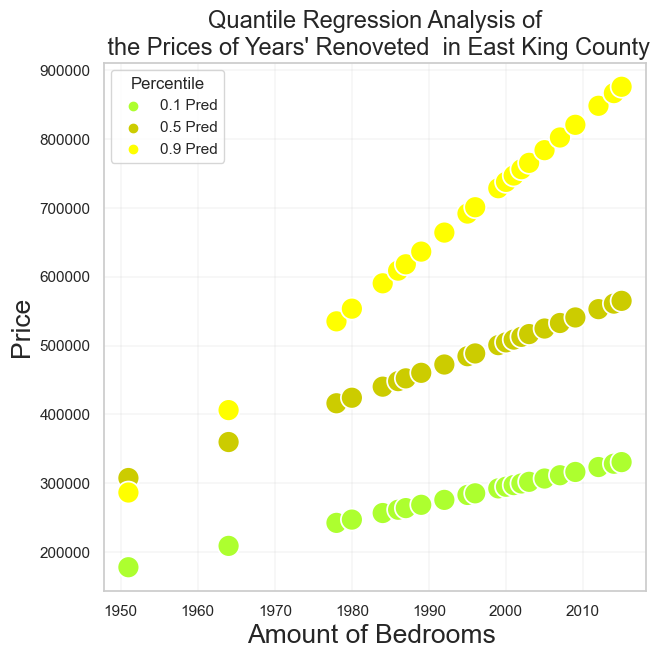

In [290]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data5, x="Year_Renoveted", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Years\' Renoveted  in East King County',size=17)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
#ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Mi

Text(0, 0.5, 'Price')

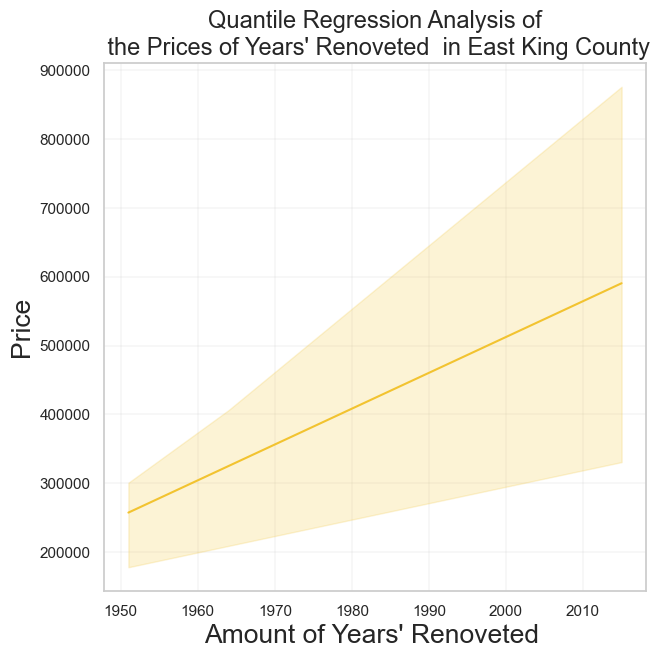

In [312]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.lineplot(data=melted_data5, x="Year_Renoveted",color='#f2c330',
                     y='value')
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Years\' Renoveted  in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted ", size=19)
plt.ylabel("Price", size=19)

In [296]:
(Quantile_regression5['Price'] > Quantile_regression5['0.1 Pred']).value_counts()

True     1820
False     201
dtype: int64

In [297]:
i = 0
y= 0
x = []
while i <  201:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1820:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ')

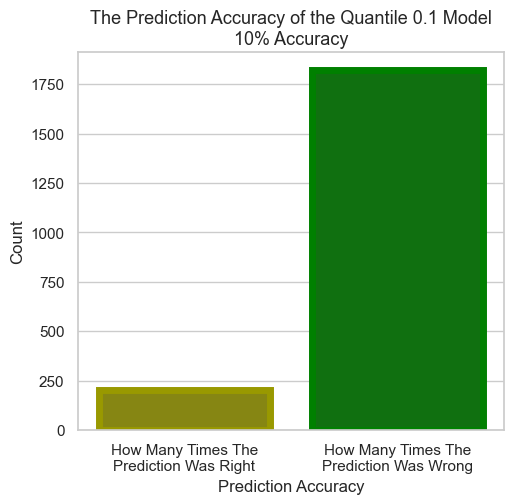

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.1 Model\n 10% Accuracy ',size=13)

In [299]:
(Quantile_regression5['Price'] > Quantile_regression5['0.5 Pred']).value_counts()

False    1012
True     1009
dtype: int64

In [300]:
i = 0
y= 0
x = []
while i <  1012:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1009:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ')

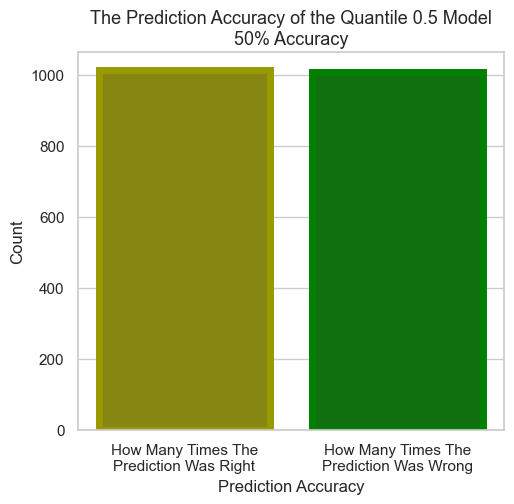

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.5 Model\n 50% Accuracy ',size=13)

In [302]:
(Quantile_regression5['Price'] > Quantile_regression5['0.9 Pred']).value_counts()

False    1820
True      201
dtype: int64

In [303]:
i = 0
y= 0
x = []
while i <  1020:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 201:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ')

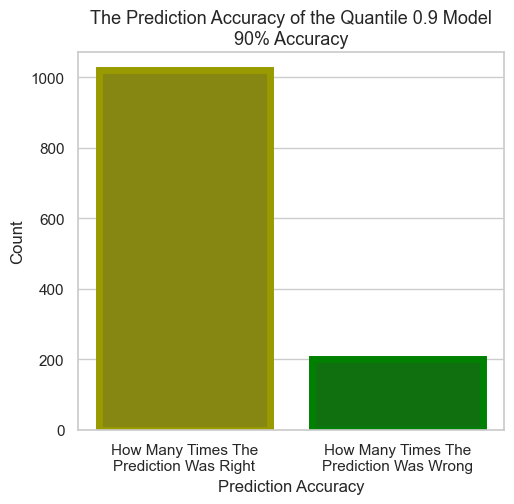

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Quantile 0.9 Model\n 90% Accuracy ',size=13)

In [385]:
from sklearn.linear_model import Ridge
model20 = Ridge(alpha=1.0)
model20.fit(regressiondata5[['Year_Renoveted']],regressiondata5[['Price']])
preds_20 = model20.predict(regressiondata5[['Year_Renoveted']])

In [386]:
model_fit20 = regressiondata5
model_fit20['preds'] = preds_20

In [387]:
model_fit20

Year_Renoveted     Price          preds
0             2015.0  510000.0  607658.698015
1             2015.0  400000.0  607658.698015
2             2015.0  395000.0  607658.698015
3             2015.0  580500.0  607658.698015
4             2015.0  832500.0  607658.698015
...              ...       ...            ...
2016          1980.0  550000.0  442384.510152
2017          1980.0  550000.0  442384.510152
2018          1964.0  360000.0  366830.595700
2019          1978.0  445000.0  432940.270845
2020          1951.0  276000.0  305443.040207

[2021 rows x 3 columns]

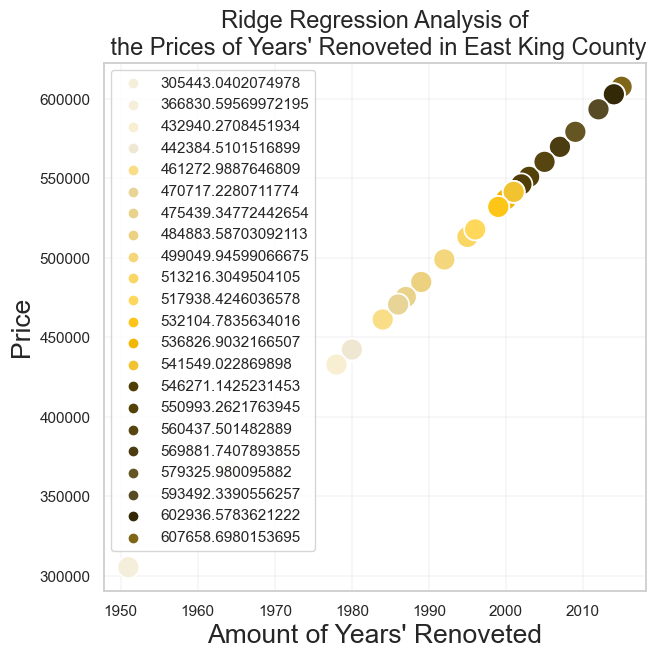

In [324]:
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']


x = model_fit20['Year_Renoveted']
y = model_fit20['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit20, x=x, y=y,s=250,hue='preds',palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')


plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

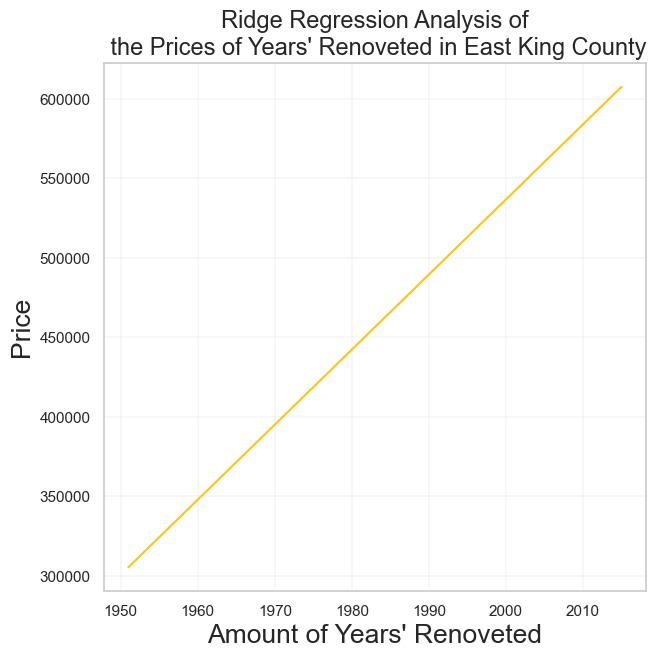

In [388]:
x = model_fit20['Year_Renoveted']
y = model_fit20['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit20, x=x, y=y,color='#fdc517')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted", size=19)
plt.ylabel("Price", size=19)



plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$200,000','$640,000','$600,000','$800,000','$1 Million','$1.2 Million'])
plt.show()

In [326]:
(model_fit20['Price'] > model_fit20['preds']).value_counts()

False    1170
True      851
dtype: int64

In [319]:
i = 0
y= 0
x = []
while i <  1170:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 851:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0.5, 1.0, 'The Prediction Accuracy of the Ridge Model\n 60% Accuracy ')

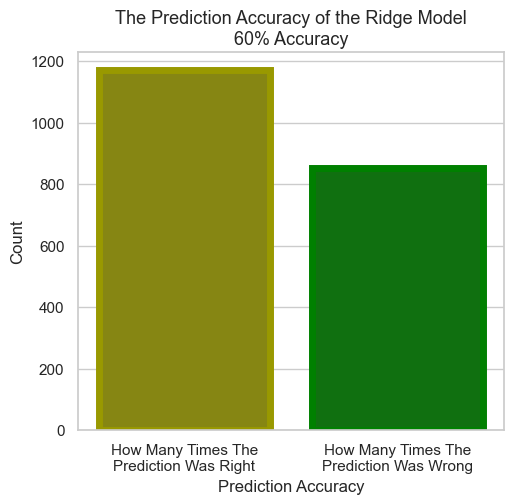

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
sns.set_style("whitegrid",{"color":"black"})
fig, ax = plt.subplots(figsize=(5.5, 5))
x = sns.countplot(x="Prediction Accuracy", data=df1,
                   linewidth=5,edgecolor = ['#999900','green'],
                   palette=['#999900','green'])

wrap_labels(x,21)
plt.xlabel('Prediction Accuracy', fontsize='12')
plt.ylabel('Count', fontsize='12')
ax.set_title('The Prediction Accuracy of the Ridge Model\n 60% Accuracy ',size=13)

In [361]:
years = []
for i in indexx:years.append(openn[i][1])
years

[1951.0,
 1964.0,
 1978.0,
 1980.0,
 1984.0,
 1986.0,
 1987.0,
 1989.0,
 1992.0,
 1995.0,
 1996.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2005.0,
 2007.0,
 2009.0,
 2012.0,
 2014.0,
 2015.0]

In [351]:
pos_var = model_fit18.loc[final_indexx]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

Year_Renoveted     preds
2020          1951.0  $606,103
2018          1964.0  $606,103
2019          1978.0  $606,103
2016          1980.0  $606,103
2004          1984.0  $606,103
2009          1986.0  $606,103
2008          1987.0  $606,103
1999          1989.0  $606,103
2010          1992.0  $606,103
2012          1995.0  $606,103
2014          1996.0  $606,103
2007          1999.0  $606,103
1995          2000.0  $606,103
2005          2001.0  $606,103
2003          2002.0  $606,103
1990          2003.0  $606,103
1996          2005.0  $606,103
1992          2007.0  $606,103
1997          2009.0  $606,103
2015          2012.0  $606,103
1988          2014.0  $606,103
0             2015.0  $606,103

In [346]:
bay_var = model_fit19.loc[final_indexx]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

Year_Renoveted     preds
2020          1951.0  $606,102
2018          1964.0  $606,102
2019          1978.0  $606,102
2016          1980.0  $606,102
2004          1984.0  $606,102
2009          1986.0  $606,102
2008          1987.0  $606,102
1999          1989.0  $606,102
2010          1992.0  $606,103
2012          1995.0  $606,103
2014          1996.0  $606,103
2007          1999.0  $606,103
1995          2000.0  $606,103
2005          2001.0  $606,103
2003          2002.0  $606,103
1990          2003.0  $606,103
1996          2005.0  $606,103
1992          2007.0  $606,103
1997          2009.0  $606,103
2015          2012.0  $606,103
1988          2014.0  $606,103
0             2015.0  $606,103

In [333]:
Quantileregression_updated5[Quantileregression_updated5.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated5['0.1 Pred']]
Quantileregression_updated5[Quantileregression_updated5.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated5['0.5 Pred']]
Quantileregression_updated5[Quantileregression_updated5.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated5['0.9 Pred']]
Quantileregression_updated5

Year_Renoveted  0.1 Pred  0.5 Pred  0.9 Pred
2020          1951.0  $178,125  $307,694  $286,636
2018          1964.0  $209,138  $359,962  $406,336
2019          1978.0  $242,536  $416,250  $535,244
2016          1980.0  $247,307  $424,291  $553,659
2004          1984.0  $256,850  $440,374  $590,490
2009          1986.0  $261,621  $448,415  $608,905
2008          1987.0  $264,007  $452,435  $618,113
1999          1989.0  $268,778  $460,477  $636,528
2010          1992.0  $275,935  $472,538  $664,151
2012          1995.0  $283,091  $484,600  $691,774
2014          1996.0  $285,477  $488,621  $700,982
2007          1999.0  $292,634  $500,682  $728,605
1995          2000.0  $295,019  $504,703  $737,813
2005          2001.0  $297,405  $508,724  $747,021
2003          2002.0  $299,791  $512,744  $756,228
1990          2003.0  $302,176  $516,765  $765,436
1996          2005.0  $306,947  $524,806  $783,851
1992          2007.0  $311,719  $532,847  $802,267
1997          2009.0  $316,490  $540,888  $820,682
2015          2012.0  $323,647  $552,950  $848,305
1988          2014.0  $328,418  $560,991  $866,720
0             2015.0  $330,803  $565,012  $875,928

In [342]:
rid_var = model_fit20.loc[final_indexx]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

Year_Renoveted     preds
2020          1951.0  $305,443
2018          1964.0  $366,831
2019          1978.0  $432,940
2016          1980.0  $442,385
2004          1984.0  $461,273
2009          1986.0  $470,717
2008          1987.0  $475,439
1999          1989.0  $484,884
2010          1992.0  $499,050
2012          1995.0  $513,216
2014          1996.0  $517,938
2007          1999.0  $532,105
1995          2000.0  $536,827
2005          2001.0  $541,549
2003          2002.0  $546,271
1990          2003.0  $550,993
1996          2005.0  $560,438
1992          2007.0  $569,882
1997          2009.0  $579,326
2015          2012.0  $593,492
1988          2014.0  $602,937
0             2015.0  $607,659

In [371]:
for x,i in enumerate(final_indexx):
    print('"','Renoveted in',years[x],'":["',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated5['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated5['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated5['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

" Renoveted in 1951.0 ":[" $606,103 " , " $606,102 " , " $178,125 " , " $307,694 " , " $286,636 " , " $305,443 " ],
" Renoveted in 1964.0 ":[" $606,103 " , " $606,102 " , " $209,138 " , " $359,962 " , " $406,336 " , " $366,831 " ],
" Renoveted in 1978.0 ":[" $606,103 " , " $606,102 " , " $242,536 " , " $416,250 " , " $535,244 " , " $432,940 " ],
" Renoveted in 1980.0 ":[" $606,103 " , " $606,102 " , " $247,307 " , " $424,291 " , " $553,659 " , " $442,385 " ],
" Renoveted in 1984.0 ":[" $606,103 " , " $606,102 " , " $256,850 " , " $440,374 " , " $590,490 " , " $461,273 " ],
" Renoveted in 1986.0 ":[" $606,103 " , " $606,102 " , " $261,621 " , " $448,415 " , " $608,905 " , " $470,717 " ],
" Renoveted in 1987.0 ":[" $606,103 " , " $606,102 " , " $264,007 " , " $452,435 " , " $618,113 " , " $475,439 " ],
" Renoveted in 1989.0 ":[" $606,103 " , " $606,102 " , " $268,778 " , " $460,477 " , " $636,528 " , " $484,884 " ],
" Renoveted in 1992.0 ":[" $606,103 " , " $606,103 " , " $275,935 " , " 

In [432]:
# Creating the DataFrame
models_predictions5 = pd.DataFrame({
" No Renovetion ":[" $606,103 " , " $606,103 " , " $330,803 " , " $565,012 " , " $875,928 " , " $607,659 " ],
" Renoveted in 1951 ":[" $606,103 " , " $606,102 " , " $178,125 " , " $307,694 " , " $286,636 " , " $305,443 " ],
" Renoveted in 1964":[" $606,103 " , " $606,102 " , " $209,138 " , " $359,962 " , " $406,336 " , " $366,831 " ],
" Renoveted in 1978 ":[" $606,103 " , " $606,102 " , " $242,536 " , " $416,250 " , " $535,244 " , " $432,940 " ],
" Renoveted in 1980":[" $606,103 " , " $606,102 " , " $247,307 " , " $424,291 " , " $553,659 " , " $442,385 " ],
" Renoveted in 1984 ":[" $606,103 " , " $606,102 " , " $256,850 " , " $440,374 " , " $590,490 " , " $461,273 " ],
" Renoveted in 1986 ":[" $606,103 " , " $606,102 " , " $261,621 " , " $448,415 " , " $608,905 " , " $470,717 " ],
" Renoveted in 1987 ":[" $606,103 " , " $606,102 " , " $264,007 " , " $452,435 " , " $618,113 " , " $475,439 " ],
" Renoveted in 1989 ":[" $606,103 " , " $606,102 " , " $268,778 " , " $460,477 " , " $636,528 " , " $484,884 " ],
" Renoveted in 1992 ":[" $606,103 " , " $606,103 " , " $275,935 " , " $472,538 " , " $664,151 " , " $499,050 " ],
" Renoveted in 1995 ":[" $606,103 " , " $606,103 " , " $283,091 " , " $484,600 " , " $691,774 " , " $513,216 " ],
" Renoveted in 1996 ":[" $606,103 " , " $606,103 " , " $285,477 " , " $488,621 " , " $700,982 " , " $517,938 " ],
" Renoveted in 1999 ":[" $606,103 " , " $606,103 " , " $292,634 " , " $500,682 " , " $728,605 " , " $532,105 " ],
" Renoveted in 2000 ":[" $606,103 " , " $606,103 " , " $295,019 " , " $504,703 " , " $737,813 " , " $536,827 " ],
" Renoveted in 2001 ":[" $606,103 " , " $606,103 " , " $297,405 " , " $508,724 " , " $747,021 " , " $541,549 " ],
" Renoveted in 2002 ":[" $606,103 " , " $606,103 " , " $299,791 " , " $512,744 " , " $756,228 " , " $546,271 " ],
" Renoveted in 2003 ":[" $606,103 " , " $606,103 " , " $302,176 " , " $516,765 " , " $765,436 " , " $550,993 " ],
" Renoveted in 2005 ":[" $606,103 " , " $606,103 " , " $306,947 " , " $524,806 " , " $783,851 " , " $560,438 " ],
" Renoveted in 2007 ":[" $606,103 " , " $606,103 " , " $311,719 " , " $532,847 " , " $802,267 " , " $569,882 " ],
" Renoveted in 2009 ":[" $606,103 " , " $606,103 " , " $316,490 " , " $540,888 " , " $820,682 " , " $579,326 " ],
" Renoveted in 2012 ":[" $606,103 " , " $606,103 " , " $323,647 " , " $552,950 " , " $848,305 " , " $593,492 " ],
" Renoveted in 2014 ":[" $606,103 " , " $606,103 " , " $328,418 " , " $560,991 " , " $866,720 " , " $602,937 " ],})
# Create the index
index_ = ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions5.index = index_

In [433]:
models_predictions5

No Renovetion   Renoveted in 1951   \
Poisson Regression               $606,103            $606,103    
Bayesian Linear Regression       $606,103            $606,102    
Quantile Regression 0.1          $330,803            $178,125    
Quantile Regression 0.5          $565,012            $307,694    
Quantile Regression 0.9          $875,928            $286,636    
Ridge Regression                 $607,659            $305,443    

                            Renoveted in 1964  Renoveted in 1978   \
Poisson Regression                  $606,103            $606,103    
Bayesian Linear Regression          $606,102            $606,102    
Quantile Regression 0.1             $209,138            $242,536    
Quantile Regression 0.5             $359,962            $416,250    
Quantile Regression 0.9             $406,336            $535,244    
Ridge Regression                    $366,831            $432,940    

                            Renoveted in 1980  Renoveted in 1984   \
Poisson Regression                  $606,103            $606,103    
Bayesian Linear Regression          $606,102            $606,102    
Quantile Regression 0.1             $247,307            $256,850    
Quantile Regression 0.5             $424,291            $440,374    
Quantile Regression 0.9             $553,659            $590,490    
Ridge Regression                    $442,385            $461,273    

                            Renoveted in 1986   Renoveted in 1987   \
Poisson Regression                   $606,103            $606,103    
Bayesian Linear Regression           $606,102            $606,102    
Quantile Regression 0.1              $261,621            $264,007    
Quantile Regression 0.5              $448,415            $452,435    
Quantile Regression 0.9              $608,905            $618,113    
Ridge Regression                     $470,717            $475,439    

                            Renoveted in 1989   Renoveted in 1992   ...  \
Poisson Regression                   $606,103            $606,103   ...   
Bayesian Linear Regression           $606,102            $606,103   ...   
Quantile Regression 0.1              $268,778            $275,935   ...   
Quantile Regression 0.5              $460,477            $472,538   ...   
Quantile Regression 0.9              $636,528            $664,151   ...   
Ridge Regression                     $484,884            $499,050   ...   

                            Renoveted in 1999   Renoveted in 2000   \
Poisson Regression                   $606,103            $606,103    
Bayesian Linear Regression           $606,103            $606,103    
Quantile Regression 0.1              $292,634            $295,019    
Quantile Regression 0.5              $500,682            $504,703    
Quantile Regression 0.9              $728,605            $737,813    
Ridge Regression                     $532,105            $536,827    

                            Renoveted in 2001   Renoveted in 2002   \
Poisson Regression                   $606,103            $606,103    
Bayesian Linear Regression           $606,103            $606,103    
Quantile Regression 0.1              $297,405            $299,791    
Quantile Regression 0.5              $508,724            $512,744    
Quantile Regression 0.9              $747,021            $756,228    
Ridge Regression                     $541,549            $546,271    

                            Renoveted in 2003   Renoveted in 2005   \
Poisson Regression                   $606,103            $606,103    
Bayesian Linear Regression           $606,103            $606,103    
Quantile Regression 0.1              $302,176            $306,947    
Quantile Regression 0.5              $516,765            $524,806    
Quantile Regression 0.9              $765,436            $783,851    
Ridge Regression                     $550,993            $560,438    

                            Renoveted in 2007   Renoveted in 2009   \
Poisson Regression                   

In [374]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [379]:
X,y = regressiondata5[['Year_Renoveted']],regressiondata5[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack5 = clf_stack.fit(X, y)   # training of stacked model
pred_stack5 = model_stack5.predict(X) 

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for Quant

In [390]:
model_fit21 = regressiondata5
model_fit21['preds'] = pred_stack5

In [391]:
model_fit21

Year_Renoveted     Price     preds
0             2015.0  510000.0  500000.0
1             2015.0  400000.0  500000.0
2             2015.0  395000.0  500000.0
3             2015.0  580500.0  500000.0
4             2015.0  832500.0  500000.0
...              ...       ...       ...
2016          1980.0  550000.0  550000.0
2017          1980.0  550000.0  550000.0
2018          1964.0  360000.0  323000.0
2019          1978.0  445000.0  399500.0
2020          1951.0  276000.0  276000.0

[2021 rows x 3 columns]

In [429]:
final_indexx1 = [0,2020,2018,2019,2016,2004,2009,2008,1999,2010,2012,2014,2007,1995,2005,2003,1990,
 1996,1992,1997,2015,1988]

In [430]:
meta_var = model_fit21.loc[final_indexx1]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.0f}'.format(i) for i in meta_var.preds]
meta_var

Year_Renoveted     preds
0             2015.0  $500,000
2020          1951.0  $276,000
2018          1964.0  $323,000
2019          1978.0  $399,500
2016          1980.0  $550,000
2004          1984.0  $550,000
2009          1986.0  $550,000
2008          1987.0  $550,000
1999          1989.0  $550,000
2010          1992.0  $550,000
2012          1995.0  $550,000
2014          1996.0  $550,000
2007          1999.0  $550,000
1995          2000.0  $550,000
2005          2001.0  $550,000
2003          2002.0  $550,000
1990          2003.0  $550,000
1996          2005.0  $550,000
1992          2007.0  $550,000
1997          2009.0  $550,000
2015          2012.0  $550,000
1988          2014.0  $500,000

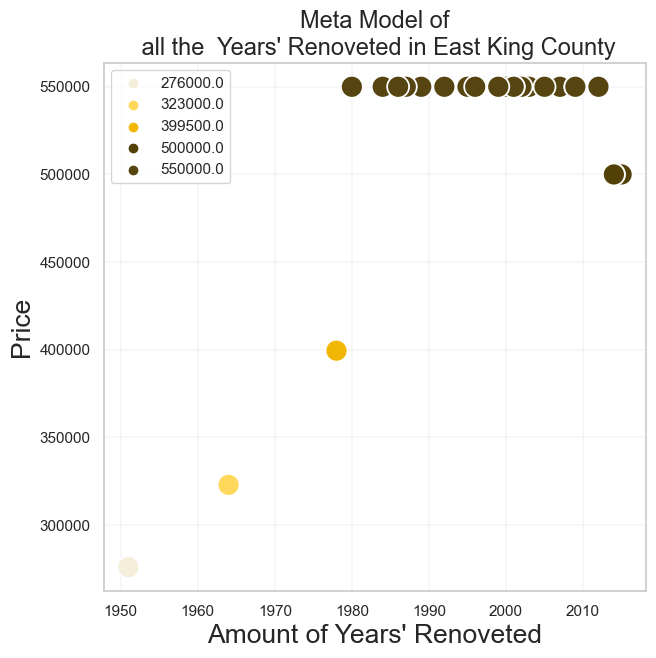

In [402]:
x = model_fit21['Year_Renoveted']
y = model_fit21['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
flatui1 = ['#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510',]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit21, x=x, y=y,s=250,hue='preds',palette=flatui1)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the  Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

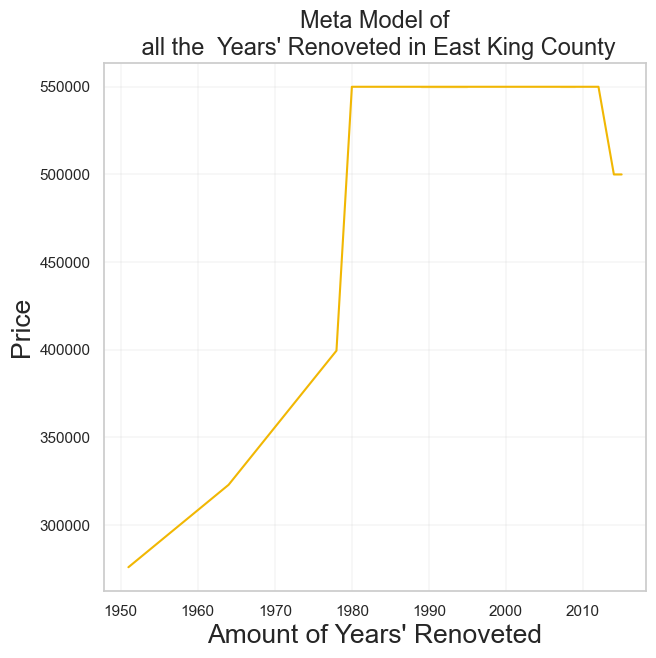

In [442]:
x = model_fit21['Year_Renoveted']
y = model_fit21['preds']
sns.set(style='whitegrid')


plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit21, x=x, y=y,color='#f1b703')
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the  Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted", size=19)
plt.ylabel("Price", size=19)
#L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [434]:
meta_model5 = models_predictions5

In [435]:
vals = list(meta_var.preds)

In [436]:
meta_model5.loc[len(meta_model5.index)] = vals
meta_model5 = meta_model5.rename(index={6: 'Final Prediction'})

In [437]:
meta_model5

No Renovetion   Renoveted in 1951   \
Poisson Regression               $606,103            $606,103    
Bayesian Linear Regression       $606,103            $606,102    
Quantile Regression 0.1          $330,803            $178,125    
Quantile Regression 0.5          $565,012            $307,694    
Quantile Regression 0.9          $875,928            $286,636    
Ridge Regression                 $607,659            $305,443    
Final Prediction                  $500,000            $276,000   

                            Renoveted in 1964  Renoveted in 1978   \
Poisson Regression                  $606,103            $606,103    
Bayesian Linear Regression          $606,102            $606,102    
Quantile Regression 0.1             $209,138            $242,536    
Quantile Regression 0.5             $359,962            $416,250    
Quantile Regression 0.9             $406,336            $535,244    
Ridge Regression                    $366,831            $432,940    
Final Prediction                     $323,000            $399,500   

                            Renoveted in 1980  Renoveted in 1984   \
Poisson Regression                  $606,103            $606,103    
Bayesian Linear Regression          $606,102            $606,102    
Quantile Regression 0.1             $247,307            $256,850    
Quantile Regression 0.5             $424,291            $440,374    
Quantile Regression 0.9             $553,659            $590,490    
Ridge Regression                    $442,385            $461,273    
Final Prediction                     $550,000            $550,000   

                            Renoveted in 1986   Renoveted in 1987   \
Poisson Regression                   $606,103            $606,103    
Bayesian Linear Regression           $606,102            $606,102    
Quantile Regression 0.1              $261,621            $264,007    
Quantile Regression 0.5              $448,415            $452,435    
Quantile Regression 0.9              $608,905            $618,113    
Ridge Regression                     $470,717            $475,439    
Final Prediction                      $550,000            $550,000   

                            Renoveted in 1989   Renoveted in 1992   ...  \
Poisson Regression                   $606,103            $606,103   ...   
Bayesian Linear Regression           $606,102            $606,103   ...   
Quantile Regression 0.1              $268,778            $275,935   ...   
Quantile Regression 0.5              $460,477            $472,538   ...   
Quantile Regression 0.9              $636,528            $664,151   ...   
Ridge Regression                     $484,884            $499,050   ...   
Final Prediction                      $550,000            $550,000  ...   

                            Renoveted in 1999   Renoveted in 2000   \
Poisson Regression                   $606,103            $606,103    
Bayesian Linear Regression           $606,103            $606,103    
Quantile Regression 0.1              $292,634            $295,019    
Quantile Regression 0.5              $500,682            $504,703    
Quantile Regression 0.9              $728,605            $737,813    
Ridge Regression                     $532,105            $536,827    
Final Prediction                      $550,000            $550,000   

                            Renoveted in 2001   Renoveted in 2002   \
Poisson Regression                   $606,103            $606,103    
Bayesian Linear Regression           $606,103            $606,103    
Quantile Regression 0.1              $297,405            $299,791    
Quantile Regression 0.5              $508,724            $512,744    
Quantile Regression 0.9              $747,021            $756,228    
Ridge Regression                     $541,549            $546,271    
Final Prediction                      $550,000            $550,000   

                            Renoveted in 2003   Renoveted in 2005   \
Poisson Regression                   $6

In [438]:
box_df5 = meta_model5.transpose()
box_df5

Poisson Regression Bayesian Linear Regression  \
 No Renovetion               $606,103                   $606,103    
 Renoveted in 1951           $606,103                   $606,102    
 Renoveted in 1964           $606,103                   $606,102    
 Renoveted in 1978           $606,103                   $606,102    
 Renoveted in 1980           $606,103                   $606,102    
 Renoveted in 1984           $606,103                   $606,102    
 Renoveted in 1986           $606,103                   $606,102    
 Renoveted in 1987           $606,103                   $606,102    
 Renoveted in 1989           $606,103                   $606,102    
 Renoveted in 1992           $606,103                   $606,103    
 Renoveted in 1995           $606,103                   $606,103    
 Renoveted in 1996           $606,103                   $606,103    
 Renoveted in 1999           $606,103                   $606,103    
 Renoveted in 2000           $606,103                   $606,103    
 Renoveted in 2001           $606,103                   $606,103    
 Renoveted in 2002           $606,103                   $606,103    
 Renoveted in 2003           $606,103                   $606,103    
 Renoveted in 2005           $606,103                   $606,103    
 Renoveted in 2007           $606,103                   $606,103    
 Renoveted in 2009           $606,103                   $606,103    
 Renoveted in 2012           $606,103                   $606,103    
 Renoveted in 2014           $606,103                   $606,103    

                    Quantile Regression 0.1 Quantile Regression 0.5  \
 No Renovetion                    $330,803                $565,012    
 Renoveted in 1951                $178,125                $307,694    
 Renoveted in 1964                $209,138                $359,962    
 Renoveted in 1978                $242,536                $416,250    
 Renoveted in 1980                $247,307                $424,291    
 Renoveted in 1984                $256,850                $440,374    
 Renoveted in 1986                $261,621                $448,415    
 Renoveted in 1987                $264,007                $452,435    
 Renoveted in 1989                $268,778                $460,477    
 Renoveted in 1992                $275,935                $472,538    
 Renoveted in 1995                $283,091                $484,600    
 Renoveted in 1996                $285,477                $488,621    
 Renoveted in 1999                $292,634                $500,682    
 Renoveted in 2000                $295,019                $504,703    
 Renoveted in 2001                $297,405                $508,724    
 Renoveted in 2002                $299,791                $512,744    
 Renoveted in 2003                $302,176                $516,765    
 Renoveted in 2005                $306,947                $524,806    
 Renoveted in 2007                $311,719                $532,847    
 Renoveted in 2009                $316,490                $540,888    
 Renoveted in 2012                $323,647                $552,950    
 Renoveted in 2014                $328,418                $560,991    

                    Quantile Regression 0.9 Ridge Regression Final Prediction  
 No Renovetion                    $875,928         $607,659          $500,000  
 Renoveted in 1951                $286,636         $305,443          $276,000  
 Renoveted in 1964                $406,336         $366,831          $323,000  
 Renoveted in 1978                $535,244         $432,940          $399,500  
 Renoveted in 1980                $553,659         $442,385          $550,000  
 Renoveted in 1984                $590,490         $461,273          $550,000  
 Renoveted in 1986                $608,905         $470,717          $550,000  
 Renoveted in 1987                $618,113         $475,439          $550,000  
 Renoveted in 1989                $636,528         $484,884          $550,000 

In [439]:
melted_data5 = pd.melt(box_df5, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data5 = melted_data5.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [443]:
melted_data5[melted_data5.columns[1:]] = melted_data5[melted_data5.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [444]:
melted_data5

Prediction Model  Prediction
0    Poisson Regression    606103.0
1    Poisson Regression    606103.0
2    Poisson Regression    606103.0
3    Poisson Regression    606103.0
4    Poisson Regression    606103.0
..                  ...         ...
149    Final Prediction    550000.0
150    Final Prediction    550000.0
151    Final Prediction    550000.0
152    Final Prediction    550000.0
153    Final Prediction    500000.0

[154 rows x 2 columns]

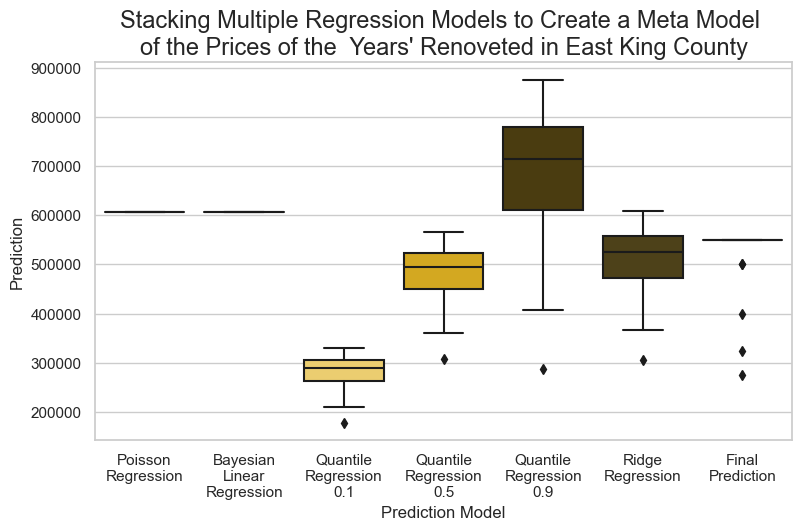

In [448]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
flatui = ['#f5c71a','#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data5,x='Prediction Model', y='Prediction',palette=flatui)
#ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
#x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of the  Years\' Renoveted in East King County", size=17)
wrap_labels(x, 10)

In [514]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = ''         
    df.iloc[0,:] = 'background-color:#F1E5AC;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#d9ff00;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#F1E5AC;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#d9ff00;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#F1E5AC;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#d9ff00;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#666F06 ;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model5= meta_model5.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #D2E57D')]},
            {"selector":"thead", 'props':[("background-color","#D2E57D"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#D2E57D'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [515]:
import dataframe_image as dfi
dfi.export(meta_model5, 'meta_model5.png')

In [516]:
meta_model5

In [432]:
%store Quantile_Regression_Prediction4
%store Weighted_Average_Prediction4

Stored 'Quantile_Regression_Prediction4' (DataFrame)
Stored 'Weighted_Average_Prediction4' (DataFrame)


In [10]:
def CONDITION(LEVEL_CONDITION):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condition_level = house_info['Size of Above'].tolist()

    condition_index = []
    for i,x in enumerate(condition_level):
        if x == LEVEL_CONDITION:condition_index.append(i)
            
   
    level_eastking = []
    for i  in condition_index:
        if locations[i] == zip_loca[0] : level_eastking.append(i)
        elif locations[i] == zip_loca[1] : level_eastking.append(i)
        elif locations[i] == zip_loca[2] : level_eastking.append(i)
        elif locations[i] == zip_loca[3] : level_eastking.append(i)
        elif locations[i] == zip_loca[4] : level_eastking.append(i)
        elif locations[i] == zip_loca[5] : level_eastking.append(i)
        elif locations[i] == zip_loca[6] : level_eastking.append(i)
        elif locations[i] == zip_loca[7]: level_eastking.append(i)
        elif locations[i] == zip_loca[8] : level_eastking.append(i)
        

    
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in level_eastking:price_eastking.append(price[i])
    return(price_eastking)

condition_level = house_info["Size of Above"].value_counts().index.tolist()
level_eastking = []
for i in condition_level:
    level_eastking.append(CONDITION(i))
level_eastking= sum(level_eastking, [])
len(level_eastking)

2455

In [11]:
def AMOUNT_LEVEL(AMOUNT_LEVEL):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condtions = house_info["Size of Above"].tolist()
    X_value = []
    level_index = []
    for i,x in enumerate(condtions):
        if x == AMOUNT_LEVEL:level_index.append(i)
        
    index = []    
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    


    for i in level_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LEVEL)
    return X_value
level = house_info["Size of Above"].value_counts().index.tolist()
condtition_level_eastking = []
for i in level:
    condtition_level_eastking.append(AMOUNT_LEVEL(i))
condtition_level_eastking= sum(condtition_level_eastking, [])
len(condtition_level_eastking)

2455

In [12]:
regressiondata6 = pd.DataFrame({'Size_of_Above':condtition_level_eastking,
                                'Price':level_eastking})
regressiondata6

Size_of_Above      Price
0              1300   526000.0
1              1300   275000.0
2              1300   369500.0
3              1300   350000.0
4              1300   387000.0
...             ...        ...
2450           5584  1680000.0
2451           4225  1010000.0
2452           7420  1950000.0
2453           4330  1210000.0
2454           6085  1610000.0

[2455 rows x 2 columns]

In [540]:
regressiondata6
re6 = regressiondata6
x = re6.Size_of_Above.value_counts()
#x = regressiondata5.Year_Renoveted.value_counts()
len(x)

419

C:\Users\rutho\AppData\Local\Temp/ipykernel_19836/447588684.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million',


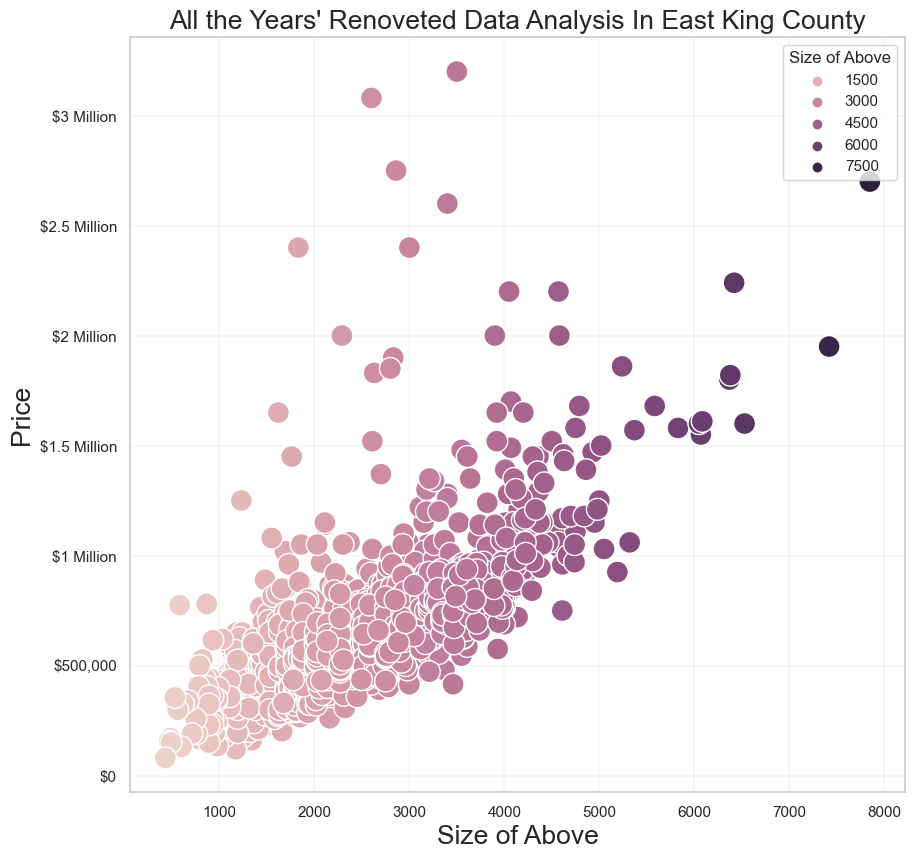

In [539]:
flatui = ['#F3F4DB','#FFFF66','#FFDA03','#c1bd07','#7c7906',]

x = regressiondata6['Size_of_Above']
y = regressiondata6['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata6, x=x, y=y,s=250, linewidth = 1,
                    hue='Size_of_Above')#,palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In East King County',size=19)
plt.xlabel("Size of Above", size=19)
plt.legend(title='Size of Above')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million',
                    '$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
plt.gcf().set_size_inches((10,10))
#xticks=ax.xaxis.get_major_ticks()
plt.show()

In [93]:
# Create linear regression object
model22 = PoissonRegressor()

# Train the model using the training sets
model22.fit(regressiondata6[['Size_of_Above']],regressiondata6[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [94]:
x = regressiondata6[['Size_of_Above']]
y = regressiondata6[['Price']]
prediction22 = model22.predict(x)

In [95]:
model_fit22 = regressiondata6
model_fit22['preds'] = prediction22

In [96]:
model_fit22

Size_of_Above      Price          preds
0              1300   526000.0  603348.063136
1              1300   275000.0  603348.063136
2              1300   369500.0  603348.063136
3              1300   350000.0  603348.063136
4              1300   387000.0  603348.063136
...             ...        ...            ...
2450           5584  1680000.0  603348.063136
2451           4225  1010000.0  603348.063136
2452           7420  1950000.0  603348.063136
2453           4330  1210000.0  603348.063136
2454           6085  1610000.0  603348.063136

[2455 rows x 3 columns]

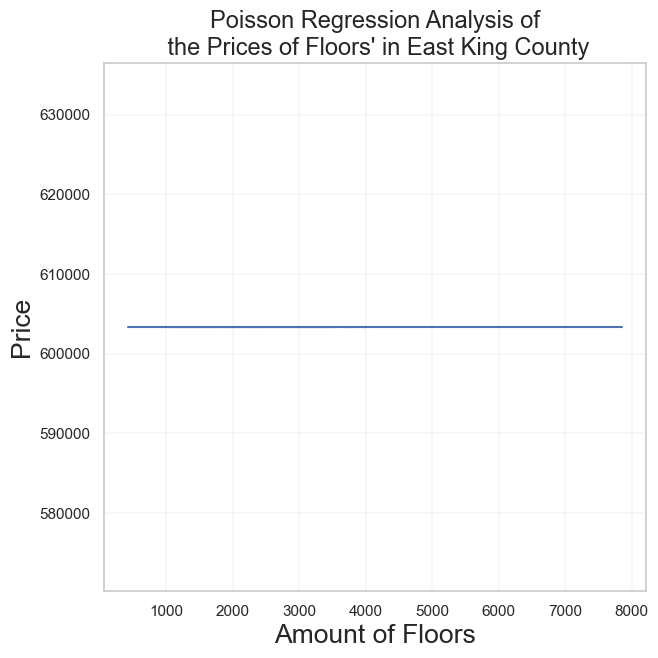

In [71]:
x = model_fit22['Size_of_Above']
y = model_fit22['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.lineplot(data=model_fit22, x=x, y=y)#,s=250,hue='preds')#,palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Poisson Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors", size=19)
plt.ylabel("Price", size=19)
#plt.legend(title='Size of Above')
#L=plt.legend()



plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$600,000','$700,000','$800,000','$900,000',])
plt.show()

In [87]:
# Importing modules that are required
# Creating and training model
model23 = BayesianRidge()
model23.fit(regressiondata6[['Size_of_Above']],regressiondata6[['Price']])
   
# Model making a prediction on test data
prediction23 = model23.predict(regressiondata6[['Size_of_Above']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
model_fit23 = regressiondata6
model_fit23['preds'] = prediction23

In [89]:
model_fit23

Size_of_Above      Price         preds
0              1300   526000.0  3.800238e+05
1              1300   275000.0  3.800238e+05
2              1300   369500.0  3.800238e+05
3              1300   350000.0  3.800238e+05
4              1300   387000.0  3.800238e+05
...             ...        ...           ...
2450           5584  1680000.0  1.333783e+06
2451           4225  1010000.0  1.031225e+06
2452           7420  1950000.0  1.742537e+06
2453           4330  1210000.0  1.054601e+06
2454           6085  1610000.0  1.445322e+06

[2455 rows x 3 columns]

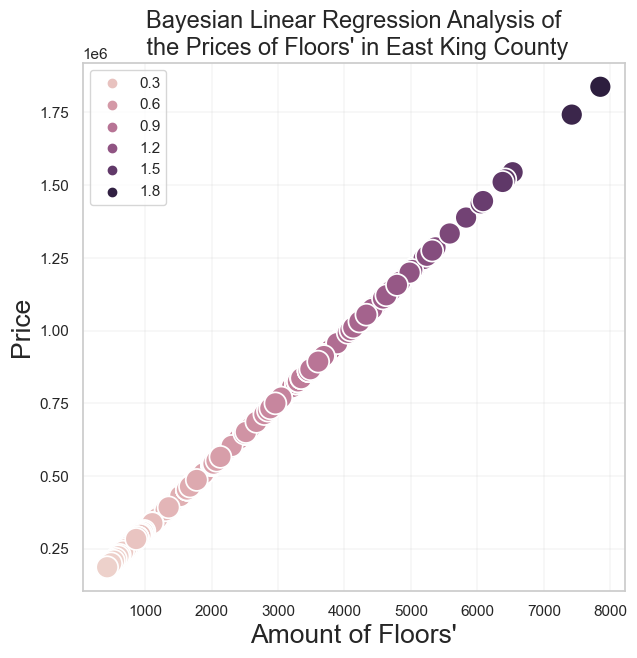

In [555]:
x = model_fit23['Size_of_Above']
y = model_fit23['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit23, x=x, y=y,s=250,hue='preds')#,palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Bayesian Linear Regression Analysis of\n the Prices of Floors\' in East King County',size=17)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()



plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000', '$700,000','$750,000','$800,000','$850,000'])

In [19]:
X = regressiondata6[['Size_of_Above']]
y = regressiondata6[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata6[['Size_of_Above']])
y_pred_2 = qrf2.predict(regressiondata6[['Size_of_Above']])
y_pred_3 = qrf3.predict(regressiondata6[['Size_of_Above']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packa

In [20]:
Quantile_regression6 = pd.DataFrame({'Size_of_Above': regressiondata6['Size_of_Above'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata6['Price']})

In [21]:
Quantile_regression6

Size_of_Above      0.1 Pred      0.5 Pred      0.9 Pred      Price
0              1300  2.674043e+05  3.762746e+05  5.078422e+05   526000.0
1              1300  2.674043e+05  3.762746e+05  5.078422e+05   275000.0
2              1300  2.674043e+05  3.762746e+05  5.078422e+05   369500.0
3              1300  2.674043e+05  3.762746e+05  5.078422e+05   350000.0
4              1300  2.674043e+05  3.762746e+05  5.078422e+05   387000.0
...             ...           ...           ...           ...        ...
2450           5584  1.016059e+06  1.264912e+06  1.600313e+06  1680000.0
2451           4225  7.785656e+05  9.830123e+05  1.253752e+06  1010000.0
2452           7420  1.336911e+06  1.645757e+06  2.068515e+06  1950000.0
2453           4330  7.969150e+05  1.004793e+06  1.280528e+06  1210000.0
2454           6085  1.103612e+06  1.368835e+06  1.728074e+06  1610000.0

[2455 rows x 5 columns]

In [29]:
no = []
for i in Counter(regressiondata6['Size_of_Above']):no.append(i)

In [31]:
max(no)

7850

In [32]:
openn = []
count = 430
while count < 7851 :
    for x,i in enumerate(Quantile_regression6['Size_of_Above']):
         if i == count:
            openn.append((x,i))
    count+=1

In [33]:
result1 = []
result = [i[1] for i in openn]
for x,i in enumerate(result):
    if i not in result1:result1.append(i)

In [34]:
openn2 = []
for i in openn:openn2.append(i[1])

In [35]:
indexx = []
for i in result1:
    if i in openn2:indexx.append(openn2.index(i))

In [36]:
final_indexx = []
for i in indexx:final_indexx.append(openn[i][0])

In [38]:
Quantileregression_updated6 = Quantile_regression6.loc[final_indexx]
Quantileregression_updated6 = Quantileregression_updated6.drop('Price', axis=1)
Quantileregression_updated6

Size_of_Above      0.1 Pred      0.5 Pred      0.9 Pred
2439            430  1.153666e+05  1.958090e+05  2.859818e+05
2413            470  1.223568e+05  2.041063e+05  2.961823e+05
2378            480  1.241044e+05  2.061806e+05  2.987324e+05
2416            490  1.258520e+05  2.082549e+05  3.012825e+05
2394            530  1.328422e+05  2.165522e+05  3.114830e+05
...             ...           ...           ...           ...
2443           6380  1.155165e+06  1.430028e+06  1.803303e+06
2425           6420  1.162155e+06  1.438325e+06  1.813503e+06
2422           6530  1.181378e+06  1.461142e+06  1.841555e+06
2452           7420  1.336911e+06  1.645757e+06  2.068515e+06
2419           7850  1.412056e+06  1.734952e+06  2.178171e+06

[419 rows x 4 columns]

In [40]:
melted_data6 = pd.melt(Quantileregression_updated6, id_vars=['Size_of_Above'])
melted_data6 = melted_data6.dropna()
melted_data6 = melted_data6.rename(columns={'variable': 'Percentile'})
melted_data6

Size_of_Above Percentile         value
0               430   0.1 Pred  1.153666e+05
1               470   0.1 Pred  1.223568e+05
2               480   0.1 Pred  1.241044e+05
3               490   0.1 Pred  1.258520e+05
4               530   0.1 Pred  1.328422e+05
...             ...        ...           ...
1252           6380   0.9 Pred  1.803303e+06
1253           6420   0.9 Pred  1.813503e+06
1254           6530   0.9 Pred  1.841555e+06
1255           7420   0.9 Pred  2.068515e+06
1256           7850   0.9 Pred  2.178171e+06

[1257 rows x 3 columns]

Text(0, 0.5, 'Price')

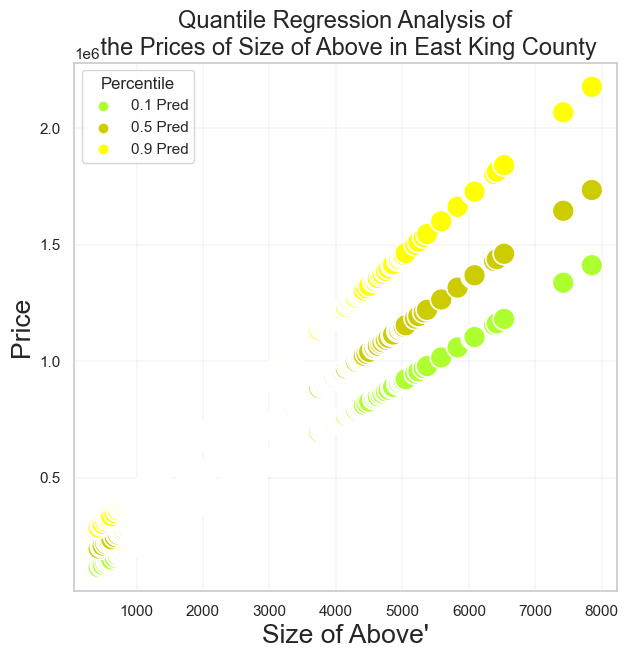

In [44]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data6, x="Size_of_Above", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((7,7))
ax.set_title('Quantile Regression Analysis of\n the Prices of Size of Above in East King County',size=17)
plt.xlabel("Size of Above'", size=19)
plt.ylabel("Price", size=19)
#ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million', '$1.2 Million','$1.4 Mi

In [83]:
model24 = Ridge(alpha=1.0)
model24.fit(regressiondata6[['Size_of_Above']],regressiondata6[['Price']])
preds_24 = model24.predict(regressiondata6[['Size_of_Above']])

In [84]:
model_fit24 = regressiondata6
model_fit24['preds'] = preds_24

In [85]:
model_fit24

Size_of_Above      Price         preds
0              1300   526000.0  3.799478e+05
1              1300   275000.0  3.799478e+05
2              1300   369500.0  3.799478e+05
3              1300   350000.0  3.799478e+05
4              1300   387000.0  3.799478e+05
...             ...        ...           ...
2450           5584  1680000.0  1.334032e+06
2451           4225  1010000.0  1.031371e+06
2452           7420  1950000.0  1.742925e+06
2453           4330  1210000.0  1.054755e+06
2454           6085  1610000.0  1.445609e+06

[2455 rows x 3 columns]

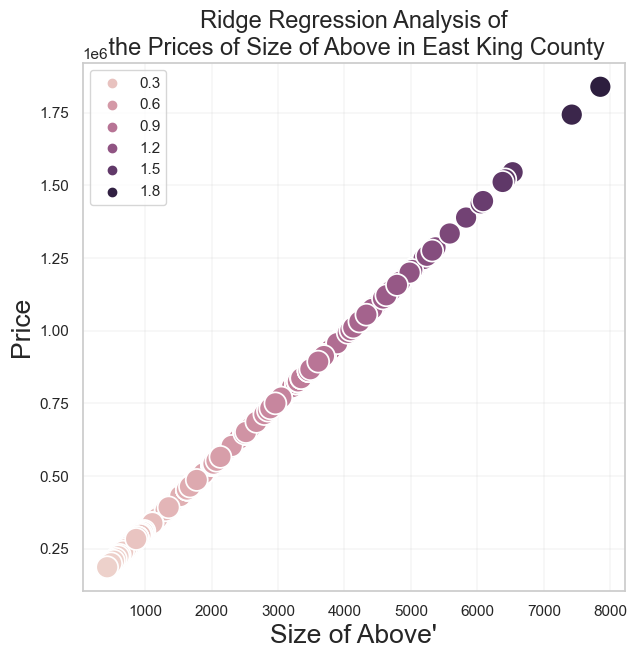

In [18]:
x = model_fit24['Size_of_Above']
y = model_fit24['preds']
sns.set(style='whitegrid')

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit24, x=x, y=y,s=250,hue='preds')#,palette=flatui)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Ridge Regression Analysis of\n the Prices of Size of Above in East King County',size=17)
plt.xlabel("Size of Above'", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()



plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$400,000','$450,000','$500,000','$550,000','$600,000', '$700,000','$750,000','$800,000','$850,000'])

In [98]:
size_above = []
for i in final_indexx:
    size_above.append(regressiondata6['Size_of_Above'][i])

In [100]:
pos_var = model_fit22.iloc[final_indexx]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

Size_of_Above     preds
2439            430  $603,348
2413            470  $603,348
2378            480  $603,348
2416            490  $603,348
2394            530  $603,348
...             ...       ...
2443           6380  $603,348
2425           6420  $603,348
2422           6530  $603,348
2452           7420  $603,348
2419           7850  $603,348

[419 rows x 2 columns]

In [92]:
bay_var = model_fit23.iloc[final_indexx]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

Size_of_Above       preds
2439            430    $186,333
2413            470    $195,239
2378            480    $197,465
2416            490    $199,691
2394            530    $208,597
...             ...         ...
2443           6380  $1,510,999
2425           6420  $1,519,904
2422           6530  $1,544,394
2452           7420  $1,742,537
2419           7850  $1,838,269

[419 rows x 2 columns]

In [86]:
rid_var = model_fit24.iloc[final_indexx]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

Size_of_Above       preds
2439            430    $186,191
2413            470    $195,100
2378            480    $197,327
2416            490    $199,554
2394            530    $208,462
...             ...         ...
2443           6380  $1,511,308
2425           6420  $1,520,216
2422           6530  $1,544,714
2452           7420  $1,742,925
2419           7850  $1,838,690

[419 rows x 2 columns]

In [108]:
Quantileregression_updated6[Quantileregression_updated6.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated6['0.1 Pred']]
Quantileregression_updated6[Quantileregression_updated6.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated6['0.5 Pred']]
Quantileregression_updated6[Quantileregression_updated6.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                           Quantileregression_updated6['0.9 Pred']]
Quantileregression_updated6

Size_of_Above    0.1 Pred    0.5 Pred    0.9 Pred
2439            430    $115,367    $195,809    $285,982
2413            470    $122,357    $204,106    $296,182
2378            480    $124,104    $206,181    $298,732
2416            490    $125,852    $208,255    $301,283
2394            530    $132,842    $216,552    $311,483
...             ...         ...         ...         ...
2443           6380  $1,155,165  $1,430,028  $1,803,303
2425           6420  $1,162,155  $1,438,325  $1,813,503
2422           6530  $1,181,378  $1,461,142  $1,841,555
2452           7420  $1,336,911  $1,645,757  $2,068,515
2419           7850  $1,412,056  $1,734,952  $2,178,171

[419 rows x 4 columns]

In [113]:
for x,i in enumerate(final_indexx):
    print('"','Living Above',size_above[x],'":["',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated6['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated6['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated6['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

" Living Above 430 ":[" $603,348 " , " $186,333 " , " $115,367 " , " $195,809 " , " $285,982 " , " $186,191 " ],
" Living Above 470 ":[" $603,348 " , " $195,239 " , " $122,357 " , " $204,106 " , " $296,182 " , " $195,100 " ],
" Living Above 480 ":[" $603,348 " , " $197,465 " , " $124,104 " , " $206,181 " , " $298,732 " , " $197,327 " ],
" Living Above 490 ":[" $603,348 " , " $199,691 " , " $125,852 " , " $208,255 " , " $301,283 " , " $199,554 " ],
" Living Above 530 ":[" $603,348 " , " $208,597 " , " $132,842 " , " $216,552 " , " $311,483 " , " $208,462 " ],
" Living Above 560 ":[" $603,348 " , " $215,276 " , " $138,085 " , " $222,775 " , " $319,133 " , " $215,143 " ],
" Living Above 580 ":[" $603,348 " , " $219,728 " , " $141,580 " , " $226,924 " , " $324,234 " , " $219,598 " ],
" Living Above 600 ":[" $603,348 " , " $224,181 " , " $145,075 " , " $231,072 " , " $329,334 " , " $224,052 " ],
" Living Above 620 ":[" $603,348 " , " $228,633 " , " $148,570 " , " $235,221 " , " $334,434 " ,

In [149]:
# Creating the DataFrame
models_predictions6 = pd.DataFrame({
" Living Above 430 ":[" $603,348 " , " $186,333 " , " $115,367 " , " $195,809 " , " $285,982 " , " $186,191 " ],
" Living Above 470 ":[" $603,348 " , " $195,239 " , " $122,357 " , " $204,106 " , " $296,182 " , " $195,100 " ],
" Living Above 480 ":[" $603,348 " , " $197,465 " , " $124,104 " , " $206,181 " , " $298,732 " , " $197,327 " ],
" Living Above 490 ":[" $603,348 " , " $199,691 " , " $125,852 " , " $208,255 " , " $301,283 " , " $199,554 " ],
" Living Above 530 ":[" $603,348 " , " $208,597 " , " $132,842 " , " $216,552 " , " $311,483 " , " $208,462 " ],
" Living Above 560 ":[" $603,348 " , " $215,276 " , " $138,085 " , " $222,775 " , " $319,133 " , " $215,143 " ],
" Living Above 580 ":[" $603,348 " , " $219,728 " , " $141,580 " , " $226,924 " , " $324,234 " , " $219,598 " ],
" Living Above 600 ":[" $603,348 " , " $224,181 " , " $145,075 " , " $231,072 " , " $329,334 " , " $224,052 " ],
" Living Above 620 ":[" $603,348 " , " $228,633 " , " $148,570 " , " $235,221 " , " $334,434 " , " $228,506 " ],
" Living Above 670 ":[" $603,348 " , " $239,765 " , " $157,308 " , " $245,593 " , " $347,185 " , " $239,641 " ],
" Living Above 710 ":[" $603,348 " , " $248,670 " , " $164,298 " , " $253,890 " , " $357,385 " , " $248,550 " ],
" Living Above 720 ":[" $603,348 " , " $250,897 " , " $166,046 " , " $255,964 " , " $359,935 " , " $250,777 " ],
" Living Above 750 ":[" $603,348 " , " $257,576 " , " $171,289 " , " $262,187 " , " $367,586 " , " $257,458 " ],
" Living Above 760 ":[" $603,348 " , " $259,802 " , " $173,036 " , " $264,261 " , " $370,136 " , " $259,685 " ],
" Living Above 770 ":[" $603,348 " , " $262,028 " , " $174,784 " , " $266,336 " , " $372,686 " , " $261,912 " ],
" Living Above 780 ":[" $603,348 " , " $264,255 " , " $176,531 " , " $268,410 " , " $375,236 " , " $264,139 " ],
" Living Above 790 ":[" $603,348 " , " $266,481 " , " $178,279 " , " $270,484 " , " $377,786 " , " $266,366 " ],
" Living Above 800 ":[" $603,348 " , " $268,707 " , " $180,026 " , " $272,559 " , " $380,336 " , " $268,593 " ],
" Living Above 820 ":[" $603,348 " , " $273,160 " , " $183,521 " , " $276,707 " , " $385,436 " , " $273,048 " ],
" Living Above 840 ":[" $603,348 " , " $277,613 " , " $187,017 " , " $280,856 " , " $390,537 " , " $277,502 " ],
" Living Above 850 ":[" $603,348 " , " $279,839 " , " $188,764 " , " $282,930 " , " $393,087 " , " $279,729 " ],
" Living Above 860 ":[" $603,348 " , " $282,065 " , " $190,512 " , " $285,005 " , " $395,637 " , " $281,956 " ],
" Living Above 866 ":[" $603,348 " , " $283,401 " , " $191,560 " , " $286,249 " , " $397,167 " , " $283,292 " ],
" Living Above 870 ":[" $603,348 " , " $284,292 " , " $192,259 " , " $287,079 " , " $398,187 " , " $284,183 " ],
" Living Above 890 ":[" $603,348 " , " $288,744 " , " $195,754 " , " $291,228 " , " $403,287 " , " $288,637 " ],
" Living Above 900 ":[" $603,348 " , " $290,971 " , " $197,502 " , " $293,302 " , " $405,837 " , " $290,864 " ],
" Living Above 910 ":[" $603,348 " , " $293,197 " , " $199,249 " , " $295,376 " , " $408,388 " , " $293,091 " ],
" Living Above 920 ":[" $603,348 " , " $295,423 " , " $200,997 " , " $297,451 " , " $410,938 " , " $295,318 " ],
" Living Above 930 ":[" $603,348 " , " $297,650 " , " $202,745 " , " $299,525 " , " $413,488 " , " $297,546 " ],
" Living Above 940 ":[" $603,348 " , " $299,876 " , " $204,492 " , " $301,599 " , " $416,038 " , " $299,773 " ],
" Living Above 950 ":[" $603,348 " , " $302,102 " , " $206,240 " , " $303,673 " , " $418,588 " , " $302,000 " ],
" Living Above 960 ":[" $603,348 " , " $304,329 " , " $207,987 " , " $305,748 " , " $421,138 " , " $304,227 " ],
" Living Above 970 ":[" $603,348 " , " $306,555 " , " $209,735 " , " $307,822 " , " $423,688 " , " $306,454 " ],
" Living Above 980 ":[" $603,348 " , " $308,781 " , " $211,482 " , " $309,896 " , " $426,238 " , " $308,681 " ],
" Living Above 990 ":[" $603,348 " , " $311,008 " , " $213,230 " , " $311,971 " , " $428,789 " , " $310,908 " ],
" Living Above 1000 ":[" $603,348 " , " $313,234 " , " $214,978 " , " $314,045 " , " $431,339 " , " $313,135 " ],
" Living Above 1010 ":[" $603,348 " , " $315,460 " , " $216,725 " , " $316,119 " , " $433,889 " , " $315,362 " ],
" Living Above 1020 ":[" $603,348 " , " $317,687 " , " $218,473 " , " $318,194 " , " $436,439 " , " $317,589 " ],
" Living Above 1030 ":[" $603,348 " , " $319,913 " , " $220,220 " , " $320,268 " , " $438,989 " , " $319,816 " ],
" Living Above 1040 ":[" $603,348 " , " $322,139 " , " $221,968 " , " $322,342 " , " $441,539 " , " $322,044 " ],
" Living Above 1050 ":[" $603,348 " , " $324,366 " , " $223,715 " , " $324,417 " , " $444,089 " , " $324,271 " ],
" Living Above 1060 ":[" $603,348 " , " $326,592 " , " $225,463 " , " $326,491 " , " $446,639 " , " $326,498 " ],
" Living Above 1070 ":[" $603,348 " , " $328,818 " , " $227,210 " , " $328,565 " , " $449,189 " , " $328,725 " ],
" Living Above 1080 ":[" $603,348 " , " $331,045 " , " $228,958 " , " $330,640 " , " $451,740 " , " $330,952 " ],
" Living Above 1090 ":[" $603,348 " , " $333,271 " , " $230,706 " , " $332,714 " , " $454,290 " , " $333,179 " ],
" Living Above 1100 ":[" $603,348 " , " $335,497 " , " $232,453 " , " $334,788 " , " $456,840 " , " $335,406 " ],
" Living Above 1110 ":[" $603,348 " , " $337,724 " , " $234,201 " , " $336,863 " , " $459,390 " , " $337,633 " ],
" Living Above 1120 ":[" $603,348 " , " $339,950 " , " $235,948 " , " $338,937 " , " $461,940 " , " $339,860 " ],
" Living Above 1130 ":[" $603,348 " , " $342,176 " , " $237,696 " , " $341,011 " , " $464,490 " , " $342,087 " ],
" Living Above 1140 ":[" $603,348 " , " $344,403 " , " $239,443 " , " $343,086 " , " $467,040 " , " $344,314 " ],
" Living Above 1150 ":[" $603,348 " , " $346,629 " , " $241,191 " , " $345,160 " , " $469,590 " , " $346,541 " ],
" Living Above 1160 ":[" $603,348 " , " $348,855 " , " $242,938 " , " $347,234 " , " $472,141 " , " $348,769 " ],
" Living Above 1170 ":[" $603,348 " , " $351,082 " , " $244,686 " , " $349,308 " , " $474,691 " , " $350,996 " ],
" Living Above 1180 ":[" $603,348 " , " $353,308 " , " $246,434 " , " $351,383 " , " $477,241 " , " $353,223 " ],
" Living Above 1190 ":[" $603,348 " , " $355,534 " , " $248,181 " , " $353,457 " , " $479,791 " , " $355,450 " ],
" Living Above 1200 ":[" $603,348 " , " $357,761 " , " $249,929 " , " $355,531 " , " $482,341 " , " $357,677 " ],
" Living Above 1210 ":[" $603,348 " , " $359,987 " , " $251,676 " , " $357,606 " , " $484,891 " , " $359,904 " ],
" Living Above 1220 ":[" $603,348 " , " $362,213 " , " $253,424 " , " $359,680 " , " $487,441 " , " $362,131 " ],
" Living Above 1230 ":[" $603,348 " , " $364,440 " , " $255,171 " , " $361,754 " , " $489,991 " , " $364,358 " ],
" Living Above 1240 ":[" $603,348 " , " $366,666 " , " $256,919 " , " $363,829 " , " $492,542 " , " $366,585 " ],
" Living Above 1250 ":[" $603,348 " , " $368,892 " , " $258,667 " , " $365,903 " , " $495,092 " , " $368,812 " ],
" Living Above 1260 ":[" $603,348 " , " $371,119 " , " $260,414 " , " $367,977 " , " $497,642 " , " $371,039 " ],
" Living Above 1270 ":[" $603,348 " , " $373,345 " , " $262,162 " , " $370,052 " , " $500,192 " , " $373,267 " ],
" Living Above 1280 ":[" $603,348 " , " $375,571 " , " $263,909 " , " $372,126 " , " $502,742 " , " $375,494 " ],
" Living Above 1290 ":[" $603,348 " , " $377,797 " , " $265,657 " , " $374,200 " , " $505,292 " , " $377,721 " ],
" Living Above 1300 ":[" $603,348 " , " $380,024 " , " $267,404 " , " $376,275 " , " $507,842 " , " $379,948 " ],
" Living Above 1310 ":[" $603,348 " , " $382,250 " , " $269,152 " , " $378,349 " , " $510,392 " , " $382,175 " ],
" Living Above 1320 ":[" $603,348 " , " $384,476 " , " $270,899 " , " $380,423 " , " $512,942 " , " $384,402 " ],
" Living Above 1330 ":[" $603,348 " , " $386,703 " , " $272,647 " , " $382,498 " , " $515,493 " , " $386,629 " ],
" Living Above 1340 ":[" $603,348 " , " $388,929 " , " $274,395 " , " $384,572 " , " $518,043 " , " $388,856 " ],
" Living Above 1350 ":[" $603,348 " , " $391,155 " , " $276,142 " , " $386,646 " , " $520,593 " , " $391,083 " ],
" Living Above 1355 ":[" $603,348 " , " $392,269 " , " $277,016 " , " $387,683 " , " $521,868 " , " $392,197 " ],
" Living Above 1360 ":[" $603,348 " , " $393,382 " , " $277,890 " , " $388,720 " , " $523,143 " , " $393,310 " ],
" Living Above 1370 ":[" $603,348 " , " $395,608 " , " $279,637 " , " $390,795 " , " $525,693 " , " $395,537 " ],
" Living Above 1380 ":[" $603,348 " , " $397,834 " , " $281,385 " , " $392,869 " , " $528,243 " , " $397,764 " ],
" Living Above 1390 ":[" $603,348 " , " $400,061 " , " $283,132 " , " $394,943 " , " $530,793 " , " $399,992 " ],
" Living Above 1400 ":[" $603,348 " , " $402,287 " , " $284,880 " , " $397,018 " , " $533,343 " , " $402,219 " ],
" Living Above 1410 ":[" $603,348 " , " $404,513 " , " $286,627 " , " $399,092 " , " $535,894 " , " $404,446 " ],
" Living Above 1420 ":[" $603,348 " , " $406,740 " , " $288,375 " , " $401,166 " , " $538,444 " , " $406,673 " ],
" Living Above 1430 ":[" $603,348 " , " $408,966 " , " $290,123 " , " $403,241 " , " $540,994 " , " $408,900 " ],
" Living Above 1440 ":[" $603,348 " , " $411,192 " , " $291,870 " , " $405,315 " , " $543,544 " , " $411,127 " ],
" Living Above 1450 ":[" $603,348 " , " $413,419 " , " $293,618 " , " $407,389 " , " $546,094 " , " $413,354 " ],
" Living Above 1460 ":[" $603,348 " , " $415,645 " , " $295,365 " , " $409,464 " , " $548,644 " , " $415,581 " ],
" Living Above 1470 ":[" $603,348 " , " $417,871 " , " $297,113 " , " $411,538 " , " $551,194 " , " $417,808 " ],
" Living Above 1480 ":[" $603,348 " , " $420,098 " , " $298,860 " , " $413,612 " , " $553,744 " , " $420,035 " ],
" Living Above 1490 ":[" $603,348 " , " $422,324 " , " $300,608 " , " $415,687 " , " $556,294 " , " $422,262 " ],
" Living Above 1500 ":[" $603,348 " , " $424,550 " , " $302,356 " , " $417,761 " , " $558,845 " , " $424,490 " ],
" Living Above 1510 ":[" $603,348 " , " $426,777 " , " $304,103 " , " $419,835 " , " $561,395 " , " $426,717 " ],
" Living Above 1520 ":[" $603,348 " , " $429,003 " , " $305,851 " , " $421,910 " , " $563,945 " , " $428,944 " ],
" Living Above 1530 ":[" $603,348 " , " $431,229 " , " $307,598 " , " $423,984 " , " $566,495 " , " $431,171 " ],
" Living Above 1540 ":[" $603,348 " , " $433,456 " , " $309,346 " , " $426,058 " , " $569,045 " , " $433,398 " ],
" Living Above 1550 ":[" $603,348 " , " $435,682 " , " $311,093 " , " $428,133 " , " $571,595 " , " $435,625 " ],
" Living Above 1560 ":[" $603,348 " , " $437,908 " , " $312,841 " , " $430,207 " , " $574,145 " , " $437,852 " ],
" Living Above 1570 ":[" $603,348 " , " $440,135 " , " $314,588 " , " $432,281 " , " $576,695 " , " $440,079 " ],
" Living Above 1580 ":[" $603,348 " , " $442,361 " , " $316,336 " , " $434,355 " , " $579,246 " , " $442,306 " ],
" Living Above 1590 ":[" $603,348 " , " $444,587 " , " $318,084 " , " $436,430 " , " $581,796 " , " $444,533 " ],
" Living Above 1600 ":[" $603,348 " , " $446,814 " , " $319,831 " , " $438,504 " , " $584,346 " , " $446,760 " ],
" Living Above 1610 ":[" $603,348 " , " $449,040 " , " $321,579 " , " $440,578 " , " $586,896 " , " $448,987 " ],
" Living Above 1620 ":[" $603,348 " , " $451,266 " , " $323,326 " , " $442,653 " , " $589,446 " , " $451,215 " ],
" Living Above 1630 ":[" $603,348 " , " $453,493 " , " $325,074 " , " $444,727 " , " $591,996 " , " $453,442 " ],
" Living Above 1640 ":[" $603,348 " , " $455,719 " , " $326,821 " , " $446,801 " , " $594,546 " , " $455,669 " ],
" Living Above 1650 ":[" $603,348 " , " $457,945 " , " $328,569 " , " $448,876 " , " $597,096 " , " $457,896 " ],
" Living Above 1660 ":[" $603,348 " , " $460,172 " , " $330,316 " , " $450,950 " , " $599,647 " , " $460,123 " ],
" Living Above 1670 ":[" $603,348 " , " $462,398 " , " $332,064 " , " $453,024 " , " $602,197 " , " $462,350 " ],
" Living Above 1676 ":[" $603,348 " , " $463,734 " , " $333,113 " , " $454,269 " , " $603,727 " , " $463,686 " ],
" Living Above 1680 ":[" $603,348 " , " $464,624 " , " $333,812 " , " $455,099 " , " $604,747 " , " $464,577 " ],
" Living Above 1690 ":[" $603,348 " , " $466,851 " , " $335,559 " , " $457,173 " , " $607,297 " , " $466,804 " ],
" Living Above 1700 ":[" $603,348 " , " $469,077 " , " $337,307 " , " $459,247 " , " $609,847 " , " $469,031 " ],
" Living Above 1710 ":[" $603,348 " , " $471,303 " , " $339,054 " , " $461,322 " , " $612,397 " , " $471,258 " ],
" Living Above 1720 ":[" $603,348 " , " $473,530 " , " $340,802 " , " $463,396 " , " $614,947 " , " $473,485 " ],
" Living Above 1730 ":[" $603,348 " , " $475,756 " , " $342,549 " , " $465,470 " , " $617,497 " , " $475,712 " ],
" Living Above 1740 ":[" $603,348 " , " $477,982 " , " $344,297 " , " $467,545 " , " $620,047 " , " $477,940 " ],
" Living Above 1750 ":[" $603,348 " , " $480,209 " , " $346,045 " , " $469,619 " , " $622,598 " , " $480,167 " ],
" Living Above 1760 ":[" $603,348 " , " $482,435 " , " $347,792 " , " $471,693 " , " $625,148 " , " $482,394 " ],
" Living Above 1770 ":[" $603,348 " , " $484,661 " , " $349,540 " , " $473,767 " , " $627,698 " , " $484,621 " ],
" Living Above 1778 ":[" $603,348 " , " $486,442 " , " $350,938 " , " $475,427 " , " $629,738 " , " $486,403 " ],
" Living Above 1780 ":[" $603,348 " , " $486,888 " , " $351,287 " , " $475,842 " , " $630,248 " , " $486,848 " ],
" Living Above 1790 ":[" $603,348 " , " $489,114 " , " $353,035 " , " $477,916 " , " $632,798 " , " $489,075 " ],
" Living Above 1800 ":[" $603,348 " , " $491,340 " , " $354,782 " , " $479,990 " , " $635,348 " , " $491,302 " ],
" Living Above 1810 ":[" $603,348 " , " $493,567 " , " $356,530 " , " $482,065 " , " $637,898 " , " $493,529 " ],
" Living Above 1820 ":[" $603,348 " , " $495,793 " , " $358,277 " , " $484,139 " , " $640,448 " , " $495,756 " ],
" Living Above 1830 ":[" $603,348 " , " $498,019 " , " $360,025 " , " $486,213 " , " $642,999 " , " $497,983 " ],
" Living Above 1840 ":[" $603,348 " , " $500,246 " , " $361,773 " , " $488,288 " , " $645,549 " , " $500,210 " ],
" Living Above 1850 ":[" $603,348 " , " $502,472 " , " $363,520 " , " $490,362 " , " $648,099 " , " $502,438 " ],
" Living Above 1860 ":[" $603,348 " , " $504,698 " , " $365,268 " , " $492,436 " , " $650,649 " , " $504,665 " ],
" Living Above 1870 ":[" $603,348 " , " $506,925 " , " $367,015 " , " $494,511 " , " $653,199 " , " $506,892 " ],
" Living Above 1880 ":[" $603,348 " , " $509,151 " , " $368,763 " , " $496,585 " , " $655,749 " , " $509,119 " ],
" Living Above 1890 ":[" $603,348 " , " $511,377 " , " $370,510 " , " $498,659 " , " $658,299 " , " $511,346 " ],
" Living Above 1900 ":[" $603,348 " , " $513,604 " , " $372,258 " , " $500,734 " , " $660,849 " , " $513,573 " ],
" Living Above 1910 ":[" $603,348 " , " $515,830 " , " $374,005 " , " $502,808 " , " $663,400 " , " $515,800 " ],
" Living Above 1920 ":[" $603,348 " , " $518,056 " , " $375,753 " , " $504,882 " , " $665,950 " , " $518,027 " ],
" Living Above 1930 ":[" $603,348 " , " $520,283 " , " $377,501 " , " $506,957 " , " $668,500 " , " $520,254 " ],
" Living Above 1940 ":[" $603,348 " , " $522,509 " , " $379,248 " , " $509,031 " , " $671,050 " , " $522,481 " ],
" Living Above 1950 ":[" $603,348 " , " $524,735 " , " $380,996 " , " $511,105 " , " $673,600 " , " $524,708 " ],
" Living Above 1960 ":[" $603,348 " , " $526,962 " , " $382,743 " , " $513,180 " , " $676,150 " , " $526,935 " ],
" Living Above 1970 ":[" $603,348 " , " $529,188 " , " $384,491 " , " $515,254 " , " $678,700 " , " $529,163 " ],
" Living Above 1980 ":[" $603,348 " , " $531,414 " , " $386,238 " , " $517,328 " , " $681,250 " , " $531,390 " ],
" Living Above 1990 ":[" $603,348 " , " $533,640 " , " $387,986 " , " $519,402 " , " $683,800 " , " $533,617 " ],
" Living Above 2000 ":[" $603,348 " , " $535,867 " , " $389,734 " , " $521,477 " , " $686,351 " , " $535,844 " ],
" Living Above 2010 ":[" $603,348 " , " $538,093 " , " $391,481 " , " $523,551 " , " $688,901 " , " $538,071 " ],
" Living Above 2020 ":[" $603,348 " , " $540,319 " , " $393,229 " , " $525,625 " , " $691,451 " , " $540,298 " ],
" Living Above 2030 ":[" $603,348 " , " $542,546 " , " $394,976 " , " $527,700 " , " $694,001 " , " $542,525 " ],
" Living Above 2040 ":[" $603,348 " , " $544,772 " , " $396,724 " , " $529,774 " , " $696,551 " , " $544,752 " ],
" Living Above 2050 ":[" $603,348 " , " $546,998 " , " $398,471 " , " $531,848 " , " $699,101 " , " $546,979 " ],
" Living Above 2060 ":[" $603,348 " , " $549,225 " , " $400,219 " , " $533,923 " , " $701,651 " , " $549,206 " ],
" Living Above 2070 ":[" $603,348 " , " $551,451 " , " $401,966 " , " $535,997 " , " $704,201 " , " $551,433 " ],
" Living Above 2075 ":[" $603,348 " , " $552,564 " , " $402,840 " , " $537,034 " , " $705,476 " , " $552,547 " ],
" Living Above 2080 ":[" $603,348 " , " $553,677 " , " $403,714 " , " $538,071 " , " $706,752 " , " $553,661 " ],
" Living Above 2090 ":[" $603,348 " , " $555,904 " , " $405,462 " , " $540,146 " , " $709,302 " , " $555,888 " ],
" Living Above 2100 ":[" $603,348 " , " $558,130 " , " $407,209 " , " $542,220 " , " $711,852 " , " $558,115 " ],
" Living Above 2110 ":[" $603,348 " , " $560,356 " , " $408,957 " , " $544,294 " , " $714,402 " , " $560,342 " ],
" Living Above 2120 ":[" $603,348 " , " $562,583 " , " $410,704 " , " $546,369 " , " $716,952 " , " $562,569 " ],
" Living Above 2130 ":[" $603,348 " , " $564,809 " , " $412,452 " , " $548,443 " , " $719,502 " , " $564,796 " ],
" Living Above 2134 ":[" $603,348 " , " $565,700 " , " $413,151 " , " $549,273 " , " $720,522 " , " $565,687 " ],
" Living Above 2140 ":[" $603,348 " , " $567,035 " , " $414,199 " , " $550,517 " , " $722,052 " , " $567,023 " ],
" Living Above 2150 ":[" $603,348 " , " $569,262 " , " $415,947 " , " $552,592 " , " $724,602 " , " $569,250 " ],
" Living Above 2160 ":[" $603,348 " , " $571,488 " , " $417,694 " , " $554,666 " , " $727,153 " , " $571,477 " ],
" Living Above 2170 ":[" $603,348 " , " $573,714 " , " $419,442 " , " $556,740 " , " $729,703 " , " $573,704 " ],
" Living Above 2180 ":[" $603,348 " , " $575,941 " , " $421,190 " , " $558,814 " , " $732,253 " , " $575,931 " ],
" Living Above 2190 ":[" $603,348 " , " $578,167 " , " $422,937 " , " $560,889 " , " $734,803 " , " $578,158 " ],
" Living Above 2200 ":[" $603,348 " , " $580,393 " , " $424,685 " , " $562,963 " , " $737,353 " , " $580,386 " ],
" Living Above 2210 ":[" $603,348 " , " $582,620 " , " $426,432 " , " $565,037 " , " $739,903 " , " $582,613 " ],
" Living Above 2220 ":[" $603,348 " , " $584,846 " , " $428,180 " , " $567,112 " , " $742,453 " , " $584,840 " ],
" Living Above 2230 ":[" $603,348 " , " $587,072 " , " $429,927 " , " $569,186 " , " $745,003 " , " $587,067 " ],
" Living Above 2240 ":[" $603,348 " , " $589,299 " , " $431,675 " , " $571,260 " , " $747,553 " , " $589,294 " ],
" Living Above 2250 ":[" $603,348 " , " $591,525 " , " $433,423 " , " $573,335 " , " $750,104 " , " $591,521 " ],
" Living Above 2260 ":[" $603,348 " , " $593,751 " , " $435,170 " , " $575,409 " , " $752,654 " , " $593,748 " ],
" Living Above 2270 ":[" $603,348 " , " $595,978 " , " $436,918 " , " $577,483 " , " $755,204 " , " $595,975 " ],
" Living Above 2280 ":[" $603,348 " , " $598,204 " , " $438,665 " , " $579,558 " , " $757,754 " , " $598,202 " ],
" Living Above 2290 ":[" $603,348 " , " $600,430 " , " $440,413 " , " $581,632 " , " $760,304 " , " $600,429 " ],
" Living Above 2300 ":[" $603,348 " , " $602,657 " , " $442,160 " , " $583,706 " , " $762,854 " , " $602,656 " ],
" Living Above 2303 ":[" $603,348 " , " $603,325 " , " $442,685 " , " $584,329 " , " $763,619 " , " $603,325 " ],
" Living Above 2310 ":[" $603,348 " , " $604,883 " , " $443,908 " , " $585,781 " , " $765,404 " , " $604,884 " ],
" Living Above 2320 ":[" $603,348 " , " $607,109 " , " $445,655 " , " $587,855 " , " $767,954 " , " $607,111 " ],
" Living Above 2330 ":[" $603,348 " , " $609,336 " , " $447,403 " , " $589,929 " , " $770,505 " , " $609,338 " ],
" Living Above 2340 ":[" $603,348 " , " $611,562 " , " $449,151 " , " $592,004 " , " $773,055 " , " $611,565 " ],
" Living Above 2350 ":[" $603,348 " , " $613,788 " , " $450,898 " , " $594,078 " , " $775,605 " , " $613,792 " ],
" Living Above 2360 ":[" $603,348 " , " $616,015 " , " $452,646 " , " $596,152 " , " $778,155 " , " $616,019 " ],
" Living Above 2370 ":[" $603,348 " , " $618,241 " , " $454,393 " , " $598,227 " , " $780,705 " , " $618,246 " ],
" Living Above 2380 ":[" $603,348 " , " $620,467 " , " $456,141 " , " $600,301 " , " $783,255 " , " $620,473 " ],
" Living Above 2390 ":[" $603,348 " , " $622,694 " , " $457,888 " , " $602,375 " , " $785,805 " , " $622,700 " ],
" Living Above 2400 ":[" $603,348 " , " $624,920 " , " $459,636 " , " $604,449 " , " $788,355 " , " $624,927 " ],
" Living Above 2410 ":[" $603,348 " , " $627,146 " , " $461,383 " , " $606,524 " , " $790,905 " , " $627,154 " ],
" Living Above 2420 ":[" $603,348 " , " $629,373 " , " $463,131 " , " $608,598 " , " $793,456 " , " $629,381 " ],
" Living Above 2430 ":[" $603,348 " , " $631,599 " , " $464,879 " , " $610,672 " , " $796,006 " , " $631,609 " ],
" Living Above 2440 ":[" $603,348 " , " $633,825 " , " $466,626 " , " $612,747 " , " $798,556 " , " $633,836 " ],
" Living Above 2450 ":[" $603,348 " , " $636,052 " , " $468,374 " , " $614,821 " , " $801,106 " , " $636,063 " ],
" Living Above 2460 ":[" $603,348 " , " $638,278 " , " $470,121 " , " $616,895 " , " $803,656 " , " $638,290 " ],
" Living Above 2470 ":[" $603,348 " , " $640,504 " , " $471,869 " , " $618,970 " , " $806,206 " , " $640,517 " ],
" Living Above 2480 ":[" $603,348 " , " $642,731 " , " $473,616 " , " $621,044 " , " $808,756 " , " $642,744 " ],
" Living Above 2490 ":[" $603,348 " , " $644,957 " , " $475,364 " , " $623,118 " , " $811,306 " , " $644,971 " ],
" Living Above 2495 ":[" $603,348 " , " $646,070 " , " $476,238 " , " $624,155 " , " $812,582 " , " $646,085 " ],
" Living Above 2500 ":[" $603,348 " , " $647,183 " , " $477,112 " , " $625,193 " , " $813,857 " , " $647,198 " ],
" Living Above 2510 ":[" $603,348 " , " $649,410 " , " $478,859 " , " $627,267 " , " $816,407 " , " $649,425 " ],
" Living Above 2518 ":[" $603,348 " , " $651,191 " , " $480,257 " , " $628,926 " , " $818,447 " , " $651,207 " ],
" Living Above 2520 ":[" $603,348 " , " $651,636 " , " $480,607 " , " $629,341 " , " $818,957 " , " $651,652 " ],
" Living Above 2530 ":[" $603,348 " , " $653,862 " , " $482,354 " , " $631,416 " , " $821,507 " , " $653,879 " ],
" Living Above 2540 ":[" $603,348 " , " $656,089 " , " $484,102 " , " $633,490 " , " $824,057 " , " $656,107 " ],
" Living Above 2550 ":[" $603,348 " , " $658,315 " , " $485,849 " , " $635,564 " , " $826,607 " , " $658,334 " ],
" Living Above 2560 ":[" $603,348 " , " $660,541 " , " $487,597 " , " $637,639 " , " $829,157 " , " $660,561 " ],
" Living Above 2570 ":[" $603,348 " , " $662,768 " , " $489,344 " , " $639,713 " , " $831,707 " , " $662,788 " ],
" Living Above 2580 ":[" $603,348 " , " $664,994 " , " $491,092 " , " $641,787 " , " $834,258 " , " $665,015 " ],
" Living Above 2590 ":[" $603,348 " , " $667,220 " , " $492,840 " , " $643,861 " , " $836,808 " , " $667,242 " ],
" Living Above 2600 ":[" $603,348 " , " $669,447 " , " $494,587 " , " $645,936 " , " $839,358 " , " $669,469 " ],
" Living Above 2610 ":[" $603,348 " , " $671,673 " , " $496,335 " , " $648,010 " , " $841,908 " , " $671,696 " ],
" Living Above 2620 ":[" $603,348 " , " $673,899 " , " $498,082 " , " $650,084 " , " $844,458 " , " $673,923 " ],
" Living Above 2630 ":[" $603,348 " , " $676,126 " , " $499,830 " , " $652,159 " , " $847,008 " , " $676,150 " ],
" Living Above 2640 ":[" $603,348 " , " $678,352 " , " $501,577 " , " $654,233 " , " $849,558 " , " $678,377 " ],
" Living Above 2650 ":[" $603,348 " , " $680,578 " , " $503,325 " , " $656,307 " , " $852,108 " , " $680,604 " ],
" Living Above 2660 ":[" $603,348 " , " $682,805 " , " $505,072 " , " $658,382 " , " $854,658 " , " $682,832 " ],
" Living Above 2670 ":[" $603,348 " , " $685,031 " , " $506,820 " , " $660,456 " , " $857,209 " , " $685,059 " ],
" Living Above 2675 ":[" $603,348 " , " $686,144 " , " $507,694 " , " $661,493 " , " $858,484 " , " $686,172 " ],
" Living Above 2680 ":[" $603,348 " , " $687,257 " , " $508,568 " , " $662,530 " , " $859,759 " , " $687,286 " ],
" Living Above 2690 ":[" $603,348 " , " $689,483 " , " $510,315 " , " $664,605 " , " $862,309 " , " $689,513 " ],
" Living Above 2700 ":[" $603,348 " , " $691,710 " , " $512,063 " , " $666,679 " , " $864,859 " , " $691,740 " ],
" Living Above 2710 ":[" $603,348 " , " $693,936 " , " $513,810 " , " $668,753 " , " $867,409 " , " $693,967 " ],
" Living Above 2720 ":[" $603,348 " , " $696,162 " , " $515,558 " , " $670,828 " , " $869,959 " , " $696,194 " ],
" Living Above 2730 ":[" $603,348 " , " $698,389 " , " $517,305 " , " $672,902 " , " $872,509 " , " $698,421 " ],
" Living Above 2740 ":[" $603,348 " , " $700,615 " , " $519,053 " , " $674,976 " , " $875,059 " , " $700,648 " ],
" Living Above 2750 ":[" $603,348 " , " $702,841 " , " $520,801 " , " $677,051 " , " $877,610 " , " $702,875 " ],
" Living Above 2755 ":[" $603,348 " , " $703,955 " , " $521,674 " , " $678,088 " , " $878,885 " , " $703,989 " ],
" Living Above 2760 ":[" $603,348 " , " $705,068 " , " $522,548 " , " $679,125 " , " $880,160 " , " $705,102 " ],
" Living Above 2770 ":[" $603,348 " , " $707,294 " , " $524,296 " , " $681,199 " , " $882,710 " , " $707,330 " ],
" Living Above 2780 ":[" $603,348 " , " $709,520 " , " $526,043 " , " $683,273 " , " $885,260 " , " $709,557 " ],
" Living Above 2790 ":[" $603,348 " , " $711,747 " , " $527,791 " , " $685,348 " , " $887,810 " , " $711,784 " ],
" Living Above 2795 ":[" $603,348 " , " $712,860 " , " $528,665 " , " $686,385 " , " $889,085 " , " $712,897 " ],
" Living Above 2800 ":[" $603,348 " , " $713,973 " , " $529,538 " , " $687,422 " , " $890,360 " , " $714,011 " ],
" Living Above 2810 ":[" $603,348 " , " $716,199 " , " $531,286 " , " $689,496 " , " $892,910 " , " $716,238 " ],
" Living Above 2820 ":[" $603,348 " , " $718,426 " , " $533,033 " , " $691,571 " , " $895,460 " , " $718,465 " ],
" Living Above 2830 ":[" $603,348 " , " $720,652 " , " $534,781 " , " $693,645 " , " $898,011 " , " $720,692 " ],
" Living Above 2840 ":[" $603,348 " , " $722,878 " , " $536,529 " , " $695,719 " , " $900,561 " , " $722,919 " ],
" Living Above 2849 ":[" $603,348 " , " $724,882 " , " $538,101 " , " $697,586 " , " $902,856 " , " $724,924 " ],
" Living Above 2850 ":[" $603,348 " , " $725,105 " , " $538,276 " , " $697,794 " , " $903,111 " , " $725,146 " ],
" Living Above 2860 ":[" $603,348 " , " $727,331 " , " $540,024 " , " $699,868 " , " $905,661 " , " $727,373 " ],
" Living Above 2870 ":[" $603,348 " , " $729,557 " , " $541,771 " , " $701,942 " , " $908,211 " , " $729,600 " ],
" Living Above 2880 ":[" $603,348 " , " $731,784 " , " $543,519 " , " $704,017 " , " $910,761 " , " $731,827 " ],
" Living Above 2885 ":[" $603,348 " , " $732,897 " , " $544,393 " , " $705,054 " , " $912,036 " , " $732,941 " ],
" Living Above 2890 ":[" $603,348 " , " $734,010 " , " $545,266 " , " $706,091 " , " $913,311 " , " $734,055 " ],
" Living Above 2900 ":[" $603,348 " , " $736,236 " , " $547,014 " , " $708,165 " , " $915,861 " , " $736,282 " ],
" Living Above 2910 ":[" $603,348 " , " $738,463 " , " $548,761 " , " $710,240 " , " $918,411 " , " $738,509 " ],
" Living Above 2920 ":[" $603,348 " , " $740,689 " , " $550,509 " , " $712,314 " , " $920,962 " , " $740,736 " ],
" Living Above 2927 ":[" $603,348 " , " $742,247 " , " $551,732 " , " $713,766 " , " $922,747 " , " $742,295 " ],
" Living Above 2930 ":[" $603,348 " , " $742,915 " , " $552,257 " , " $714,388 " , " $923,512 " , " $742,963 " ],
" Living Above 2940 ":[" $603,348 " , " $745,142 " , " $554,004 " , " $716,463 " , " $926,062 " , " $745,190 " ],
" Living Above 2950 ":[" $603,348 " , " $747,368 " , " $555,752 " , " $718,537 " , " $928,612 " , " $747,417 " ],
" Living Above 2960 ":[" $603,348 " , " $749,594 " , " $557,499 " , " $720,611 " , " $931,162 " , " $749,644 " ],
" Living Above 2961 ":[" $603,348 " , " $749,817 " , " $557,674 " , " $720,819 " , " $931,417 " , " $749,867 " ],
" Living Above 2970 ":[" $603,348 " , " $751,821 " , " $559,247 " , " $722,686 " , " $933,712 " , " $751,871 " ],
" Living Above 2980 ":[" $603,348 " , " $754,047 " , " $560,994 " , " $724,760 " , " $936,262 " , " $754,098 " ],
" Living Above 2990 ":[" $603,348 " , " $756,273 " , " $562,742 " , " $726,834 " , " $938,812 " , " $756,325 " ],
" Living Above 3000 ":[" $603,348 " , " $758,500 " , " $564,490 " , " $728,908 " , " $941,363 " , " $758,553 " ],
" Living Above 3010 ":[" $603,348 " , " $760,726 " , " $566,237 " , " $730,983 " , " $943,913 " , " $760,780 " ],
" Living Above 3020 ":[" $603,348 " , " $762,952 " , " $567,985 " , " $733,057 " , " $946,463 " , " $763,007 " ],
" Living Above 3030 ":[" $603,348 " , " $765,179 " , " $569,732 " , " $735,131 " , " $949,013 " , " $765,234 " ],
" Living Above 3040 ":[" $603,348 " , " $767,405 " , " $571,480 " , " $737,206 " , " $951,563 " , " $767,461 " ],
" Living Above 3050 ":[" $603,348 " , " $769,631 " , " $573,227 " , " $739,280 " , " $954,113 " , " $769,688 " ],
" Living Above 3060 ":[" $603,348 " , " $771,858 " , " $574,975 " , " $741,354 " , " $956,663 " , " $771,915 " ],
" Living Above 3070 ":[" $603,348 " , " $774,084 " , " $576,722 " , " $743,429 " , " $959,213 " , " $774,142 " ],
" Living Above 3080 ":[" $603,348 " , " $776,310 " , " $578,470 " , " $745,503 " , " $961,763 " , " $776,369 " ],
" Living Above 3090 ":[" $603,348 " , " $778,537 " , " $580,218 " , " $747,577 " , " $964,314 " , " $778,596 " ],
" Living Above 3100 ":[" $603,348 " , " $780,763 " , " $581,965 " , " $749,652 " , " $966,864 " , " $780,823 " ],
" Living Above 3110 ":[" $603,348 " , " $782,989 " , " $583,713 " , " $751,726 " , " $969,414 " , " $783,050 " ],
" Living Above 3120 ":[" $603,348 " , " $785,216 " , " $585,460 " , " $753,800 " , " $971,964 " , " $785,278 " ],
" Living Above 3130 ":[" $603,348 " , " $787,442 " , " $587,208 " , " $755,875 " , " $974,514 " , " $787,505 " ],
" Living Above 3140 ":[" $603,348 " , " $789,668 " , " $588,955 " , " $757,949 " , " $977,064 " , " $789,732 " ],
" Living Above 3150 ":[" $603,348 " , " $791,895 " , " $590,703 " , " $760,023 " , " $979,614 " , " $791,959 " ],
" Living Above 3160 ":[" $603,348 " , " $794,121 " , " $592,450 " , " $762,098 " , " $982,164 " , " $794,186 " ],
" Living Above 3170 ":[" $603,348 " , " $796,347 " , " $594,198 " , " $764,172 " , " $984,715 " , " $796,413 " ],
" Living Above 3180 ":[" $603,348 " , " $798,574 " , " $595,946 " , " $766,246 " , " $987,265 " , " $798,640 " ],
" Living Above 3190 ":[" $603,348 " , " $800,800 " , " $597,693 " , " $768,320 " , " $989,815 " , " $800,867 " ],
" Living Above 3200 ":[" $603,348 " , " $803,026 " , " $599,441 " , " $770,395 " , " $992,365 " , " $803,094 " ],
" Living Above 3210 ":[" $603,348 " , " $805,253 " , " $601,188 " , " $772,469 " , " $994,915 " , " $805,321 " ],
" Living Above 3220 ":[" $603,348 " , " $807,479 " , " $602,936 " , " $774,543 " , " $997,465 " , " $807,548 " ],
" Living Above 3230 ":[" $603,348 " , " $809,705 " , " $604,683 " , " $776,618 " , " $1,000,015 " , " $809,776 " ],
" Living Above 3240 ":[" $603,348 " , " $811,932 " , " $606,431 " , " $778,692 " , " $1,002,565 " , " $812,003 " ],
" Living Above 3250 ":[" $603,348 " , " $814,158 " , " $608,178 " , " $780,766 " , " $1,005,116 " , " $814,230 " ],
" Living Above 3260 ":[" $603,348 " , " $816,384 " , " $609,926 " , " $782,841 " , " $1,007,666 " , " $816,457 " ],
" Living Above 3270 ":[" $603,348 " , " $818,611 " , " $611,674 " , " $784,915 " , " $1,010,216 " , " $818,684 " ],
" Living Above 3280 ":[" $603,348 " , " $820,837 " , " $613,421 " , " $786,989 " , " $1,012,766 " , " $820,911 " ],
" Living Above 3290 ":[" $603,348 " , " $823,063 " , " $615,169 " , " $789,064 " , " $1,015,316 " , " $823,138 " ],
" Living Above 3300 ":[" $603,348 " , " $825,290 " , " $616,916 " , " $791,138 " , " $1,017,866 " , " $825,365 " ],
" Living Above 3310 ":[" $603,348 " , " $827,516 " , " $618,664 " , " $793,212 " , " $1,020,416 " , " $827,592 " ],
" Living Above 3320 ":[" $603,348 " , " $829,742 " , " $620,411 " , " $795,287 " , " $1,022,966 " , " $829,819 " ],
" Living Above 3330 ":[" $603,348 " , " $831,969 " , " $622,159 " , " $797,361 " , " $1,025,516 " , " $832,046 " ],
" Living Above 3340 ":[" $603,348 " , " $834,195 " , " $623,907 " , " $799,435 " , " $1,028,067 " , " $834,273 " ],
" Living Above 3350 ":[" $603,348 " , " $836,421 " , " $625,654 " , " $801,510 " , " $1,030,617 " , " $836,501 " ],
" Living Above 3360 ":[" $603,348 " , " $838,648 " , " $627,402 " , " $803,584 " , " $1,033,167 " , " $838,728 " ],
" Living Above 3370 ":[" $603,348 " , " $840,874 " , " $629,149 " , " $805,658 " , " $1,035,717 " , " $840,955 " ],
" Living Above 3390 ":[" $603,348 " , " $845,326 " , " $632,644 " , " $809,807 " , " $1,040,817 " , " $845,409 " ],
" Living Above 3400 ":[" $603,348 " , " $847,553 " , " $634,392 " , " $811,881 " , " $1,043,367 " , " $847,636 " ],
" Living Above 3410 ":[" $603,348 " , " $849,779 " , " $636,139 " , " $813,955 " , " $1,045,917 " , " $849,863 " ],
" Living Above 3420 ":[" $603,348 " , " $852,005 " , " $637,887 " , " $816,030 " , " $1,048,468 " , " $852,090 " ],
" Living Above 3430 ":[" $603,348 " , " $854,232 " , " $639,635 " , " $818,104 " , " $1,051,018 " , " $854,317 " ],
" Living Above 3440 ":[" $603,348 " , " $856,458 " , " $641,382 " , " $820,178 " , " $1,053,568 " , " $856,544 " ],
" Living Above 3450 ":[" $603,348 " , " $858,684 " , " $643,130 " , " $822,253 " , " $1,056,118 " , " $858,771 " ],
" Living Above 3460 ":[" $603,348 " , " $860,911 " , " $644,877 " , " $824,327 " , " $1,058,668 " , " $860,999 " ],
" Living Above 3470 ":[" $603,348 " , " $863,137 " , " $646,625 " , " $826,401 " , " $1,061,218 " , " $863,226 " ],
" Living Above 3480 ":[" $603,348 " , " $865,363 " , " $648,372 " , " $828,476 " , " $1,063,768 " , " $865,453 " ],
" Living Above 3488 ":[" $603,348 " , " $867,145 " , " $649,770 " , " $830,135 " , " $1,065,808 " , " $867,234 " ],
" Living Above 3490 ":[" $603,348 " , " $867,590 " , " $650,120 " , " $830,550 " , " $1,066,318 " , " $867,680 " ],
" Living Above 3500 ":[" $603,348 " , " $869,816 " , " $651,867 " , " $832,624 " , " $1,068,869 " , " $869,907 " ],
" Living Above 3510 ":[" $603,348 " , " $872,042 " , " $653,615 " , " $834,699 " , " $1,071,419 " , " $872,134 " ],
" Living Above 3520 ":[" $603,348 " , " $874,269 " , " $655,363 " , " $836,773 " , " $1,073,969 " , " $874,361 " ],
" Living Above 3526 ":[" $603,348 " , " $875,605 " , " $656,411 " , " $838,018 " , " $1,075,499 " , " $875,697 " ],
" Living Above 3530 ":[" $603,348 " , " $876,495 " , " $657,110 " , " $838,847 " , " $1,076,519 " , " $876,588 " ],
" Living Above 3540 ":[" $603,348 " , " $878,721 " , " $658,858 " , " $840,922 " , " $1,079,069 " , " $878,815 " ],
" Living Above 3550 ":[" $603,348 " , " $880,948 " , " $660,605 " , " $842,996 " , " $1,081,619 " , " $881,042 " ],
" Living Above 3560 ":[" $603,348 " , " $883,174 " , " $662,353 " , " $845,070 " , " $1,084,169 " , " $883,269 " ],
" Living Above 3570 ":[" $603,348 " , " $885,400 " , " $664,100 " , " $847,145 " , " $1,086,719 " , " $885,496 " ],
" Living Above 3580 ":[" $603,348 " , " $887,627 " , " $665,848 " , " $849,219 " , " $1,089,269 " , " $887,724 " ],
" Living Above 3590 ":[" $603,348 " , " $889,853 " , " $667,596 " , " $851,293 " , " $1,091,820 " , " $889,951 " ],
" Living Above 3600 ":[" $603,348 " , " $892,079 " , " $669,343 " , " $853,367 " , " $1,094,370 " , " $892,178 " ],
" Living Above 3605 ":[" $603,348 " , " $893,193 " , " $670,217 " , " $854,405 " , " $1,095,645 " , " $893,291 " ],
" Living Above 3610 ":[" $603,348 " , " $894,306 " , " $671,091 " , " $855,442 " , " $1,096,920 " , " $894,405 " ],
" Living Above 3620 ":[" $603,348 " , " $896,532 " , " $672,838 " , " $857,516 " , " $1,099,470 " , " $896,632 " ],
" Living Above 3630 ":[" $603,348 " , " $898,758 " , " $674,586 " , " $859,590 " , " $1,102,020 " , " $898,859 " ],
" Living Above 3640 ":[" $603,348 " , " $900,985 " , " $676,333 " , " $861,665 " , " $1,104,570 " , " $901,086 " ],
" Living Above 3650 ":[" $603,348 " , " $903,211 " , " $678,081 " , " $863,739 " , " $1,107,120 " , " $903,313 " ],
" Living Above 3660 ":[" $603,348 " , " $905,437 " , " $679,828 " , " $865,813 " , " $1,109,670 " , " $905,540 " ],
" Living Above 3670 ":[" $603,348 " , " $907,664 " , " $681,576 " , " $867,888 " , " $1,112,221 " , " $907,767 " ],
" Living Above 3680 ":[" $603,348 " , " $909,890 " , " $683,324 " , " $869,962 " , " $1,114,771 " , " $909,994 " ],
" Living Above 3690 ":[" $603,348 " , " $912,116 " , " $685,071 " , " $872,036 " , " $1,117,321 " , " $912,222 " ],
" Living Above 3691 ":[" $603,348 " , " $912,339 " , " $685,246 " , " $872,244 " , " $1,117,576 " , " $912,444 " ],
" Living Above 3700 ":[" $603,348 " , " $914,343 " , " $686,819 " , " $874,111 " , " $1,119,871 " , " $914,449 " ],
" Living Above 3710 ":[" $603,348 " , " $916,569 " , " $688,566 " , " $876,185 " , " $1,122,421 " , " $916,676 " ],
" Living Above 3720 ":[" $603,348 " , " $918,795 " , " $690,314 " , " $878,259 " , " $1,124,971 " , " $918,903 " ],
" Living Above 3730 ":[" $603,348 " , " $921,022 " , " $692,061 " , " $880,334 " , " $1,127,521 " , " $921,130 " ],
" Living Above 3740 ":[" $603,348 " , " $923,248 " , " $693,809 " , " $882,408 " , " $1,130,071 " , " $923,357 " ],
" Living Above 3750 ":[" $603,348 " , " $925,474 " , " $695,556 " , " $884,482 " , " $1,132,622 " , " $925,584 " ],
" Living Above 3780 ":[" $603,348 " , " $932,153 " , " $700,799 " , " $890,705 " , " $1,140,272 " , " $932,265 " ],
" Living Above 3790 ":[" $603,348 " , " $934,380 " , " $702,547 " , " $892,780 " , " $1,142,822 " , " $934,492 " ],
" Living Above 3800 ":[" $603,348 " , " $936,606 " , " $704,294 " , " $894,854 " , " $1,145,372 " , " $936,719 " ],
" Living Above 3810 ":[" $603,348 " , " $938,832 " , " $706,042 " , " $896,928 " , " $1,147,922 " , " $938,947 " ],
" Living Above 3820 ":[" $603,348 " , " $941,059 " , " $707,789 " , " $899,002 " , " $1,150,472 " , " $941,174 " ],
" Living Above 3830 ":[" $603,348 " , " $943,285 " , " $709,537 " , " $901,077 " , " $1,153,022 " , " $943,401 " ],
" Living Above 3840 ":[" $603,348 " , " $945,511 " , " $711,285 " , " $903,151 " , " $1,155,573 " , " $945,628 " ],
" Living Above 3860 ":[" $603,348 " , " $949,964 " , " $714,780 " , " $907,300 " , " $1,160,673 " , " $950,082 " ],
" Living Above 3870 ":[" $603,348 " , " $952,190 " , " $716,527 " , " $909,374 " , " $1,163,223 " , " $952,309 " ],
" Living Above 3880 ":[" $603,348 " , " $954,417 " , " $718,275 " , " $911,448 " , " $1,165,773 " , " $954,536 " ],
" Living Above 3890 ":[" $603,348 " , " $956,643 " , " $720,022 " , " $913,523 " , " $1,168,323 " , " $956,763 " ],
" Living Above 3900 ":[" $603,348 " , " $958,869 " , " $721,770 " , " $915,597 " , " $1,170,873 " , " $958,990 " ],
" Living Above 3910 ":[" $603,348 " , " $961,096 " , " $723,517 " , " $917,671 " , " $1,173,423 " , " $961,217 " ],
" Living Above 3920 ":[" $603,348 " , " $963,322 " , " $725,265 " , " $919,746 " , " $1,175,974 " , " $963,444 " ],
" Living Above 3930 ":[" $603,348 " , " $965,548 " , " $727,013 " , " $921,820 " , " $1,178,524 " , " $965,672 " ],
" Living Above 3940 ":[" $603,348 " , " $967,775 " , " $728,760 " , " $923,894 " , " $1,181,074 " , " $967,899 " ],
" Living Above 3950 ":[" $603,348 " , " $970,001 " , " $730,508 " , " $925,969 " , " $1,183,624 " , " $970,126 " ],
" Living Above 3960 ":[" $603,348 " , " $972,227 " , " $732,255 " , " $928,043 " , " $1,186,174 " , " $972,353 " ],
" Living Above 3970 ":[" $603,348 " , " $974,454 " , " $734,003 " , " $930,117 " , " $1,188,724 " , " $974,580 " ],
" Living Above 3980 ":[" $603,348 " , " $976,680 " , " $735,750 " , " $932,192 " , " $1,191,274 " , " $976,807 " ],
" Living Above 4000 ":[" $603,348 " , " $981,133 " , " $739,245 " , " $936,340 " , " $1,196,374 " , " $981,261 " ],
" Living Above 4010 ":[" $603,348 " , " $983,359 " , " $740,993 " , " $938,414 " , " $1,198,925 " , " $983,488 " ],
" Living Above 4020 ":[" $603,348 " , " $985,585 " , " $742,741 " , " $940,489 " , " $1,201,475 " , " $985,715 " ],
" Living Above 4030 ":[" $603,348 " , " $987,812 " , " $744,488 " , " $942,563 " , " $1,204,025 " , " $987,942 " ],
" Living Above 4040 ":[" $603,348 " , " $990,038 " , " $746,236 " , " $944,637 " , " $1,206,575 " , " $990,170 " ],
" Living Above 4050 ":[" $603,348 " , " $992,264 " , " $747,983 " , " $946,712 " , " $1,209,125 " , " $992,397 " ],
" Living Above 4060 ":[" $603,348 " , " $994,490 " , " $749,731 " , " $948,786 " , " $1,211,675 " , " $994,624 " ],
" Living Above 4070 ":[" $603,348 " , " $996,717 " , " $751,478 " , " $950,860 " , " $1,214,225 " , " $996,851 " ],
" Living Above 4080 ":[" $603,348 " , " $998,943 " , " $753,226 " , " $952,935 " , " $1,216,775 " , " $999,078 " ],
" Living Above 4090 ":[" $603,348 " , " $1,001,169 " , " $754,974 " , " $955,009 " , " $1,219,326 " , " $1,001,305 " ],
" Living Above 4100 ":[" $603,348 " , " $1,003,396 " , " $756,721 " , " $957,083 " , " $1,221,876 " , " $1,003,532 " ],
" Living Above 4120 ":[" $603,348 " , " $1,007,848 " , " $760,216 " , " $961,232 " , " $1,226,976 " , " $1,007,986 " ],
" Living Above 4130 ":[" $603,348 " , " $1,010,075 " , " $761,964 " , " $963,306 " , " $1,229,526 " , " $1,010,213 " ],
" Living Above 4133 ":[" $603,348 " , " $1,010,743 " , " $762,488 " , " $963,929 " , " $1,230,291 " , " $1,010,881 " ],
" Living Above 4140 ":[" $603,348 " , " $1,012,301 " , " $763,711 " , " $965,381 " , " $1,232,076 " , " $1,012,440 " ],
" Living Above 4150 ":[" $603,348 " , " $1,014,527 " , " $765,459 " , " $967,455 " , " $1,234,626 " , " $1,014,667 " ],
" Living Above 4180 ":[" $603,348 " , " $1,021,206 " , " $770,702 " , " $973,678 " , " $1,242,277 " , " $1,021,349 " ],
" Living Above 4190 ":[" $603,348 " , " $1,023,433 " , " $772,449 " , " $975,752 " , " $1,244,827 " , " $1,023,576 " ],
" Living Above 4200 ":[" $603,348 " , " $1,025,659 " , " $774,197 " , " $977,827 " , " $1,247,377 " , " $1,025,803 " ],
" Living Above 4210 ":[" $603,348 " , " $1,027,885 " , " $775,944 " , " $979,901 " , " $1,249,927 " , " $1,028,030 " ],
" Living Above 4220 ":[" $603,348 " , " $1,030,112 " , " $777,692 " , " $981,975 " , " $1,252,477 " , " $1,030,257 " ],
" Living Above 4225 ":[" $603,348 " , " $1,031,225 " , " $778,566 " , " $983,012 " , " $1,253,752 " , " $1,031,371 " ],
" Living Above 4240 ":[" $603,348 " , " $1,034,564 " , " $781,187 " , " $986,124 " , " $1,257,577 " , " $1,034,711 " ],
" Living Above 4260 ":[" $603,348 " , " $1,039,017 " , " $784,682 " , " $990,272 " , " $1,262,678 " , " $1,039,165 " ],
" Living Above 4270 ":[" $603,348 " , " $1,041,243 " , " $786,430 " , " $992,347 " , " $1,265,228 " , " $1,041,393 " ],
" Living Above 4280 ":[" $603,348 " , " $1,043,470 " , " $788,177 " , " $994,421 " , " $1,267,778 " , " $1,043,620 " ],
" Living Above 4290 ":[" $603,348 " , " $1,045,696 " , " $789,925 " , " $996,495 " , " $1,270,328 " , " $1,045,847 " ],
" Living Above 4300 ":[" $603,348 " , " $1,047,922 " , " $791,672 " , " $998,570 " , " $1,272,878 " , " $1,048,074 " ],
" Living Above 4330 ":[" $603,348 " , " $1,054,601 " , " $796,915 " , " $1,004,793 " , " $1,280,528 " , " $1,054,755 " ],
" Living Above 4350 ":[" $603,348 " , " $1,059,054 " , " $800,410 " , " $1,008,941 " , " $1,285,629 " , " $1,059,209 " ],
" Living Above 4360 ":[" $603,348 " , " $1,061,280 " , " $802,158 " , " $1,011,016 " , " $1,288,179 " , " $1,061,436 " ],
" Living Above 4370 ":[" $603,348 " , " $1,063,507 " , " $803,905 " , " $1,013,090 " , " $1,290,729 " , " $1,063,663 " ],
" Living Above 4380 ":[" $603,348 " , " $1,065,733 " , " $805,653 " , " $1,015,164 " , " $1,293,279 " , " $1,065,890 " ],
" Living Above 4400 ":[" $603,348 " , " $1,070,186 " , " $809,148 " , " $1,019,313 " , " $1,298,379 " , " $1,070,345 " ],
" Living Above 4420 ":[" $603,348 " , " $1,074,638 " , " $812,643 " , " $1,023,461 " , " $1,303,480 " , " $1,074,799 " ],
" Living Above 4460 ":[" $603,348 " , " $1,083,544 " , " $819,633 " , " $1,031,759 " , " $1,313,680 " , " $1,083,707 " ],
" Living Above 4500 ":[" $603,348 " , " $1,092,449 " , " $826,623 " , " $1,040,056 " , " $1,323,880 " , " $1,092,616 " ],
" Living Above 4570 ":[" $603,348 " , " $1,108,033 " , " $838,856 " , " $1,054,576 " , " $1,341,731 " , " $1,108,205 " ],
" Living Above 4580 ":[" $603,348 " , " $1,110,260 " , " $840,604 " , " $1,056,651 " , " $1,344,281 " , " $1,110,432 " ],
" Living Above 4610 ":[" $603,348 " , " $1,116,939 " , " $845,847 " , " $1,062,873 " , " $1,351,932 " , " $1,117,113 " ],
" Living Above 4620 ":[" $603,348 " , " $1,119,165 " , " $847,594 " , " $1,064,948 " , " $1,354,482 " , " $1,119,341 " ],
" Living Above 4630 ":[" $603,348 " , " $1,121,391 " , " $849,342 " , " $1,067,022 " , " $1,357,032 " , " $1,121,568 " ],
" Living Above 4670 ":[" $603,348 " , " $1,130,297 " , " $856,332 " , " $1,075,319 " , " $1,367,232 " , " $1,130,476 " ],
" Living Above 4700 ":[" $603,348 " , " $1,136,976 " , " $861,575 " , " $1,081,542 " , " $1,374,883 " , " $1,137,157 " ],
" Living Above 4740 ":[" $603,348 " , " $1,145,881 " , " $868,565 " , " $1,089,840 " , " $1,385,083 " , " $1,146,066 " ],
" Living Above 4750 ":[" $603,348 " , " $1,148,107 " , " $870,312 " , " $1,091,914 " , " $1,387,633 " , " $1,148,293 " ],
" Living Above 4790 ":[" $603,348 " , " $1,157,012 " , " $877,303 " , " $1,100,211 " , " $1,397,834 " , " $1,157,201 " ],
" Living Above 4840 ":[" $603,348 " , " $1,168,144 " , " $886,041 " , " $1,110,583 " , " $1,410,585 " , " $1,168,336 " ],
" Living Above 4860 ":[" $603,348 " , " $1,172,597 " , " $889,536 " , " $1,114,731 " , " $1,415,685 " , " $1,172,791 " ],
" Living Above 4930 ":[" $603,348 " , " $1,188,181 " , " $901,769 " , " $1,129,252 " , " $1,433,536 " , " $1,188,380 " ],
" Living Above 4950 ":[" $603,348 " , " $1,192,634 " , " $905,264 " , " $1,133,400 " , " $1,438,636 " , " $1,192,834 " ],
" Living Above 4980 ":[" $603,348 " , " $1,199,313 " , " $910,506 " , " $1,139,623 " , " $1,446,286 " , " $1,199,516 " ],
" Living Above 5000 ":[" $603,348 " , " $1,203,765 " , " $914,001 " , " $1,143,772 " , " $1,451,386 " , " $1,203,970 " ],
" Living Above 5020 ":[" $603,348 " , " $1,208,218 " , " $917,497 " , " $1,147,920 " , " $1,456,487 " , " $1,208,424 " ],
" Living Above 5050 ":[" $603,348 " , " $1,214,897 " , " $922,739 " , " $1,154,143 " , " $1,464,137 " , " $1,215,105 " ],
" Living Above 5190 ":[" $603,348 " , " $1,246,066 " , " $947,205 " , " $1,183,184 " , " $1,499,839 " , " $1,246,285 " ],
" Living Above 5240 ":[" $603,348 " , " $1,257,197 " , " $955,943 " , " $1,193,555 " , " $1,512,589 " , " $1,257,420 " ],
" Living Above 5320 ":[" $603,348 " , " $1,275,008 " , " $969,923 " , " $1,210,150 " , " $1,532,990 " , " $1,275,237 " ],
" Living Above 5370 ":[" $603,348 " , " $1,286,140 " , " $978,661 " , " $1,220,522 " , " $1,545,741 " , " $1,286,372 " ],
" Living Above 5584 ":[" $603,348 " , " $1,333,783 " , " $1,016,059 " , " $1,264,912 " , " $1,600,313 " , " $1,334,032 " ],
" Living Above 5830 ":[" $603,348 " , " $1,388,551 " , " $1,059,049 " , " $1,315,940 " , " $1,663,046 " , " $1,388,818 " ],
" Living Above 6050 ":[" $603,348 " , " $1,437,530 " , " $1,097,495 " , " $1,361,575 " , " $1,719,149 " , " $1,437,814 " ],
" Living Above 6070 ":[" $603,348 " , " $1,441,983 " , " $1,100,990 " , " $1,365,724 " , " $1,724,249 " , " $1,442,268 " ],
" Living Above 6085 ":[" $603,348 " , " $1,445,322 " , " $1,103,612 " , " $1,368,835 " , " $1,728,074 " , " $1,445,609 " ],
" Living Above 6370 ":[" $603,348 " , " $1,508,772 " , " $1,153,417 " , " $1,427,953 " , " $1,800,753 " , " $1,509,081 " ],
" Living Above 6380 ":[" $603,348 " , " $1,510,999 " , " $1,155,165 " , " $1,430,028 " , " $1,803,303 " , " $1,511,308 " ],
" Living Above 6420 ":[" $603,348 " , " $1,519,904 " , " $1,162,155 " , " $1,438,325 " , " $1,813,503 " , " $1,520,216 " ],
" Living Above 6530 ":[" $603,348 " , " $1,544,394 " , " $1,181,378 " , " $1,461,142 " , " $1,841,555 " , " $1,544,714 " ],
" Living Above 7420 ":[" $603,348 " , " $1,742,537 " , " $1,336,911 " , " $1,645,757 " , " $2,068,515 " , " $1,742,925 " ],
" Living Above 7850 ":[" $603,348 " , " $1,838,269 " , " $1,412,056 " , " $1,734,952 " , " $2,178,171 " , " $1,838,690 " ]})
# Create the index
index_ = ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions6.index = index_

In [148]:
models_predictions6

Living Above 430   Living Above 470   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $186,333           $195,239    
Quantile Regression 0.1             $115,367           $122,357    
Quantile Regression 0.5             $195,809           $204,106    
Quantile Regression 0.9             $285,982           $296,182    
Ridge Regression                    $186,191           $195,100    
6                                    $150,000           $150,000   
7                                    $150,000           $150,000   

                            Living Above 480   Living Above 490   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $197,465           $199,691    
Quantile Regression 0.1             $124,104           $125,852    
Quantile Regression 0.5             $206,181           $208,255    
Quantile Regression 0.9             $298,732           $301,283    
Ridge Regression                    $197,327           $199,554    
6                                    $150,000           $150,000   
7                                    $150,000           $150,000   

                            Living Above 530   Living Above 560   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $208,597           $215,276    
Quantile Regression 0.1             $132,842           $138,085    
Quantile Regression 0.5             $216,552           $222,775    
Quantile Regression 0.9             $311,483           $319,133    
Ridge Regression                    $208,462           $215,143    
6                                    $150,000           $150,000   
7                                    $150,000           $150,000   

                            Living Above 580   Living Above 600   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $219,728           $224,181    
Quantile Regression 0.1             $141,580           $145,075    
Quantile Regression 0.5             $226,924           $231,072    
Quantile Regression 0.9             $324,234           $329,334    
Ridge Regression                    $219,598           $224,052    
6                                    $150,000           $150,000   
7                                    $150,000           $150,000   

                            Living Above 620   Living Above 670   ...  \
Poisson Regression                  $603,348           $603,348   ...   
Bayesian Linear Regression          $228,633           $239,765   ...   
Quantile Regression 0.1             $148,570           $157,308   ...   
Quantile Regression 0.5             $235,221           $245,593   ...   
Quantile Regression 0.9             $334,434           $347,185   ...   
Ridge Regression                    $228,506           $239,641   ...   
6                                    $150,000           $150,000  ...   
7                                    $150,000           $150,000  ...   

                            Living Above 5830   Living Above 6050   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,388,551          $1,437,530    
Quantile Regression 0.1            $1,059,049          $1,097,495    
Quantile Regression 0.5            $1,315,940          $1,361,575    
Quantile Regression 0.9            $1,663,046          $1,719,149    
Ridge Regression                   $1,388,818          $1,437,814    
6                                   $1,600,000          $1,600,000   
7                                   $1,600,000          $1,600,000   

                            Living Above 6070   Living Above 6085   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,441,983          $1,445,322    
Quantile Regression 0.1            $1,100,990          $1,103,612    
Quantil

In [119]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [120]:
X,y = regressiondata6[['Size_of_Above']],regressiondata6[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack6 = clf_stack.fit(X, y) 

In [121]:
  # training of stacked model
pred_stack6 = model_stack6.predict(X) 

In [122]:
model_fit25 = regressiondata6
model_fit25['preds'] = pred_stack6

In [123]:
model_fit25

Size_of_Above      Price      preds
0              1300   526000.0   325000.0
1              1300   275000.0   325000.0
2              1300   369500.0   325000.0
3              1300   350000.0   325000.0
4              1300   387000.0   325000.0
...             ...        ...        ...
2450           5584  1680000.0  1580000.0
2451           4225  1010000.0  1060000.0
2452           7420  1950000.0  2700000.0
2453           4330  1210000.0  1060000.0
2454           6085  1610000.0  1600000.0

[2455 rows x 3 columns]

In [124]:
meta_var = model_fit25.loc[final_indexx]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.0f}'.format(i) for i in meta_var.preds]
meta_var

Size_of_Above       preds
2439            430    $150,000
2413            470    $150,000
2378            480    $150,000
2416            490    $150,000
2394            530    $150,000
...             ...         ...
2443           6380  $1,600,000
2425           6420  $1,600,000
2422           6530  $1,600,000
2452           7420  $2,700,000
2419           7850  $2,700,000

[419 rows x 2 columns]

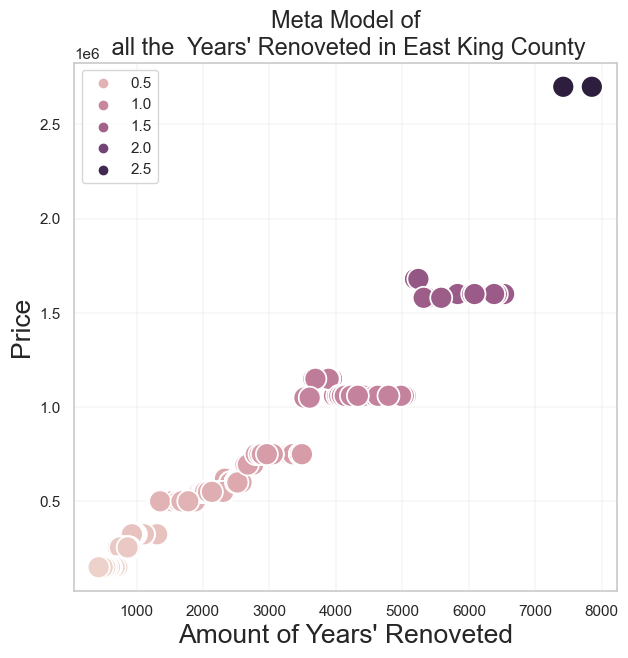

In [129]:
x = model_fit25['Size_of_Above']
y = model_fit25['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
flatui1 = ['#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510',]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit25, x=x, y=y,s=250,hue='preds')#,palette=flatui1)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the  Years\' Renoveted in East King County',size=17)
plt.xlabel("Amount of Years\' Renoveted", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [150]:
meta_model6 = models_predictions6

In [151]:
meta_model6

Living Above 430   Living Above 470   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $186,333           $195,239    
Quantile Regression 0.1             $115,367           $122,357    
Quantile Regression 0.5             $195,809           $204,106    
Quantile Regression 0.9             $285,982           $296,182    
Ridge Regression                    $186,191           $195,100    

                            Living Above 480   Living Above 490   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $197,465           $199,691    
Quantile Regression 0.1             $124,104           $125,852    
Quantile Regression 0.5             $206,181           $208,255    
Quantile Regression 0.9             $298,732           $301,283    
Ridge Regression                    $197,327           $199,554    

                            Living Above 530   Living Above 560   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $208,597           $215,276    
Quantile Regression 0.1             $132,842           $138,085    
Quantile Regression 0.5             $216,552           $222,775    
Quantile Regression 0.9             $311,483           $319,133    
Ridge Regression                    $208,462           $215,143    

                            Living Above 580   Living Above 600   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $219,728           $224,181    
Quantile Regression 0.1             $141,580           $145,075    
Quantile Regression 0.5             $226,924           $231,072    
Quantile Regression 0.9             $324,234           $329,334    
Ridge Regression                    $219,598           $224,052    

                            Living Above 620   Living Above 670   ...  \
Poisson Regression                  $603,348           $603,348   ...   
Bayesian Linear Regression          $228,633           $239,765   ...   
Quantile Regression 0.1             $148,570           $157,308   ...   
Quantile Regression 0.5             $235,221           $245,593   ...   
Quantile Regression 0.9             $334,434           $347,185   ...   
Ridge Regression                    $228,506           $239,641   ...   

                            Living Above 5830   Living Above 6050   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,388,551          $1,437,530    
Quantile Regression 0.1            $1,059,049          $1,097,495    
Quantile Regression 0.5            $1,315,940          $1,361,575    
Quantile Regression 0.9            $1,663,046          $1,719,149    
Ridge Regression                   $1,388,818          $1,437,814    

                            Living Above 6070   Living Above 6085   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,441,983          $1,445,322    
Quantile Regression 0.1            $1,100,990          $1,103,612    
Quantile Regression 0.5            $1,365,724          $1,368,835    
Quantile Regression 0.9            $1,724,249          $1,728,074    
Ridge Regression                   $1,442,268          $1,445,609    

                            Living Above 6370   Living Above 6380   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,508,772          $1,510,999    
Quantile Regression 0.1            $1,153,417          $1,155,165    
Quantile Regression 0.5            $1,427,953          $1,430,028    
Quantile Regression 0.9            $1,800,753          $1,803,303    
Ridge Regression                   $1,509,081          $1,511,308    

                            Living Above 6420   Living Above 6530   \
Poisson Regression                   $603,348            $603,348

In [132]:
vals = list(meta_var.preds)

In [152]:
meta_model6.loc[len(meta_model6.index)] = vals
meta_model6 = meta_model6.rename(index={6: 'Final Prediction'})

In [135]:
box_df6 = meta_model6.transpose()
box_df6

Poisson Regression Bayesian Linear Regression  \
 Living Above 430            $603,348                   $186,333    
 Living Above 470            $603,348                   $195,239    
 Living Above 480            $603,348                   $197,465    
 Living Above 490            $603,348                   $199,691    
 Living Above 530            $603,348                   $208,597    
...                                ...                        ...   
 Living Above 6380           $603,348                 $1,510,999    
 Living Above 6420           $603,348                 $1,519,904    
 Living Above 6530           $603,348                 $1,544,394    
 Living Above 7420           $603,348                 $1,742,537    
 Living Above 7850           $603,348                 $1,838,269    

                    Quantile Regression 0.1 Quantile Regression 0.5  \
 Living Above 430                 $115,367                $195,809    
 Living Above 470                 $122,357                $204,106    
 Living Above 480                 $124,104                $206,181    
 Living Above 490                 $125,852                $208,255    
 Living Above 530                 $132,842                $216,552    
...                                     ...                     ...   
 Living Above 6380              $1,155,165              $1,430,028    
 Living Above 6420              $1,162,155              $1,438,325    
 Living Above 6530              $1,181,378              $1,461,142    
 Living Above 7420              $1,336,911              $1,645,757    
 Living Above 7850              $1,412,056              $1,734,952    

                    Quantile Regression 0.9 Ridge Regression Final Prediction  
 Living Above 430                 $285,982         $186,191          $150,000  
 Living Above 470                 $296,182         $195,100          $150,000  
 Living Above 480                 $298,732         $197,327          $150,000  
 Living Above 490                 $301,283         $199,554          $150,000  
 Living Above 530                 $311,483         $208,462          $150,000  
...                                     ...              ...              ...  
 Living Above 6380              $1,803,303       $1,511,308        $1,600,000  
 Living Above 6420              $1,813,503       $1,520,216        $1,600,000  
 Living Above 6530              $1,841,555       $1,544,714        $1,600,000  
 Living Above 7420              $2,068,515       $1,742,925        $2,700,000  
 Living Above 7850              $2,178,171       $1,838,690        $2,700,000  

[419 rows x 7 columns]

In [136]:
melted_data6 = pd.melt(box_df6, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data6 = melted_data6.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [137]:
melted_data6[melted_data6.columns[1:]] = melted_data6[melted_data6.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

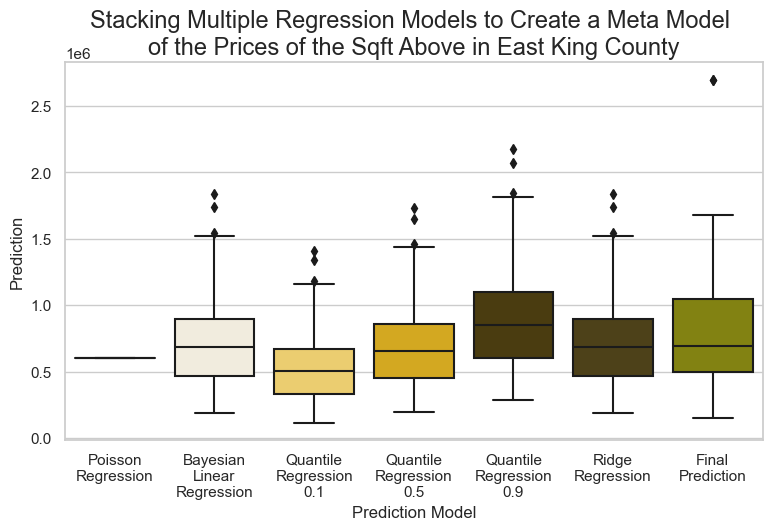

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
flatui = ['#f5c71a','#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data6,x='Prediction Model', y='Prediction',palette=flatui)
#ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
#x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of the Sqft Above in East King County", size=17)
wrap_labels(x, 10)

In [160]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = ''         
    df.iloc[0,:] = 'background-color:#7FFFD4;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#AFE1AF;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#7FFFD4;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#AFE1AF;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#7FFFD4;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#AFE1AF;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#088F8F ;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model6=meta_model6.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #ECFFDC')]},
            {"selector":"thead", 'props':[("background-color","#ECFFDC"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#ECFFDC'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [167]:
import dataframe_image as dfi
dfi.export(meta_model6,'meta_model6.png',max_cols=-1)

In [162]:
meta_model6

In [168]:
def SQFT_LIVING(SQFT_LIVINGS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_living = house_info['Sqft_living'].tolist()
    
    living_index = []
    for i,x in enumerate(sqft_living):
        if x == SQFT_LIVINGS:living_index.append(i)

    living_eastking = []
    for i in living_index:
        if locations[i] == zip_loca[0] : living_eastking.append(i)
        elif locations[i] == zip_loca[1] : living_eastking.append(i)
        elif locations[i] == zip_loca[2] : living_eastking.append(i)
        elif locations[i] == zip_loca[3] : living_eastking.append(i)
        elif locations[i] == zip_loca[4] : living_eastking.append(i)
        elif locations[i] == zip_loca[5] : living_eastking.append(i)
        elif locations[i] == zip_loca[6] : living_eastking.append(i)
        elif locations[i] == zip_loca[7]: living_eastking.append(i)
        elif locations[i] == zip_loca[8] : living_eastking.append(i)
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in living_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_sqft_living = house_info["Sqft_living"].value_counts().index.tolist()
price_living_eastking = []
for i in no_of_sqft_living:
    price_living_eastking.append(SQFT_LIVING(i))
price_living_eastking= sum(price_living_eastking, [])
len(price_living_eastking)

2455

In [169]:
def AMOUNT_LIVING(AMOUNT_LIVINGS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_living = house_info['Sqft_living'].tolist()
    X_value = []
    living_index = []
      
    for i,x in enumerate(sqft_living):
        if x == AMOUNT_LIVINGS:living_index.append(i)

    for i in living_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LIVINGS)
    return X_value

no_of_sqft_living = house_info["Sqft_living"].value_counts().index.tolist()
amount_living_eastking = []
for i in no_of_sqft_living:
    amount_living_eastking.append(AMOUNT_LIVING(i))
amount_living_eastking= sum(amount_living_eastking, [])
len(amount_living_eastking)

2455

In [170]:
regressiondata7 = pd.DataFrame({'Amount_of_sqft_living':amount_living_eastking,
                                'Price':price_living_eastking})
regressiondata7

Amount_of_sqft_living      Price
0                      1300   275000.0
1                      1300   369500.0
2                      1300   350000.0
3                      1300   380000.0
4                      1300   430000.0
...                     ...        ...
2450                   6085  1610000.0
2451                   5730  1230000.0
2452                   1778   435000.0
2453                   5545   937500.0
2454                   5584  1680000.0

[2455 rows x 2 columns]

In [181]:
regressiondata7
re7 = regressiondata7
x = re7.Amount_of_sqft_living.value_counts()
#x = regressiondata5.Year_Renoveted.value_counts()
len(x)

454

C:\Users\rutho\AppData\Local\Temp/ipykernel_22328/2955844718.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million',


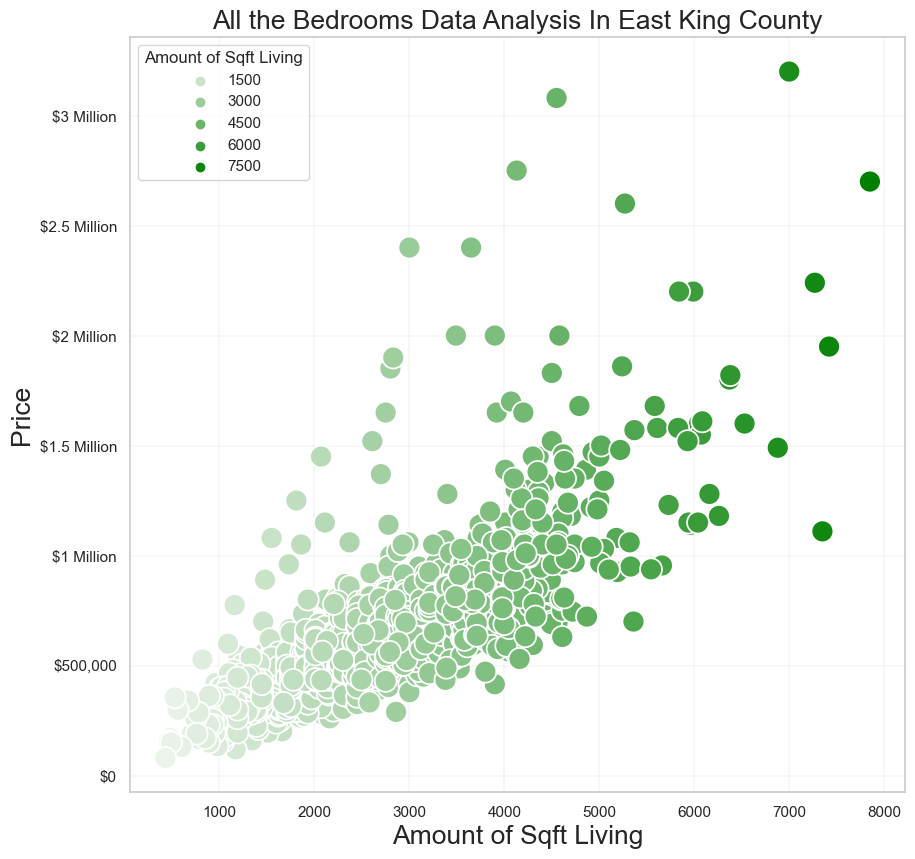

In [171]:
x = regressiondata7['Amount_of_sqft_living']
y = regressiondata7['Price']

sns.set(style='whitegrid')
cmap = sns.light_palette("green", as_cmap=True)

#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})

ax = sns.scatterplot(data=regressiondata7, x=x, y=y,s=250,hue='Amount_of_sqft_living',
                   palette=cmap )
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In East King County',size=19)
plt.xlabel("Amount of Sqft Living", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Sqft Living')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million',
                 '$2.5 Million','$3 Million' ])
plt.show()

In [173]:
# Create linear regression object
model26 = PoissonRegressor()

# Train the model using the training sets
model26.fit(regressiondata7[['Amount_of_sqft_living']],regressiondata7[['Price']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [174]:
x = regressiondata7[['Amount_of_sqft_living']]
y = regressiondata7[['Price']]
prediction26 = model26.predict(x)

In [210]:
model_fit26 = regressiondata7
model_fit26['preds'] = prediction26

In [211]:
model_fit26

Amount_of_sqft_living      Price          preds
0                      1300   275000.0  603348.063136
1                      1300   369500.0  603348.063136
2                      1300   350000.0  603348.063136
3                      1300   380000.0  603348.063136
4                      1300   430000.0  603348.063136
...                     ...        ...            ...
2450                   6085  1610000.0  603348.063136
2451                   5730  1230000.0  603348.063136
2452                   1778   435000.0  603348.063136
2453                   5545   937500.0  603348.063136
2454                   5584  1680000.0  603348.063136

[2455 rows x 3 columns]

In [183]:
# Importing modules that are required
# Creating and training model
model27 = BayesianRidge()
model27.fit(regressiondata7[['Amount_of_sqft_living']],regressiondata7[['Price']])
   
# Model making a prediction on test data
prediction27 = model27.predict(regressiondata7[['Amount_of_sqft_living']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [213]:
model_fit27 = regressiondata7
model_fit27['preds'] = prediction27

In [214]:
model_fit27

Amount_of_sqft_living      Price         preds
0                      1300   275000.0  3.340460e+05
1                      1300   369500.0  3.340460e+05
2                      1300   350000.0  3.340460e+05
3                      1300   380000.0  3.340460e+05
4                      1300   430000.0  3.340460e+05
...                     ...        ...           ...
2450                   6085  1610000.0  1.409575e+06
2451                   5730  1230000.0  1.329781e+06
2452                   1778   435000.0  4.414865e+05
2453                   5545   937500.0  1.288199e+06
2454                   5584  1680000.0  1.296965e+06

[2455 rows x 3 columns]

In [187]:
X = regressiondata7[['Amount_of_sqft_living']]
y = regressiondata7[['Price']]

qrf1 = QuantileRegressor(quantile=0.1, alpha=0)
qrf1.fit(X,y)

qrf2 = QuantileRegressor(quantile=0.5, alpha=0)
qrf2.fit(X,y)

qrf3 = QuantileRegressor(quantile=0.9, alpha=0)
qrf3.fit(X,y)

y_pred_1 = qrf1.predict(regressiondata7[['Amount_of_sqft_living']])
y_pred_2 = qrf2.predict(regressiondata7[['Amount_of_sqft_living']])
y_pred_3 = qrf3.predict(regressiondata7[['Amount_of_sqft_living']])

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packa

In [191]:
Quantile_regression8 = pd.DataFrame({'Amount_of_sqft_living': regressiondata7['Amount_of_sqft_living'],
              '0.1 Pred': y_pred_1,
              '0.5 Pred': y_pred_2,
              '0.9 Pred': y_pred_3,
              'Price': regressiondata7['Price']})

In [192]:
no = []
for i in Counter(regressiondata7['Amount_of_sqft_living']):no.append(i)

In [194]:
min(no)

430

In [196]:
openn = []
count = 430
while count < 7851 :
    for x,i in enumerate(Quantile_regression8['Amount_of_sqft_living']):
         if i == count:
            openn.append((x,i))
    count+=1

In [197]:
result1 = []
result = [i[1] for i in openn]
for x,i in enumerate(result):
    if i not in result1:result1.append(i)

In [198]:
openn2 = []
for i in openn:openn2.append(i[1])

In [199]:
indexx = []
for i in result1:
    if i in openn2:indexx.append(openn2.index(i))

In [200]:
final_indexx = []
for i in indexx:final_indexx.append(openn[i][0])

In [201]:
Quantileregression_updated8 = Quantile_regression8.loc[final_indexx]
Quantileregression_updated8 = Quantileregression_updated8.drop('Price', axis=1)
Quantileregression_updated8

Amount_of_sqft_living      0.1 Pred      0.5 Pred      0.9 Pred
2431                    430  1.191881e+05  1.595736e+05  2.014926e+05
2408                    470  1.255780e+05  1.680577e+05  2.118794e+05
2395                    480  1.271754e+05  1.701787e+05  2.144761e+05
2425                    490  1.287729e+05  1.722997e+05  2.170728e+05
2383                    530  1.351628e+05  1.807838e+05  2.274595e+05
...                     ...           ...           ...           ...
2442                   7000  1.168720e+06  1.553088e+06  1.907517e+06
2421                   7270  1.211852e+06  1.610356e+06  1.977628e+06
2434                   7350  1.224632e+06  1.627324e+06  1.998401e+06
2440                   7420  1.235814e+06  1.642171e+06  2.016578e+06
2413                   7850  1.304505e+06  1.733375e+06  2.128235e+06

[454 rows x 4 columns]

In [203]:
melted_data8 = pd.melt(Quantileregression_updated8, id_vars=['Amount_of_sqft_living'])
melted_data8 = melted_data8.dropna()
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_living Percentile         value
0                       430   0.1 Pred  1.191881e+05
1                       470   0.1 Pred  1.255780e+05
2                       480   0.1 Pred  1.271754e+05
3                       490   0.1 Pred  1.287729e+05
4                       530   0.1 Pred  1.351628e+05
...                     ...        ...           ...
1357                   7000   0.9 Pred  1.907517e+06
1358                   7270   0.9 Pred  1.977628e+06
1359                   7350   0.9 Pred  1.998401e+06
1360                   7420   0.9 Pred  2.016578e+06
1361                   7850   0.9 Pred  2.128235e+06

[1362 rows x 3 columns]

In [220]:
model28 = Ridge(alpha=1.0)
model28.fit(regressiondata7[['Amount_of_sqft_living']],regressiondata7[['Price']])
preds_28 = model28.predict(regressiondata7[['Amount_of_sqft_living']])

In [221]:
model_fit28 = regressiondata7
model_fit28['preds'] = preds_28

In [222]:
model_fit28

Amount_of_sqft_living      Price         preds
0                      1300   275000.0  3.339813e+05
1                      1300   369500.0  3.339813e+05
2                      1300   350000.0  3.339813e+05
3                      1300   380000.0  3.339813e+05
4                      1300   430000.0  3.339813e+05
...                     ...        ...           ...
2450                   6085  1610000.0  1.409769e+06
2451                   5730  1230000.0  1.329956e+06
2452                   1778   435000.0  4.414476e+05
2453                   5545   937500.0  1.288363e+06
2454                   5584  1680000.0  1.297132e+06

[2455 rows x 3 columns]

In [209]:
size_above = []
for i in final_indexx:
    size_above.append(regressiondata7['Amount_of_sqft_living'][i])

In [212]:
pos_var = model_fit26.iloc[final_indexx]
pos_var = pos_var.drop('Price', axis=1)
pos_var[pos_var.columns[1]] = ['${:,.0f}'.format(i) for i in pos_var.preds]
pos_var

Amount_of_sqft_living     preds
2431                    430  $603,348
2408                    470  $603,348
2395                    480  $603,348
2425                    490  $603,348
2383                    530  $603,348
...                     ...       ...
2442                   7000  $603,348
2421                   7270  $603,348
2434                   7350  $603,348
2440                   7420  $603,348
2413                   7850  $603,348

[454 rows x 2 columns]

In [215]:
bay_var = model_fit27.iloc[final_indexx]
bay_var = bay_var.drop('Price', axis=1)
bay_var[bay_var.columns[1]] = ['${:,.0f}'.format(i) for i in bay_var.preds]
bay_var

Amount_of_sqft_living       preds
2431                    430    $138,495
2408                    470    $147,486
2395                    480    $149,734
2425                    490    $151,981
2383                    530    $160,972
...                     ...         ...
2442                   7000  $1,615,241
2421                   7270  $1,675,929
2434                   7350  $1,693,910
2440                   7420  $1,709,644
2413                   7850  $1,806,296

[454 rows x 2 columns]

In [219]:
rid_var = model_fit28.iloc[final_indexx]
rid_var = rid_var.drop('Price', axis=1)
rid_var[rid_var.columns[1]] = ['${:,.0f}'.format(i) for i in rid_var.preds]
rid_var

Amount_of_sqft_living       preds
2431                    430    $138,384
2408                    470    $147,377
2395                    480    $149,625
2425                    490    $151,873
2383                    530    $160,866
...                     ...         ...
2442                   7000  $1,615,484
2421                   7270  $1,676,186
2434                   7350  $1,694,172
2440                   7420  $1,709,910
2413                   7850  $1,806,585

[454 rows x 2 columns]

In [223]:
Quantileregression_updated8[Quantileregression_updated8.columns[1]] = ['${:,.0f}'.format(i) for i in  
                                                        Quantileregression_updated8['0.1 Pred']]
Quantileregression_updated8[Quantileregression_updated8.columns[2]] = ['${:,.0f}'.format(i) for i in 
                                                            Quantileregression_updated8['0.5 Pred']]
Quantileregression_updated8[Quantileregression_updated8.columns[3]] = ['${:,.0f}'.format(i) for i in 
                                                           Quantileregression_updated8['0.9 Pred']]
Quantileregression_updated8

Amount_of_sqft_living    0.1 Pred    0.5 Pred    0.9 Pred
2431                    430    $119,188    $159,574    $201,493
2408                    470    $125,578    $168,058    $211,879
2395                    480    $127,175    $170,179    $214,476
2425                    490    $128,773    $172,300    $217,073
2383                    530    $135,163    $180,784    $227,460
...                     ...         ...         ...         ...
2442                   7000  $1,168,720  $1,553,088  $1,907,517
2421                   7270  $1,211,852  $1,610,356  $1,977,628
2434                   7350  $1,224,632  $1,627,324  $1,998,401
2440                   7420  $1,235,814  $1,642,171  $2,016,578
2413                   7850  $1,304,505  $1,733,375  $2,128,235

[454 rows x 4 columns]

In [227]:
for x,i in enumerate(final_indexx):
    print('"','Sqft Living ',size_above[x],'":["',pos_var.preds[i],'"',',','"',bay_var.preds[i],'"',',',
          '"',Quantileregression_updated8['0.1 Pred'][i],'"',',',
          '"',Quantileregression_updated8['0.5 Pred'][i],'"',',',
          '"',Quantileregression_updated8['0.9 Pred'][i],'"',',','"',rid_var.preds[i],'"','],')

" Sqft Living  430 ":[" $603,348 " , " $138,495 " , " $119,188 " , " $159,574 " , " $201,493 " , " $138,384 " ],
" Sqft Living  470 ":[" $603,348 " , " $147,486 " , " $125,578 " , " $168,058 " , " $211,879 " , " $147,377 " ],
" Sqft Living  480 ":[" $603,348 " , " $149,734 " , " $127,175 " , " $170,179 " , " $214,476 " , " $149,625 " ],
" Sqft Living  490 ":[" $603,348 " , " $151,981 " , " $128,773 " , " $172,300 " , " $217,073 " , " $151,873 " ],
" Sqft Living  530 ":[" $603,348 " , " $160,972 " , " $135,163 " , " $180,784 " , " $227,460 " , " $160,866 " ],
" Sqft Living  560 ":[" $603,348 " , " $167,715 " , " $139,955 " , " $187,147 " , " $235,250 " , " $167,611 " ],
" Sqft Living  600 ":[" $603,348 " , " $176,706 " , " $146,345 " , " $195,631 " , " $245,636 " , " $176,604 " ],
" Sqft Living  670 ":[" $603,348 " , " $192,440 " , " $157,527 " , " $210,478 " , " $263,813 " , " $192,342 " ],
" Sqft Living  710 ":[" $603,348 " , " $201,431 " , " $163,917 " , " $218,962 " , " $274,200 " ,

In [259]:
# Creating the DataFrame
models_predictions7 = pd.DataFrame({
" Sqft Living  430 ":[" $603,348 " , " $138,495 " , " $119,188 " , " $159,574 " , " $201,493 " , " $138,384 " ],
" Sqft Living  470 ":[" $603,348 " , " $147,486 " , " $125,578 " , " $168,058 " , " $211,879 " , " $147,377 " ],
" Sqft Living  480 ":[" $603,348 " , " $149,734 " , " $127,175 " , " $170,179 " , " $214,476 " , " $149,625 " ],
" Sqft Living  490 ":[" $603,348 " , " $151,981 " , " $128,773 " , " $172,300 " , " $217,073 " , " $151,873 " ],
" Sqft Living  530 ":[" $603,348 " , " $160,972 " , " $135,163 " , " $180,784 " , " $227,460 " , " $160,866 " ],
" Sqft Living  560 ":[" $603,348 " , " $167,715 " , " $139,955 " , " $187,147 " , " $235,250 " , " $167,611 " ],
" Sqft Living  600 ":[" $603,348 " , " $176,706 " , " $146,345 " , " $195,631 " , " $245,636 " , " $176,604 " ],
" Sqft Living  670 ":[" $603,348 " , " $192,440 " , " $157,527 " , " $210,478 " , " $263,813 " , " $192,342 " ],
" Sqft Living  710 ":[" $603,348 " , " $201,431 " , " $163,917 " , " $218,962 " , " $274,200 " , " $201,335 " ],
" Sqft Living  720 ":[" $603,348 " , " $203,679 " , " $165,515 " , " $221,083 " , " $276,797 " , " $203,583 " ],
" Sqft Living  750 ":[" $603,348 " , " $210,422 " , " $170,307 " , " $227,446 " , " $284,587 " , " $210,328 " ],
" Sqft Living  760 ":[" $603,348 " , " $212,670 " , " $171,904 " , " $229,567 " , " $287,183 " , " $212,576 " ],
" Sqft Living  770 ":[" $603,348 " , " $214,917 " , " $173,502 " , " $231,688 " , " $289,780 " , " $214,824 " ],
" Sqft Living  780 ":[" $603,348 " , " $217,165 " , " $175,099 " , " $233,810 " , " $292,377 " , " $217,072 " ],
" Sqft Living  820 ":[" $603,348 " , " $226,156 " , " $181,489 " , " $242,294 " , " $302,763 " , " $226,065 " ],
" Sqft Living  850 ":[" $603,348 " , " $232,899 " , " $186,282 " , " $248,657 " , " $310,554 " , " $232,810 " ],
" Sqft Living  860 ":[" $603,348 " , " $235,147 " , " $187,879 " , " $250,778 " , " $313,150 " , " $235,058 " ],
" Sqft Living  890 ":[" $603,348 " , " $241,890 " , " $192,671 " , " $257,141 " , " $320,940 " , " $241,803 " ],
" Sqft Living  900 ":[" $603,348 " , " $244,138 " , " $194,269 " , " $259,262 " , " $323,537 " , " $244,051 " ],
" Sqft Living  910 ":[" $603,348 " , " $246,385 " , " $195,866 " , " $261,383 " , " $326,134 " , " $246,300 " ],
" Sqft Living  920 ":[" $603,348 " , " $248,633 " , " $197,464 " , " $263,504 " , " $328,730 " , " $248,548 " ],
" Sqft Living  930 ":[" $603,348 " , " $250,881 " , " $199,061 " , " $265,625 " , " $331,327 " , " $250,796 " ],
" Sqft Living  940 ":[" $603,348 " , " $253,128 " , " $200,659 " , " $267,746 " , " $333,924 " , " $253,044 " ],
" Sqft Living  950 ":[" $603,348 " , " $255,376 " , " $202,256 " , " $269,867 " , " $336,520 " , " $255,293 " ],
" Sqft Living  960 ":[" $603,348 " , " $257,624 " , " $203,854 " , " $271,988 " , " $339,117 " , " $257,541 " ],
" Sqft Living  970 ":[" $603,348 " , " $259,872 " , " $205,451 " , " $274,109 " , " $341,714 " , " $259,789 " ],
" Sqft Living  980 ":[" $603,348 " , " $262,119 " , " $207,049 " , " $276,230 " , " $344,311 " , " $262,037 " ],
" Sqft Living  1000 ":[" $603,348 " , " $266,615 " , " $210,243 " , " $280,472 " , " $349,504 " , " $266,534 " ],
" Sqft Living  1010 ":[" $603,348 " , " $268,862 " , " $211,841 " , " $282,593 " , " $352,101 " , " $268,782 " ],
" Sqft Living  1020 ":[" $603,348 " , " $271,110 " , " $213,438 " , " $284,714 " , " $354,697 " , " $271,030 " ],
" Sqft Living  1040 ":[" $603,348 " , " $275,605 " , " $216,633 " , " $288,956 " , " $359,891 " , " $275,527 " ],
" Sqft Living  1050 ":[" $603,348 " , " $277,853 " , " $218,231 " , " $291,077 " , " $362,487 " , " $277,775 " ],
" Sqft Living  1060 ":[" $603,348 " , " $280,101 " , " $219,828 " , " $293,198 " , " $365,084 " , " $280,023 " ],
" Sqft Living  1070 ":[" $603,348 " , " $282,349 " , " $221,426 " , " $295,319 " , " $367,681 " , " $282,272 " ],
" Sqft Living  1090 ":[" $603,348 " , " $286,844 " , " $224,621 " , " $299,561 " , " $372,874 " , " $286,768 " ],
" Sqft Living  1100 ":[" $603,348 " , " $289,092 " , " $226,218 " , " $301,682 " , " $375,471 " , " $289,016 " ],
" Sqft Living  1110 ":[" $603,348 " , " $291,339 " , " $227,816 " , " $303,803 " , " $378,067 " , " $291,265 " ],
" Sqft Living  1120 ":[" $603,348 " , " $293,587 " , " $229,413 " , " $305,924 " , " $380,664 " , " $293,513 " ],
" Sqft Living  1140 ":[" $603,348 " , " $298,083 " , " $232,608 " , " $310,166 " , " $385,858 " , " $298,009 " ],
" Sqft Living  1150 ":[" $603,348 " , " $300,330 " , " $234,205 " , " $312,287 " , " $388,454 " , " $300,258 " ],
" Sqft Living  1160 ":[" $603,348 " , " $302,578 " , " $235,803 " , " $314,409 " , " $391,051 " , " $302,506 " ],
" Sqft Living  1170 ":[" $603,348 " , " $304,826 " , " $237,400 " , " $316,530 " , " $393,648 " , " $304,754 " ],
" Sqft Living  1180 ":[" $603,348 " , " $307,073 " , " $238,998 " , " $318,651 " , " $396,244 " , " $307,002 " ],
" Sqft Living  1190 ":[" $603,348 " , " $309,321 " , " $240,595 " , " $320,772 " , " $398,841 " , " $309,251 " ],
" Sqft Living  1200 ":[" $603,348 " , " $311,569 " , " $242,193 " , " $322,893 " , " $401,438 " , " $311,499 " ],
" Sqft Living  1210 ":[" $603,348 " , " $313,817 " , " $243,790 " , " $325,014 " , " $404,034 " , " $313,747 " ],
" Sqft Living  1220 ":[" $603,348 " , " $316,064 " , " $245,388 " , " $327,135 " , " $406,631 " , " $315,995 " ],
" Sqft Living  1230 ":[" $603,348 " , " $318,312 " , " $246,985 " , " $329,256 " , " $409,228 " , " $318,244 " ],
" Sqft Living  1240 ":[" $603,348 " , " $320,560 " , " $248,583 " , " $331,377 " , " $411,824 " , " $320,492 " ],
" Sqft Living  1250 ":[" $603,348 " , " $322,807 " , " $250,180 " , " $333,498 " , " $414,421 " , " $322,740 " ],
" Sqft Living  1260 ":[" $603,348 " , " $325,055 " , " $251,777 " , " $335,619 " , " $417,018 " , " $324,988 " ],
" Sqft Living  1270 ":[" $603,348 " , " $327,303 " , " $253,375 " , " $337,740 " , " $419,614 " , " $327,237 " ],
" Sqft Living  1280 ":[" $603,348 " , " $329,551 " , " $254,972 " , " $339,861 " , " $422,211 " , " $329,485 " ],
" Sqft Living  1290 ":[" $603,348 " , " $331,798 " , " $256,570 " , " $341,982 " , " $424,808 " , " $331,733 " ],
" Sqft Living  1300 ":[" $603,348 " , " $334,046 " , " $258,167 " , " $344,103 " , " $427,405 " , " $333,981 " ],
" Sqft Living  1310 ":[" $603,348 " , " $336,294 " , " $259,765 " , " $346,224 " , " $430,001 " , " $336,230 " ],
" Sqft Living  1320 ":[" $603,348 " , " $338,541 " , " $261,362 " , " $348,345 " , " $432,598 " , " $338,478 " ],
" Sqft Living  1330 ":[" $603,348 " , " $340,789 " , " $262,960 " , " $350,466 " , " $435,195 " , " $340,726 " ],
" Sqft Living  1340 ":[" $603,348 " , " $343,037 " , " $264,557 " , " $352,587 " , " $437,791 " , " $342,974 " ],
" Sqft Living  1350 ":[" $603,348 " , " $345,285 " , " $266,155 " , " $354,708 " , " $440,388 " , " $345,223 " ],
" Sqft Living  1360 ":[" $603,348 " , " $347,532 " , " $267,752 " , " $356,829 " , " $442,985 " , " $347,471 " ],
" Sqft Living  1370 ":[" $603,348 " , " $349,780 " , " $269,350 " , " $358,950 " , " $445,581 " , " $349,719 " ],
" Sqft Living  1380 ":[" $603,348 " , " $352,028 " , " $270,947 " , " $361,071 " , " $448,178 " , " $351,967 " ],
" Sqft Living  1390 ":[" $603,348 " , " $354,275 " , " $272,544 " , " $363,192 " , " $450,775 " , " $354,216 " ],
" Sqft Living  1400 ":[" $603,348 " , " $356,523 " , " $274,142 " , " $365,313 " , " $453,371 " , " $356,464 " ],
" Sqft Living  1410 ":[" $603,348 " , " $358,771 " , " $275,739 " , " $367,434 " , " $455,968 " , " $358,712 " ],
" Sqft Living  1420 ":[" $603,348 " , " $361,018 " , " $277,337 " , " $369,555 " , " $458,565 " , " $360,960 " ],
" Sqft Living  1430 ":[" $603,348 " , " $363,266 " , " $278,934 " , " $371,676 " , " $461,161 " , " $363,208 " ],
" Sqft Living  1440 ":[" $603,348 " , " $365,514 " , " $280,532 " , " $373,797 " , " $463,758 " , " $365,457 " ],
" Sqft Living  1445 ":[" $603,348 " , " $366,638 " , " $281,330 " , " $374,858 " , " $465,057 " , " $366,581 " ],
" Sqft Living  1450 ":[" $603,348 " , " $367,762 " , " $282,129 " , " $375,918 " , " $466,355 " , " $367,705 " ],
" Sqft Living  1460 ":[" $603,348 " , " $370,009 " , " $283,727 " , " $378,039 " , " $468,952 " , " $369,953 " ],
" Sqft Living  1470 ":[" $603,348 " , " $372,257 " , " $285,324 " , " $380,160 " , " $471,548 " , " $372,201 " ],
" Sqft Living  1480 ":[" $603,348 " , " $374,505 " , " $286,922 " , " $382,281 " , " $474,145 " , " $374,450 " ],
" Sqft Living  1490 ":[" $603,348 " , " $376,752 " , " $288,519 " , " $384,402 " , " $476,742 " , " $376,698 " ],
" Sqft Living  1500 ":[" $603,348 " , " $379,000 " , " $290,117 " , " $386,523 " , " $479,338 " , " $378,946 " ],
" Sqft Living  1510 ":[" $603,348 " , " $381,248 " , " $291,714 " , " $388,644 " , " $481,935 " , " $381,194 " ],
" Sqft Living  1520 ":[" $603,348 " , " $383,496 " , " $293,311 " , " $390,765 " , " $484,532 " , " $383,443 " ],
" Sqft Living  1530 ":[" $603,348 " , " $385,743 " , " $294,909 " , " $392,886 " , " $487,128 " , " $385,691 " ],
" Sqft Living  1540 ":[" $603,348 " , " $387,991 " , " $296,506 " , " $395,008 " , " $489,725 " , " $387,939 " ],
" Sqft Living  1550 ":[" $603,348 " , " $390,239 " , " $298,104 " , " $397,129 " , " $492,322 " , " $390,187 " ],
" Sqft Living  1560 ":[" $603,348 " , " $392,486 " , " $299,701 " , " $399,250 " , " $494,918 " , " $392,436 " ],
" Sqft Living  1570 ":[" $603,348 " , " $394,734 " , " $301,299 " , " $401,371 " , " $497,515 " , " $394,684 " ],
" Sqft Living  1580 ":[" $603,348 " , " $396,982 " , " $302,896 " , " $403,492 " , " $500,112 " , " $396,932 " ],
" Sqft Living  1590 ":[" $603,348 " , " $399,230 " , " $304,494 " , " $405,613 " , " $502,709 " , " $399,180 " ],
" Sqft Living  1600 ":[" $603,348 " , " $401,477 " , " $306,091 " , " $407,734 " , " $505,305 " , " $401,429 " ],
" Sqft Living  1610 ":[" $603,348 " , " $403,725 " , " $307,689 " , " $409,855 " , " $507,902 " , " $403,677 " ],
" Sqft Living  1620 ":[" $603,348 " , " $405,973 " , " $309,286 " , " $411,976 " , " $510,499 " , " $405,925 " ],
" Sqft Living  1630 ":[" $603,348 " , " $408,220 " , " $310,884 " , " $414,097 " , " $513,095 " , " $408,173 " ],
" Sqft Living  1640 ":[" $603,348 " , " $410,468 " , " $312,481 " , " $416,218 " , " $515,692 " , " $410,422 " ],
" Sqft Living  1650 ":[" $603,348 " , " $412,716 " , " $314,078 " , " $418,339 " , " $518,289 " , " $412,670 " ],
" Sqft Living  1660 ":[" $603,348 " , " $414,964 " , " $315,676 " , " $420,460 " , " $520,885 " , " $414,918 " ],
" Sqft Living  1670 ":[" $603,348 " , " $417,211 " , " $317,273 " , " $422,581 " , " $523,482 " , " $417,166 " ],
" Sqft Living  1676 ":[" $603,348 " , " $418,560 " , " $318,232 " , " $423,853 " , " $525,040 " , " $418,515 " ],
" Sqft Living  1680 ":[" $603,348 " , " $419,459 " , " $318,871 " , " $424,702 " , " $526,079 " , " $419,415 " ],
" Sqft Living  1690 ":[" $603,348 " , " $421,707 " , " $320,468 " , " $426,823 " , " $528,675 " , " $421,663 " ],
" Sqft Living  1700 ":[" $603,348 " , " $423,954 " , " $322,066 " , " $428,944 " , " $531,272 " , " $423,911 " ],
" Sqft Living  1710 ":[" $603,348 " , " $426,202 " , " $323,663 " , " $431,065 " , " $533,869 " , " $426,159 " ],
" Sqft Living  1720 ":[" $603,348 " , " $428,450 " , " $325,261 " , " $433,186 " , " $536,465 " , " $428,408 " ],
" Sqft Living  1730 ":[" $603,348 " , " $430,697 " , " $326,858 " , " $435,307 " , " $539,062 " , " $430,656 " ],
" Sqft Living  1740 ":[" $603,348 " , " $432,945 " , " $328,456 " , " $437,428 " , " $541,659 " , " $432,904 " ],
" Sqft Living  1750 ":[" $603,348 " , " $435,193 " , " $330,053 " , " $439,549 " , " $544,256 " , " $435,152 " ],
" Sqft Living  1760 ":[" $603,348 " , " $437,441 " , " $331,651 " , " $441,670 " , " $546,852 " , " $437,401 " ],
" Sqft Living  1770 ":[" $603,348 " , " $439,688 " , " $333,248 " , " $443,791 " , " $549,449 " , " $439,649 " ],
" Sqft Living  1778 ":[" $603,348 " , " $441,486 " , " $334,526 " , " $445,488 " , " $551,526 " , " $441,448 " ],
" Sqft Living  1780 ":[" $603,348 " , " $441,936 " , " $334,845 " , " $445,912 " , " $552,046 " , " $441,897 " ],
" Sqft Living  1790 ":[" $603,348 " , " $444,184 " , " $336,443 " , " $448,033 " , " $554,642 " , " $444,145 " ],
" Sqft Living  1800 ":[" $603,348 " , " $446,431 " , " $338,040 " , " $450,154 " , " $557,239 " , " $446,394 " ],
" Sqft Living  1810 ":[" $603,348 " , " $448,679 " , " $339,638 " , " $452,275 " , " $559,836 " , " $448,642 " ],
" Sqft Living  1820 ":[" $603,348 " , " $450,927 " , " $341,235 " , " $454,396 " , " $562,432 " , " $450,890 " ],
" Sqft Living  1830 ":[" $603,348 " , " $453,175 " , " $342,833 " , " $456,517 " , " $565,029 " , " $453,138 " ],
" Sqft Living  1840 ":[" $603,348 " , " $455,422 " , " $344,430 " , " $458,638 " , " $567,626 " , " $455,387 " ],
" Sqft Living  1850 ":[" $603,348 " , " $457,670 " , " $346,028 " , " $460,759 " , " $570,222 " , " $457,635 " ],
" Sqft Living  1860 ":[" $603,348 " , " $459,918 " , " $347,625 " , " $462,880 " , " $572,819 " , " $459,883 " ],
" Sqft Living  1870 ":[" $603,348 " , " $462,165 " , " $349,223 " , " $465,001 " , " $575,416 " , " $462,131 " ],
" Sqft Living  1880 ":[" $603,348 " , " $464,413 " , " $350,820 " , " $467,122 " , " $578,012 " , " $464,380 " ],
" Sqft Living  1890 ":[" $603,348 " , " $466,661 " , " $352,418 " , " $469,243 " , " $580,609 " , " $466,628 " ],
" Sqft Living  1900 ":[" $603,348 " , " $468,909 " , " $354,015 " , " $471,364 " , " $583,206 " , " $468,876 " ],
" Sqft Living  1910 ":[" $603,348 " , " $471,156 " , " $355,612 " , " $473,485 " , " $585,803 " , " $471,124 " ],
" Sqft Living  1920 ":[" $603,348 " , " $473,404 " , " $357,210 " , " $475,607 " , " $588,399 " , " $473,373 " ],
" Sqft Living  1930 ":[" $603,348 " , " $475,652 " , " $358,807 " , " $477,728 " , " $590,996 " , " $475,621 " ],
" Sqft Living  1940 ":[" $603,348 " , " $477,899 " , " $360,405 " , " $479,849 " , " $593,593 " , " $477,869 " ],
" Sqft Living  1950 ":[" $603,348 " , " $480,147 " , " $362,002 " , " $481,970 " , " $596,189 " , " $480,117 " ],
" Sqft Living  1960 ":[" $603,348 " , " $482,395 " , " $363,600 " , " $484,091 " , " $598,786 " , " $482,366 " ],
" Sqft Living  1970 ":[" $603,348 " , " $484,643 " , " $365,197 " , " $486,212 " , " $601,383 " , " $484,614 " ],
" Sqft Living  1980 ":[" $603,348 " , " $486,890 " , " $366,795 " , " $488,333 " , " $603,979 " , " $486,862 " ],
" Sqft Living  1990 ":[" $603,348 " , " $489,138 " , " $368,392 " , " $490,454 " , " $606,576 " , " $489,110 " ],
" Sqft Living  2000 ":[" $603,348 " , " $491,386 " , " $369,990 " , " $492,575 " , " $609,173 " , " $491,359 " ],
" Sqft Living  2010 ":[" $603,348 " , " $493,633 " , " $371,587 " , " $494,696 " , " $611,769 " , " $493,607 " ],
" Sqft Living  2020 ":[" $603,348 " , " $495,881 " , " $373,185 " , " $496,817 " , " $614,366 " , " $495,855 " ],
" Sqft Living  2030 ":[" $603,348 " , " $498,129 " , " $374,782 " , " $498,938 " , " $616,963 " , " $498,103 " ],
" Sqft Living  2040 ":[" $603,348 " , " $500,376 " , " $376,379 " , " $501,059 " , " $619,559 " , " $500,352 " ],
" Sqft Living  2050 ":[" $603,348 " , " $502,624 " , " $377,977 " , " $503,180 " , " $622,156 " , " $502,600 " ],
" Sqft Living  2060 ":[" $603,348 " , " $504,872 " , " $379,574 " , " $505,301 " , " $624,753 " , " $504,848 " ],
" Sqft Living  2070 ":[" $603,348 " , " $507,120 " , " $381,172 " , " $507,422 " , " $627,350 " , " $507,096 " ],
" Sqft Living  2075 ":[" $603,348 " , " $508,243 " , " $381,971 " , " $508,482 " , " $628,648 " , " $508,221 " ],
" Sqft Living  2080 ":[" $603,348 " , " $509,367 " , " $382,769 " , " $509,543 " , " $629,946 " , " $509,345 " ],
" Sqft Living  2085 ":[" $603,348 " , " $510,491 " , " $383,568 " , " $510,603 " , " $631,245 " , " $510,469 " ],
" Sqft Living  2090 ":[" $603,348 " , " $511,615 " , " $384,367 " , " $511,664 " , " $632,543 " , " $511,593 " ],
" Sqft Living  2100 ":[" $603,348 " , " $513,863 " , " $385,964 " , " $513,785 " , " $635,140 " , " $513,841 " ],
" Sqft Living  2110 ":[" $603,348 " , " $516,110 " , " $387,562 " , " $515,906 " , " $637,736 " , " $516,089 " ],
" Sqft Living  2120 ":[" $603,348 " , " $518,358 " , " $389,159 " , " $518,027 " , " $640,333 " , " $518,338 " ],
" Sqft Living  2130 ":[" $603,348 " , " $520,606 " , " $390,757 " , " $520,148 " , " $642,930 " , " $520,586 " ],
" Sqft Living  2134 ":[" $603,348 " , " $521,505 " , " $391,396 " , " $520,996 " , " $643,968 " , " $521,485 " ],
" Sqft Living  2140 ":[" $603,348 " , " $522,854 " , " $392,354 " , " $522,269 " , " $645,526 " , " $522,834 " ],
" Sqft Living  2150 ":[" $603,348 " , " $525,101 " , " $393,952 " , " $524,390 " , " $648,123 " , " $525,082 " ],
" Sqft Living  2160 ":[" $603,348 " , " $527,349 " , " $395,549 " , " $526,511 " , " $650,720 " , " $527,331 " ],
" Sqft Living  2170 ":[" $603,348 " , " $529,597 " , " $397,146 " , " $528,632 " , " $653,316 " , " $529,579 " ],
" Sqft Living  2180 ":[" $603,348 " , " $531,844 " , " $398,744 " , " $530,753 " , " $655,913 " , " $531,827 " ],
" Sqft Living  2190 ":[" $603,348 " , " $534,092 " , " $400,341 " , " $532,874 " , " $658,510 " , " $534,075 " ],
" Sqft Living  2200 ":[" $603,348 " , " $536,340 " , " $401,939 " , " $534,995 " , " $661,107 " , " $536,324 " ],
" Sqft Living  2206 ":[" $603,348 " , " $537,688 " , " $402,897 " , " $536,268 " , " $662,665 " , " $537,673 " ],
" Sqft Living  2210 ":[" $603,348 " , " $538,588 " , " $403,536 " , " $537,116 " , " $663,703 " , " $538,572 " ],
" Sqft Living  2220 ":[" $603,348 " , " $540,835 " , " $405,134 " , " $539,237 " , " $666,300 " , " $540,820 " ],
" Sqft Living  2230 ":[" $603,348 " , " $543,083 " , " $406,731 " , " $541,358 " , " $668,897 " , " $543,068 " ],
" Sqft Living  2240 ":[" $603,348 " , " $545,331 " , " $408,329 " , " $543,479 " , " $671,493 " , " $545,317 " ],
" Sqft Living  2250 ":[" $603,348 " , " $547,578 " , " $409,926 " , " $545,600 " , " $674,090 " , " $547,565 " ],
" Sqft Living  2260 ":[" $603,348 " , " $549,826 " , " $411,524 " , " $547,721 " , " $676,687 " , " $549,813 " ],
" Sqft Living  2270 ":[" $603,348 " , " $552,074 " , " $413,121 " , " $549,842 " , " $679,283 " , " $552,061 " ],
" Sqft Living  2280 ":[" $603,348 " , " $554,322 " , " $414,719 " , " $551,963 " , " $681,880 " , " $554,310 " ],
" Sqft Living  2290 ":[" $603,348 " , " $556,569 " , " $416,316 " , " $554,084 " , " $684,477 " , " $556,558 " ],
" Sqft Living  2300 ":[" $603,348 " , " $558,817 " , " $417,913 " , " $556,206 " , " $687,073 " , " $558,806 " ],
" Sqft Living  2303 ":[" $603,348 " , " $559,491 " , " $418,393 " , " $556,842 " , " $687,852 " , " $559,481 " ],
" Sqft Living  2310 ":[" $603,348 " , " $561,065 " , " $419,511 " , " $558,327 " , " $689,670 " , " $561,054 " ],
" Sqft Living  2320 ":[" $603,348 " , " $563,312 " , " $421,108 " , " $560,448 " , " $692,267 " , " $563,303 " ],
" Sqft Living  2330 ":[" $603,348 " , " $565,560 " , " $422,706 " , " $562,569 " , " $694,863 " , " $565,551 " ],
" Sqft Living  2340 ":[" $603,348 " , " $567,808 " , " $424,303 " , " $564,690 " , " $697,460 " , " $567,799 " ],
" Sqft Living  2350 ":[" $603,348 " , " $570,055 " , " $425,901 " , " $566,811 " , " $700,057 " , " $570,047 " ],
" Sqft Living  2360 ":[" $603,348 " , " $572,303 " , " $427,498 " , " $568,932 " , " $702,654 " , " $572,296 " ],
" Sqft Living  2370 ":[" $603,348 " , " $574,551 " , " $429,096 " , " $571,053 " , " $705,250 " , " $574,544 " ],
" Sqft Living  2380 ":[" $603,348 " , " $576,799 " , " $430,693 " , " $573,174 " , " $707,847 " , " $576,792 " ],
" Sqft Living  2390 ":[" $603,348 " , " $579,046 " , " $432,291 " , " $575,295 " , " $710,444 " , " $579,040 " ],
" Sqft Living  2400 ":[" $603,348 " , " $581,294 " , " $433,888 " , " $577,416 " , " $713,040 " , " $581,289 " ],
" Sqft Living  2410 ":[" $603,348 " , " $583,542 " , " $435,486 " , " $579,537 " , " $715,637 " , " $583,537 " ],
" Sqft Living  2420 ":[" $603,348 " , " $585,789 " , " $437,083 " , " $581,658 " , " $718,234 " , " $585,785 " ],
" Sqft Living  2430 ":[" $603,348 " , " $588,037 " , " $438,680 " , " $583,779 " , " $720,830 " , " $588,033 " ],
" Sqft Living  2440 ":[" $603,348 " , " $590,285 " , " $440,278 " , " $585,900 " , " $723,427 " , " $590,282 " ],
" Sqft Living  2450 ":[" $603,348 " , " $592,533 " , " $441,875 " , " $588,021 " , " $726,024 " , " $592,530 " ],
" Sqft Living  2460 ":[" $603,348 " , " $594,780 " , " $443,473 " , " $590,142 " , " $728,620 " , " $594,778 " ],
" Sqft Living  2470 ":[" $603,348 " , " $597,028 " , " $445,070 " , " $592,263 " , " $731,217 " , " $597,026 " ],
" Sqft Living  2480 ":[" $603,348 " , " $599,276 " , " $446,668 " , " $594,384 " , " $733,814 " , " $599,275 " ],
" Sqft Living  2490 ":[" $603,348 " , " $601,523 " , " $448,265 " , " $596,505 " , " $736,410 " , " $601,523 " ],
" Sqft Living  2495 ":[" $603,348 " , " $602,647 " , " $449,064 " , " $597,566 " , " $737,709 " , " $602,647 " ],
" Sqft Living  2500 ":[" $603,348 " , " $603,771 " , " $449,863 " , " $598,626 " , " $739,007 " , " $603,771 " ],
" Sqft Living  2510 ":[" $603,348 " , " $606,019 " , " $451,460 " , " $600,747 " , " $741,604 " , " $606,019 " ],
" Sqft Living  2518 ":[" $603,348 " , " $607,817 " , " $452,738 " , " $602,444 " , " $743,681 " , " $607,818 " ],
" Sqft Living  2520 ":[" $603,348 " , " $608,267 " , " $453,058 " , " $602,868 " , " $744,201 " , " $608,268 " ],
" Sqft Living  2530 ":[" $603,348 " , " $610,514 " , " $454,655 " , " $604,989 " , " $746,797 " , " $610,516 " ],
" Sqft Living  2540 ":[" $603,348 " , " $612,762 " , " $456,253 " , " $607,110 " , " $749,394 " , " $612,764 " ],
" Sqft Living  2550 ":[" $603,348 " , " $615,010 " , " $457,850 " , " $609,231 " , " $751,991 " , " $615,012 " ],
" Sqft Living  2560 ":[" $603,348 " , " $617,257 " , " $459,447 " , " $611,352 " , " $754,587 " , " $617,261 " ],
" Sqft Living  2570 ":[" $603,348 " , " $619,505 " , " $461,045 " , " $613,473 " , " $757,184 " , " $619,509 " ],
" Sqft Living  2580 ":[" $603,348 " , " $621,753 " , " $462,642 " , " $615,594 " , " $759,781 " , " $621,757 " ],
" Sqft Living  2590 ":[" $603,348 " , " $624,001 " , " $464,240 " , " $617,715 " , " $762,377 " , " $624,005 " ],
" Sqft Living  2600 ":[" $603,348 " , " $626,248 " , " $465,837 " , " $619,836 " , " $764,974 " , " $626,254 " ],
" Sqft Living  2605 ":[" $603,348 " , " $627,372 " , " $466,636 " , " $620,897 " , " $766,272 " , " $627,378 " ],
" Sqft Living  2610 ":[" $603,348 " , " $628,496 " , " $467,435 " , " $621,957 " , " $767,571 " , " $628,502 " ],
" Sqft Living  2620 ":[" $603,348 " , " $630,744 " , " $469,032 " , " $624,078 " , " $770,167 " , " $630,750 " ],
" Sqft Living  2630 ":[" $603,348 " , " $632,991 " , " $470,630 " , " $626,199 " , " $772,764 " , " $632,998 " ],
" Sqft Living  2640 ":[" $603,348 " , " $635,239 " , " $472,227 " , " $628,320 " , " $775,361 " , " $635,247 " ],
" Sqft Living  2650 ":[" $603,348 " , " $637,487 " , " $473,825 " , " $630,441 " , " $777,957 " , " $637,495 " ],
" Sqft Living  2660 ":[" $603,348 " , " $639,735 " , " $475,422 " , " $632,562 " , " $780,554 " , " $639,743 " ],
" Sqft Living  2670 ":[" $603,348 " , " $641,982 " , " $477,020 " , " $634,683 " , " $783,151 " , " $641,991 " ],
" Sqft Living  2675 ":[" $603,348 " , " $643,106 " , " $477,818 " , " $635,744 " , " $784,449 " , " $643,116 " ],
" Sqft Living  2680 ":[" $603,348 " , " $644,230 " , " $478,617 " , " $636,805 " , " $785,748 " , " $644,240 " ],
" Sqft Living  2690 ":[" $603,348 " , " $646,478 " , " $480,214 " , " $638,926 " , " $788,344 " , " $646,488 " ],
" Sqft Living  2700 ":[" $603,348 " , " $648,725 " , " $481,812 " , " $641,047 " , " $790,941 " , " $648,736 " ],
" Sqft Living  2710 ":[" $603,348 " , " $650,973 " , " $483,409 " , " $643,168 " , " $793,538 " , " $650,984 " ],
" Sqft Living  2720 ":[" $603,348 " , " $653,221 " , " $485,007 " , " $645,289 " , " $796,134 " , " $653,233 " ],
" Sqft Living  2730 ":[" $603,348 " , " $655,468 " , " $486,604 " , " $647,410 " , " $798,731 " , " $655,481 " ],
" Sqft Living  2740 ":[" $603,348 " , " $657,716 " , " $488,202 " , " $649,531 " , " $801,328 " , " $657,729 " ],
" Sqft Living  2750 ":[" $603,348 " , " $659,964 " , " $489,799 " , " $651,652 " , " $803,924 " , " $659,977 " ],
" Sqft Living  2755 ":[" $603,348 " , " $661,088 " , " $490,598 " , " $652,712 " , " $805,223 " , " $661,102 " ],
" Sqft Living  2760 ":[" $603,348 " , " $662,212 " , " $491,397 " , " $653,773 " , " $806,521 " , " $662,226 " ],
" Sqft Living  2770 ":[" $603,348 " , " $664,459 " , " $492,994 " , " $655,894 " , " $809,118 " , " $664,474 " ],
" Sqft Living  2780 ":[" $603,348 " , " $666,707 " , " $494,592 " , " $658,015 " , " $811,714 " , " $666,722 " ],
" Sqft Living  2790 ":[" $603,348 " , " $668,955 " , " $496,189 " , " $660,136 " , " $814,311 " , " $668,970 " ],
" Sqft Living  2795 ":[" $603,348 " , " $670,079 " , " $496,988 " , " $661,196 " , " $815,609 " , " $670,095 " ],
" Sqft Living  2800 ":[" $603,348 " , " $671,202 " , " $497,787 " , " $662,257 " , " $816,908 " , " $671,219 " ],
" Sqft Living  2810 ":[" $603,348 " , " $673,450 " , " $499,384 " , " $664,378 " , " $819,504 " , " $673,467 " ],
" Sqft Living  2820 ":[" $603,348 " , " $675,698 " , " $500,981 " , " $666,499 " , " $822,101 " , " $675,715 " ],
" Sqft Living  2830 ":[" $603,348 " , " $677,946 " , " $502,579 " , " $668,620 " , " $824,698 " , " $677,963 " ],
" Sqft Living  2840 ":[" $603,348 " , " $680,193 " , " $504,176 " , " $670,741 " , " $827,295 " , " $680,212 " ],
" Sqft Living  2849 ":[" $603,348 " , " $682,216 " , " $505,614 " , " $672,650 " , " $829,632 " , " $682,235 " ],
" Sqft Living  2850 ":[" $603,348 " , " $682,441 " , " $505,774 " , " $672,862 " , " $829,891 " , " $682,460 " ],
" Sqft Living  2860 ":[" $603,348 " , " $684,689 " , " $507,371 " , " $674,983 " , " $832,488 " , " $684,708 " ],
" Sqft Living  2870 ":[" $603,348 " , " $686,936 " , " $508,969 " , " $677,104 " , " $835,085 " , " $686,956 " ],
" Sqft Living  2880 ":[" $603,348 " , " $689,184 " , " $510,566 " , " $679,225 " , " $837,681 " , " $689,205 " ],
" Sqft Living  2885 ":[" $603,348 " , " $690,308 " , " $511,365 " , " $680,286 " , " $838,980 " , " $690,329 " ],
" Sqft Living  2890 ":[" $603,348 " , " $691,432 " , " $512,164 " , " $681,346 " , " $840,278 " , " $691,453 " ],
" Sqft Living  2900 ":[" $603,348 " , " $693,680 " , " $513,761 " , " $683,467 " , " $842,875 " , " $693,701 " ],
" Sqft Living  2910 ":[" $603,348 " , " $695,927 " , " $515,359 " , " $685,588 " , " $845,471 " , " $695,949 " ],
" Sqft Living  2920 ":[" $603,348 " , " $698,175 " , " $516,956 " , " $687,709 " , " $848,068 " , " $698,198 " ],
" Sqft Living  2927 ":[" $603,348 " , " $699,748 " , " $518,074 " , " $689,194 " , " $849,886 " , " $699,772 " ],
" Sqft Living  2930 ":[" $603,348 " , " $700,423 " , " $518,554 " , " $689,830 " , " $850,665 " , " $700,446 " ],
" Sqft Living  2940 ":[" $603,348 " , " $702,670 " , " $520,151 " , " $691,951 " , " $853,261 " , " $702,694 " ],
" Sqft Living  2950 ":[" $603,348 " , " $704,918 " , " $521,748 " , " $694,072 " , " $855,858 " , " $704,942 " ],
" Sqft Living  2960 ":[" $603,348 " , " $707,166 " , " $523,346 " , " $696,193 " , " $858,455 " , " $707,191 " ],
" Sqft Living  2961 ":[" $603,348 " , " $707,391 " , " $523,506 " , " $696,405 " , " $858,714 " , " $707,416 " ],
" Sqft Living  2970 ":[" $603,348 " , " $709,414 " , " $524,943 " , " $698,314 " , " $861,052 " , " $709,439 " ],
" Sqft Living  2980 ":[" $603,348 " , " $711,661 " , " $526,541 " , " $700,435 " , " $863,648 " , " $711,687 " ],
" Sqft Living  2990 ":[" $603,348 " , " $713,909 " , " $528,138 " , " $702,556 " , " $866,245 " , " $713,935 " ],
" Sqft Living  3000 ":[" $603,348 " , " $716,157 " , " $529,736 " , " $704,677 " , " $868,842 " , " $716,184 " ],
" Sqft Living  3010 ":[" $603,348 " , " $718,404 " , " $531,333 " , " $706,798 " , " $871,438 " , " $718,432 " ],
" Sqft Living  3020 ":[" $603,348 " , " $720,652 " , " $532,931 " , " $708,919 " , " $874,035 " , " $720,680 " ],
" Sqft Living  3030 ":[" $603,348 " , " $722,900 " , " $534,528 " , " $711,040 " , " $876,632 " , " $722,928 " ],
" Sqft Living  3040 ":[" $603,348 " , " $725,147 " , " $536,126 " , " $713,161 " , " $879,228 " , " $725,177 " ],
" Sqft Living  3050 ":[" $603,348 " , " $727,395 " , " $537,723 " , " $715,283 " , " $881,825 " , " $727,425 " ],
" Sqft Living  3060 ":[" $603,348 " , " $729,643 " , " $539,321 " , " $717,404 " , " $884,422 " , " $729,673 " ],
" Sqft Living  3070 ":[" $603,348 " , " $731,891 " , " $540,918 " , " $719,525 " , " $887,018 " , " $731,921 " ],
" Sqft Living  3080 ":[" $603,348 " , " $734,138 " , " $542,515 " , " $721,646 " , " $889,615 " , " $734,170 " ],
" Sqft Living  3090 ":[" $603,348 " , " $736,386 " , " $544,113 " , " $723,767 " , " $892,212 " , " $736,418 " ],
" Sqft Living  3100 ":[" $603,348 " , " $738,634 " , " $545,710 " , " $725,888 " , " $894,808 " , " $738,666 " ],
" Sqft Living  3110 ":[" $603,348 " , " $740,881 " , " $547,308 " , " $728,009 " , " $897,405 " , " $740,914 " ],
" Sqft Living  3120 ":[" $603,348 " , " $743,129 " , " $548,905 " , " $730,130 " , " $900,002 " , " $743,163 " ],
" Sqft Living  3130 ":[" $603,348 " , " $745,377 " , " $550,503 " , " $732,251 " , " $902,599 " , " $745,411 " ],
" Sqft Living  3140 ":[" $603,348 " , " $747,625 " , " $552,100 " , " $734,372 " , " $905,195 " , " $747,659 " ],
" Sqft Living  3150 ":[" $603,348 " , " $749,872 " , " $553,698 " , " $736,493 " , " $907,792 " , " $749,907 " ],
" Sqft Living  3160 ":[" $603,348 " , " $752,120 " , " $555,295 " , " $738,614 " , " $910,389 " , " $752,156 " ],
" Sqft Living  3170 ":[" $603,348 " , " $754,368 " , " $556,893 " , " $740,735 " , " $912,985 " , " $754,404 " ],
" Sqft Living  3180 ":[" $603,348 " , " $756,615 " , " $558,490 " , " $742,856 " , " $915,582 " , " $756,652 " ],
" Sqft Living  3190 ":[" $603,348 " , " $758,863 " , " $560,088 " , " $744,977 " , " $918,179 " , " $758,900 " ],
" Sqft Living  3200 ":[" $603,348 " , " $761,111 " , " $561,685 " , " $747,098 " , " $920,775 " , " $761,149 " ],
" Sqft Living  3210 ":[" $603,348 " , " $763,359 " , " $563,282 " , " $749,219 " , " $923,372 " , " $763,397 " ],
" Sqft Living  3220 ":[" $603,348 " , " $765,606 " , " $564,880 " , " $751,340 " , " $925,969 " , " $765,645 " ],
" Sqft Living  3230 ":[" $603,348 " , " $767,854 " , " $566,477 " , " $753,461 " , " $928,565 " , " $767,893 " ],
" Sqft Living  3240 ":[" $603,348 " , " $770,102 " , " $568,075 " , " $755,582 " , " $931,162 " , " $770,142 " ],
" Sqft Living  3250 ":[" $603,348 " , " $772,349 " , " $569,672 " , " $757,703 " , " $933,759 " , " $772,390 " ],
" Sqft Living  3260 ":[" $603,348 " , " $774,597 " , " $571,270 " , " $759,824 " , " $936,355 " , " $774,638 " ],
" Sqft Living  3270 ":[" $603,348 " , " $776,845 " , " $572,867 " , " $761,945 " , " $938,952 " , " $776,886 " ],
" Sqft Living  3280 ":[" $603,348 " , " $779,093 " , " $574,465 " , " $764,066 " , " $941,549 " , " $779,135 " ],
" Sqft Living  3290 ":[" $603,348 " , " $781,340 " , " $576,062 " , " $766,187 " , " $944,146 " , " $781,383 " ],
" Sqft Living  3300 ":[" $603,348 " , " $783,588 " , " $577,660 " , " $768,308 " , " $946,742 " , " $783,631 " ],
" Sqft Living  3310 ":[" $603,348 " , " $785,836 " , " $579,257 " , " $770,429 " , " $949,339 " , " $785,879 " ],
" Sqft Living  3320 ":[" $603,348 " , " $788,083 " , " $580,855 " , " $772,550 " , " $951,936 " , " $788,128 " ],
" Sqft Living  3330 ":[" $603,348 " , " $790,331 " , " $582,452 " , " $774,671 " , " $954,532 " , " $790,376 " ],
" Sqft Living  3340 ":[" $603,348 " , " $792,579 " , " $584,049 " , " $776,792 " , " $957,129 " , " $792,624 " ],
" Sqft Living  3350 ":[" $603,348 " , " $794,826 " , " $585,647 " , " $778,913 " , " $959,726 " , " $794,872 " ],
" Sqft Living  3360 ":[" $603,348 " , " $797,074 " , " $587,244 " , " $781,034 " , " $962,322 " , " $797,121 " ],
" Sqft Living  3370 ":[" $603,348 " , " $799,322 " , " $588,842 " , " $783,155 " , " $964,919 " , " $799,369 " ],
" Sqft Living  3380 ":[" $603,348 " , " $801,570 " , " $590,439 " , " $785,276 " , " $967,516 " , " $801,617 " ],
" Sqft Living  3390 ":[" $603,348 " , " $803,817 " , " $592,037 " , " $787,397 " , " $970,112 " , " $803,865 " ],
" Sqft Living  3400 ":[" $603,348 " , " $806,065 " , " $593,634 " , " $789,518 " , " $972,709 " , " $806,114 " ],
" Sqft Living  3410 ":[" $603,348 " , " $808,313 " , " $595,232 " , " $791,639 " , " $975,306 " , " $808,362 " ],
" Sqft Living  3420 ":[" $603,348 " , " $810,560 " , " $596,829 " , " $793,760 " , " $977,902 " , " $810,610 " ],
" Sqft Living  3430 ":[" $603,348 " , " $812,808 " , " $598,427 " , " $795,882 " , " $980,499 " , " $812,858 " ],
" Sqft Living  3440 ":[" $603,348 " , " $815,056 " , " $600,024 " , " $798,003 " , " $983,096 " , " $815,107 " ],
" Sqft Living  3450 ":[" $603,348 " , " $817,304 " , " $601,622 " , " $800,124 " , " $985,693 " , " $817,355 " ],
" Sqft Living  3460 ":[" $603,348 " , " $819,551 " , " $603,219 " , " $802,245 " , " $988,289 " , " $819,603 " ],
" Sqft Living  3470 ":[" $603,348 " , " $821,799 " , " $604,816 " , " $804,366 " , " $990,886 " , " $821,851 " ],
" Sqft Living  3480 ":[" $603,348 " , " $824,047 " , " $606,414 " , " $806,487 " , " $993,483 " , " $824,100 " ],
" Sqft Living  3488 ":[" $603,348 " , " $825,845 " , " $607,692 " , " $808,183 " , " $995,560 " , " $825,898 " ],
" Sqft Living  3490 ":[" $603,348 " , " $826,294 " , " $608,011 " , " $808,608 " , " $996,079 " , " $826,348 " ],
" Sqft Living  3500 ":[" $603,348 " , " $828,542 " , " $609,609 " , " $810,729 " , " $998,676 " , " $828,596 " ],
" Sqft Living  3510 ":[" $603,348 " , " $830,790 " , " $611,206 " , " $812,850 " , " $1,001,273 " , " $830,844 " ],
" Sqft Living  3520 ":[" $603,348 " , " $833,038 " , " $612,804 " , " $814,971 " , " $1,003,869 " , " $833,093 " ],
" Sqft Living  3526 ":[" $603,348 " , " $834,386 " , " $613,762 " , " $816,243 " , " $1,005,427 " , " $834,442 " ],
" Sqft Living  3530 ":[" $603,348 " , " $835,285 " , " $614,401 " , " $817,092 " , " $1,006,466 " , " $835,341 " ],
" Sqft Living  3540 ":[" $603,348 " , " $837,533 " , " $615,999 " , " $819,213 " , " $1,009,063 " , " $837,589 " ],
" Sqft Living  3545 ":[" $603,348 " , " $838,657 " , " $616,797 " , " $820,273 " , " $1,010,361 " , " $838,713 " ],
" Sqft Living  3550 ":[" $603,348 " , " $839,781 " , " $617,596 " , " $821,334 " , " $1,011,659 " , " $839,837 " ],
" Sqft Living  3560 ":[" $603,348 " , " $842,028 " , " $619,194 " , " $823,455 " , " $1,014,256 " , " $842,086 " ],
" Sqft Living  3570 ":[" $603,348 " , " $844,276 " , " $620,791 " , " $825,576 " , " $1,016,853 " , " $844,334 " ],
" Sqft Living  3580 ":[" $603,348 " , " $846,524 " , " $622,389 " , " $827,697 " , " $1,019,450 " , " $846,582 " ],
" Sqft Living  3590 ":[" $603,348 " , " $848,772 " , " $623,986 " , " $829,818 " , " $1,022,046 " , " $848,830 " ],
" Sqft Living  3600 ":[" $603,348 " , " $851,019 " , " $625,583 " , " $831,939 " , " $1,024,643 " , " $851,079 " ],
" Sqft Living  3610 ":[" $603,348 " , " $853,267 " , " $627,181 " , " $834,060 " , " $1,027,240 " , " $853,327 " ],
" Sqft Living  3620 ":[" $603,348 " , " $855,515 " , " $628,778 " , " $836,181 " , " $1,029,836 " , " $855,575 " ],
" Sqft Living  3630 ":[" $603,348 " , " $857,762 " , " $630,376 " , " $838,302 " , " $1,032,433 " , " $857,823 " ],
" Sqft Living  3640 ":[" $603,348 " , " $860,010 " , " $631,973 " , " $840,423 " , " $1,035,030 " , " $860,072 " ],
" Sqft Living  3650 ":[" $603,348 " , " $862,258 " , " $633,571 " , " $842,544 " , " $1,037,626 " , " $862,320 " ],
" Sqft Living  3660 ":[" $603,348 " , " $864,506 " , " $635,168 " , " $844,665 " , " $1,040,223 " , " $864,568 " ],
" Sqft Living  3670 ":[" $603,348 " , " $866,753 " , " $636,766 " , " $846,786 " , " $1,042,820 " , " $866,816 " ],
" Sqft Living  3680 ":[" $603,348 " , " $869,001 " , " $638,363 " , " $848,907 " , " $1,045,416 " , " $869,065 " ],
" Sqft Living  3690 ":[" $603,348 " , " $871,249 " , " $639,961 " , " $851,028 " , " $1,048,013 " , " $871,313 " ],
" Sqft Living  3691 ":[" $603,348 " , " $871,473 " , " $640,120 " , " $851,240 " , " $1,048,273 " , " $871,538 " ],
" Sqft Living  3700 ":[" $603,348 " , " $873,496 " , " $641,558 " , " $853,149 " , " $1,050,610 " , " $873,561 " ],
" Sqft Living  3710 ":[" $603,348 " , " $875,744 " , " $643,156 " , " $855,270 " , " $1,053,206 " , " $875,809 " ],
" Sqft Living  3720 ":[" $603,348 " , " $877,992 " , " $644,753 " , " $857,391 " , " $1,055,803 " , " $878,058 " ],
" Sqft Living  3730 ":[" $603,348 " , " $880,239 " , " $646,350 " , " $859,512 " , " $1,058,400 " , " $880,306 " ],
" Sqft Living  3740 ":[" $603,348 " , " $882,487 " , " $647,948 " , " $861,633 " , " $1,060,997 " , " $882,554 " ],
" Sqft Living  3750 ":[" $603,348 " , " $884,735 " , " $649,545 " , " $863,754 " , " $1,063,593 " , " $884,802 " ],
" Sqft Living  3760 ":[" $603,348 " , " $886,983 " , " $651,143 " , " $865,875 " , " $1,066,190 " , " $887,051 " ],
" Sqft Living  3770 ":[" $603,348 " , " $889,230 " , " $652,740 " , " $867,996 " , " $1,068,787 " , " $889,299 " ],
" Sqft Living  3780 ":[" $603,348 " , " $891,478 " , " $654,338 " , " $870,117 " , " $1,071,383 " , " $891,547 " ],
" Sqft Living  3790 ":[" $603,348 " , " $893,726 " , " $655,935 " , " $872,238 " , " $1,073,980 " , " $893,795 " ],
" Sqft Living  3800 ":[" $603,348 " , " $895,973 " , " $657,533 " , " $874,359 " , " $1,076,577 " , " $896,044 " ],
" Sqft Living  3810 ":[" $603,348 " , " $898,221 " , " $659,130 " , " $876,481 " , " $1,079,173 " , " $898,292 " ],
" Sqft Living  3820 ":[" $603,348 " , " $900,469 " , " $660,728 " , " $878,602 " , " $1,081,770 " , " $900,540 " ],
" Sqft Living  3830 ":[" $603,348 " , " $902,717 " , " $662,325 " , " $880,723 " , " $1,084,367 " , " $902,788 " ],
" Sqft Living  3840 ":[" $603,348 " , " $904,964 " , " $663,923 " , " $882,844 " , " $1,086,963 " , " $905,037 " ],
" Sqft Living  3850 ":[" $603,348 " , " $907,212 " , " $665,520 " , " $884,965 " , " $1,089,560 " , " $907,285 " ],
" Sqft Living  3860 ":[" $603,348 " , " $909,460 " , " $667,117 " , " $887,086 " , " $1,092,157 " , " $909,533 " ],
" Sqft Living  3870 ":[" $603,348 " , " $911,707 " , " $668,715 " , " $889,207 " , " $1,094,753 " , " $911,781 " ],
" Sqft Living  3880 ":[" $603,348 " , " $913,955 " , " $670,312 " , " $891,328 " , " $1,097,350 " , " $914,030 " ],
" Sqft Living  3890 ":[" $603,348 " , " $916,203 " , " $671,910 " , " $893,449 " , " $1,099,947 " , " $916,278 " ],
" Sqft Living  3900 ":[" $603,348 " , " $918,451 " , " $673,507 " , " $895,570 " , " $1,102,544 " , " $918,526 " ],
" Sqft Living  3910 ":[" $603,348 " , " $920,698 " , " $675,105 " , " $897,691 " , " $1,105,140 " , " $920,774 " ],
" Sqft Living  3920 ":[" $603,348 " , " $922,946 " , " $676,702 " , " $899,812 " , " $1,107,737 " , " $923,023 " ],
" Sqft Living  3930 ":[" $603,348 " , " $925,194 " , " $678,300 " , " $901,933 " , " $1,110,334 " , " $925,271 " ],
" Sqft Living  3940 ":[" $603,348 " , " $927,441 " , " $679,897 " , " $904,054 " , " $1,112,930 " , " $927,519 " ],
" Sqft Living  3950 ":[" $603,348 " , " $929,689 " , " $681,495 " , " $906,175 " , " $1,115,527 " , " $929,767 " ],
" Sqft Living  3960 ":[" $603,348 " , " $931,937 " , " $683,092 " , " $908,296 " , " $1,118,124 " , " $932,016 " ],
" Sqft Living  3970 ":[" $603,348 " , " $934,185 " , " $684,690 " , " $910,417 " , " $1,120,720 " , " $934,264 " ],
" Sqft Living  3980 ":[" $603,348 " , " $936,432 " , " $686,287 " , " $912,538 " , " $1,123,317 " , " $936,512 " ],
" Sqft Living  3990 ":[" $603,348 " , " $938,680 " , " $687,884 " , " $914,659 " , " $1,125,914 " , " $938,760 " ],
" Sqft Living  4000 ":[" $603,348 " , " $940,928 " , " $689,482 " , " $916,780 " , " $1,128,510 " , " $941,009 " ],
" Sqft Living  4010 ":[" $603,348 " , " $943,175 " , " $691,079 " , " $918,901 " , " $1,131,107 " , " $943,257 " ],
" Sqft Living  4020 ":[" $603,348 " , " $945,423 " , " $692,677 " , " $921,022 " , " $1,133,704 " , " $945,505 " ],
" Sqft Living  4030 ":[" $603,348 " , " $947,671 " , " $694,274 " , " $923,143 " , " $1,136,300 " , " $947,753 " ],
" Sqft Living  4040 ":[" $603,348 " , " $949,918 " , " $695,872 " , " $925,264 " , " $1,138,897 " , " $950,002 " ],
" Sqft Living  4050 ":[" $603,348 " , " $952,166 " , " $697,469 " , " $927,385 " , " $1,141,494 " , " $952,250 " ],
" Sqft Living  4060 ":[" $603,348 " , " $954,414 " , " $699,067 " , " $929,506 " , " $1,144,091 " , " $954,498 " ],
" Sqft Living  4070 ":[" $603,348 " , " $956,662 " , " $700,664 " , " $931,627 " , " $1,146,687 " , " $956,746 " ],
" Sqft Living  4080 ":[" $603,348 " , " $958,909 " , " $702,262 " , " $933,748 " , " $1,149,284 " , " $958,995 " ],
" Sqft Living  4090 ":[" $603,348 " , " $961,157 " , " $703,859 " , " $935,869 " , " $1,151,881 " , " $961,243 " ],
" Sqft Living  4100 ":[" $603,348 " , " $963,405 " , " $705,457 " , " $937,990 " , " $1,154,477 " , " $963,491 " ],
" Sqft Living  4120 ":[" $603,348 " , " $967,900 " , " $708,651 " , " $942,232 " , " $1,159,671 " , " $967,988 " ],
" Sqft Living  4130 ":[" $603,348 " , " $970,148 " , " $710,249 " , " $944,353 " , " $1,162,267 " , " $970,236 " ],
" Sqft Living  4133 ":[" $603,348 " , " $970,822 " , " $710,728 " , " $944,990 " , " $1,163,046 " , " $970,910 " ],
" Sqft Living  4140 ":[" $603,348 " , " $972,396 " , " $711,846 " , " $946,474 " , " $1,164,864 " , " $972,484 " ],
" Sqft Living  4150 ":[" $603,348 " , " $974,643 " , " $713,444 " , " $948,595 " , " $1,167,461 " , " $974,732 " ],
" Sqft Living  4160 ":[" $603,348 " , " $976,891 " , " $715,041 " , " $950,716 " , " $1,170,057 " , " $976,981 " ],
" Sqft Living  4170 ":[" $603,348 " , " $979,139 " , " $716,639 " , " $952,837 " , " $1,172,654 " , " $979,229 " ],
" Sqft Living  4180 ":[" $603,348 " , " $981,386 " , " $718,236 " , " $954,958 " , " $1,175,251 " , " $981,477 " ],
" Sqft Living  4190 ":[" $603,348 " , " $983,634 " , " $719,834 " , " $957,080 " , " $1,177,847 " , " $983,725 " ],
" Sqft Living  4200 ":[" $603,348 " , " $985,882 " , " $721,431 " , " $959,201 " , " $1,180,444 " , " $985,974 " ],
" Sqft Living  4210 ":[" $603,348 " , " $988,130 " , " $723,029 " , " $961,322 " , " $1,183,041 " , " $988,222 " ],
" Sqft Living  4220 ":[" $603,348 " , " $990,377 " , " $724,626 " , " $963,443 " , " $1,185,638 " , " $990,470 " ],
" Sqft Living  4225 ":[" $603,348 " , " $991,501 " , " $725,425 " , " $964,503 " , " $1,186,936 " , " $991,594 " ],
" Sqft Living  4230 ":[" $603,348 " , " $992,625 " , " $726,224 " , " $965,564 " , " $1,188,234 " , " $992,718 " ],
" Sqft Living  4240 ":[" $603,348 " , " $994,873 " , " $727,821 " , " $967,685 " , " $1,190,831 " , " $994,967 " ],
" Sqft Living  4260 ":[" $603,348 " , " $999,368 " , " $731,016 " , " $971,927 " , " $1,196,024 " , " $999,463 " ],
" Sqft Living  4270 ":[" $603,348 " , " $1,001,616 " , " $732,613 " , " $974,048 " , " $1,198,621 " , " $1,001,711 " ],
" Sqft Living  4280 ":[" $603,348 " , " $1,003,864 " , " $734,211 " , " $976,169 " , " $1,201,218 " , " $1,003,960 " ],
" Sqft Living  4290 ":[" $603,348 " , " $1,006,111 " , " $735,808 " , " $978,290 " , " $1,203,814 " , " $1,006,208 " ],
" Sqft Living  4300 ":[" $603,348 " , " $1,008,359 " , " $737,406 " , " $980,411 " , " $1,206,411 " , " $1,008,456 " ],
" Sqft Living  4310 ":[" $603,348 " , " $1,010,607 " , " $739,003 " , " $982,532 " , " $1,209,008 " , " $1,010,704 " ],
" Sqft Living  4320 ":[" $603,348 " , " $1,012,854 " , " $740,601 " , " $984,653 " , " $1,211,604 " , " $1,012,953 " ],
" Sqft Living  4330 ":[" $603,348 " , " $1,015,102 " , " $742,198 " , " $986,774 " , " $1,214,201 " , " $1,015,201 " ],
" Sqft Living  4350 ":[" $603,348 " , " $1,019,597 " , " $745,393 " , " $991,016 " , " $1,219,395 " , " $1,019,697 " ],
" Sqft Living  4360 ":[" $603,348 " , " $1,021,845 " , " $746,991 " , " $993,137 " , " $1,221,991 " , " $1,021,946 " ],
" Sqft Living  4370 ":[" $603,348 " , " $1,024,093 " , " $748,588 " , " $995,258 " , " $1,224,588 " , " $1,024,194 " ],
" Sqft Living  4380 ":[" $603,348 " , " $1,026,341 " , " $750,185 " , " $997,379 " , " $1,227,185 " , " $1,026,442 " ],
" Sqft Living  4390 ":[" $603,348 " , " $1,028,588 " , " $751,783 " , " $999,500 " , " $1,229,781 " , " $1,028,690 " ],
" Sqft Living  4400 ":[" $603,348 " , " $1,030,836 " , " $753,380 " , " $1,001,621 " , " $1,232,378 " , " $1,030,939 " ],
" Sqft Living  4410 ":[" $603,348 " , " $1,033,084 " , " $754,978 " , " $1,003,742 " , " $1,234,975 " , " $1,033,187 " ],
" Sqft Living  4420 ":[" $603,348 " , " $1,035,331 " , " $756,575 " , " $1,005,863 " , " $1,237,571 " , " $1,035,435 " ],
" Sqft Living  4460 ":[" $603,348 " , " $1,044,322 " , " $762,965 " , " $1,014,347 " , " $1,247,958 " , " $1,044,428 " ],
" Sqft Living  4490 ":[" $603,348 " , " $1,051,065 " , " $767,758 " , " $1,020,710 " , " $1,255,748 " , " $1,051,173 " ],
" Sqft Living  4500 ":[" $603,348 " , " $1,053,313 " , " $769,355 " , " $1,022,831 " , " $1,258,345 " , " $1,053,421 " ],
" Sqft Living  4510 ":[" $603,348 " , " $1,055,561 " , " $770,952 " , " $1,024,952 " , " $1,260,942 " , " $1,055,669 " ],
" Sqft Living  4550 ":[" $603,348 " , " $1,064,552 " , " $777,342 " , " $1,033,436 " , " $1,271,328 " , " $1,064,662 " ],
" Sqft Living  4560 ":[" $603,348 " , " $1,066,799 " , " $778,940 " , " $1,035,557 " , " $1,273,925 " , " $1,066,911 " ],
" Sqft Living  4570 ":[" $603,348 " , " $1,069,047 " , " $780,537 " , " $1,037,679 " , " $1,276,522 " , " $1,069,159 " ],
" Sqft Living  4580 ":[" $603,348 " , " $1,071,295 " , " $782,135 " , " $1,039,800 " , " $1,279,118 " , " $1,071,407 " ],
" Sqft Living  4600 ":[" $603,348 " , " $1,075,790 " , " $785,330 " , " $1,044,042 " , " $1,284,312 " , " $1,075,904 " ],
" Sqft Living  4610 ":[" $603,348 " , " $1,078,038 " , " $786,927 " , " $1,046,163 " , " $1,286,908 " , " $1,078,152 " ],
" Sqft Living  4620 ":[" $603,348 " , " $1,080,286 " , " $788,525 " , " $1,048,284 " , " $1,289,505 " , " $1,080,400 " ],
" Sqft Living  4630 ":[" $603,348 " , " $1,082,533 " , " $790,122 " , " $1,050,405 " , " $1,292,102 " , " $1,082,648 " ],
" Sqft Living  4640 ":[" $603,348 " , " $1,084,781 " , " $791,719 " , " $1,052,526 " , " $1,294,698 " , " $1,084,897 " ],
" Sqft Living  4650 ":[" $603,348 " , " $1,087,029 " , " $793,317 " , " $1,054,647 " , " $1,297,295 " , " $1,087,145 " ],
" Sqft Living  4670 ":[" $603,348 " , " $1,091,524 " , " $796,512 " , " $1,058,889 " , " $1,302,489 " , " $1,091,641 " ],
" Sqft Living  4690 ":[" $603,348 " , " $1,096,020 " , " $799,707 " , " $1,063,131 " , " $1,307,682 " , " $1,096,138 " ],
" Sqft Living  4700 ":[" $603,348 " , " $1,098,267 " , " $801,304 " , " $1,065,252 " , " $1,310,279 " , " $1,098,386 " ],
" Sqft Living  4720 ":[" $603,348 " , " $1,102,763 " , " $804,499 " , " $1,069,494 " , " $1,315,472 " , " $1,102,883 " ],
" Sqft Living  4740 ":[" $603,348 " , " $1,107,258 " , " $807,694 " , " $1,073,736 " , " $1,320,665 " , " $1,107,379 " ],
" Sqft Living  4790 ":[" $603,348 " , " $1,118,497 " , " $815,681 " , " $1,084,341 " , " $1,333,649 " , " $1,118,620 " ],
" Sqft Living  4860 ":[" $603,348 " , " $1,134,231 " , " $826,864 " , " $1,099,188 " , " $1,351,826 " , " $1,134,358 " ],
" Sqft Living  4870 ":[" $603,348 " , " $1,136,478 " , " $828,461 " , " $1,101,309 " , " $1,354,422 " , " $1,136,606 " ],
" Sqft Living  4910 ":[" $603,348 " , " $1,145,469 " , " $834,851 " , " $1,109,793 " , " $1,364,809 " , " $1,145,599 " ],
" Sqft Living  4920 ":[" $603,348 " , " $1,147,717 " , " $836,448 " , " $1,111,914 " , " $1,367,406 " , " $1,147,848 " ],
" Sqft Living  4930 ":[" $603,348 " , " $1,149,965 " , " $838,046 " , " $1,114,035 " , " $1,370,002 " , " $1,150,096 " ],
" Sqft Living  4980 ":[" $603,348 " , " $1,161,203 " , " $846,033 " , " $1,124,641 " , " $1,382,986 " , " $1,161,337 " ],
" Sqft Living  5000 ":[" $603,348 " , " $1,165,699 " , " $849,228 " , " $1,128,883 " , " $1,388,179 " , " $1,165,834 " ],
" Sqft Living  5010 ":[" $603,348 " , " $1,167,946 " , " $850,826 " , " $1,131,004 " , " $1,390,776 " , " $1,168,082 " ],
" Sqft Living  5020 ":[" $603,348 " , " $1,170,194 " , " $852,423 " , " $1,133,125 " , " $1,393,373 " , " $1,170,330 " ],
" Sqft Living  5050 ":[" $603,348 " , " $1,176,937 " , " $857,215 " , " $1,139,488 " , " $1,401,163 " , " $1,177,075 " ],
" Sqft Living  5100 ":[" $603,348 " , " $1,188,176 " , " $865,203 " , " $1,150,093 " , " $1,414,146 " , " $1,188,316 " ],
" Sqft Living  5180 ":[" $603,348 " , " $1,206,157 " , " $877,982 " , " $1,167,061 " , " $1,434,920 " , " $1,206,302 " ],
" Sqft Living  5190 ":[" $603,348 " , " $1,208,405 " , " $879,580 " , " $1,169,182 " , " $1,437,516 " , " $1,208,550 " ],
" Sqft Living  5220 ":[" $603,348 " , " $1,215,148 " , " $884,372 " , " $1,175,545 " , " $1,445,306 " , " $1,215,295 " ],
" Sqft Living  5240 ":[" $603,348 " , " $1,219,644 " , " $887,567 " , " $1,179,787 " , " $1,450,500 " , " $1,219,792 " ],
" Sqft Living  5270 ":[" $603,348 " , " $1,226,387 " , " $892,360 " , " $1,186,150 " , " $1,458,290 " , " $1,226,536 " ],
" Sqft Living  5320 ":[" $603,348 " , " $1,237,625 " , " $900,347 " , " $1,196,755 " , " $1,471,273 " , " $1,237,778 " ],
" Sqft Living  5330 ":[" $603,348 " , " $1,239,873 " , " $901,944 " , " $1,198,877 " , " $1,473,870 " , " $1,240,026 " ],
" Sqft Living  5360 ":[" $603,348 " , " $1,246,616 " , " $906,737 " , " $1,205,240 " , " $1,481,660 " , " $1,246,771 " ],
" Sqft Living  5370 ":[" $603,348 " , " $1,248,864 " , " $908,334 " , " $1,207,361 " , " $1,484,257 " , " $1,249,019 " ],
" Sqft Living  5545 ":[" $603,348 " , " $1,288,199 " , " $936,290 " , " $1,244,479 " , " $1,529,699 " , " $1,288,363 " ],
" Sqft Living  5584 ":[" $603,348 " , " $1,296,965 " , " $942,520 " , " $1,252,751 " , " $1,539,826 " , " $1,297,132 " ],
" Sqft Living  5610 ":[" $603,348 " , " $1,302,809 " , " $946,673 " , " $1,258,265 " , " $1,546,577 " , " $1,302,977 " ],
" Sqft Living  5660 ":[" $603,348 " , " $1,314,047 " , " $954,661 " , " $1,268,870 " , " $1,559,561 " , " $1,314,218 " ],
" Sqft Living  5730 ":[" $603,348 " , " $1,329,781 " , " $965,843 " , " $1,283,718 " , " $1,577,738 " , " $1,329,956 " ],
" Sqft Living  5830 ":[" $603,348 " , " $1,352,259 " , " $981,817 " , " $1,304,928 " , " $1,603,704 " , " $1,352,438 " ],
" Sqft Living  5840 ":[" $603,348 " , " $1,354,506 " , " $983,415 " , " $1,307,049 " , " $1,606,301 " , " $1,354,687 " ],
" Sqft Living  5930 ":[" $603,348 " , " $1,374,736 " , " $997,792 " , " $1,326,138 " , " $1,629,671 " , " $1,374,921 " ],
" Sqft Living  5940 ":[" $603,348 " , " $1,376,983 " , " $999,389 " , " $1,328,259 " , " $1,632,268 " , " $1,377,169 " ],
" Sqft Living  5960 ":[" $603,348 " , " $1,381,479 " , " $1,002,584 " , " $1,332,501 " , " $1,637,461 " , " $1,381,666 " ],
" Sqft Living  5990 ":[" $603,348 " , " $1,388,222 " , " $1,007,377 " , " $1,338,864 " , " $1,645,251 " , " $1,388,410 " ],
" Sqft Living  6040 ":[" $603,348 " , " $1,399,460 " , " $1,015,364 " , " $1,349,469 " , " $1,658,235 " , " $1,399,652 " ],
" Sqft Living  6050 ":[" $603,348 " , " $1,401,708 " , " $1,016,962 " , " $1,351,590 " , " $1,660,832 " , " $1,401,900 " ],
" Sqft Living  6070 ":[" $603,348 " , " $1,406,204 " , " $1,020,156 " , " $1,355,832 " , " $1,666,025 " , " $1,406,396 " ],
" Sqft Living  6085 ":[" $603,348 " , " $1,409,575 " , " $1,022,553 " , " $1,359,014 " , " $1,669,920 " , " $1,409,769 " ],
" Sqft Living  6160 ":[" $603,348 " , " $1,426,433 " , " $1,034,534 " , " $1,374,922 " , " $1,689,395 " , " $1,426,631 " ],
" Sqft Living  6260 ":[" $603,348 " , " $1,448,910 " , " $1,050,508 " , " $1,396,132 " , " $1,715,362 " , " $1,449,113 " ],
" Sqft Living  6370 ":[" $603,348 " , " $1,473,635 " , " $1,068,080 " , " $1,419,463 " , " $1,743,926 " , " $1,473,844 " ],
" Sqft Living  6380 ":[" $603,348 " , " $1,475,883 " , " $1,069,678 " , " $1,421,584 " , " $1,746,522 " , " $1,476,092 " ],
" Sqft Living  6530 ":[" $603,348 " , " $1,509,598 " , " $1,093,640 " , " $1,453,400 " , " $1,785,473 " , " $1,509,816 " ],
" Sqft Living  6880 ":[" $603,348 " , " $1,588,268 " , " $1,149,551 " , " $1,527,636 " , " $1,876,357 " , " $1,588,505 " ],
" Sqft Living  7000 ":[" $603,348 " , " $1,615,241 " , " $1,168,720 " , " $1,553,088 " , " $1,907,517 " , " $1,615,484 " ],
" Sqft Living  7270 ":[" $603,348 " , " $1,675,929 " , " $1,211,852 " , " $1,610,356 " , " $1,977,628 " , " $1,676,186 " ],
" Sqft Living  7350 ":[" $603,348 " , " $1,693,910 " , " $1,224,632 " , " $1,627,324 " , " $1,998,401 " , " $1,694,172 " ],
" Sqft Living  7420 ":[" $603,348 " , " $1,709,644 " , " $1,235,814 " , " $1,642,171 " , " $2,016,578 " , " $1,709,910 " ],
" Sqft Living  7850 ":[" $603,348 " , " $1,806,296 " , " $1,304,505 " , " $1,733,375 " , " $2,128,235 " , " $1,806,585 " ],})
# Create the index
index_ = ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression']
  
# Set the index
models_predictions7.index = index_

In [260]:
models_predictions7

Sqft Living  430   Sqft Living  470   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $138,495           $147,486    
Quantile Regression 0.1             $119,188           $125,578    
Quantile Regression 0.5             $159,574           $168,058    
Quantile Regression 0.9             $201,493           $211,879    
Ridge Regression                    $138,384           $147,377    

                            Sqft Living  480   Sqft Living  490   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $149,734           $151,981    
Quantile Regression 0.1             $127,175           $128,773    
Quantile Regression 0.5             $170,179           $172,300    
Quantile Regression 0.9             $214,476           $217,073    
Ridge Regression                    $149,625           $151,873    

                            Sqft Living  530   Sqft Living  560   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $160,972           $167,715    
Quantile Regression 0.1             $135,163           $139,955    
Quantile Regression 0.5             $180,784           $187,147    
Quantile Regression 0.9             $227,460           $235,250    
Ridge Regression                    $160,866           $167,611    

                            Sqft Living  600   Sqft Living  670   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $176,706           $192,440    
Quantile Regression 0.1             $146,345           $157,527    
Quantile Regression 0.5             $195,631           $210,478    
Quantile Regression 0.9             $245,636           $263,813    
Ridge Regression                    $176,604           $192,342    

                            Sqft Living  710   Sqft Living  720   ...  \
Poisson Regression                  $603,348           $603,348   ...   
Bayesian Linear Regression          $201,431           $203,679   ...   
Quantile Regression 0.1             $163,917           $165,515   ...   
Quantile Regression 0.5             $218,962           $221,083   ...   
Quantile Regression 0.9             $274,200           $276,797   ...   
Ridge Regression                    $201,335           $203,583   ...   

                            Sqft Living  6260   Sqft Living  6370   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,448,910          $1,473,635    
Quantile Regression 0.1            $1,050,508          $1,068,080    
Quantile Regression 0.5            $1,396,132          $1,419,463    
Quantile Regression 0.9            $1,715,362          $1,743,926    
Ridge Regression                   $1,449,113          $1,473,844    

                            Sqft Living  6380   Sqft Living  6530   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,475,883          $1,509,598    
Quantile Regression 0.1            $1,069,678          $1,093,640    
Quantile Regression 0.5            $1,421,584          $1,453,400    
Quantile Regression 0.9            $1,746,522          $1,785,473    
Ridge Regression                   $1,476,092          $1,509,816    

                            Sqft Living  6880   Sqft Living  7000   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,588,268          $1,615,241    
Quantile Regression 0.1            $1,149,551          $1,168,720    
Quantile Regression 0.5            $1,527,636          $1,553,088    
Quantile Regression 0.9            $1,876,357          $1,907,517    
Ridge Regression                   $1,588,505          $1,615,484    

                            Sqft Living  7270   Sqft Living  7350   \
Poisson Regression                   $603,348            $603,348

In [230]:
lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[PoissonRegressor(), BayesianRidge(), QuantileRegressor(), Ridge()], meta_classifier = lr, use_probas = False, use_features_in_secondary = True)

In [232]:
X,y = regressiondata7[['Amount_of_sqft_living']],regressiondata7[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_stack7 = clf_stack.fit(X, y) 

C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rutho\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_quantile.py:282: ConvergenceWarning: Linear programming for Quant

In [233]:
  # training of stacked model
pred_stack7 = model_stack7.predict(X) 

In [234]:
model_fit29 = regressiondata7
model_fit29['preds'] = pred_stack7

In [235]:
model_fit29

Amount_of_sqft_living      Price      preds
0                      1300   275000.0   310000.0
1                      1300   369500.0   310000.0
2                      1300   350000.0   310000.0
3                      1300   380000.0   310000.0
4                      1300   430000.0   310000.0
...                     ...        ...        ...
2450                   6085  1610000.0  2200000.0
2451                   5730  1230000.0  1150000.0
2452                   1778   435000.0   425000.0
2453                   5545   937500.0  1150000.0
2454                   5584  1680000.0  1150000.0

[2455 rows x 3 columns]

In [236]:
meta_var = model_fit29.loc[final_indexx]
meta_var = meta_var.drop('Price', axis=1)
meta_var[meta_var.columns[1]] = ['${:,.0f}'.format(i) for i in meta_var.preds]
meta_var

Amount_of_sqft_living       preds
2431                    430    $150,000
2408                    470    $150,000
2395                    480    $150,000
2425                    490    $150,000
2383                    530    $150,000
...                     ...         ...
2442                   7000  $1,600,000
2421                   7270  $2,700,000
2434                   7350  $2,700,000
2440                   7420  $2,700,000
2413                   7850  $2,700,000

[454 rows x 2 columns]

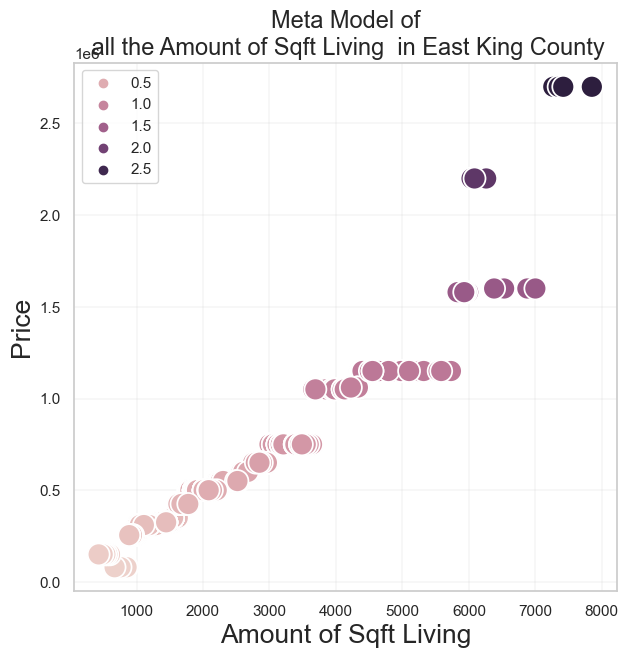

In [237]:
x = model_fit29['Amount_of_sqft_living']
y = model_fit29['preds']
sns.set(style='whitegrid')
flatui = ['#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#4f3d05','#534107','#564510','#4b3d11','#655522',
          '#574b26','#342906','#7f6618']
flatui1 = ['#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510',]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=model_fit29, x=x, y=y,s=250,hue='preds')#,palette=flatui1)
#ax = sns.stripplot(data=regressiondata1, x=x, y=y,hue='Amount_of_Bedrooms',palette=flatui, jitter=0.5, size=3)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Meta Model of\n all the Amount of Sqft Living  in East King County',size=17)
plt.xlabel("Amount of Sqft Living", size=19)
plt.ylabel("Price", size=19)
L=plt.legend()
#L.legend(title='Predictions')
#L.get_texts()[0].set_text('$312,598')
#L.get_texts()[1].set_text('$402,981')
#L.get_texts()[2].set_text('$519,497')
#L.get_texts()[3].set_text('$669,700')
#L.get_texts()[4].set_text('$863,333')
#L.get_texts()[5].set_text('$1,112,952')
#L.get_texts()[6].set_text('$1,434,743')

plt.gcf().set_size_inches((7,7))
#ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.show()

In [261]:
meta_model7 = models_predictions7

In [262]:
meta_model7

Sqft Living  430   Sqft Living  470   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $138,495           $147,486    
Quantile Regression 0.1             $119,188           $125,578    
Quantile Regression 0.5             $159,574           $168,058    
Quantile Regression 0.9             $201,493           $211,879    
Ridge Regression                    $138,384           $147,377    

                            Sqft Living  480   Sqft Living  490   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $149,734           $151,981    
Quantile Regression 0.1             $127,175           $128,773    
Quantile Regression 0.5             $170,179           $172,300    
Quantile Regression 0.9             $214,476           $217,073    
Ridge Regression                    $149,625           $151,873    

                            Sqft Living  530   Sqft Living  560   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $160,972           $167,715    
Quantile Regression 0.1             $135,163           $139,955    
Quantile Regression 0.5             $180,784           $187,147    
Quantile Regression 0.9             $227,460           $235,250    
Ridge Regression                    $160,866           $167,611    

                            Sqft Living  600   Sqft Living  670   \
Poisson Regression                  $603,348           $603,348    
Bayesian Linear Regression          $176,706           $192,440    
Quantile Regression 0.1             $146,345           $157,527    
Quantile Regression 0.5             $195,631           $210,478    
Quantile Regression 0.9             $245,636           $263,813    
Ridge Regression                    $176,604           $192,342    

                            Sqft Living  710   Sqft Living  720   ...  \
Poisson Regression                  $603,348           $603,348   ...   
Bayesian Linear Regression          $201,431           $203,679   ...   
Quantile Regression 0.1             $163,917           $165,515   ...   
Quantile Regression 0.5             $218,962           $221,083   ...   
Quantile Regression 0.9             $274,200           $276,797   ...   
Ridge Regression                    $201,335           $203,583   ...   

                            Sqft Living  6260   Sqft Living  6370   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,448,910          $1,473,635    
Quantile Regression 0.1            $1,050,508          $1,068,080    
Quantile Regression 0.5            $1,396,132          $1,419,463    
Quantile Regression 0.9            $1,715,362          $1,743,926    
Ridge Regression                   $1,449,113          $1,473,844    

                            Sqft Living  6380   Sqft Living  6530   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,475,883          $1,509,598    
Quantile Regression 0.1            $1,069,678          $1,093,640    
Quantile Regression 0.5            $1,421,584          $1,453,400    
Quantile Regression 0.9            $1,746,522          $1,785,473    
Ridge Regression                   $1,476,092          $1,509,816    

                            Sqft Living  6880   Sqft Living  7000   \
Poisson Regression                   $603,348            $603,348    
Bayesian Linear Regression         $1,588,268          $1,615,241    
Quantile Regression 0.1            $1,149,551          $1,168,720    
Quantile Regression 0.5            $1,527,636          $1,553,088    
Quantile Regression 0.9            $1,876,357          $1,907,517    
Ridge Regression                   $1,588,505          $1,615,484    

                            Sqft Living  7270   Sqft Living  7350   \
Poisson Regression                   $603,348            $603,348

In [263]:
vals = list(meta_var.preds)

In [264]:
meta_model7.loc[len(meta_model7.index)] = vals
meta_model7 = meta_model7.rename(index={6: 'Final Prediction'})

In [265]:
box_df7 = meta_model7.transpose()
box_df7

Poisson Regression Bayesian Linear Regression  \
 Sqft Living  430            $603,348                   $138,495    
 Sqft Living  470            $603,348                   $147,486    
 Sqft Living  480            $603,348                   $149,734    
 Sqft Living  490            $603,348                   $151,981    
 Sqft Living  530            $603,348                   $160,972    
...                                ...                        ...   
 Sqft Living  7000           $603,348                 $1,615,241    
 Sqft Living  7270           $603,348                 $1,675,929    
 Sqft Living  7350           $603,348                 $1,693,910    
 Sqft Living  7420           $603,348                 $1,709,644    
 Sqft Living  7850           $603,348                 $1,806,296    

                    Quantile Regression 0.1 Quantile Regression 0.5  \
 Sqft Living  430                 $119,188                $159,574    
 Sqft Living  470                 $125,578                $168,058    
 Sqft Living  480                 $127,175                $170,179    
 Sqft Living  490                 $128,773                $172,300    
 Sqft Living  530                 $135,163                $180,784    
...                                     ...                     ...   
 Sqft Living  7000              $1,168,720              $1,553,088    
 Sqft Living  7270              $1,211,852              $1,610,356    
 Sqft Living  7350              $1,224,632              $1,627,324    
 Sqft Living  7420              $1,235,814              $1,642,171    
 Sqft Living  7850              $1,304,505              $1,733,375    

                    Quantile Regression 0.9 Ridge Regression Final Prediction  
 Sqft Living  430                 $201,493         $138,384          $150,000  
 Sqft Living  470                 $211,879         $147,377          $150,000  
 Sqft Living  480                 $214,476         $149,625          $150,000  
 Sqft Living  490                 $217,073         $151,873          $150,000  
 Sqft Living  530                 $227,460         $160,866          $150,000  
...                                     ...              ...              ...  
 Sqft Living  7000              $1,907,517       $1,615,484        $1,600,000  
 Sqft Living  7270              $1,977,628       $1,676,186        $2,700,000  
 Sqft Living  7350              $1,998,401       $1,694,172        $2,700,000  
 Sqft Living  7420              $2,016,578       $1,709,910        $2,700,000  
 Sqft Living  7850              $2,128,235       $1,806,585        $2,700,000  

[454 rows x 7 columns]

In [243]:
melted_data7 = pd.melt(box_df7, value_vars =  ['Poisson Regression', 'Bayesian Linear Regression','Quantile Regression 0.1',
          'Quantile Regression 0.5', 'Quantile Regression 0.9','Ridge Regression', 'Final Prediction'])
melted_data7 = melted_data7.rename(columns={'variable': 'Prediction Model', 'value':'Prediction'})

In [244]:
melted_data7[melted_data7.columns[1:]] = melted_data7[melted_data7.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

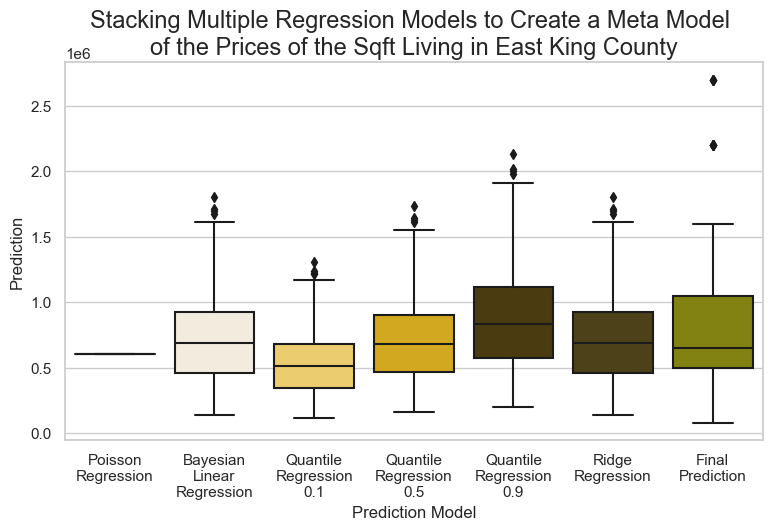

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
flatui = ['#f5c71a','#f4eedb','#ffd75b',
          '#f1b703','#534107','#564510','#949400']
#'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
#'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
#'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
#'#e0e000','#dfd21f']#,'#d1d100','#cccc00','#c7c700','#bdbd00',
#'#b8b800']#,'#b3b300','#a8a800','#949400']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
plt.gcf().set_size_inches((9,5))
x = sns.boxplot( data=melted_data7,x='Prediction Model', y='Prediction',palette=flatui)
#ylabels = ['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million']
#x.set_yticklabels(ylabels)
plt.title("Stacking Multiple Regression Models to Create a Meta Model \nof the Prices of the Sqft Living in East King County", size=17)
wrap_labels(x, 10)

In [266]:
def highlight_cells13(x):
    df = x.copy()
    df.loc[:,:] = ''         
    df.iloc[0,:] = 'background-color:#0FFF50;color:black;border-bottom: 2px solid black'
    df.iloc[1,:] = 'background-color:#2AAA8A;color:black;border-bottom: 2px solid black'
    df.iloc[2,:] = 'background-color:#0FFF50;color:black;border-bottom: 2px solid black'
    df.iloc[3,:] = 'background-color:#2AAA8A;color:black;border-bottom: 2px solid black'
    df.iloc[4,:] = 'background-color:#0FFF50;color:black;border-bottom: 2px solid black'
    df.iloc[5,:] = 'background-color:#2AAA8A;color:black;border-bottom: 2px solid black'
    df.iloc[6,:] = 'background-color:#008000 ;color:white'
    #df.iloc[6,:] = 'selector:th.row_heading;border-bottom: 3px solid red'
    return df 
meta_model7 = meta_model7.style.set_table_styles([{'selector' : '','props' : [('border','8px solid #90EE90')]},
            {"selector":"thead", 'props':[("background-color","#90EE90"),("color","black")]},#headinig
            #{'selector':"td", "props":[("background-color","white"), ("color"," black")]},#inside chart
            {'selector':'th.row_heading', 'props':[('background-color','#90EE90'),('color','black')]},#index
             ])\
            .apply(highlight_cells13, axis=None)

In [268]:
import dataframe_image as dfi
dfi.export(meta_model7,'meta_model7.png',max_cols=-1)

In [267]:
meta_model7

In [271]:
def SQFT_LOT(SQFT_LOTS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_lot'].tolist()

    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == SQFT_LOTS:lot_index.append(i)
            
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    
    lot_eastking = []
    for i in lot_index:
        if locations[i] == zip_loca[0] : lot_eastking.append(i)
        elif locations[i] == zip_loca[1] : lot_eastking.append(i)
        elif locations[i] == zip_loca[2] : lot_eastking.append(i)
        elif locations[i] == zip_loca[3] : lot_eastking.append(i)
        elif locations[i] == zip_loca[4] : lot_eastking.append(i)
        elif locations[i] == zip_loca[5] : lot_eastking.append(i)
        elif locations[i] == zip_loca[6] : lot_eastking.append(i)
        elif locations[i] == zip_loca[7]: lot_eastking.append(i)
        elif locations[i] == zip_loca[8] : lot_eastking.append(i)
        
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in lot_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
price_lot_eastking = []
for i in no_of_sqft_lot:
    price_lot_eastking.append(SQFT_LOT(i))
price_lot_eastking= sum(price_lot_eastking, [])
len(price_lot_eastking)

2455

In [272]:
def AMOUNT_LOT(AMOUNT_LOTS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_lot'].tolist()
    X_value = []
    
    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == AMOUNT_LOTS:lot_index.append(i)
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    

    for i in lot_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LOTS)
        
       

    return X_value
no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
amount_lot_eastking = []
for i in no_of_sqft_lot:
    amount_lot_eastking.append(AMOUNT_LOT(i))
amount_lot_eastking= sum(amount_lot_eastking, [])
len(amount_lot_eastking)

2455

In [273]:
regressiondata8 = pd.DataFrame({'Amount_of_Lot':amount_lot_eastking,
                                'Price':price_lot_eastking})

In [275]:
regressiondata8

Amount_of_Lot      Price
0              5000   410500.0
1              5000   825000.0
2              5000   715000.0
3              5000   134000.0
4              5000   619500.0
...             ...        ...
2450        1024068   855000.0
2451          15005   345000.0
2452          15781   406550.0
2453          90968   850000.0
2454         263538  1070000.0

[2455 rows x 2 columns]

In [394]:
#taking away outlyers
numbers = []
lots = []
index = []
for i,x in enumerate(regressiondata8.Amount_of_Lot):
    numbers.append(regressiondata8.Price[i])
    lots.append(x)
    

for x,i in enumerate(lots):
    if 200000 <= i :
        index.append(x)

for i in index:
    regressiondata8= regressiondata8.drop(i)

regressiondata8

Amount_of_Lot     Price
0              5000  604000.0
1              5000  650000.0
2              5000  207950.0
3              5000  615000.0
4              5000  275000.0
...             ...       ...
8344           9021  610000.0
8345           6986  318500.0
8346          35736  595000.0
8347          17313  912000.0
8348          35752  580000.0

[8284 rows x 2 columns]

C:\Users\rutho\AppData\Local\Temp/ipykernel_22328/3516160711.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million',


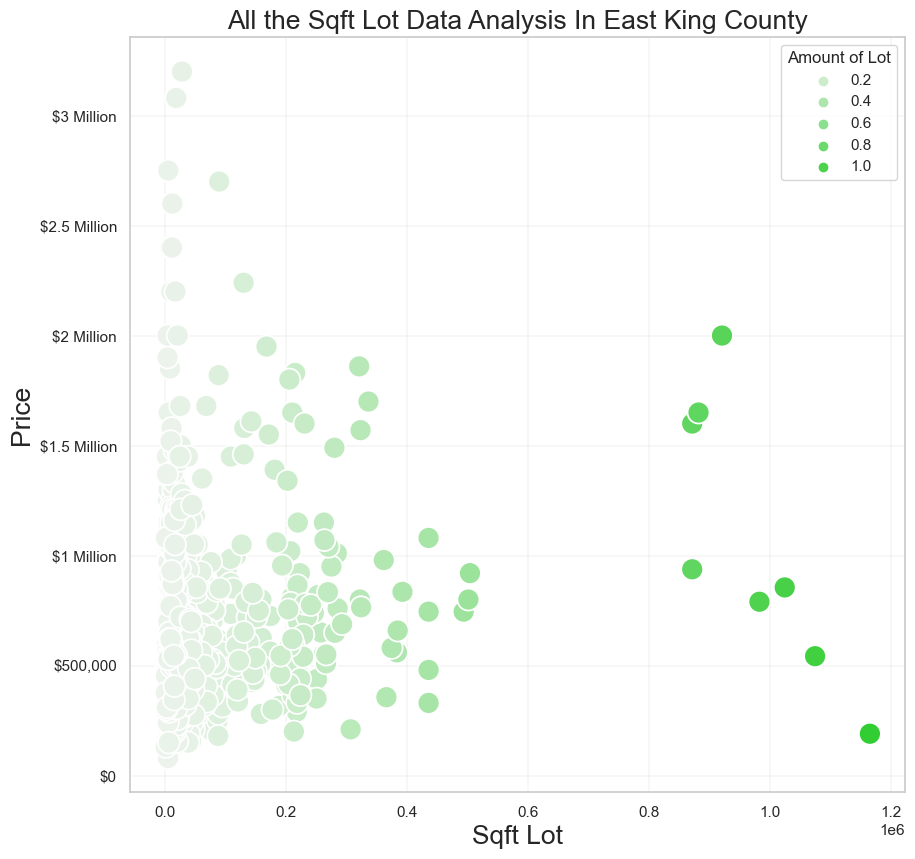

In [278]:
x = regressiondata8['Amount_of_Lot']
y = regressiondata8['Price']
sns.set(style='whitegrid')
cmap = sns.light_palette("#32CD32", as_cmap=True)

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata8, x=x, y=y,s=250,hue='Amount_of_Lot',
                      palette=cmap)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Sqft Lot Data Analysis In East King County',size=19)
plt.xlabel("Sqft Lot", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Lot')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million',
                 '$2.5 Million','$3 Million' ])
plt.show()